In [5]:
import numpy as np
import asyncio
import pandas as pd
import sqlite3
import json
import pickle
from datetime import datetime, timedelta, date
from collections import namedtuple, defaultdict, OrderedDict
from typing import Tuple
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from typing import List, Tuple, Dict
from sklearn.compose import ColumnTransformer
import warnings
import plotly.express as px
import plotly.graph_objects as go
from xgboost import XGBRegressor
from copy import deepcopy
import os
import sys
import copy
import yfinance_ez as yf
import seaborn as sns
import matplotlib.pyplot as plt


module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from finance_ml.variants.linear_model.main import main
from finance_ml.variants.linear_model.hyperparams import Hyperparams
from finance_ml.variants.linear_model.preprocessing import preprocess_data, preprocess_quarterly_data
from finance_ml.variants.linear_model.backtest import compute_performance
from finance_ml.utils.constants import (
    QuarterlyColumns as QC, StockPupColumns, STOCKPUP_TABLE_NAME, QUARTERLY_DB_FILE_PATH,
    YF_QUARTERLY_TABLE_NAME, INDEX_COLUMNS, MISSING_SECTOR, MISSING_INDUSTRY,
    STOCK_GENERAL_INFO_CSV, FORMULAE, Q_DELTA_PREFIX, YOY_DELTA_PREFIX,
    QUARTER, YEAR, VS_MKT_IDX, CATEGORICAL_COLUMNS, TICKER_SYMBOL, TARGET_COLUMN
)
from finance_ml.utils import QuarterlyIndex

warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
hp = Hyperparams()

df, prediction_candidate_df = preprocess_data(hp)
_, market_index_df = preprocess_quarterly_data(hp)

/Users/ezras/projects/personal/finance_ml/finance_ml/variants/linear_model/preprocessing.py:153: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Initial combined data size: (64270, 37)
Preprocessed quarterly df: (64270, 73)


/Users/ezras/projects/personal/finance_ml/finance_ml/variants/linear_model/preprocessing.py:153: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
portfolio = await compute_performance(df=df,
                          start_date=date(2016,1,1),
                          hyperparams=hp,
                          end_date=None)
portfolio.cash


Fitting data for: QuarterlyIndex  Q4 2015
Filtering data between 4Q2011 and 4Q2015
QuarterFilter removed 50741 rows. Output size: (10377, 73)
Train Size: (8302, 72), Test Size: (2075, 72)
[1]	valid_0's l1: 23.465	valid_0's l2: 2732.52
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.3358	valid_0's l2: 2694.46
[3]	valid_0's l1: 23.275	valid_0's l2: 2653.85
[4]	valid_0's l1: 23.1374	valid_0's l2: 2615.51
[5]	valid_0's l1: 23.0757	valid_0's l2: 2596.58
[6]	valid_0's l1: 23.0025	valid_0's l2: 2581.85
[7]	valid_0's l1: 22.9443	valid_0's l2: 2546.7
[8]	valid_0's l1: 22.9189	valid_0's l2: 2543.07
[9]	valid_0's l1: 22.9097	valid_0's l2: 2520.84
[10]	valid_0's l1: 22.8462	valid_0's l2: 2480.04
[11]	valid_0's l1: 22.8405	valid_0's l2: 2491.56
[12]	valid_0's l1: 22.8242	valid_0's l2: 2482.92
[13]	valid_0's l1: 22.7983	valid_0's l2: 2459.31
[14]	valid_0's l1: 22.7553	valid_0's l2: 2432.77
[15]	valid_0's l1: 22.7392	valid_0's l2: 2407.62
[16]	valid_0's l1: 22.6899	v

[27]	valid_0's l1: 21.7625	valid_0's l2: 1537.83
[28]	valid_0's l1: 21.7434	valid_0's l2: 1532.87
[29]	valid_0's l1: 21.6795	valid_0's l2: 1516.14
[30]	valid_0's l1: 21.6514	valid_0's l2: 1508.73
[31]	valid_0's l1: 21.6438	valid_0's l2: 1512.85
[32]	valid_0's l1: 21.6239	valid_0's l2: 1508.85
[33]	valid_0's l1: 21.5965	valid_0's l2: 1499.81
[34]	valid_0's l1: 21.554	valid_0's l2: 1496.23
[35]	valid_0's l1: 21.543	valid_0's l2: 1484.84
[36]	valid_0's l1: 21.5456	valid_0's l2: 1490.23
[37]	valid_0's l1: 21.5134	valid_0's l2: 1484.22
[38]	valid_0's l1: 21.5164	valid_0's l2: 1477.16
[39]	valid_0's l1: 21.5259	valid_0's l2: 1472.85
[40]	valid_0's l1: 21.4976	valid_0's l2: 1472.24
[41]	valid_0's l1: 21.4875	valid_0's l2: 1465.85
[42]	valid_0's l1: 21.4746	valid_0's l2: 1462.69
[43]	valid_0's l1: 21.4377	valid_0's l2: 1444.51
[44]	valid_0's l1: 21.4117	valid_0's l2: 1444.6
[45]	valid_0's l1: 21.3723	valid_0's l2: 1441.2
[46]	valid_0's l1: 21.3755	valid_0's l2: 1439.91
[47]	valid_0's l1: 21.35

[71]	valid_0's l1: 20.592	valid_0's l2: 1258.29
[72]	valid_0's l1: 20.5906	valid_0's l2: 1254.58
[73]	valid_0's l1: 20.591	valid_0's l2: 1252.36
[74]	valid_0's l1: 20.5913	valid_0's l2: 1256.71
[75]	valid_0's l1: 20.5865	valid_0's l2: 1256.52
[76]	valid_0's l1: 20.5824	valid_0's l2: 1254.15
[77]	valid_0's l1: 20.5979	valid_0's l2: 1253.22
[78]	valid_0's l1: 20.6133	valid_0's l2: 1252.75
Early stopping, best iteration is:
[73]	valid_0's l1: 20.591	valid_0's l2: 1252.36
Filtering data between 3Q2016 and 4Q2016
QuarterFilter removed 63642 rows. Output size: (628, 72)
Current portfolio: {QuarterlyIndex WDC Q4 2015: 11.890243902439027, QuarterlyIndex SWN Q4 2015: 24.012806830309504, QuarterlyIndex KODK Q4 2015: 18.591114278926117, QuarterlyIndex THC Q4 2015: 13.254949251331523, QuarterlyIndex KR Q4 2015: 17.666060973147587, QuarterlyIndex NI Q4 2015: 21.72820246143179, QuarterlyIndex DISH Q4 2015: 14.165712103856434, QuarterlyIndex SE Q4 2015: 25.420033346158785, QuarterlyIndex EBAY Q4 2015

QuarterFilter removed 50921 rows. Output size: (10197, 73)
Train Size: (8158, 72), Test Size: (2039, 72)
[1]	valid_0's l1: 22.2363	valid_0's l2: 1152.16
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.0843	valid_0's l2: 1134.19
[3]	valid_0's l1: 21.9315	valid_0's l2: 1119.22
[4]	valid_0's l1: 21.7337	valid_0's l2: 1102.76
[5]	valid_0's l1: 21.594	valid_0's l2: 1089.01
[6]	valid_0's l1: 21.528	valid_0's l2: 1078.57
[7]	valid_0's l1: 21.3975	valid_0's l2: 1069.34
[8]	valid_0's l1: 21.3614	valid_0's l2: 1064.41
[9]	valid_0's l1: 21.2859	valid_0's l2: 1057.27
[10]	valid_0's l1: 21.2255	valid_0's l2: 1051.84
[11]	valid_0's l1: 21.1811	valid_0's l2: 1049.98
[12]	valid_0's l1: 21.1147	valid_0's l2: 1046.96
[13]	valid_0's l1: 21.0513	valid_0's l2: 1041.08
[14]	valid_0's l1: 20.9882	valid_0's l2: 1034.21
[15]	valid_0's l1: 21.0245	valid_0's l2: 1038.12
[16]	valid_0's l1: 20.9581	valid_0's l2: 1028.63
[17]	valid_0's l1: 20.9083	valid_0's l2: 1023.66
[18]	valid_0'

[59]	valid_0's l1: 19.3052	valid_0's l2: 1181.69
[60]	valid_0's l1: 19.3058	valid_0's l2: 1175.81
[61]	valid_0's l1: 19.2694	valid_0's l2: 1168.57
[62]	valid_0's l1: 19.2574	valid_0's l2: 1161.62
[63]	valid_0's l1: 19.2426	valid_0's l2: 1159.68
[64]	valid_0's l1: 19.2251	valid_0's l2: 1159.05
[65]	valid_0's l1: 19.2321	valid_0's l2: 1154.81
[66]	valid_0's l1: 19.2145	valid_0's l2: 1148.51
[67]	valid_0's l1: 19.2043	valid_0's l2: 1143.18
[68]	valid_0's l1: 19.17	valid_0's l2: 1136.91
[69]	valid_0's l1: 19.1682	valid_0's l2: 1131.48
[70]	valid_0's l1: 19.1414	valid_0's l2: 1124.38
[71]	valid_0's l1: 19.1445	valid_0's l2: 1119.43
[72]	valid_0's l1: 19.1355	valid_0's l2: 1119.47
[73]	valid_0's l1: 19.1059	valid_0's l2: 1113.67
[74]	valid_0's l1: 19.0665	valid_0's l2: 1106.23
[75]	valid_0's l1: 19.07	valid_0's l2: 1101.44
[76]	valid_0's l1: 19.0612	valid_0's l2: 1096.38
[77]	valid_0's l1: 19.0631	valid_0's l2: 1091.3
[78]	valid_0's l1: 19.0466	valid_0's l2: 1085.36
[79]	valid_0's l1: 19.037

[16]	valid_0's l1: 19.5531	valid_0's l2: 713.31
[17]	valid_0's l1: 19.5498	valid_0's l2: 712.52
[18]	valid_0's l1: 19.5201	valid_0's l2: 710.051
[19]	valid_0's l1: 19.4677	valid_0's l2: 706.608
[20]	valid_0's l1: 19.4429	valid_0's l2: 705.175
[21]	valid_0's l1: 19.4229	valid_0's l2: 703.916
[22]	valid_0's l1: 19.4269	valid_0's l2: 704.078
[23]	valid_0's l1: 19.4108	valid_0's l2: 703.244
[24]	valid_0's l1: 19.378	valid_0's l2: 701.948
[25]	valid_0's l1: 19.3351	valid_0's l2: 698.876
[26]	valid_0's l1: 19.2966	valid_0's l2: 698.022
[27]	valid_0's l1: 19.2984	valid_0's l2: 698.416
[28]	valid_0's l1: 19.2518	valid_0's l2: 696.036
[29]	valid_0's l1: 19.1973	valid_0's l2: 693.741
[30]	valid_0's l1: 19.2135	valid_0's l2: 694.175
[31]	valid_0's l1: 19.1741	valid_0's l2: 690.433
[32]	valid_0's l1: 19.1667	valid_0's l2: 689.183
[33]	valid_0's l1: 19.1582	valid_0's l2: 687.174
[34]	valid_0's l1: 19.113	valid_0's l2: 685.146
[35]	valid_0's l1: 19.0915	valid_0's l2: 683.834
[36]	valid_0's l1: 19.07

[53]	valid_0's l1: 18.6647	valid_0's l2: 697.265
[54]	valid_0's l1: 18.6566	valid_0's l2: 696.582
[55]	valid_0's l1: 18.6333	valid_0's l2: 694.989
[56]	valid_0's l1: 18.6176	valid_0's l2: 694.434
[57]	valid_0's l1: 18.5879	valid_0's l2: 693.733
[58]	valid_0's l1: 18.5768	valid_0's l2: 692.585
[59]	valid_0's l1: 18.5443	valid_0's l2: 690.829
[60]	valid_0's l1: 18.5455	valid_0's l2: 691.192
[61]	valid_0's l1: 18.548	valid_0's l2: 691.278
[62]	valid_0's l1: 18.5318	valid_0's l2: 690.25
[63]	valid_0's l1: 18.499	valid_0's l2: 689.24
[64]	valid_0's l1: 18.4776	valid_0's l2: 688.053
[65]	valid_0's l1: 18.4561	valid_0's l2: 686.327
[66]	valid_0's l1: 18.4614	valid_0's l2: 686.973
[67]	valid_0's l1: 18.4428	valid_0's l2: 687.401
[68]	valid_0's l1: 18.4423	valid_0's l2: 688.139
[69]	valid_0's l1: 18.4233	valid_0's l2: 687.237
[70]	valid_0's l1: 18.4218	valid_0's l2: 687.32
Early stopping, best iteration is:
[65]	valid_0's l1: 18.4561	valid_0's l2: 686.327
Filtering data between 1Q2018 and 2Q201

Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63665 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex MED Q3 2017: 59.97002003563425, QuarterlyIndex NVDA Q3 2017: 37.444249945775226, QuarterlyIndex PLD Q3 2017: 23.278340916686226, QuarterlyIndex ALGN Q3 2017: 39.741292761569746, QuarterlyIndex BA Q3 2017: 33.38692964116469, QuarterlyIndex AMD Q3 2017: 21.327494028049927, QuarterlyIndex LRCX Q3 2017: 27.315287710482668, QuarterlyIndex ABMD Q3 2017: 51.914186610336714, QuarterlyIndex DRE Q3 2017: 21.132570249102567, QuarterlyIndex KLAC Q3 2017: 24.80899274382549, QuarterlyIndex ADSK Q3 2017: 26.1535358926534, QuarterlyIndex CTAS Q3 2017: 29.307190593302703, QuarterlyIndex AMAT Q3 2017: 27.02843057092211, QuarterlyIndex NFLX Q3 2017: 45.98365666745248, QuarterlyIndex HLT Q3 2017: 27.219532956873312, QuarterlyIndex MED Q4 2017: 56.31549818720768, QuarterlyIndex AMD Q4 2017: 30.349422081996927, QuarterlyIndex ABMD Q4 2017: 55.0729671408794, QuarterlyIndex ALGN


Fitting data for: QuarterlyIndex  Q4 2018
Filtering data between 4Q2014 and 4Q2018
QuarterFilter removed 51353 rows. Output size: (9765, 73)
Train Size: (7812, 72), Test Size: (1953, 72)
[1]	valid_0's l1: 21.3919	valid_0's l2: 873.399
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.1719	valid_0's l2: 851.782
[3]	valid_0's l1: 21.0072	valid_0's l2: 838.269
[4]	valid_0's l1: 20.8552	valid_0's l2: 824.458
[5]	valid_0's l1: 20.7159	valid_0's l2: 814.534
[6]	valid_0's l1: 20.6148	valid_0's l2: 805.007
[7]	valid_0's l1: 20.4974	valid_0's l2: 795.913
[8]	valid_0's l1: 20.4082	valid_0's l2: 788.356
[9]	valid_0's l1: 20.3395	valid_0's l2: 782.67
[10]	valid_0's l1: 20.2487	valid_0's l2: 775.401
[11]	valid_0's l1: 20.1944	valid_0's l2: 769.514
[12]	valid_0's l1: 20.1184	valid_0's l2: 762.849
[13]	valid_0's l1: 20.0738	valid_0's l2: 759.962
[14]	valid_0's l1: 20.0129	valid_0's l2: 754.675
[15]	valid_0's l1: 19.9893	valid_0's l2: 750.615
[16]	valid_0's l1: 19.9171	


Fitting data for: QuarterlyIndex  Q1 2019
Filtering data between 1Q2015 and 1Q2019
QuarterFilter removed 51436 rows. Output size: (9682, 73)
Train Size: (7746, 72), Test Size: (1936, 72)
[1]	valid_0's l1: 21.6562	valid_0's l2: 900.251
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.39	valid_0's l2: 877.989
[3]	valid_0's l1: 21.1503	valid_0's l2: 858.79
[4]	valid_0's l1: 20.9795	valid_0's l2: 843.647
[5]	valid_0's l1: 20.8376	valid_0's l2: 830.343
[6]	valid_0's l1: 20.7355	valid_0's l2: 823.754
[7]	valid_0's l1: 20.641	valid_0's l2: 817.16
[8]	valid_0's l1: 20.5259	valid_0's l2: 809.717
[9]	valid_0's l1: 20.4445	valid_0's l2: 802.612
[10]	valid_0's l1: 20.3722	valid_0's l2: 800.09
[11]	valid_0's l1: 20.3117	valid_0's l2: 795.58
[12]	valid_0's l1: 20.2578	valid_0's l2: 788.852
[13]	valid_0's l1: 20.1786	valid_0's l2: 782.597
[14]	valid_0's l1: 20.1253	valid_0's l2: 779.637
[15]	valid_0's l1: 20.0659	valid_0's l2: 774.799
[16]	valid_0's l1: 20.0285	valid_

[9]	valid_0's l1: 23.0571	valid_0's l2: 1630.05
[10]	valid_0's l1: 22.9842	valid_0's l2: 1624.07
[11]	valid_0's l1: 22.9076	valid_0's l2: 1615.9
[12]	valid_0's l1: 22.8491	valid_0's l2: 1603.96
[13]	valid_0's l1: 22.8057	valid_0's l2: 1601.93
[14]	valid_0's l1: 22.741	valid_0's l2: 1596.16
[15]	valid_0's l1: 22.6815	valid_0's l2: 1591.22
[16]	valid_0's l1: 22.6601	valid_0's l2: 1589.76
[17]	valid_0's l1: 22.6133	valid_0's l2: 1586.75
[18]	valid_0's l1: 22.5697	valid_0's l2: 1584.03
[19]	valid_0's l1: 22.5374	valid_0's l2: 1583.72
[20]	valid_0's l1: 22.4722	valid_0's l2: 1578.84
[21]	valid_0's l1: 22.4453	valid_0's l2: 1577.01
[22]	valid_0's l1: 22.3738	valid_0's l2: 1576.43
[23]	valid_0's l1: 22.3118	valid_0's l2: 1564.4
[24]	valid_0's l1: 22.2847	valid_0's l2: 1564.36
[25]	valid_0's l1: 22.2675	valid_0's l2: 1566.7
[26]	valid_0's l1: 22.2312	valid_0's l2: 1560.18
[27]	valid_0's l1: 22.2199	valid_0's l2: 1560.49
[28]	valid_0's l1: 22.2053	valid_0's l2: 1560.76
[29]	valid_0's l1: 22.174

[1]	valid_0's l1: 23.988	valid_0's l2: 2175.44
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.7966	valid_0's l2: 2155.23
[3]	valid_0's l1: 23.6141	valid_0's l2: 2103.47
[4]	valid_0's l1: 23.4341	valid_0's l2: 2056.82
[5]	valid_0's l1: 23.2164	valid_0's l2: 2046.73
[6]	valid_0's l1: 23.1336	valid_0's l2: 2039.13
[7]	valid_0's l1: 23.0976	valid_0's l2: 2012.79
[8]	valid_0's l1: 23.0976	valid_0's l2: 2018.64
[9]	valid_0's l1: 23.0188	valid_0's l2: 1993.79
[10]	valid_0's l1: 22.9436	valid_0's l2: 1995.44
[11]	valid_0's l1: 22.8707	valid_0's l2: 1977.21
[12]	valid_0's l1: 22.7985	valid_0's l2: 1968.2
[13]	valid_0's l1: 22.7901	valid_0's l2: 1949.83
[14]	valid_0's l1: 22.6805	valid_0's l2: 1926.84
[15]	valid_0's l1: 22.6413	valid_0's l2: 1925.61
[16]	valid_0's l1: 22.6693	valid_0's l2: 1934.71
[17]	valid_0's l1: 22.5545	valid_0's l2: 1930.82
[18]	valid_0's l1: 22.475	valid_0's l2: 1910.35
[19]	valid_0's l1: 22.4332	valid_0's l2: 1913.11
[20]	valid_0's l1: 22

[74]	valid_0's l1: 25.3623	valid_0's l2: 20251.8
[75]	valid_0's l1: 25.3726	valid_0's l2: 20257.2
[76]	valid_0's l1: 25.3448	valid_0's l2: 20247.3
[77]	valid_0's l1: 25.3426	valid_0's l2: 20243.6
Early stopping, best iteration is:
[72]	valid_0's l1: 25.3958	valid_0's l2: 20243
Filtering data between 1Q2020 and 2Q2020
QuarterFilter removed 63854 rows. Output size: (416, 72)
Current portfolio: {QuarterlyIndex WINMQ Q2 2019: 11.398421172843133, QuarterlyIndex LIFE Q2 2019: 20.290310773961615, QuarterlyIndex IR Q2 2019: 33.0878800081951, QuarterlyIndex QCOM Q2 2019: 36.53153705340686, QuarterlyIndex NVDA Q2 2019: 0, QuarterlyIndex ICE Q2 2019: 35.52032280808948, QuarterlyIndex ADSK Q2 2019: 32.99359891283057, QuarterlyIndex ABMD Q2 2019: 0, QuarterlyIndex AMAT Q2 2019: 39.885980118021315, QuarterlyIndex ETN Q2 2019: 61.20256182266308, QuarterlyIndex TXN Q2 2019: 34.871801863944626, QuarterlyIndex ALGN Q2 2019: 0, QuarterlyIndex AMD Q2 2019: 0, QuarterlyIndex MED Q2 2019: 0, QuarterlyIndex 

[1]	valid_0's l1: 27.6994	valid_0's l2: 2022.17
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.1118	valid_0's l2: 1961.93
[3]	valid_0's l1: 26.8298	valid_0's l2: 1921.74
[4]	valid_0's l1: 26.3203	valid_0's l2: 1874.66
[5]	valid_0's l1: 26.0361	valid_0's l2: 1826.71
[6]	valid_0's l1: 25.8345	valid_0's l2: 1830.21
[7]	valid_0's l1: 25.7582	valid_0's l2: 1842.03
[8]	valid_0's l1: 25.445	valid_0's l2: 1805.12
[9]	valid_0's l1: 25.3873	valid_0's l2: 1811.48
[10]	valid_0's l1: 25.271	valid_0's l2: 1790.8
[11]	valid_0's l1: 25.0846	valid_0's l2: 1764.69
[12]	valid_0's l1: 25.0484	valid_0's l2: 1777.11
[13]	valid_0's l1: 24.9452	valid_0's l2: 1770.25
[14]	valid_0's l1: 24.907	valid_0's l2: 1790.49
[15]	valid_0's l1: 24.9064	valid_0's l2: 1809.18
[16]	valid_0's l1: 24.8023	valid_0's l2: 1786.19
Early stopping, best iteration is:
[11]	valid_0's l1: 25.0846	valid_0's l2: 1764.69
Filtering data between 3Q2020 and 4Q2020
QuarterFilter removed 63668 rows. Output siz

[1]	valid_0's l1: 28.8491	valid_0's l2: 3288.39
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 28.2977	valid_0's l2: 3199.07
[3]	valid_0's l1: 27.733	valid_0's l2: 3111.33
[4]	valid_0's l1: 27.4459	valid_0's l2: 3075.34
[5]	valid_0's l1: 27.0863	valid_0's l2: 3034.98
[6]	valid_0's l1: 26.7365	valid_0's l2: 2985.76
[7]	valid_0's l1: 26.7455	valid_0's l2: 3022.79
[8]	valid_0's l1: 26.5503	valid_0's l2: 2973.91
[9]	valid_0's l1: 26.4573	valid_0's l2: 2925.84
[10]	valid_0's l1: 26.394	valid_0's l2: 2904.43
[11]	valid_0's l1: 26.203	valid_0's l2: 2884.55
[12]	valid_0's l1: 26.0331	valid_0's l2: 2861.34
[13]	valid_0's l1: 26.1191	valid_0's l2: 2885.56
[14]	valid_0's l1: 26.0425	valid_0's l2: 2870.03
[15]	valid_0's l1: 25.9028	valid_0's l2: 2850.47
[16]	valid_0's l1: 25.8622	valid_0's l2: 2838.17
[17]	valid_0's l1: 26.0143	valid_0's l2: 2854.42
[18]	valid_0's l1: 25.8756	valid_0's l2: 2816.22
[19]	valid_0's l1: 25.8883	valid_0's l2: 2827.79
[20]	valid_0's l1: 25

5742.874925786215

In [4]:
# portfolio.performance

In [8]:
def plot_vs_dow(portfolio):
    starting_cash = 1000
    q_indexes = [QuarterlyIndex("^DJI", int(q[0]), int(q[-4:])) for q in portfolio.performance]
    dow_prices = [market_index_df.loc[idx.to_tuple()][QC.PRICE_AVG] for idx in q_indexes]
    dow_prices = {q_idx.to_xQyyyy(): price / dow_prices[0] * starting_cash for q_idx, price in zip(q_indexes, dow_prices)}

    data = pd.DataFrame([portfolio.performance, dow_prices], index=['Model', 'DOW'])
    data_T = data.transpose()
    data_T.index.name = "Quarter"
    sns.lineplot(data=data_T, sort=False)

# Num Quarters Used for Training Data

In [20]:
output = OrderedDict()

for num_quarters_for_training in range(8, 40, 2):
    hp = Hyperparams(NUM_QUARTERS_FOR_TRAINING=num_quarters_for_training, RANDOM_SEED=17, N_STOCKS_TO_BUY=7)

    portfolio = await compute_performance(df=df,
                              start_date=date(2016,1,1),
                              hyperparams=hp,
                              end_date=None)
    
    output[num_quarters_for_training] = portfolio


Fitting data for: QuarterlyIndex  Q4 2015
Filtering data between 4Q2013 and 4Q2015
QuarterFilter removed 55976 rows. Output size: (5142, 73)
Train Size: (4114, 72), Test Size: (1028, 72)
[1]	valid_0's l1: 19.3862	valid_0's l2: 659.013
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 19.0349	valid_0's l2: 634.621
[3]	valid_0's l1: 18.7201	valid_0's l2: 614.629
[4]	valid_0's l1: 18.4152	valid_0's l2: 596.7
[5]	valid_0's l1: 18.2054	valid_0's l2: 582.901
[6]	valid_0's l1: 18.0502	valid_0's l2: 571.948
[7]	valid_0's l1: 17.8892	valid_0's l2: 559.18
[8]	valid_0's l1: 17.757	valid_0's l2: 551.016
[9]	valid_0's l1: 17.6114	valid_0's l2: 541.459
[10]	valid_0's l1: 17.44	valid_0's l2: 531.429
[11]	valid_0's l1: 17.4033	valid_0's l2: 527.127
[12]	valid_0's l1: 17.349	valid_0's l2: 523.687
[13]	valid_0's l1: 17.288	valid_0's l2: 520.833
[14]	valid_0's l1: 17.2164	valid_0's l2: 515.064
[15]	valid_0's l1: 17.1841	valid_0's l2: 511.27
[16]	valid_0's l1: 17.1353	valid_0'

[70]	valid_0's l1: 16.0617	valid_0's l2: 479.343
[71]	valid_0's l1: 16.0546	valid_0's l2: 478.806
[72]	valid_0's l1: 16.0404	valid_0's l2: 478.065
[73]	valid_0's l1: 16.0179	valid_0's l2: 476.698
[74]	valid_0's l1: 15.9819	valid_0's l2: 474.915
[75]	valid_0's l1: 15.9676	valid_0's l2: 474.759
[76]	valid_0's l1: 15.9617	valid_0's l2: 474.414
[77]	valid_0's l1: 15.9795	valid_0's l2: 474.918
[78]	valid_0's l1: 15.9711	valid_0's l2: 473.797
[79]	valid_0's l1: 15.9475	valid_0's l2: 472.858
[80]	valid_0's l1: 15.9313	valid_0's l2: 471.703
[81]	valid_0's l1: 15.9214	valid_0's l2: 470.905
[82]	valid_0's l1: 15.9109	valid_0's l2: 470.898
[83]	valid_0's l1: 15.8922	valid_0's l2: 470.186
[84]	valid_0's l1: 15.8842	valid_0's l2: 469.854
[85]	valid_0's l1: 15.8659	valid_0's l2: 469.296
[86]	valid_0's l1: 15.8674	valid_0's l2: 469.272
[87]	valid_0's l1: 15.8478	valid_0's l2: 467.845
[88]	valid_0's l1: 15.8484	valid_0's l2: 468.082
[89]	valid_0's l1: 15.8636	valid_0's l2: 468.161
[90]	valid_0's l1: 1

QuarterFilter removed 56079 rows. Output size: (5039, 73)
Train Size: (4032, 72), Test Size: (1007, 72)
[1]	valid_0's l1: 20.184	valid_0's l2: 875.061
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 19.8313	valid_0's l2: 848.064
[3]	valid_0's l1: 19.4885	valid_0's l2: 820.185
[4]	valid_0's l1: 19.181	valid_0's l2: 798.713
[5]	valid_0's l1: 18.8966	valid_0's l2: 777.387
[6]	valid_0's l1: 18.7118	valid_0's l2: 763.357
[7]	valid_0's l1: 18.5372	valid_0's l2: 750.202
[8]	valid_0's l1: 18.3961	valid_0's l2: 739.02
[9]	valid_0's l1: 18.3058	valid_0's l2: 730.817
[10]	valid_0's l1: 18.2111	valid_0's l2: 722.822
[11]	valid_0's l1: 18.0877	valid_0's l2: 715.241
[12]	valid_0's l1: 17.991	valid_0's l2: 707.269
[13]	valid_0's l1: 17.9494	valid_0's l2: 700.806
[14]	valid_0's l1: 17.9482	valid_0's l2: 698.346
[15]	valid_0's l1: 17.9139	valid_0's l2: 695.864
[16]	valid_0's l1: 17.84	valid_0's l2: 690.532
[17]	valid_0's l1: 17.7715	valid_0's l2: 686.666
[18]	valid_0's l1:

[71]	valid_0's l1: 16.962	valid_0's l2: 625.635
[72]	valid_0's l1: 16.949	valid_0's l2: 624.236
[73]	valid_0's l1: 16.9383	valid_0's l2: 623.026
[74]	valid_0's l1: 16.9353	valid_0's l2: 622.476
[75]	valid_0's l1: 16.8887	valid_0's l2: 619.83
[76]	valid_0's l1: 16.8822	valid_0's l2: 619
[77]	valid_0's l1: 16.8693	valid_0's l2: 617.907
[78]	valid_0's l1: 16.8584	valid_0's l2: 618.091
[79]	valid_0's l1: 16.8509	valid_0's l2: 616.983
[80]	valid_0's l1: 16.8055	valid_0's l2: 614.059
[81]	valid_0's l1: 16.7793	valid_0's l2: 610.548
[82]	valid_0's l1: 16.7659	valid_0's l2: 609.736
[83]	valid_0's l1: 16.7827	valid_0's l2: 610.995
[84]	valid_0's l1: 16.7918	valid_0's l2: 611.783
[85]	valid_0's l1: 16.7749	valid_0's l2: 611.073
[86]	valid_0's l1: 16.7665	valid_0's l2: 611.179
[87]	valid_0's l1: 16.7631	valid_0's l2: 610.55
Early stopping, best iteration is:
[82]	valid_0's l1: 16.7659	valid_0's l2: 609.736
Filtering data between 4Q2016 and 1Q2017
QuarterFilter removed 63646 rows. Output size: (62

QuarterFilter removed 56194 rows. Output size: (4924, 73)
Train Size: (3940, 72), Test Size: (984, 72)
[1]	valid_0's l1: 21.5604	valid_0's l2: 958.801
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.129	valid_0's l2: 921.169
[3]	valid_0's l1: 20.8203	valid_0's l2: 890.082
[4]	valid_0's l1: 20.4881	valid_0's l2: 864.309
[5]	valid_0's l1: 20.1963	valid_0's l2: 843.125
[6]	valid_0's l1: 19.9405	valid_0's l2: 823.303
[7]	valid_0's l1: 19.6878	valid_0's l2: 805.053
[8]	valid_0's l1: 19.5213	valid_0's l2: 791.62
[9]	valid_0's l1: 19.4023	valid_0's l2: 779.994
[10]	valid_0's l1: 19.3201	valid_0's l2: 773.079
[11]	valid_0's l1: 19.2704	valid_0's l2: 769.862
[12]	valid_0's l1: 19.1943	valid_0's l2: 763.461
[13]	valid_0's l1: 19.1502	valid_0's l2: 758.172
[14]	valid_0's l1: 19.1092	valid_0's l2: 755.873
[15]	valid_0's l1: 19.0206	valid_0's l2: 749.088
[16]	valid_0's l1: 18.9427	valid_0's l2: 743.528
[17]	valid_0's l1: 18.8377	valid_0's l2: 733.562
[18]	valid_0's 

[17]	valid_0's l1: 18.8852	valid_0's l2: 682.138
[18]	valid_0's l1: 18.8191	valid_0's l2: 678.523
[19]	valid_0's l1: 18.7823	valid_0's l2: 678.365
[20]	valid_0's l1: 18.6804	valid_0's l2: 673.795
[21]	valid_0's l1: 18.6438	valid_0's l2: 671.747
[22]	valid_0's l1: 18.6197	valid_0's l2: 669.63
[23]	valid_0's l1: 18.5494	valid_0's l2: 665.227
[24]	valid_0's l1: 18.5533	valid_0's l2: 665.051
[25]	valid_0's l1: 18.5393	valid_0's l2: 665.3
[26]	valid_0's l1: 18.4866	valid_0's l2: 664.006
[27]	valid_0's l1: 18.4676	valid_0's l2: 664.298
[28]	valid_0's l1: 18.4229	valid_0's l2: 662.22
[29]	valid_0's l1: 18.3667	valid_0's l2: 658.792
[30]	valid_0's l1: 18.4146	valid_0's l2: 661.767
[31]	valid_0's l1: 18.408	valid_0's l2: 662.689
[32]	valid_0's l1: 18.4282	valid_0's l2: 662.952
[33]	valid_0's l1: 18.415	valid_0's l2: 662.894
[34]	valid_0's l1: 18.395	valid_0's l2: 660.187
Early stopping, best iteration is:
[29]	valid_0's l1: 18.3667	valid_0's l2: 658.792
Filtering data between 1Q2018 and 2Q2018



Fitting data for: QuarterlyIndex  Q3 2018
Filtering data between 3Q2016 and 3Q2018
QuarterFilter removed 56314 rows. Output size: (4804, 73)
Train Size: (3844, 72), Test Size: (960, 72)
[1]	valid_0's l1: 22.2009	valid_0's l2: 878.48
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.8648	valid_0's l2: 855.108
[3]	valid_0's l1: 21.5919	valid_0's l2: 836.009
[4]	valid_0's l1: 21.3447	valid_0's l2: 818.535
[5]	valid_0's l1: 21.1506	valid_0's l2: 805.887
[6]	valid_0's l1: 20.9719	valid_0's l2: 790.388
[7]	valid_0's l1: 20.8238	valid_0's l2: 778.529
[8]	valid_0's l1: 20.728	valid_0's l2: 772.839
[9]	valid_0's l1: 20.6071	valid_0's l2: 764.847
[10]	valid_0's l1: 20.5488	valid_0's l2: 756.722
[11]	valid_0's l1: 20.4503	valid_0's l2: 753.951
[12]	valid_0's l1: 20.2968	valid_0's l2: 746.238
[13]	valid_0's l1: 20.198	valid_0's l2: 740.381
[14]	valid_0's l1: 20.1073	valid_0's l2: 734.949
[15]	valid_0's l1: 20.0041	valid_0's l2: 727.271
[16]	valid_0's l1: 19.9092	val

Filtering data between 1Q2019 and 2Q2019
QuarterFilter removed 63684 rows. Output size: (586, 72)
Current portfolio: {QuarterlyIndex MED Q2 2018: 98.99288438147617, QuarterlyIndex ABMD Q2 2018: 93.75692998063535, QuarterlyIndex WYND Q2 2018: 54.02691102810008, QuarterlyIndex ALGN Q2 2018: 81.53757596809844, QuarterlyIndex AMD Q2 2018: 182.37951130334773, QuarterlyIndex TWTR Q2 2018: 90.62468534434967, QuarterlyIndex PYPL Q2 2018: 126.36120085855946, QuarterlyIndex MED Q3 2018: 81.42411140534267, QuarterlyIndex ABMD Q3 2018: 107.44916459877524, QuarterlyIndex IAC Q3 2018: 43.24971041267869, QuarterlyIndex ALGN Q3 2018: 85.41614521689176, QuarterlyIndex CNC Q3 2018: 94.26735904089534, QuarterlyIndex INTU Q3 2018: 136.1569682053821, QuarterlyIndex AMD Q3 2018: 124.36664953956509, QuarterlyIndex ABMD Q4 2018: 76.17246497344769, QuarterlyIndex ALGN Q4 2018: 69.26403753662504, QuarterlyIndex FNMA Q4 2018: 148.93375156574157, QuarterlyIndex CRVL Q4 2018: 92.19688310473552, QuarterlyIndex CME 

[8]	valid_0's l1: 22.1369	valid_0's l2: 1015.59
[9]	valid_0's l1: 21.9342	valid_0's l2: 1025.48
[10]	valid_0's l1: 21.8643	valid_0's l2: 1007.9
[11]	valid_0's l1: 21.76	valid_0's l2: 1017.57
[12]	valid_0's l1: 21.6727	valid_0's l2: 1039
[13]	valid_0's l1: 21.6553	valid_0's l2: 1042.44
[14]	valid_0's l1: 21.6248	valid_0's l2: 1061.86
[15]	valid_0's l1: 21.4437	valid_0's l2: 1037.75
Early stopping, best iteration is:
[10]	valid_0's l1: 21.8643	valid_0's l2: 1007.9
Filtering data between 4Q2019 and 1Q2020
QuarterFilter removed 63856 rows. Output size: (414, 72)
Current portfolio: {QuarterlyIndex NBR Q1 2019: 0, QuarterlyIndex ABMD Q1 2019: 0, QuarterlyIndex AMD Q1 2019: 0, QuarterlyIndex CNC Q1 2019: 0, QuarterlyIndex WYND Q1 2019: 203.98513116508894, QuarterlyIndex COTY Q1 2019: 230.96559370511469, QuarterlyIndex ALGN Q1 2019: 0, QuarterlyIndex ICE Q2 2019: 138.34240281405917, QuarterlyIndex NBR Q2 2019: 0, QuarterlyIndex QCOM Q2 2019: 140.11476602652894, QuarterlyIndex FFIV Q2 2019: 113

Filtering data between 2Q2020 and 3Q2020
QuarterFilter removed 63703 rows. Output size: (567, 72)
Current portfolio: {QuarterlyIndex MNK Q3 2019: 28.70951931022439, QuarterlyIndex WINMQ Q3 2019: 27.726489669826694, QuarterlyIndex LIFE Q3 2019: 49.32063400616026, QuarterlyIndex AKRX Q3 2019: 0, QuarterlyIndex EQT Q3 2019: 51.47862967779864, QuarterlyIndex JCP Q3 2019: 0, QuarterlyIndex RAD Q3 2019: 100.38399446882775, QuarterlyIndex WINMQ Q4 2019: 9.986246002697003, QuarterlyIndex AKRX Q4 2019: 0, QuarterlyIndex MNK Q4 2019: 13.712456051209113, QuarterlyIndex FTR Q4 2019: 0, QuarterlyIndex LIFE Q4 2019: 13.21606343629433, QuarterlyIndex APH Q4 2019: 98.32369041676279, QuarterlyIndex JCP Q4 2019: 0, QuarterlyIndex WYND Q1 2020: 34.95361235715293, QuarterlyIndex AAL Q1 2020: 28.236924731990406, QuarterlyIndex TSLA Q1 2020: 69.77315052613851, QuarterlyIndex NE Q1 2020: 0, QuarterlyIndex WINMQ Q1 2020: 62.45007818784317, QuarterlyIndex BTU Q1 2020: 27.16588260210316, QuarterlyIndex AKRX Q1 

[14]	valid_0's l1: 39.8786	valid_0's l2: 47497
[15]	valid_0's l1: 39.8483	valid_0's l2: 47357.8
[16]	valid_0's l1: 39.9064	valid_0's l2: 46883.6
[17]	valid_0's l1: 39.7303	valid_0's l2: 46768.5
[18]	valid_0's l1: 39.5182	valid_0's l2: 46494.3
[19]	valid_0's l1: 39.5596	valid_0's l2: 46522.1
[20]	valid_0's l1: 39.6985	valid_0's l2: 46588.9
[21]	valid_0's l1: 39.7389	valid_0's l2: 46750.1
[22]	valid_0's l1: 39.5264	valid_0's l2: 46584.6
[23]	valid_0's l1: 39.5634	valid_0's l2: 46630.4
Early stopping, best iteration is:
[18]	valid_0's l1: 39.5182	valid_0's l2: 46494.3
Filtering data between 1Q2021 and 2Q2021
QuarterFilter removed 63684 rows. Output size: (586, 72)
Current portfolio: {QuarterlyIndex NBR Q2 2020: 255.5289077470032, QuarterlyIndex TSLA Q2 2020: 390.9712134189057, QuarterlyIndex JBL Q2 2020: 133.88642382453432, QuarterlyIndex F Q2 2020: 169.2997272618828, QuarterlyIndex SE Q2 2020: 267.41543230119765, QuarterlyIndex U Q2 2020: 0, QuarterlyIndex CSX Q2 2020: 342.634876112614, 

[54]	valid_0's l1: 17.7462	valid_0's l2: 677.987
[55]	valid_0's l1: 17.7106	valid_0's l2: 675.525
[56]	valid_0's l1: 17.6987	valid_0's l2: 673.962
[57]	valid_0's l1: 17.6946	valid_0's l2: 672.106
[58]	valid_0's l1: 17.6923	valid_0's l2: 670.953
[59]	valid_0's l1: 17.6795	valid_0's l2: 669.353
[60]	valid_0's l1: 17.6511	valid_0's l2: 667.012
[61]	valid_0's l1: 17.6436	valid_0's l2: 666.631
[62]	valid_0's l1: 17.6532	valid_0's l2: 666.479
[63]	valid_0's l1: 17.6539	valid_0's l2: 666.137
[64]	valid_0's l1: 17.6624	valid_0's l2: 665.769
[65]	valid_0's l1: 17.6414	valid_0's l2: 664.428
[66]	valid_0's l1: 17.6123	valid_0's l2: 663.848
[67]	valid_0's l1: 17.6084	valid_0's l2: 664.112
[68]	valid_0's l1: 17.5862	valid_0's l2: 663.758
[69]	valid_0's l1: 17.5616	valid_0's l2: 662.144
[70]	valid_0's l1: 17.5713	valid_0's l2: 662.22
[71]	valid_0's l1: 17.5838	valid_0's l2: 663.253
[72]	valid_0's l1: 17.5705	valid_0's l2: 660.844
[73]	valid_0's l1: 17.5689	valid_0's l2: 661.335
[74]	valid_0's l1: 17

[25]	valid_0's l1: 18.004	valid_0's l2: 603.259
[26]	valid_0's l1: 17.9627	valid_0's l2: 599.153
[27]	valid_0's l1: 17.9045	valid_0's l2: 595.066
[28]	valid_0's l1: 17.9103	valid_0's l2: 595.541
[29]	valid_0's l1: 17.8848	valid_0's l2: 594.593
[30]	valid_0's l1: 17.8452	valid_0's l2: 591.067
[31]	valid_0's l1: 17.7941	valid_0's l2: 586.931
[32]	valid_0's l1: 17.7982	valid_0's l2: 587.809
[33]	valid_0's l1: 17.7843	valid_0's l2: 585.777
[34]	valid_0's l1: 17.752	valid_0's l2: 583.514
[35]	valid_0's l1: 17.7092	valid_0's l2: 579.347
[36]	valid_0's l1: 17.6925	valid_0's l2: 577.82
[37]	valid_0's l1: 17.6365	valid_0's l2: 575.38
[38]	valid_0's l1: 17.608	valid_0's l2: 572.592
[39]	valid_0's l1: 17.622	valid_0's l2: 571.708
[40]	valid_0's l1: 17.5928	valid_0's l2: 568.04
[41]	valid_0's l1: 17.5918	valid_0's l2: 567.961
[42]	valid_0's l1: 17.5989	valid_0's l2: 568.917
[43]	valid_0's l1: 17.5548	valid_0's l2: 567.468
[44]	valid_0's l1: 17.5418	valid_0's l2: 567.045
[45]	valid_0's l1: 17.5131	

[94]	valid_0's l1: 18.458	valid_0's l2: 844.659
[95]	valid_0's l1: 18.46	valid_0's l2: 844.24
[96]	valid_0's l1: 18.4617	valid_0's l2: 844.15
[97]	valid_0's l1: 18.4362	valid_0's l2: 843.762
[98]	valid_0's l1: 18.4332	valid_0's l2: 842.981
[99]	valid_0's l1: 18.4276	valid_0's l2: 843.369
[100]	valid_0's l1: 18.4235	valid_0's l2: 842.244
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.4235	valid_0's l2: 842.244
Filtering data between 1Q2017 and 2Q2017
QuarterFilter removed 63647 rows. Output size: (623, 72)
Current portfolio: {QuarterlyIndex NAV Q2 2016: 88.055275113579, QuarterlyIndex PNC Q2 2016: 12.76252859222292, QuarterlyIndex MTW Q2 2016: 44.19470490899062, QuarterlyIndex ADSK Q2 2016: 51.8856263905293, QuarterlyIndex NVDA Q2 2016: 107.05101712816274, QuarterlyIndex AMD Q2 2016: 109.78184377199157, QuarterlyIndex ODP Q2 2016: 29.33212996389891, QuarterlyIndex NVDA Q3 2016: 72.66762258034352, QuarterlyIndex AMD Q3 2016: 70.41299932295192, QuarterlyIndex IQV Q

Train Size: (4952, 72), Test Size: (1237, 72)
[1]	valid_0's l1: 22.0955	valid_0's l2: 976.463
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.814	valid_0's l2: 953.448
[3]	valid_0's l1: 21.5648	valid_0's l2: 936.448
[4]	valid_0's l1: 21.3746	valid_0's l2: 921.852
[5]	valid_0's l1: 21.2338	valid_0's l2: 910.147
[6]	valid_0's l1: 21.0265	valid_0's l2: 896.814
[7]	valid_0's l1: 20.9503	valid_0's l2: 888.841
[8]	valid_0's l1: 20.8048	valid_0's l2: 877.668
[9]	valid_0's l1: 20.6773	valid_0's l2: 867.272
[10]	valid_0's l1: 20.5787	valid_0's l2: 859.768
[11]	valid_0's l1: 20.525	valid_0's l2: 856.367
[12]	valid_0's l1: 20.3975	valid_0's l2: 848.28
[13]	valid_0's l1: 20.3043	valid_0's l2: 842.115
[14]	valid_0's l1: 20.1922	valid_0's l2: 831.885
[15]	valid_0's l1: 20.1324	valid_0's l2: 827.341
[16]	valid_0's l1: 20.0834	valid_0's l2: 824.624
[17]	valid_0's l1: 20.0226	valid_0's l2: 821.899
[18]	valid_0's l1: 19.9613	valid_0's l2: 818.474
[19]	valid_0's l1: 19.87

[65]	valid_0's l1: 18.4646	valid_0's l2: 669.756
[66]	valid_0's l1: 18.4369	valid_0's l2: 668.282
[67]	valid_0's l1: 18.4151	valid_0's l2: 667.245
[68]	valid_0's l1: 18.4013	valid_0's l2: 666.397
[69]	valid_0's l1: 18.3994	valid_0's l2: 665.877
[70]	valid_0's l1: 18.3684	valid_0's l2: 663.799
[71]	valid_0's l1: 18.3732	valid_0's l2: 663.225
[72]	valid_0's l1: 18.3539	valid_0's l2: 661.986
[73]	valid_0's l1: 18.3191	valid_0's l2: 659.476
[74]	valid_0's l1: 18.2695	valid_0's l2: 657.035
[75]	valid_0's l1: 18.2416	valid_0's l2: 654.866
[76]	valid_0's l1: 18.2353	valid_0's l2: 654.702
[77]	valid_0's l1: 18.2346	valid_0's l2: 654.034
[78]	valid_0's l1: 18.2301	valid_0's l2: 654.226
[79]	valid_0's l1: 18.2496	valid_0's l2: 654.14
[80]	valid_0's l1: 18.2257	valid_0's l2: 653.005
[81]	valid_0's l1: 18.2224	valid_0's l2: 652.005
[82]	valid_0's l1: 18.2181	valid_0's l2: 650.783
[83]	valid_0's l1: 18.2049	valid_0's l2: 649.696
[84]	valid_0's l1: 18.1867	valid_0's l2: 647.981
[85]	valid_0's l1: 18


Fitting data for: QuarterlyIndex  Q2 2018
Filtering data between 4Q2015 and 2Q2018
QuarterFilter removed 55034 rows. Output size: (6084, 73)
Train Size: (4868, 72), Test Size: (1216, 72)
[1]	valid_0's l1: 22.3567	valid_0's l2: 1097.85
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.0545	valid_0's l2: 1070.18
[3]	valid_0's l1: 21.6712	valid_0's l2: 1037.52
[4]	valid_0's l1: 21.44	valid_0's l2: 1020.56
[5]	valid_0's l1: 21.2168	valid_0's l2: 999.999
[6]	valid_0's l1: 21.0714	valid_0's l2: 983.346
[7]	valid_0's l1: 20.9074	valid_0's l2: 969.71
[8]	valid_0's l1: 20.7714	valid_0's l2: 956.65
[9]	valid_0's l1: 20.6985	valid_0's l2: 950.441
[10]	valid_0's l1: 20.5411	valid_0's l2: 937.466
[11]	valid_0's l1: 20.4332	valid_0's l2: 929.041
[12]	valid_0's l1: 20.3699	valid_0's l2: 924.086
[13]	valid_0's l1: 20.3257	valid_0's l2: 919.917
[14]	valid_0's l1: 20.2577	valid_0's l2: 910.919
[15]	valid_0's l1: 20.1927	valid_0's l2: 904.228
[16]	valid_0's l1: 20.08	valid

[42]	valid_0's l1: 19.5067	valid_0's l2: 850.975
[43]	valid_0's l1: 19.489	valid_0's l2: 850.535
[44]	valid_0's l1: 19.487	valid_0's l2: 849.553
[45]	valid_0's l1: 19.4799	valid_0's l2: 850.889
[46]	valid_0's l1: 19.4274	valid_0's l2: 846.217
[47]	valid_0's l1: 19.4211	valid_0's l2: 845.889
[48]	valid_0's l1: 19.407	valid_0's l2: 844.633
[49]	valid_0's l1: 19.3927	valid_0's l2: 843.167
[50]	valid_0's l1: 19.3857	valid_0's l2: 843.039
[51]	valid_0's l1: 19.3916	valid_0's l2: 842.11
[52]	valid_0's l1: 19.3715	valid_0's l2: 839.157
[53]	valid_0's l1: 19.3506	valid_0's l2: 837.416
[54]	valid_0's l1: 19.348	valid_0's l2: 838.686
[55]	valid_0's l1: 19.3135	valid_0's l2: 836.108
[56]	valid_0's l1: 19.2963	valid_0's l2: 835.06
[57]	valid_0's l1: 19.2857	valid_0's l2: 835.837
[58]	valid_0's l1: 19.224	valid_0's l2: 831.543
[59]	valid_0's l1: 19.2025	valid_0's l2: 830.181
[60]	valid_0's l1: 19.2148	valid_0's l2: 830.124
[61]	valid_0's l1: 19.2095	valid_0's l2: 828.788
[62]	valid_0's l1: 19.1991	

[1]	valid_0's l1: 24.002	valid_0's l2: 1262.88
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.5892	valid_0's l2: 1236.81
[3]	valid_0's l1: 23.2566	valid_0's l2: 1218.59
[4]	valid_0's l1: 23.0286	valid_0's l2: 1202.16
[5]	valid_0's l1: 22.8181	valid_0's l2: 1185.7
[6]	valid_0's l1: 22.623	valid_0's l2: 1171.85
[7]	valid_0's l1: 22.4544	valid_0's l2: 1163.41
[8]	valid_0's l1: 22.303	valid_0's l2: 1153.19
[9]	valid_0's l1: 22.1486	valid_0's l2: 1141.83
[10]	valid_0's l1: 22.0224	valid_0's l2: 1137.07
[11]	valid_0's l1: 21.9317	valid_0's l2: 1129.56
[12]	valid_0's l1: 21.8522	valid_0's l2: 1126.24
[13]	valid_0's l1: 21.7535	valid_0's l2: 1121.21
[14]	valid_0's l1: 21.6985	valid_0's l2: 1109.98
[15]	valid_0's l1: 21.6386	valid_0's l2: 1102.92
[16]	valid_0's l1: 21.5146	valid_0's l2: 1092.61
[17]	valid_0's l1: 21.462	valid_0's l2: 1089.07
[18]	valid_0's l1: 21.4148	valid_0's l2: 1084.19
[19]	valid_0's l1: 21.3239	valid_0's l2: 1076.04
[20]	valid_0's l1: 21.2

[33]	valid_0's l1: 21.763	valid_0's l2: 2442.2
Early stopping, best iteration is:
[28]	valid_0's l1: 21.8373	valid_0's l2: 2432.54
Filtering data between 2Q2019 and 3Q2019
QuarterFilter removed 63738 rows. Output size: (532, 72)
Current portfolio: {QuarterlyIndex MED Q3 2018: 87.48989624757283, QuarterlyIndex AMD Q3 2018: 156.78552346546016, QuarterlyIndex ALGN Q3 2018: 104.35665377033372, QuarterlyIndex CNC Q3 2018: 49.08415656513477, QuarterlyIndex ILMN Q3 2018: 127.85256136239347, QuarterlyIndex ABMD Q3 2018: 83.13885914293883, QuarterlyIndex OFLX Q3 2018: 128.89178567860267, QuarterlyIndex SWKS Q4 2018: 0, QuarterlyIndex NBR Q4 2018: 65.7202589857387, QuarterlyIndex WINMQ Q4 2018: 7.285731263491486, QuarterlyIndex EQT Q4 2018: 54.30241903185307, QuarterlyIndex DHI Q4 2018: 106.30663189395203, QuarterlyIndex TER Q4 2018: 0, QuarterlyIndex PHM Q4 2018: 117.99169278567078, QuarterlyIndex NBR Q1 2019: 140.4644637862328, QuarterlyIndex IAC Q1 2019: 491.2204405771799, QuarterlyIndex NE Q

[7]	valid_0's l1: 24.9447	valid_0's l2: 2512.94
[8]	valid_0's l1: 25.2308	valid_0's l2: 2591.89
[9]	valid_0's l1: 25.1503	valid_0's l2: 2570.19
[10]	valid_0's l1: 25.1343	valid_0's l2: 2558.19
Early stopping, best iteration is:
[5]	valid_0's l1: 24.9387	valid_0's l2: 2513.33
Filtering data between 1Q2020 and 2Q2020
QuarterFilter removed 63854 rows. Output size: (416, 72)
Current portfolio: {QuarterlyIndex ADT Q2 2019: 80.43286370243514, QuarterlyIndex IR Q2 2019: 79.1493091003635, QuarterlyIndex NBR Q2 2019: 0, QuarterlyIndex CDNS Q2 2019: 0, QuarterlyIndex QCOM Q2 2019: 87.38685940094493, QuarterlyIndex LIFE Q2 2019: 48.53632444245336, QuarterlyIndex NVDA Q2 2019: 0, QuarterlyIndex NE Q3 2019: 16.407055791797372, QuarterlyIndex WINMQ Q3 2019: 17.237184028178383, QuarterlyIndex XL Q3 2019: 0.0, QuarterlyIndex MNK Q3 2019: 26.578688845461702, QuarterlyIndex IR Q3 2019: 39.03040170693654, QuarterlyIndex FTR Q3 2019: 0, QuarterlyIndex AKRX Q3 2019: 12.061946509875902, QuarterlyIndex WINMQ

Train Size: (3668, 72), Test Size: (917, 72)
[1]	valid_0's l1: 33.9089	valid_0's l2: 4565.62
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 32.8192	valid_0's l2: 4372.73
[3]	valid_0's l1: 32.2105	valid_0's l2: 4234.8
[4]	valid_0's l1: 31.8533	valid_0's l2: 4146.89
[5]	valid_0's l1: 31.2657	valid_0's l2: 4038.24
[6]	valid_0's l1: 30.9584	valid_0's l2: 3934.9
[7]	valid_0's l1: 30.3354	valid_0's l2: 3695.74
[8]	valid_0's l1: 30.0799	valid_0's l2: 3615.85
[9]	valid_0's l1: 29.8742	valid_0's l2: 3539.38
[10]	valid_0's l1: 29.8775	valid_0's l2: 3578.81
[11]	valid_0's l1: 29.7613	valid_0's l2: 3521.35
[12]	valid_0's l1: 29.6781	valid_0's l2: 3497.63
[13]	valid_0's l1: 29.5976	valid_0's l2: 3465.73
[14]	valid_0's l1: 29.3736	valid_0's l2: 3387.95
[15]	valid_0's l1: 29.1737	valid_0's l2: 3384.09
[16]	valid_0's l1: 29.0658	valid_0's l2: 3360.75
[17]	valid_0's l1: 28.9917	valid_0's l2: 3350.61
[18]	valid_0's l1: 28.9151	valid_0's l2: 3332.75
[19]	valid_0's l1: 28.87

[56]	valid_0's l1: 21.6962	valid_0's l2: 1923.49
[57]	valid_0's l1: 21.673	valid_0's l2: 1907.63
[58]	valid_0's l1: 21.6249	valid_0's l2: 1891.67
[59]	valid_0's l1: 21.609	valid_0's l2: 1900.77
[60]	valid_0's l1: 21.587	valid_0's l2: 1889.06
[61]	valid_0's l1: 21.5208	valid_0's l2: 1872.18
[62]	valid_0's l1: 21.5084	valid_0's l2: 1880.79
[63]	valid_0's l1: 21.5134	valid_0's l2: 1874.83
[64]	valid_0's l1: 21.5199	valid_0's l2: 1872.12
[65]	valid_0's l1: 21.5023	valid_0's l2: 1865.17
[66]	valid_0's l1: 21.5146	valid_0's l2: 1875.14
[67]	valid_0's l1: 21.5084	valid_0's l2: 1866.85
[68]	valid_0's l1: 21.4981	valid_0's l2: 1860.22
[69]	valid_0's l1: 21.4678	valid_0's l2: 1844.47
[70]	valid_0's l1: 21.4265	valid_0's l2: 1833.01
[71]	valid_0's l1: 21.3657	valid_0's l2: 1820.28
[72]	valid_0's l1: 21.343	valid_0's l2: 1826.69
[73]	valid_0's l1: 21.3535	valid_0's l2: 1832.18
[74]	valid_0's l1: 21.3116	valid_0's l2: 1817.04
[75]	valid_0's l1: 21.3208	valid_0's l2: 1815.34
[76]	valid_0's l1: 21.32


Fitting data for: QuarterlyIndex  Q3 2016
Filtering data between 3Q2013 and 3Q2016
QuarterFilter removed 53458 rows. Output size: (7660, 73)
Train Size: (6128, 72), Test Size: (1532, 72)
[1]	valid_0's l1: 20.0102	valid_0's l2: 846.902
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 19.7835	valid_0's l2: 827.134
[3]	valid_0's l1: 19.5843	valid_0's l2: 814.637
[4]	valid_0's l1: 19.4056	valid_0's l2: 800.301
[5]	valid_0's l1: 19.2743	valid_0's l2: 793.241
[6]	valid_0's l1: 19.2151	valid_0's l2: 784.591
[7]	valid_0's l1: 19.0944	valid_0's l2: 775.973
[8]	valid_0's l1: 19.0706	valid_0's l2: 772.931
[9]	valid_0's l1: 18.9957	valid_0's l2: 767.274
[10]	valid_0's l1: 18.9563	valid_0's l2: 764.857
[11]	valid_0's l1: 18.9063	valid_0's l2: 760.975
[12]	valid_0's l1: 18.8321	valid_0's l2: 756.66
[13]	valid_0's l1: 18.7826	valid_0's l2: 754.786
[14]	valid_0's l1: 18.7365	valid_0's l2: 753.569
[15]	valid_0's l1: 18.7316	valid_0's l2: 753.134
[16]	valid_0's l1: 18.6653	


Fitting data for: QuarterlyIndex  Q1 2017
Filtering data between 1Q2014 and 1Q2017
QuarterFilter removed 53553 rows. Output size: (7565, 73)
Train Size: (6052, 72), Test Size: (1513, 72)
[1]	valid_0's l1: 21.1816	valid_0's l2: 932.516
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.9051	valid_0's l2: 911.739
[3]	valid_0's l1: 20.6575	valid_0's l2: 891.657
[4]	valid_0's l1: 20.4753	valid_0's l2: 878.136
[5]	valid_0's l1: 20.2654	valid_0's l2: 858.372
[6]	valid_0's l1: 20.1106	valid_0's l2: 847.602
[7]	valid_0's l1: 19.9315	valid_0's l2: 834.306
[8]	valid_0's l1: 19.7902	valid_0's l2: 820.257
[9]	valid_0's l1: 19.6791	valid_0's l2: 808.412
[10]	valid_0's l1: 19.5828	valid_0's l2: 802.83
[11]	valid_0's l1: 19.4966	valid_0's l2: 794.477
[12]	valid_0's l1: 19.3977	valid_0's l2: 783.845
[13]	valid_0's l1: 19.3354	valid_0's l2: 776.342
[14]	valid_0's l1: 19.2703	valid_0's l2: 770.431
[15]	valid_0's l1: 19.1988	valid_0's l2: 763.88
[16]	valid_0's l1: 19.1428	v

[46]	valid_0's l1: 19.0836	valid_0's l2: 768.401
[47]	valid_0's l1: 19.0673	valid_0's l2: 766.649
[48]	valid_0's l1: 19.0278	valid_0's l2: 764.087
[49]	valid_0's l1: 19.0329	valid_0's l2: 762.61
[50]	valid_0's l1: 18.9884	valid_0's l2: 759.737
[51]	valid_0's l1: 18.9666	valid_0's l2: 757.814
[52]	valid_0's l1: 18.9312	valid_0's l2: 754.138
[53]	valid_0's l1: 18.9404	valid_0's l2: 754.609
[54]	valid_0's l1: 18.9081	valid_0's l2: 753.01
[55]	valid_0's l1: 18.9107	valid_0's l2: 752.915
[56]	valid_0's l1: 18.9232	valid_0's l2: 753.131
[57]	valid_0's l1: 18.9185	valid_0's l2: 752.01
[58]	valid_0's l1: 18.9214	valid_0's l2: 752.854
[59]	valid_0's l1: 18.9099	valid_0's l2: 750.899
Early stopping, best iteration is:
[54]	valid_0's l1: 18.9081	valid_0's l2: 753.01
Filtering data between 2Q2017 and 3Q2017
QuarterFilter removed 63651 rows. Output size: (619, 72)
Current portfolio: {QuarterlyIndex NVDA Q3 2016: 84.20092889872511, QuarterlyIndex CLF Q3 2016: 38.280268118977794, QuarterlyIndex AMD Q

[1]	valid_0's l1: 22.209	valid_0's l2: 1112.19
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.944	valid_0's l2: 1090.93
[3]	valid_0's l1: 21.6904	valid_0's l2: 1070.97
[4]	valid_0's l1: 21.5154	valid_0's l2: 1057.66
[5]	valid_0's l1: 21.3369	valid_0's l2: 1046.36
[6]	valid_0's l1: 21.2185	valid_0's l2: 1036.32
[7]	valid_0's l1: 21.1472	valid_0's l2: 1029.07
[8]	valid_0's l1: 21.0551	valid_0's l2: 1022.79
[9]	valid_0's l1: 20.9797	valid_0's l2: 1015.81
[10]	valid_0's l1: 20.9097	valid_0's l2: 1009.96
[11]	valid_0's l1: 20.8653	valid_0's l2: 1006.2
[12]	valid_0's l1: 20.7472	valid_0's l2: 993.416
[13]	valid_0's l1: 20.7034	valid_0's l2: 990.023
[14]	valid_0's l1: 20.6502	valid_0's l2: 985.997
[15]	valid_0's l1: 20.5735	valid_0's l2: 980.338
[16]	valid_0's l1: 20.5385	valid_0's l2: 977.883
[17]	valid_0's l1: 20.5267	valid_0's l2: 977.486
[18]	valid_0's l1: 20.4967	valid_0's l2: 973.136
[19]	valid_0's l1: 20.4069	valid_0's l2: 965.467
[20]	valid_0's l1: 20

[75]	valid_0's l1: 19.21	valid_0's l2: 756.923
[76]	valid_0's l1: 19.1945	valid_0's l2: 756.366
[77]	valid_0's l1: 19.1427	valid_0's l2: 751.792
[78]	valid_0's l1: 19.1383	valid_0's l2: 751.451
[79]	valid_0's l1: 19.1093	valid_0's l2: 749.556
[80]	valid_0's l1: 19.097	valid_0's l2: 748.751
[81]	valid_0's l1: 19.0976	valid_0's l2: 749.057
[82]	valid_0's l1: 19.0792	valid_0's l2: 748.927
[83]	valid_0's l1: 19.0588	valid_0's l2: 747.373
[84]	valid_0's l1: 19.0491	valid_0's l2: 746.829
[85]	valid_0's l1: 19.0454	valid_0's l2: 747.345
[86]	valid_0's l1: 19.0667	valid_0's l2: 748.376
[87]	valid_0's l1: 19.0447	valid_0's l2: 746.264
[88]	valid_0's l1: 19.0418	valid_0's l2: 745.479
[89]	valid_0's l1: 19.0291	valid_0's l2: 743.887
[90]	valid_0's l1: 19.0316	valid_0's l2: 743.37
[91]	valid_0's l1: 19.0187	valid_0's l2: 741.624
[92]	valid_0's l1: 19.0163	valid_0's l2: 741.728
[93]	valid_0's l1: 19.0174	valid_0's l2: 740.945
[94]	valid_0's l1: 19.0055	valid_0's l2: 740.966
[95]	valid_0's l1: 18.99

[7]	valid_0's l1: 20.434	valid_0's l2: 774.502
[8]	valid_0's l1: 20.2856	valid_0's l2: 761.54
[9]	valid_0's l1: 20.1913	valid_0's l2: 754.074
[10]	valid_0's l1: 20.1005	valid_0's l2: 747.769
[11]	valid_0's l1: 20.0263	valid_0's l2: 741.185
[12]	valid_0's l1: 19.918	valid_0's l2: 734.744
[13]	valid_0's l1: 19.8285	valid_0's l2: 726.52
[14]	valid_0's l1: 19.7781	valid_0's l2: 721.13
[15]	valid_0's l1: 19.6602	valid_0's l2: 713.613
[16]	valid_0's l1: 19.5856	valid_0's l2: 704.823
[17]	valid_0's l1: 19.5429	valid_0's l2: 700.944
[18]	valid_0's l1: 19.4809	valid_0's l2: 697.554
[19]	valid_0's l1: 19.434	valid_0's l2: 694.059
[20]	valid_0's l1: 19.3475	valid_0's l2: 686.035
[21]	valid_0's l1: 19.2682	valid_0's l2: 681.281
[22]	valid_0's l1: 19.1441	valid_0's l2: 672.276
[23]	valid_0's l1: 19.1315	valid_0's l2: 670.965
[24]	valid_0's l1: 19.0617	valid_0's l2: 664.758
[25]	valid_0's l1: 19.0291	valid_0's l2: 662.261
[26]	valid_0's l1: 18.9592	valid_0's l2: 657.632
[27]	valid_0's l1: 18.8722	va

[71]	valid_0's l1: 19.0401	valid_0's l2: 817.352
[72]	valid_0's l1: 19.0308	valid_0's l2: 815.765
[73]	valid_0's l1: 19.0271	valid_0's l2: 815.238
[74]	valid_0's l1: 19.0245	valid_0's l2: 814.671
[75]	valid_0's l1: 19.001	valid_0's l2: 813.035
[76]	valid_0's l1: 19.0061	valid_0's l2: 813.428
[77]	valid_0's l1: 18.9939	valid_0's l2: 812.856
[78]	valid_0's l1: 18.9711	valid_0's l2: 811.526
[79]	valid_0's l1: 18.9281	valid_0's l2: 809.078
[80]	valid_0's l1: 18.9147	valid_0's l2: 808.543
[81]	valid_0's l1: 18.9	valid_0's l2: 807.435
[82]	valid_0's l1: 18.8947	valid_0's l2: 806.703
[83]	valid_0's l1: 18.8644	valid_0's l2: 805.004
[84]	valid_0's l1: 18.8639	valid_0's l2: 804.442
[85]	valid_0's l1: 18.853	valid_0's l2: 804.335
[86]	valid_0's l1: 18.8474	valid_0's l2: 803.941
[87]	valid_0's l1: 18.8427	valid_0's l2: 803.333
[88]	valid_0's l1: 18.8325	valid_0's l2: 802.588
[89]	valid_0's l1: 18.8266	valid_0's l2: 802.431
[90]	valid_0's l1: 18.8092	valid_0's l2: 800.862
[91]	valid_0's l1: 18.809

[2]	valid_0's l1: 22.9947	valid_0's l2: 1364.42
[3]	valid_0's l1: 22.7309	valid_0's l2: 1347.77
[4]	valid_0's l1: 22.4861	valid_0's l2: 1326.85
[5]	valid_0's l1: 22.3475	valid_0's l2: 1320.32
[6]	valid_0's l1: 22.1309	valid_0's l2: 1310.37
[7]	valid_0's l1: 21.9395	valid_0's l2: 1299.55
[8]	valid_0's l1: 21.8222	valid_0's l2: 1281.4
[9]	valid_0's l1: 21.6796	valid_0's l2: 1262.74
[10]	valid_0's l1: 21.58	valid_0's l2: 1246.95
[11]	valid_0's l1: 21.4415	valid_0's l2: 1239.88
[12]	valid_0's l1: 21.3428	valid_0's l2: 1236.47
[13]	valid_0's l1: 21.2206	valid_0's l2: 1218.33
[14]	valid_0's l1: 21.1161	valid_0's l2: 1216.07
[15]	valid_0's l1: 21.0939	valid_0's l2: 1218.35
[16]	valid_0's l1: 21.0454	valid_0's l2: 1219.63
[17]	valid_0's l1: 20.9639	valid_0's l2: 1205.38
[18]	valid_0's l1: 20.9621	valid_0's l2: 1206.96
[19]	valid_0's l1: 20.9159	valid_0's l2: 1207.53
[20]	valid_0's l1: 20.8798	valid_0's l2: 1208.94
[21]	valid_0's l1: 20.8541	valid_0's l2: 1199.38
[22]	valid_0's l1: 20.8205	vali

[1]	valid_0's l1: 27.6182	valid_0's l2: 3746.45
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.5211	valid_0's l2: 3701.91
[3]	valid_0's l1: 27.2827	valid_0's l2: 3647.46
[4]	valid_0's l1: 27.1336	valid_0's l2: 3606.86
[5]	valid_0's l1: 27.03	valid_0's l2: 3595.37
[6]	valid_0's l1: 26.8064	valid_0's l2: 3517.14
[7]	valid_0's l1: 26.662	valid_0's l2: 3479.32
[8]	valid_0's l1: 26.5759	valid_0's l2: 3459.24
[9]	valid_0's l1: 26.6049	valid_0's l2: 3472.22
[10]	valid_0's l1: 26.6015	valid_0's l2: 3510.24
[11]	valid_0's l1: 26.6011	valid_0's l2: 3490.19
[12]	valid_0's l1: 26.5126	valid_0's l2: 3439.31
[13]	valid_0's l1: 26.371	valid_0's l2: 3423.53
[14]	valid_0's l1: 26.3587	valid_0's l2: 3457.27
[15]	valid_0's l1: 26.4257	valid_0's l2: 3472.6
[16]	valid_0's l1: 26.4464	valid_0's l2: 3492.84
[17]	valid_0's l1: 26.2782	valid_0's l2: 3467.14
[18]	valid_0's l1: 26.2476	valid_0's l2: 3448.31
Early stopping, best iteration is:
[13]	valid_0's l1: 26.371	valid_0's l

[24]	valid_0's l1: 28.3505	valid_0's l2: 7941.41
[25]	valid_0's l1: 28.2791	valid_0's l2: 7894.77
[26]	valid_0's l1: 28.1915	valid_0's l2: 7856.58
[27]	valid_0's l1: 28.1667	valid_0's l2: 7878.14
[28]	valid_0's l1: 28.1659	valid_0's l2: 7884.31
[29]	valid_0's l1: 28.1735	valid_0's l2: 7845.39
[30]	valid_0's l1: 28.1069	valid_0's l2: 7842.17
[31]	valid_0's l1: 28.0651	valid_0's l2: 7811.57
[32]	valid_0's l1: 28.1486	valid_0's l2: 7817.25
[33]	valid_0's l1: 28.0067	valid_0's l2: 7760.03
[34]	valid_0's l1: 27.9662	valid_0's l2: 7724.98
[35]	valid_0's l1: 27.9096	valid_0's l2: 7677.53
[36]	valid_0's l1: 28.0131	valid_0's l2: 7648.52
[37]	valid_0's l1: 27.9977	valid_0's l2: 7615.36
[38]	valid_0's l1: 27.9859	valid_0's l2: 7599.37
[39]	valid_0's l1: 28	valid_0's l2: 7580.85
[40]	valid_0's l1: 27.9623	valid_0's l2: 7572.25
Early stopping, best iteration is:
[35]	valid_0's l1: 27.9096	valid_0's l2: 7677.53
Filtering data between 3Q2020 and 4Q2020
QuarterFilter removed 63668 rows. Output size: 

[1]	valid_0's l1: 24.0136	valid_0's l2: 2765.09
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.8035	valid_0's l2: 2705.05
[3]	valid_0's l1: 23.581	valid_0's l2: 2637.39
[4]	valid_0's l1: 23.4442	valid_0's l2: 2531
[5]	valid_0's l1: 23.3307	valid_0's l2: 2496.03
[6]	valid_0's l1: 23.2688	valid_0's l2: 2487.41
[7]	valid_0's l1: 23.1943	valid_0's l2: 2407.27
[8]	valid_0's l1: 23.1792	valid_0's l2: 2407.82
[9]	valid_0's l1: 23.1514	valid_0's l2: 2389.3
[10]	valid_0's l1: 23.0144	valid_0's l2: 2350.16
[11]	valid_0's l1: 22.9537	valid_0's l2: 2324.62
[12]	valid_0's l1: 22.8748	valid_0's l2: 2313.64
[13]	valid_0's l1: 22.8328	valid_0's l2: 2284.82
[14]	valid_0's l1: 22.7886	valid_0's l2: 2289.15
[15]	valid_0's l1: 22.7477	valid_0's l2: 2263.53
[16]	valid_0's l1: 22.7741	valid_0's l2: 2272.93
[17]	valid_0's l1: 22.7316	valid_0's l2: 2243.68
[18]	valid_0's l1: 22.6973	valid_0's l2: 2233.18
[19]	valid_0's l1: 22.6645	valid_0's l2: 2229.87
[20]	valid_0's l1: 22.6

[1]	valid_0's l1: 20.5757	valid_0's l2: 886.288
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.3947	valid_0's l2: 864.903
[3]	valid_0's l1: 20.2399	valid_0's l2: 851.619
[4]	valid_0's l1: 20.1501	valid_0's l2: 843.001
[5]	valid_0's l1: 20.061	valid_0's l2: 834.573
[6]	valid_0's l1: 19.9753	valid_0's l2: 826.57
[7]	valid_0's l1: 19.9474	valid_0's l2: 819.042
[8]	valid_0's l1: 19.9186	valid_0's l2: 816.793
[9]	valid_0's l1: 19.8634	valid_0's l2: 809.58
[10]	valid_0's l1: 19.7699	valid_0's l2: 801.556
[11]	valid_0's l1: 19.7254	valid_0's l2: 797.808
[12]	valid_0's l1: 19.6931	valid_0's l2: 793.897
[13]	valid_0's l1: 19.6704	valid_0's l2: 792.744
[14]	valid_0's l1: 19.6692	valid_0's l2: 793.987
[15]	valid_0's l1: 19.6395	valid_0's l2: 790.807
[16]	valid_0's l1: 19.6015	valid_0's l2: 786.729
[17]	valid_0's l1: 19.5734	valid_0's l2: 786.361
[18]	valid_0's l1: 19.5062	valid_0's l2: 780.662
[19]	valid_0's l1: 19.5305	valid_0's l2: 780.446
[20]	valid_0's l1: 19

[1]	valid_0's l1: 19.7722	valid_0's l2: 807.208
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 19.5568	valid_0's l2: 792.964
[3]	valid_0's l1: 19.3864	valid_0's l2: 781.468
[4]	valid_0's l1: 19.2823	valid_0's l2: 775.631
[5]	valid_0's l1: 19.1648	valid_0's l2: 770.326
[6]	valid_0's l1: 19.0841	valid_0's l2: 764.058
[7]	valid_0's l1: 19.03	valid_0's l2: 762.796
[8]	valid_0's l1: 18.9438	valid_0's l2: 757.867
[9]	valid_0's l1: 18.907	valid_0's l2: 755.704
[10]	valid_0's l1: 18.843	valid_0's l2: 752.232
[11]	valid_0's l1: 18.7832	valid_0's l2: 750.26
[12]	valid_0's l1: 18.7417	valid_0's l2: 749.975
[13]	valid_0's l1: 18.753	valid_0's l2: 749.53
[14]	valid_0's l1: 18.6994	valid_0's l2: 745.652
[15]	valid_0's l1: 18.6732	valid_0's l2: 742.628
[16]	valid_0's l1: 18.6077	valid_0's l2: 739.07
[17]	valid_0's l1: 18.557	valid_0's l2: 737.233
[18]	valid_0's l1: 18.4898	valid_0's l2: 732.689
[19]	valid_0's l1: 18.4788	valid_0's l2: 731.708
[20]	valid_0's l1: 18.4019	

Filtering data between 2Q2017 and 3Q2017
QuarterFilter removed 63651 rows. Output size: (619, 72)
Current portfolio: {QuarterlyIndex HPQ Q3 2016: 47.24673293867979, QuarterlyIndex CLF Q3 2016: 38.280268118977794, QuarterlyIndex AMD Q3 2016: 69.341006544798, QuarterlyIndex ALGN Q3 2016: 54.067236375362796, QuarterlyIndex WDC Q3 2016: 60.87662337662338, QuarterlyIndex QRVO Q3 2016: 44.00609801442701, QuarterlyIndex NVDA Q3 2016: 84.20092889872511, QuarterlyIndex AMD Q4 2016: 57.440690400609064, QuarterlyIndex CLF Q4 2016: 40.255439648457426, QuarterlyIndex UAL Q4 2016: 51.19457392752745, QuarterlyIndex PLD Q4 2016: 48.693512466200865, QuarterlyIndex HPQ Q4 2016: 50.10388093490592, QuarterlyIndex CNC Q4 2016: 57.51051834549207, QuarterlyIndex ALGN Q4 2016: 63.03426934282726, QuarterlyIndex AMD Q1 2017: 66.14796935595922, QuarterlyIndex NVDA Q1 2017: 77.8314550722283, QuarterlyIndex ALGN Q1 2017: 88.43337650769347, QuarterlyIndex HLT Q1 2017: 94.96003490918545, QuarterlyIndex ABMD Q1 2017:

Filtering data between 4Q2017 and 1Q2018
QuarterFilter removed 63658 rows. Output size: (612, 72)
Current portfolio: {QuarterlyIndex AMD Q1 2017: 64.85622707398768, QuarterlyIndex NVDA Q1 2017: 127.77900800798312, QuarterlyIndex ALGN Q1 2017: 148.70098961861765, QuarterlyIndex HLT Q1 2017: 114.7964722742085, QuarterlyIndex ABMD Q1 2017: 106.82454329897546, QuarterlyIndex SWKS Q1 2017: 81.48805353634826, QuarterlyIndex BA Q1 2017: 108.92859666948499, QuarterlyIndex ALGN Q2 2017: 105.02889974876885, QuarterlyIndex PETS Q2 2017: 83.19419549741296, QuarterlyIndex TER Q2 2017: 77.00994037431144, QuarterlyIndex DRE Q2 2017: 63.36296396376022, QuarterlyIndex AMAT Q2 2017: 81.58483199970827, QuarterlyIndex ADI Q2 2017: 65.97683471539568, QuarterlyIndex PNC Q2 2017: 71.18591414042669, QuarterlyIndex NVDA Q3 2017: 83.2982598374852, QuarterlyIndex MED Q3 2017: 84.88480285250355, QuarterlyIndex ALGN Q3 2017: 85.05162369840771, QuarterlyIndex ABMD Q3 2017: 75.1400118617743, QuarterlyIndex AMAT Q3 2

[23]	valid_0's l1: 19.6965	valid_0's l2: 841.42
[24]	valid_0's l1: 19.6474	valid_0's l2: 836.895
[25]	valid_0's l1: 19.5948	valid_0's l2: 833.293
[26]	valid_0's l1: 19.5572	valid_0's l2: 829.715
[27]	valid_0's l1: 19.5365	valid_0's l2: 826.893
[28]	valid_0's l1: 19.4905	valid_0's l2: 823.953
[29]	valid_0's l1: 19.4491	valid_0's l2: 820.904
[30]	valid_0's l1: 19.4076	valid_0's l2: 817.502
[31]	valid_0's l1: 19.355	valid_0's l2: 814.801
[32]	valid_0's l1: 19.335	valid_0's l2: 812.33
[33]	valid_0's l1: 19.2991	valid_0's l2: 808.179
[34]	valid_0's l1: 19.2641	valid_0's l2: 804.498
[35]	valid_0's l1: 19.2523	valid_0's l2: 804.495
[36]	valid_0's l1: 19.2077	valid_0's l2: 800.104
[37]	valid_0's l1: 19.1793	valid_0's l2: 797.356
[38]	valid_0's l1: 19.162	valid_0's l2: 795.796
[39]	valid_0's l1: 19.1306	valid_0's l2: 792.524
[40]	valid_0's l1: 19.1142	valid_0's l2: 788.56
[41]	valid_0's l1: 19.1362	valid_0's l2: 789.412
[42]	valid_0's l1: 19.1166	valid_0's l2: 787.019
[43]	valid_0's l1: 19.0792

QuarterFilter removed 63670 rows. Output size: (600, 72)
Current portfolio: {QuarterlyIndex MED Q4 2017: 191.28507997921122, QuarterlyIndex ABMD Q4 2017: 134.25826356686233, QuarterlyIndex NVDA Q4 2017: 84.91543182015583, QuarterlyIndex ALGN Q4 2017: 99.33518520465677, QuarterlyIndex KODK Q4 2017: 40.67488663042185, QuarterlyIndex MPC Q4 2017: 78.49831724129321, QuarterlyIndex QCOM Q4 2017: 67.63820014611768, QuarterlyIndex MED Q1 2018: 328.7617724010867, QuarterlyIndex ABMD Q1 2018: 201.1060938694367, QuarterlyIndex NVDA Q1 2018: 143.55075703260775, QuarterlyIndex AMD Q1 2018: 256.0577744921052, QuarterlyIndex TWTR Q1 2018: 157.47052714053936, QuarterlyIndex LRCX Q1 2018: 109.29568089374283, QuarterlyIndex PTC Q1 2018: 172.31767845259878, QuarterlyIndex AMD Q2 2018: 155.64198797722128, QuarterlyIndex MED Q2 2018: 129.0344297977084, QuarterlyIndex WYND Q2 2018: 45.07501393786142, QuarterlyIndex ABMD Q2 2018: 92.60938306300578, QuarterlyIndex ALGN Q2 2018: 101.31470500766576, QuarterlyI

Train Size: (6734, 72), Test Size: (1683, 72)
[1]	valid_0's l1: 23.0861	valid_0's l2: 1208.46
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.7895	valid_0's l2: 1177.23
[3]	valid_0's l1: 22.5966	valid_0's l2: 1155.55
[4]	valid_0's l1: 22.3716	valid_0's l2: 1134.27
[5]	valid_0's l1: 22.1862	valid_0's l2: 1115.13
[6]	valid_0's l1: 22.0151	valid_0's l2: 1097.78
[7]	valid_0's l1: 21.8763	valid_0's l2: 1081.46
[8]	valid_0's l1: 21.7502	valid_0's l2: 1070.02
[9]	valid_0's l1: 21.665	valid_0's l2: 1060.9
[10]	valid_0's l1: 21.5492	valid_0's l2: 1051.14
[11]	valid_0's l1: 21.4745	valid_0's l2: 1043.56
[12]	valid_0's l1: 21.3986	valid_0's l2: 1035.98
[13]	valid_0's l1: 21.3301	valid_0's l2: 1029.03
[14]	valid_0's l1: 21.2875	valid_0's l2: 1024.9
[15]	valid_0's l1: 21.2023	valid_0's l2: 1015.73
[16]	valid_0's l1: 21.1248	valid_0's l2: 1005.5
[17]	valid_0's l1: 21.0461	valid_0's l2: 995.753
[18]	valid_0's l1: 20.9564	valid_0's l2: 985.863
[19]	valid_0's l1: 20.904

Failed to find data for QuarterlyIndex NVDA Q3 2019. Setting to zero

Fitting data for: QuarterlyIndex  Q3 2019
Filtering data between 1Q2016 and 3Q2019
QuarterFilter removed 52893 rows. Output size: (8225, 73)
Train Size: (6580, 72), Test Size: (1645, 72)
[1]	valid_0's l1: 24.4007	valid_0's l2: 1275
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 24.13	valid_0's l2: 1261.92
[3]	valid_0's l1: 23.9041	valid_0's l2: 1242.62
[4]	valid_0's l1: 23.7027	valid_0's l2: 1235.23
[5]	valid_0's l1: 23.567	valid_0's l2: 1227.72
[6]	valid_0's l1: 23.4852	valid_0's l2: 1221.97
[7]	valid_0's l1: 23.3846	valid_0's l2: 1231.33
[8]	valid_0's l1: 23.2508	valid_0's l2: 1228.19
[9]	valid_0's l1: 23.1135	valid_0's l2: 1213.34
[10]	valid_0's l1: 23.1073	valid_0's l2: 1214.36
[11]	valid_0's l1: 23.0448	valid_0's l2: 1236.87
[12]	valid_0's l1: 23.0144	valid_0's l2: 1231.75
[13]	valid_0's l1: 22.9408	valid_0's l2: 1240.97
[14]	valid_0's l1: 22.9299	valid_0's l2: 1252.68
Early stoppi

Train Size: (6076, 72), Test Size: (1519, 72)
[1]	valid_0's l1: 24.4774	valid_0's l2: 1499.64
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.9855	valid_0's l2: 1458.89
[3]	valid_0's l1: 23.6567	valid_0's l2: 1414.15
[4]	valid_0's l1: 23.4309	valid_0's l2: 1396.83
[5]	valid_0's l1: 23.2293	valid_0's l2: 1383.2
[6]	valid_0's l1: 23.0381	valid_0's l2: 1369.42
[7]	valid_0's l1: 22.9067	valid_0's l2: 1347.74
[8]	valid_0's l1: 22.7688	valid_0's l2: 1342.24
[9]	valid_0's l1: 22.7598	valid_0's l2: 1326.15
[10]	valid_0's l1: 22.6646	valid_0's l2: 1318.48
[11]	valid_0's l1: 22.5326	valid_0's l2: 1316.42
[12]	valid_0's l1: 22.4754	valid_0's l2: 1315.86
[13]	valid_0's l1: 22.4293	valid_0's l2: 1296.36
[14]	valid_0's l1: 22.4133	valid_0's l2: 1292.86
[15]	valid_0's l1: 22.3755	valid_0's l2: 1288.12
[16]	valid_0's l1: 22.457	valid_0's l2: 1305.24
[17]	valid_0's l1: 22.5389	valid_0's l2: 1311.98
[18]	valid_0's l1: 22.5196	valid_0's l2: 1319.64
[19]	valid_0's l1: 22.4

Train Size: (5103, 72), Test Size: (1275, 72)
[1]	valid_0's l1: 28.7009	valid_0's l2: 2081.93
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.947	valid_0's l2: 1989.15
[3]	valid_0's l1: 27.4279	valid_0's l2: 1971.43
[4]	valid_0's l1: 26.9051	valid_0's l2: 1914.15
[5]	valid_0's l1: 26.4881	valid_0's l2: 1845.67
[6]	valid_0's l1: 26.2098	valid_0's l2: 1821.3
[7]	valid_0's l1: 25.9618	valid_0's l2: 1802.53
[8]	valid_0's l1: 25.737	valid_0's l2: 1796.64
[9]	valid_0's l1: 25.4659	valid_0's l2: 1791.78
[10]	valid_0's l1: 25.4273	valid_0's l2: 1784.1
[11]	valid_0's l1: 25.2252	valid_0's l2: 1786.21
[12]	valid_0's l1: 25.1386	valid_0's l2: 1773.41
[13]	valid_0's l1: 25.0842	valid_0's l2: 1799.71
[14]	valid_0's l1: 25.0963	valid_0's l2: 1822.39
[15]	valid_0's l1: 24.8414	valid_0's l2: 1797.28
[16]	valid_0's l1: 24.6712	valid_0's l2: 1748.81
[17]	valid_0's l1: 24.5777	valid_0's l2: 1750.61
[18]	valid_0's l1: 24.6898	valid_0's l2: 1797.7
[19]	valid_0's l1: 24.6186

[6]	valid_0's l1: 22.602	valid_0's l2: 1792.6
[7]	valid_0's l1: 22.4857	valid_0's l2: 1767.69
[8]	valid_0's l1: 22.5032	valid_0's l2: 1771.55
[9]	valid_0's l1: 22.4375	valid_0's l2: 1762.37
[10]	valid_0's l1: 22.3424	valid_0's l2: 1737.63
[11]	valid_0's l1: 22.3099	valid_0's l2: 1711.84
[12]	valid_0's l1: 22.2464	valid_0's l2: 1704.75
[13]	valid_0's l1: 22.1734	valid_0's l2: 1677.25
[14]	valid_0's l1: 22.1466	valid_0's l2: 1649.77
[15]	valid_0's l1: 22.1322	valid_0's l2: 1629.54
[16]	valid_0's l1: 22.0932	valid_0's l2: 1625.05
[17]	valid_0's l1: 22.029	valid_0's l2: 1602.13
[18]	valid_0's l1: 21.9744	valid_0's l2: 1595.08
[19]	valid_0's l1: 21.9632	valid_0's l2: 1575.82
[20]	valid_0's l1: 21.9442	valid_0's l2: 1582.72
[21]	valid_0's l1: 21.9223	valid_0's l2: 1579.73
[22]	valid_0's l1: 21.9098	valid_0's l2: 1579.76
[23]	valid_0's l1: 21.8959	valid_0's l2: 1564.76
[24]	valid_0's l1: 21.8515	valid_0's l2: 1562.4
[25]	valid_0's l1: 21.8051	valid_0's l2: 1545.67
[26]	valid_0's l1: 21.7994	v

Train Size: (8191, 72), Test Size: (2047, 72)
[1]	valid_0's l1: 23.027	valid_0's l2: 1972.61
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.8662	valid_0's l2: 1950.53
[3]	valid_0's l1: 22.6614	valid_0's l2: 1910.21
[4]	valid_0's l1: 22.5267	valid_0's l2: 1868.28
[5]	valid_0's l1: 22.341	valid_0's l2: 1828.18
[6]	valid_0's l1: 22.241	valid_0's l2: 1803.42
[7]	valid_0's l1: 22.1716	valid_0's l2: 1774.17
[8]	valid_0's l1: 22.0883	valid_0's l2: 1749.58
[9]	valid_0's l1: 21.9974	valid_0's l2: 1720.96
[10]	valid_0's l1: 21.9319	valid_0's l2: 1698.27
[11]	valid_0's l1: 21.8989	valid_0's l2: 1679.85
[12]	valid_0's l1: 21.8336	valid_0's l2: 1663.42
[13]	valid_0's l1: 21.813	valid_0's l2: 1648.71
[14]	valid_0's l1: 21.7708	valid_0's l2: 1627.22
[15]	valid_0's l1: 21.7591	valid_0's l2: 1613.05
[16]	valid_0's l1: 21.7385	valid_0's l2: 1598.52
[17]	valid_0's l1: 21.714	valid_0's l2: 1583.93
[18]	valid_0's l1: 21.6673	valid_0's l2: 1568.59
[19]	valid_0's l1: 21.6368

[1]	valid_0's l1: 21.8701	valid_0's l2: 1829.07
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.6839	valid_0's l2: 1797.83
[3]	valid_0's l1: 21.5733	valid_0's l2: 1784.73
[4]	valid_0's l1: 21.4258	valid_0's l2: 1763.96
[5]	valid_0's l1: 21.3129	valid_0's l2: 1753.63
[6]	valid_0's l1: 21.2118	valid_0's l2: 1728.78
[7]	valid_0's l1: 21.139	valid_0's l2: 1706.54
[8]	valid_0's l1: 21.0584	valid_0's l2: 1699.24
[9]	valid_0's l1: 20.9419	valid_0's l2: 1677.22
[10]	valid_0's l1: 20.8655	valid_0's l2: 1658.35
[11]	valid_0's l1: 20.8263	valid_0's l2: 1643.98
[12]	valid_0's l1: 20.733	valid_0's l2: 1615.02
[13]	valid_0's l1: 20.708	valid_0's l2: 1599.17
[14]	valid_0's l1: 20.6584	valid_0's l2: 1583.88
[15]	valid_0's l1: 20.6342	valid_0's l2: 1568.01
[16]	valid_0's l1: 20.5822	valid_0's l2: 1552.5
[17]	valid_0's l1: 20.5495	valid_0's l2: 1538.75
[18]	valid_0's l1: 20.5139	valid_0's l2: 1526.21
[19]	valid_0's l1: 20.4588	valid_0's l2: 1509.87
[20]	valid_0's l1: 20.

[50]	valid_0's l1: 18.9666	valid_0's l2: 705.459
Early stopping, best iteration is:
[45]	valid_0's l1: 18.9752	valid_0's l2: 702.127
Filtering data between 3Q2017 and 4Q2017
QuarterFilter removed 63655 rows. Output size: (615, 72)
Current portfolio: {QuarterlyIndex AMD Q4 2016: 51.55582016318721, QuarterlyIndex HPQ Q4 2016: 43.568998076803126, QuarterlyIndex IQV Q4 2016: 43.209168027437116, QuarterlyIndex MAR Q4 2016: 47.85181006981014, QuarterlyIndex MTG Q4 2016: 44.1656131812404, QuarterlyIndex EA Q4 2016: 49.445002364501235, QuarterlyIndex KLAC Q4 2016: 44.320306790208555, QuarterlyIndex NRG Q1 2017: 0, QuarterlyIndex NVDA Q1 2017: 104.95675534384041, QuarterlyIndex INCY Q1 2017: 70.29639926674459, QuarterlyIndex SWKS Q1 2017: 84.81780934993886, QuarterlyIndex ABMD Q1 2017: 97.27172068695403, QuarterlyIndex AMD Q1 2017: 79.21828009883717, QuarterlyIndex NAV Q1 2017: 72.28781979968255, QuarterlyIndex ALGN Q2 2017: 62.832155545047776, QuarterlyIndex PETS Q2 2017: 66.61076272117128, Qu

[19]	valid_0's l1: 19.452	valid_0's l2: 741.309
[20]	valid_0's l1: 19.4331	valid_0's l2: 739.802
[21]	valid_0's l1: 19.363	valid_0's l2: 736.376
[22]	valid_0's l1: 19.3378	valid_0's l2: 734.961
[23]	valid_0's l1: 19.284	valid_0's l2: 730.885
[24]	valid_0's l1: 19.2872	valid_0's l2: 729.931
[25]	valid_0's l1: 19.2576	valid_0's l2: 729.431
[26]	valid_0's l1: 19.2233	valid_0's l2: 727.817
[27]	valid_0's l1: 19.2135	valid_0's l2: 727.254
[28]	valid_0's l1: 19.1708	valid_0's l2: 725.796
[29]	valid_0's l1: 19.1562	valid_0's l2: 724.815
[30]	valid_0's l1: 19.1151	valid_0's l2: 722.508
[31]	valid_0's l1: 19.0914	valid_0's l2: 720.773
[32]	valid_0's l1: 19.0606	valid_0's l2: 719.349
[33]	valid_0's l1: 19.0513	valid_0's l2: 718.109
[34]	valid_0's l1: 19.0248	valid_0's l2: 716.542
[35]	valid_0's l1: 19.0105	valid_0's l2: 716.398
[36]	valid_0's l1: 19.0064	valid_0's l2: 715.731
[37]	valid_0's l1: 18.9833	valid_0's l2: 714.759
[38]	valid_0's l1: 18.9556	valid_0's l2: 713.61
[39]	valid_0's l1: 18.96

[85]	valid_0's l1: 18.3235	valid_0's l2: 616.679
[86]	valid_0's l1: 18.3006	valid_0's l2: 615.273
[87]	valid_0's l1: 18.2878	valid_0's l2: 614.733
[88]	valid_0's l1: 18.2935	valid_0's l2: 615.234
[89]	valid_0's l1: 18.2933	valid_0's l2: 614.865
[90]	valid_0's l1: 18.2845	valid_0's l2: 614.232
[91]	valid_0's l1: 18.2706	valid_0's l2: 612.929
[92]	valid_0's l1: 18.268	valid_0's l2: 612.662
[93]	valid_0's l1: 18.2559	valid_0's l2: 612.264
[94]	valid_0's l1: 18.2524	valid_0's l2: 611.897
[95]	valid_0's l1: 18.2481	valid_0's l2: 611.898
[96]	valid_0's l1: 18.2321	valid_0's l2: 610.455
[97]	valid_0's l1: 18.2277	valid_0's l2: 610.074
[98]	valid_0's l1: 18.224	valid_0's l2: 610.129
[99]	valid_0's l1: 18.215	valid_0's l2: 609.999
[100]	valid_0's l1: 18.2058	valid_0's l2: 609.703
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.2058	valid_0's l2: 609.703
Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63665 rows. Output size: (605, 72)
Current portfolio: {Qu

[12]	valid_0's l1: 20.1184	valid_0's l2: 762.849
[13]	valid_0's l1: 20.0738	valid_0's l2: 759.962
[14]	valid_0's l1: 20.0129	valid_0's l2: 754.675
[15]	valid_0's l1: 19.9893	valid_0's l2: 750.615
[16]	valid_0's l1: 19.9171	valid_0's l2: 744.063
[17]	valid_0's l1: 19.8574	valid_0's l2: 738.067
[18]	valid_0's l1: 19.7959	valid_0's l2: 734.102
[19]	valid_0's l1: 19.7638	valid_0's l2: 732.561
[20]	valid_0's l1: 19.7405	valid_0's l2: 730.334
[21]	valid_0's l1: 19.7027	valid_0's l2: 727.881
[22]	valid_0's l1: 19.5958	valid_0's l2: 718.771
[23]	valid_0's l1: 19.604	valid_0's l2: 718.366
[24]	valid_0's l1: 19.5924	valid_0's l2: 717.488
[25]	valid_0's l1: 19.5695	valid_0's l2: 715.431
[26]	valid_0's l1: 19.5176	valid_0's l2: 712.957
[27]	valid_0's l1: 19.5189	valid_0's l2: 710.862
[28]	valid_0's l1: 19.4492	valid_0's l2: 706.334
[29]	valid_0's l1: 19.4238	valid_0's l2: 705.06
[30]	valid_0's l1: 19.4043	valid_0's l2: 702.879
[31]	valid_0's l1: 19.3692	valid_0's l2: 699.241
[32]	valid_0's l1: 19.

Filtering data between 1Q2019 and 2Q2019
QuarterFilter removed 63684 rows. Output size: (586, 72)
Current portfolio: {QuarterlyIndex AMD Q2 2018: 147.2309240674209, QuarterlyIndex MED Q2 2018: 79.91475434618384, QuarterlyIndex WYND Q2 2018: 43.61472392556792, QuarterlyIndex CNC Q2 2018: 140.67531982588525, QuarterlyIndex ALGN Q2 2018: 65.82347200192494, QuarterlyIndex ABMD Q2 2018: 75.68788478555395, QuarterlyIndex PTC Q2 2018: 84.61245924846459, QuarterlyIndex AMD Q3 2018: 80.82298512932758, QuarterlyIndex MED Q3 2018: 52.91563107671492, QuarterlyIndex OFLX Q3 2018: 71.99694324918022, QuarterlyIndex XLNX Q3 2018: 128.93885645224984, QuarterlyIndex ABMD Q3 2018: 69.82870620602111, QuarterlyIndex ADSK Q3 2018: 88.14111355482243, QuarterlyIndex BA Q3 2018: 94.35105277877547, QuarterlyIndex AMD Q4 2018: 76.95446693732178, QuarterlyIndex ALGN Q4 2018: 64.60617128407232, QuarterlyIndex ATVI Q4 2018: 58.26791332972895, QuarterlyIndex SWKS Q4 2018: 77.60829457399907, QuarterlyIndex ABMD Q4 20

[4]	valid_0's l1: 23.4341	valid_0's l2: 2056.82
[5]	valid_0's l1: 23.2164	valid_0's l2: 2046.73
[6]	valid_0's l1: 23.1336	valid_0's l2: 2039.13
[7]	valid_0's l1: 23.0976	valid_0's l2: 2012.79
[8]	valid_0's l1: 23.0976	valid_0's l2: 2018.64
[9]	valid_0's l1: 23.0188	valid_0's l2: 1993.79
[10]	valid_0's l1: 22.9436	valid_0's l2: 1995.44
[11]	valid_0's l1: 22.8707	valid_0's l2: 1977.21
[12]	valid_0's l1: 22.7985	valid_0's l2: 1968.2
[13]	valid_0's l1: 22.7901	valid_0's l2: 1949.83
[14]	valid_0's l1: 22.6805	valid_0's l2: 1926.84
[15]	valid_0's l1: 22.6413	valid_0's l2: 1925.61
[16]	valid_0's l1: 22.6693	valid_0's l2: 1934.71
[17]	valid_0's l1: 22.5545	valid_0's l2: 1930.82
[18]	valid_0's l1: 22.475	valid_0's l2: 1910.35
[19]	valid_0's l1: 22.4332	valid_0's l2: 1913.11
[20]	valid_0's l1: 22.344	valid_0's l2: 1909.65
[21]	valid_0's l1: 22.2846	valid_0's l2: 1904.96
[22]	valid_0's l1: 22.2204	valid_0's l2: 1906.42
[23]	valid_0's l1: 22.189	valid_0's l2: 1900.58
[24]	valid_0's l1: 22.1672	val

[1]	valid_0's l1: 26.012	valid_0's l2: 2033.9
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 25.7118	valid_0's l2: 1988.81
[3]	valid_0's l1: 25.4352	valid_0's l2: 1943.05
[4]	valid_0's l1: 25.2733	valid_0's l2: 1913.3
[5]	valid_0's l1: 25.114	valid_0's l2: 1879.43
[6]	valid_0's l1: 25.0035	valid_0's l2: 1863.02
[7]	valid_0's l1: 24.9234	valid_0's l2: 1846.47
[8]	valid_0's l1: 24.8695	valid_0's l2: 1838.58
[9]	valid_0's l1: 24.8098	valid_0's l2: 1812.67
[10]	valid_0's l1: 24.7761	valid_0's l2: 1785.64
[11]	valid_0's l1: 24.7313	valid_0's l2: 1770.51
[12]	valid_0's l1: 24.6523	valid_0's l2: 1753.98
[13]	valid_0's l1: 24.6851	valid_0's l2: 1759.89
[14]	valid_0's l1: 24.6811	valid_0's l2: 1748.25
[15]	valid_0's l1: 24.589	valid_0's l2: 1723.46
[16]	valid_0's l1: 24.5255	valid_0's l2: 1726.33
[17]	valid_0's l1: 24.4762	valid_0's l2: 1718.88
[18]	valid_0's l1: 24.444	valid_0's l2: 1729.44
[19]	valid_0's l1: 24.4779	valid_0's l2: 1728.45
[20]	valid_0's l1: 24.43

Filtering data between 4Q2020 and 1Q2021
QuarterFilter removed 63673 rows. Output size: (597, 72)
Current portfolio: {QuarterlyIndex APH Q1 2020: 367.3544606858666, QuarterlyIndex TSLA Q1 2020: 148.9051560980039, QuarterlyIndex SE Q1 2020: 144.62242430819978, QuarterlyIndex NE Q1 2020: 0, QuarterlyIndex LRCX Q1 2020: 52.29143771774007, QuarterlyIndex ADBE Q1 2020: 51.60294447421061, QuarterlyIndex U Q1 2020: 43.37094603900032, QuarterlyIndex NBR Q2 2020: 89.2821915460979, QuarterlyIndex RIG Q2 2020: 54.809763652975846, QuarterlyIndex HP Q2 2020: 57.92414461459366, QuarterlyIndex IAC Q2 2020: 115.35577460191516, QuarterlyIndex SE Q2 2020: 145.34107955825215, QuarterlyIndex TSLA Q2 2020: 186.09663151321635, QuarterlyIndex CCU Q2 2020: 52.97116907208558, QuarterlyIndex CCU Q3 2020: 118.99071411258875, QuarterlyIndex IAC Q3 2020: 136.31335694758513, QuarterlyIndex GME Q3 2020: 238.78257169851318, QuarterlyIndex FOSL Q3 2020: 170.95808424472807, QuarterlyIndex COTY Q3 2020: 164.872742532461

Train Size: (9294, 72), Test Size: (2323, 72)
[1]	valid_0's l1: 22.9258	valid_0's l2: 1955.88
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.8047	valid_0's l2: 1902.83
[3]	valid_0's l1: 22.7143	valid_0's l2: 1883.55
[4]	valid_0's l1: 22.6227	valid_0's l2: 1871.27
[5]	valid_0's l1: 22.5982	valid_0's l2: 1863.12
[6]	valid_0's l1: 22.5322	valid_0's l2: 1818.77
[7]	valid_0's l1: 22.4242	valid_0's l2: 1805.74
[8]	valid_0's l1: 22.3741	valid_0's l2: 1809.38
[9]	valid_0's l1: 22.2792	valid_0's l2: 1787.43
[10]	valid_0's l1: 22.2082	valid_0's l2: 1760.4
[11]	valid_0's l1: 22.1607	valid_0's l2: 1722.75
[12]	valid_0's l1: 22.1001	valid_0's l2: 1727.4
[13]	valid_0's l1: 22.0298	valid_0's l2: 1715.7
[14]	valid_0's l1: 22.0059	valid_0's l2: 1713.1
[15]	valid_0's l1: 21.9908	valid_0's l2: 1709.11
[16]	valid_0's l1: 21.9779	valid_0's l2: 1700.57
[17]	valid_0's l1: 21.9519	valid_0's l2: 1687.34
[18]	valid_0's l1: 21.9689	valid_0's l2: 1698.21
[19]	valid_0's l1: 21.961

[51]	valid_0's l1: 21.4513	valid_0's l2: 1198.75
[52]	valid_0's l1: 21.4216	valid_0's l2: 1192.77
[53]	valid_0's l1: 21.3736	valid_0's l2: 1184.48
[54]	valid_0's l1: 21.3669	valid_0's l2: 1184.08
[55]	valid_0's l1: 21.3481	valid_0's l2: 1178.53
[56]	valid_0's l1: 21.3225	valid_0's l2: 1171.18
[57]	valid_0's l1: 21.3088	valid_0's l2: 1168.87
[58]	valid_0's l1: 21.3052	valid_0's l2: 1167.41
[59]	valid_0's l1: 21.3011	valid_0's l2: 1165.04
[60]	valid_0's l1: 21.2992	valid_0's l2: 1164.42
[61]	valid_0's l1: 21.2832	valid_0's l2: 1162.16
[62]	valid_0's l1: 21.2944	valid_0's l2: 1164.08
[63]	valid_0's l1: 21.2954	valid_0's l2: 1162.87
[64]	valid_0's l1: 21.2673	valid_0's l2: 1158.3
[65]	valid_0's l1: 21.2564	valid_0's l2: 1155.85
[66]	valid_0's l1: 21.2222	valid_0's l2: 1151.45
[67]	valid_0's l1: 21.2073	valid_0's l2: 1147.04
[68]	valid_0's l1: 21.1833	valid_0's l2: 1139.77
[69]	valid_0's l1: 21.1604	valid_0's l2: 1133.65
[70]	valid_0's l1: 21.1582	valid_0's l2: 1135.97
[71]	valid_0's l1: 21

[49]	valid_0's l1: 21.1807	valid_0's l2: 1687.95
[50]	valid_0's l1: 21.152	valid_0's l2: 1688.25
[51]	valid_0's l1: 21.1551	valid_0's l2: 1690.22
[52]	valid_0's l1: 21.1303	valid_0's l2: 1677.86
[53]	valid_0's l1: 21.0992	valid_0's l2: 1668.53
[54]	valid_0's l1: 21.0488	valid_0's l2: 1652.24
[55]	valid_0's l1: 21.0727	valid_0's l2: 1652
[56]	valid_0's l1: 21.052	valid_0's l2: 1648.42
[57]	valid_0's l1: 21.0348	valid_0's l2: 1651.17
[58]	valid_0's l1: 21.0273	valid_0's l2: 1643.91
[59]	valid_0's l1: 21.0085	valid_0's l2: 1643.43
[60]	valid_0's l1: 20.9911	valid_0's l2: 1640.93
[61]	valid_0's l1: 20.9768	valid_0's l2: 1629.12
[62]	valid_0's l1: 20.9772	valid_0's l2: 1624.73
[63]	valid_0's l1: 20.9677	valid_0's l2: 1620.08
[64]	valid_0's l1: 20.9367	valid_0's l2: 1602.92
[65]	valid_0's l1: 20.9273	valid_0's l2: 1602.99
[66]	valid_0's l1: 20.9159	valid_0's l2: 1591.48
[67]	valid_0's l1: 20.9147	valid_0's l2: 1590.87
[68]	valid_0's l1: 20.9164	valid_0's l2: 1582.09
[69]	valid_0's l1: 20.870

Current portfolio: {QuarterlyIndex FMCC Q4 2016: 32.01500528537508, QuarterlyIndex HPQ Q4 2016: 49.776823189491395, QuarterlyIndex AMD Q4 2016: 58.90162863346904, QuarterlyIndex FNMA Q4 2016: 32.566890039716895, QuarterlyIndex TDG Q4 2016: 41.151834794634446, QuarterlyIndex TSLA Q4 2016: 69.0475157846848, QuarterlyIndex GNW Q4 2016: 32.713544659572705, QuarterlyIndex AMD Q1 2017: 60.26811379391284, QuarterlyIndex PLD Q1 2017: 65.10004858141532, QuarterlyIndex NVDA Q1 2017: 79.84957091482342, QuarterlyIndex NDAQ Q1 2017: 59.32295108543399, QuarterlyIndex DRE Q1 2017: 61.30417745922455, QuarterlyIndex PSA Q1 2017: 50.78653109477511, QuarterlyIndex TSLA Q1 2017: 76.21393768306253, QuarterlyIndex EXR Q2 2017: 52.73654613511453, QuarterlyIndex AMD Q2 2017: 57.354768380814896, QuarterlyIndex STZ Q2 2017: 56.625909941945885, QuarterlyIndex PETS Q2 2017: 68.67915457028418, QuarterlyIndex TDG Q2 2017: 56.695215228952236, QuarterlyIndex ALGN Q2 2017: 64.78321439923897, QuarterlyIndex BA Q2 2017:

[22]	valid_0's l1: 19.6733	valid_0's l2: 820.902
[23]	valid_0's l1: 19.6529	valid_0's l2: 820.282
[24]	valid_0's l1: 19.6171	valid_0's l2: 818.131
[25]	valid_0's l1: 19.6218	valid_0's l2: 819.123
[26]	valid_0's l1: 19.5933	valid_0's l2: 819.606
[27]	valid_0's l1: 19.5758	valid_0's l2: 817.918
[28]	valid_0's l1: 19.5258	valid_0's l2: 814.134
[29]	valid_0's l1: 19.4784	valid_0's l2: 811.515
[30]	valid_0's l1: 19.4818	valid_0's l2: 813.608
[31]	valid_0's l1: 19.467	valid_0's l2: 811.662
[32]	valid_0's l1: 19.4442	valid_0's l2: 811.034
[33]	valid_0's l1: 19.4083	valid_0's l2: 808.32
[34]	valid_0's l1: 19.3329	valid_0's l2: 800.905
[35]	valid_0's l1: 19.3107	valid_0's l2: 797.908
[36]	valid_0's l1: 19.3306	valid_0's l2: 799.545
[37]	valid_0's l1: 19.3266	valid_0's l2: 799.282
[38]	valid_0's l1: 19.3387	valid_0's l2: 799.707
[39]	valid_0's l1: 19.3325	valid_0's l2: 798.25
[40]	valid_0's l1: 19.3288	valid_0's l2: 797.822
Early stopping, best iteration is:
[35]	valid_0's l1: 19.3107	valid_0's 

[1]	valid_0's l1: 21.2565	valid_0's l2: 972.461
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.0641	valid_0's l2: 958.88
[3]	valid_0's l1: 20.8746	valid_0's l2: 945.801
[4]	valid_0's l1: 20.7128	valid_0's l2: 935.733
[5]	valid_0's l1: 20.6216	valid_0's l2: 925.931
[6]	valid_0's l1: 20.4882	valid_0's l2: 915.976
[7]	valid_0's l1: 20.372	valid_0's l2: 906.544
[8]	valid_0's l1: 20.2804	valid_0's l2: 899.939
[9]	valid_0's l1: 20.2312	valid_0's l2: 895.303
[10]	valid_0's l1: 20.1423	valid_0's l2: 888.649
[11]	valid_0's l1: 20.0969	valid_0's l2: 884.844
[12]	valid_0's l1: 20.0294	valid_0's l2: 880.17
[13]	valid_0's l1: 19.9604	valid_0's l2: 875.911
[14]	valid_0's l1: 19.874	valid_0's l2: 869.719
[15]	valid_0's l1: 19.8288	valid_0's l2: 866.955
[16]	valid_0's l1: 19.7879	valid_0's l2: 864.341
[17]	valid_0's l1: 19.7694	valid_0's l2: 862.815
[18]	valid_0's l1: 19.7349	valid_0's l2: 860.322
[19]	valid_0's l1: 19.6996	valid_0's l2: 859.362
[20]	valid_0's l1: 19.

[79]	valid_0's l1: 19.0289	valid_0's l2: 752.708
[80]	valid_0's l1: 19.0205	valid_0's l2: 751.932
[81]	valid_0's l1: 18.9995	valid_0's l2: 751.285
[82]	valid_0's l1: 18.9978	valid_0's l2: 751.115
[83]	valid_0's l1: 18.9855	valid_0's l2: 750.366
[84]	valid_0's l1: 18.9722	valid_0's l2: 748.733
[85]	valid_0's l1: 18.9624	valid_0's l2: 747.805
[86]	valid_0's l1: 18.9748	valid_0's l2: 748.416
[87]	valid_0's l1: 18.9555	valid_0's l2: 747.472
[88]	valid_0's l1: 18.9392	valid_0's l2: 747.022
[89]	valid_0's l1: 18.9274	valid_0's l2: 745.866
[90]	valid_0's l1: 18.9181	valid_0's l2: 744.895
[91]	valid_0's l1: 18.9168	valid_0's l2: 744.727
[92]	valid_0's l1: 18.9194	valid_0's l2: 744.95
[93]	valid_0's l1: 18.9035	valid_0's l2: 744.116
[94]	valid_0's l1: 18.8963	valid_0's l2: 744.319
[95]	valid_0's l1: 18.8799	valid_0's l2: 743.673
[96]	valid_0's l1: 18.8731	valid_0's l2: 743.298
[97]	valid_0's l1: 18.8433	valid_0's l2: 740.799
[98]	valid_0's l1: 18.8412	valid_0's l2: 741.53
[99]	valid_0's l1: 18.

QuarterFilter removed 50244 rows. Output size: (10874, 73)
Train Size: (8700, 72), Test Size: (2174, 72)
[1]	valid_0's l1: 23.1087	valid_0's l2: 1520.71
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.8237	valid_0's l2: 1491.47
[3]	valid_0's l1: 22.5858	valid_0's l2: 1467.87
[4]	valid_0's l1: 22.4159	valid_0's l2: 1454.78
[5]	valid_0's l1: 22.2455	valid_0's l2: 1439.56
[6]	valid_0's l1: 22.137	valid_0's l2: 1431.51
[7]	valid_0's l1: 21.9941	valid_0's l2: 1416.32
[8]	valid_0's l1: 21.8729	valid_0's l2: 1403.13
[9]	valid_0's l1: 21.7457	valid_0's l2: 1389.76
[10]	valid_0's l1: 21.6618	valid_0's l2: 1383.56
[11]	valid_0's l1: 21.5571	valid_0's l2: 1375.9
[12]	valid_0's l1: 21.4619	valid_0's l2: 1368.58
[13]	valid_0's l1: 21.3726	valid_0's l2: 1363.27
[14]	valid_0's l1: 21.3334	valid_0's l2: 1360.7
[15]	valid_0's l1: 21.281	valid_0's l2: 1356.37
[16]	valid_0's l1: 21.2228	valid_0's l2: 1349.97
[17]	valid_0's l1: 21.1713	valid_0's l2: 1346.02
[18]	valid_0's 

QuarterFilter removed 50584 rows. Output size: (10534, 73)
Train Size: (8428, 72), Test Size: (2106, 72)
[1]	valid_0's l1: 25.4709	valid_0's l2: 5416.5
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 25.1673	valid_0's l2: 5375.58
[3]	valid_0's l1: 24.95	valid_0's l2: 5336.06
[4]	valid_0's l1: 24.7461	valid_0's l2: 5314.46
[5]	valid_0's l1: 24.5198	valid_0's l2: 5299.52
[6]	valid_0's l1: 24.3709	valid_0's l2: 5304.14
[7]	valid_0's l1: 24.2177	valid_0's l2: 5268.91
[8]	valid_0's l1: 24.0596	valid_0's l2: 5255.02
[9]	valid_0's l1: 23.9981	valid_0's l2: 5221.7
[10]	valid_0's l1: 23.9382	valid_0's l2: 5201.75
[11]	valid_0's l1: 23.8664	valid_0's l2: 5177.27
[12]	valid_0's l1: 23.8048	valid_0's l2: 5141.87
[13]	valid_0's l1: 23.7373	valid_0's l2: 5115.72
[14]	valid_0's l1: 23.651	valid_0's l2: 5090.66
[15]	valid_0's l1: 23.6048	valid_0's l2: 5069.57
[16]	valid_0's l1: 23.6231	valid_0's l2: 5075.58
[17]	valid_0's l1: 23.5671	valid_0's l2: 5063.19
[18]	valid_0's l

[37]	valid_0's l1: 23.0188	valid_0's l2: 5188.34
[38]	valid_0's l1: 22.9711	valid_0's l2: 5166.14
[39]	valid_0's l1: 22.9448	valid_0's l2: 5170.94
[40]	valid_0's l1: 22.9556	valid_0's l2: 5174.19
[41]	valid_0's l1: 22.9095	valid_0's l2: 5169.3
[42]	valid_0's l1: 22.9549	valid_0's l2: 5182.94
[43]	valid_0's l1: 22.951	valid_0's l2: 5165.02
[44]	valid_0's l1: 22.9388	valid_0's l2: 5166.31
[45]	valid_0's l1: 22.8861	valid_0's l2: 5139.91
[46]	valid_0's l1: 22.8813	valid_0's l2: 5142.72
[47]	valid_0's l1: 22.8869	valid_0's l2: 5150.44
[48]	valid_0's l1: 22.8916	valid_0's l2: 5156.99
[49]	valid_0's l1: 22.8743	valid_0's l2: 5138.31
[50]	valid_0's l1: 22.9214	valid_0's l2: 5148.36
[51]	valid_0's l1: 22.9097	valid_0's l2: 5131.14
[52]	valid_0's l1: 22.8654	valid_0's l2: 5130.55
[53]	valid_0's l1: 22.8764	valid_0's l2: 5134.89
[54]	valid_0's l1: 22.8955	valid_0's l2: 5144.2
[55]	valid_0's l1: 22.8013	valid_0's l2: 5131.93
[56]	valid_0's l1: 22.7495	valid_0's l2: 5134.99
[57]	valid_0's l1: 22.7

[3]	valid_0's l1: 28.4765	valid_0's l2: 8370.97
[4]	valid_0's l1: 28.0593	valid_0's l2: 8310.29
[5]	valid_0's l1: 27.6805	valid_0's l2: 8221.19
[6]	valid_0's l1: 27.4078	valid_0's l2: 8189.12
[7]	valid_0's l1: 27.1108	valid_0's l2: 8122.98
[8]	valid_0's l1: 26.9566	valid_0's l2: 7992.49
[9]	valid_0's l1: 26.824	valid_0's l2: 7964.23
[10]	valid_0's l1: 26.8122	valid_0's l2: 7957.2
[11]	valid_0's l1: 26.8126	valid_0's l2: 7894.52
[12]	valid_0's l1: 26.685	valid_0's l2: 7870.06
[13]	valid_0's l1: 26.6432	valid_0's l2: 7854.43
[14]	valid_0's l1: 26.6758	valid_0's l2: 7866.98
[15]	valid_0's l1: 26.6446	valid_0's l2: 7826.74
[16]	valid_0's l1: 26.5621	valid_0's l2: 7840.72
[17]	valid_0's l1: 26.6039	valid_0's l2: 7857.47
[18]	valid_0's l1: 26.5779	valid_0's l2: 7808.81
[19]	valid_0's l1: 26.4453	valid_0's l2: 7769.85
[20]	valid_0's l1: 26.4319	valid_0's l2: 7788.85
[21]	valid_0's l1: 26.4348	valid_0's l2: 7795.9
[22]	valid_0's l1: 26.3794	valid_0's l2: 7783.16
[23]	valid_0's l1: 26.3231	vali

Filtering data between 4Q2015 and 1Q2016
QuarterFilter removed 63630 rows. Output size: (640, 72)
Current portfolio: {QuarterlyIndex FMCC Q4 2015: 35.714285714285715, QuarterlyIndex EBAY Q4 2015: 35.714285714285715, QuarterlyIndex EXR Q4 2015: 35.714285714285715, QuarterlyIndex PSA Q4 2015: 35.714285714285715, QuarterlyIndex KR Q4 2015: 35.714285714285715, QuarterlyIndex KODK Q4 2015: 35.714285714285715, QuarterlyIndex AVP Q4 2015: 35.714285714285715}

Fitting data for: QuarterlyIndex  Q1 2016
Filtering data between 1Q2011 and 1Q2016
QuarterFilter removed 48160 rows. Output size: (12958, 73)
Train Size: (10367, 72), Test Size: (2591, 72)
[1]	valid_0's l1: 22.1376	valid_0's l2: 1453.63
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.9962	valid_0's l2: 1443.94
[3]	valid_0's l1: 21.9009	valid_0's l2: 1429.05
[4]	valid_0's l1: 21.8313	valid_0's l2: 1423.4
[5]	valid_0's l1: 21.7794	valid_0's l2: 1416.56
[6]	valid_0's l1: 21.738	valid_0's l2: 1401.78
[7]	vali

Filtering data between 3Q2016 and 4Q2016
QuarterFilter removed 63642 rows. Output size: (628, 72)
Current portfolio: {QuarterlyIndex FMCC Q4 2015: 28.30188679245283, QuarterlyIndex EBAY Q4 2015: 37.75319829424307, QuarterlyIndex EXR Q4 2015: 36.7484831770546, QuarterlyIndex PSA Q4 2015: 36.38431276124908, QuarterlyIndex KR Q4 2015: 37.855844942459115, QuarterlyIndex KODK Q4 2015: 39.83810202627025, QuarterlyIndex AVP Q4 2015: 49.28571428571429, QuarterlyIndex KODK Q1 2016: 55.781294553749646, QuarterlyIndex HPQ Q1 2016: 37.97054981593635, QuarterlyIndex RRD Q1 2016: 42.25770075375393, QuarterlyIndex NAV Q1 2016: 44.353741496598644, QuarterlyIndex DXC Q1 2016: 60.06272488573374, QuarterlyIndex WMB Q1 2016: 49.45799457994581, QuarterlyIndex DRE Q1 2016: 47.80966243848339, QuarterlyIndex NAV Q2 2016: 41.140837960625944, QuarterlyIndex KODK Q2 2016: 41.711087420042645, QuarterlyIndex ENDP Q2 2016: 30.10736653742917, QuarterlyIndex FMCC Q2 2016: 35.08771929824562, QuarterlyIndex FNMA Q2 201

[13]	valid_0's l1: 22.3809	valid_0's l2: 2666.23
[14]	valid_0's l1: 22.2888	valid_0's l2: 2611.02
[15]	valid_0's l1: 22.251	valid_0's l2: 2605.59
[16]	valid_0's l1: 22.182	valid_0's l2: 2569.77
[17]	valid_0's l1: 22.151	valid_0's l2: 2555.06
[18]	valid_0's l1: 22.1172	valid_0's l2: 2540.92
[19]	valid_0's l1: 22.06	valid_0's l2: 2534.29
[20]	valid_0's l1: 22.0138	valid_0's l2: 2521.98
[21]	valid_0's l1: 21.9549	valid_0's l2: 2509.84
[22]	valid_0's l1: 21.9324	valid_0's l2: 2483.64
[23]	valid_0's l1: 21.9247	valid_0's l2: 2469.07
[24]	valid_0's l1: 21.8652	valid_0's l2: 2455.05
[25]	valid_0's l1: 21.815	valid_0's l2: 2454.3
[26]	valid_0's l1: 21.7686	valid_0's l2: 2449.95
[27]	valid_0's l1: 21.7567	valid_0's l2: 2430.86
[28]	valid_0's l1: 21.7373	valid_0's l2: 2435.56
[29]	valid_0's l1: 21.6994	valid_0's l2: 2439.26
[30]	valid_0's l1: 21.669	valid_0's l2: 2436.23
[31]	valid_0's l1: 21.6659	valid_0's l2: 2423.68
[32]	valid_0's l1: 21.6322	valid_0's l2: 2414.53
[33]	valid_0's l1: 21.611	va

Filtering data between 3Q2017 and 4Q2017
QuarterFilter removed 63655 rows. Output size: (615, 72)
Current portfolio: {QuarterlyIndex FMCC Q4 2016: 33.42096504786424, QuarterlyIndex AMBC Q4 2016: 35.89857259007923, QuarterlyIndex PSA Q4 2016: 40.39735250027891, QuarterlyIndex RF Q4 2016: 48.24430650097842, QuarterlyIndex FNMA Q4 2016: 33.99708617984271, QuarterlyIndex MU Q4 2016: 38.1422185389282, QuarterlyIndex YUM Q4 2016: 41.56193796167388, QuarterlyIndex NVDA Q1 2017: 65.1729929272892, QuarterlyIndex PSA Q1 2017: 41.45182239453804, QuarterlyIndex EXR Q1 2017: 46.15292463047522, QuarterlyIndex TSLA Q1 2017: 62.20559941239451, QuarterlyIndex PNC Q1 2017: 46.46585935510996, QuarterlyIndex TDG Q1 2017: 52.48035343778427, QuarterlyIndex NDAQ Q1 2017: 48.41922413886353, QuarterlyIndex DRE Q2 2017: 46.77296233573777, QuarterlyIndex PETS Q2 2017: 60.52113715004973, QuarterlyIndex NDAQ Q2 2017: 48.80543654618289, QuarterlyIndex EA Q2 2017: 50.494969432399635, QuarterlyIndex ALGN Q2 2017: 57.

[12]	valid_0's l1: 21.0812	valid_0's l2: 1423.03
[13]	valid_0's l1: 21.0046	valid_0's l2: 1404.41
[14]	valid_0's l1: 20.9788	valid_0's l2: 1388.55
[15]	valid_0's l1: 20.9403	valid_0's l2: 1378.71
[16]	valid_0's l1: 20.8941	valid_0's l2: 1365.75
[17]	valid_0's l1: 20.8496	valid_0's l2: 1353.3
[18]	valid_0's l1: 20.8004	valid_0's l2: 1337.02
[19]	valid_0's l1: 20.7912	valid_0's l2: 1326.12
[20]	valid_0's l1: 20.7587	valid_0's l2: 1310.37
[21]	valid_0's l1: 20.7292	valid_0's l2: 1299
[22]	valid_0's l1: 20.6799	valid_0's l2: 1284.94
[23]	valid_0's l1: 20.6716	valid_0's l2: 1275.04
[24]	valid_0's l1: 20.6802	valid_0's l2: 1266.71
[25]	valid_0's l1: 20.6674	valid_0's l2: 1258.03
[26]	valid_0's l1: 20.6377	valid_0's l2: 1249.49
[27]	valid_0's l1: 20.5919	valid_0's l2: 1239.32
[28]	valid_0's l1: 20.5425	valid_0's l2: 1225.25
[29]	valid_0's l1: 20.4882	valid_0's l2: 1215.64
[30]	valid_0's l1: 20.4368	valid_0's l2: 1205.89
[31]	valid_0's l1: 20.4455	valid_0's l2: 1201.95
[32]	valid_0's l1: 20.43

Current portfolio: {QuarterlyIndex FMCC Q3 2017: 32.20787472853835, QuarterlyIndex PFIE Q3 2017: 136.88346759628791, QuarterlyIndex NVDA Q3 2017: 94.09625044663176, QuarterlyIndex KR Q3 2017: 56.95778370559429, QuarterlyIndex SVU Q3 2017: 65.32819941053991, QuarterlyIndex ALGN Q3 2017: 99.86864851561818, QuarterlyIndex BA Q3 2017: 83.90032909481648, QuarterlyIndex FNMA Q4 2017: 20.4782719012562, QuarterlyIndex FMCC Q4 2017: 21.560457001729088, QuarterlyIndex ALGN Q4 2017: 56.547434888065276, QuarterlyIndex MED Q4 2017: 85.49835865020783, QuarterlyIndex WINMQ Q4 2017: 16.41599494688258, QuarterlyIndex PFIE Q4 2017: 90.66448585342486, QuarterlyIndex MU Q4 2017: 56.76577194267222, QuarterlyIndex MED Q1 2018: 101.0052631446007, QuarterlyIndex ABMD Q1 2018: 86.08719115613852, QuarterlyIndex PFIE Q1 2018: 95.06512005360912, QuarterlyIndex NFLX Q1 2018: 76.66602880608404, QuarterlyIndex STX Q1 2018: 63.36619311105168, QuarterlyIndex FOSL Q1 2018: 102.72124583418302, QuarterlyIndex AMD Q1 2018

[13]	valid_0's l1: 19.9648	valid_0's l2: 783.329
[14]	valid_0's l1: 19.906	valid_0's l2: 778.85
[15]	valid_0's l1: 19.8867	valid_0's l2: 778.097
[16]	valid_0's l1: 19.8919	valid_0's l2: 779.385
[17]	valid_0's l1: 19.8576	valid_0's l2: 778.037
[18]	valid_0's l1: 19.8433	valid_0's l2: 776.455
[19]	valid_0's l1: 19.8256	valid_0's l2: 777.147
[20]	valid_0's l1: 19.8144	valid_0's l2: 775.236
[21]	valid_0's l1: 19.7758	valid_0's l2: 772.564
[22]	valid_0's l1: 19.7528	valid_0's l2: 770.703
[23]	valid_0's l1: 19.7301	valid_0's l2: 768.456
[24]	valid_0's l1: 19.7025	valid_0's l2: 765.111
[25]	valid_0's l1: 19.6511	valid_0's l2: 762.238
[26]	valid_0's l1: 19.6569	valid_0's l2: 762.281
[27]	valid_0's l1: 19.6396	valid_0's l2: 760.897
[28]	valid_0's l1: 19.6213	valid_0's l2: 759.803
[29]	valid_0's l1: 19.5833	valid_0's l2: 755.992
[30]	valid_0's l1: 19.5258	valid_0's l2: 751.532
[31]	valid_0's l1: 19.4868	valid_0's l2: 748.709
[32]	valid_0's l1: 19.4788	valid_0's l2: 747.974
[33]	valid_0's l1: 19.

[62]	valid_0's l1: 20.1302	valid_0's l2: 1121.63
[63]	valid_0's l1: 20.1309	valid_0's l2: 1122.61
[64]	valid_0's l1: 20.1206	valid_0's l2: 1121.1
[65]	valid_0's l1: 20.1162	valid_0's l2: 1120.93
[66]	valid_0's l1: 20.0907	valid_0's l2: 1118.23
[67]	valid_0's l1: 20.097	valid_0's l2: 1117
[68]	valid_0's l1: 20.0829	valid_0's l2: 1115.78
[69]	valid_0's l1: 20.0809	valid_0's l2: 1115.77
[70]	valid_0's l1: 20.0878	valid_0's l2: 1116.45
[71]	valid_0's l1: 20.0711	valid_0's l2: 1116.09
[72]	valid_0's l1: 20.0735	valid_0's l2: 1115.5
[73]	valid_0's l1: 20.0411	valid_0's l2: 1112.21
[74]	valid_0's l1: 20.0366	valid_0's l2: 1110.48
[75]	valid_0's l1: 20.0201	valid_0's l2: 1109.1
[76]	valid_0's l1: 20.0119	valid_0's l2: 1108.05
[77]	valid_0's l1: 19.9879	valid_0's l2: 1106.4
[78]	valid_0's l1: 19.9895	valid_0's l2: 1106.59
[79]	valid_0's l1: 19.972	valid_0's l2: 1106.74
[80]	valid_0's l1: 19.9653	valid_0's l2: 1106.21
[81]	valid_0's l1: 19.9618	valid_0's l2: 1105.72
[82]	valid_0's l1: 19.9421	va

[1]	valid_0's l1: 22.6424	valid_0's l2: 1039.28
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.4192	valid_0's l2: 1021.79
[3]	valid_0's l1: 22.294	valid_0's l2: 1018.45
[4]	valid_0's l1: 22.1145	valid_0's l2: 1008.46
[5]	valid_0's l1: 22.0611	valid_0's l2: 1009.76
[6]	valid_0's l1: 21.9273	valid_0's l2: 996.764
[7]	valid_0's l1: 21.8504	valid_0's l2: 992.862
[8]	valid_0's l1: 21.7533	valid_0's l2: 986.325
[9]	valid_0's l1: 21.6396	valid_0's l2: 982.982
[10]	valid_0's l1: 21.6065	valid_0's l2: 978.348
[11]	valid_0's l1: 21.4982	valid_0's l2: 966.408
[12]	valid_0's l1: 21.5132	valid_0's l2: 970.868
[13]	valid_0's l1: 21.4724	valid_0's l2: 968.689
[14]	valid_0's l1: 21.4378	valid_0's l2: 965.81
[15]	valid_0's l1: 21.3883	valid_0's l2: 964.957
[16]	valid_0's l1: 21.3531	valid_0's l2: 957.546
[17]	valid_0's l1: 21.3221	valid_0's l2: 964.246
[18]	valid_0's l1: 21.3171	valid_0's l2: 972.472
[19]	valid_0's l1: 21.2844	valid_0's l2: 968.435
[20]	valid_0's l1: 2

Filtering data between 1Q2020 and 2Q2020
QuarterFilter removed 63854 rows. Output size: (416, 72)
Current portfolio: {QuarterlyIndex NBR Q2 2019: 0, QuarterlyIndex QCOM Q2 2019: 86.2786757421226, QuarterlyIndex ADSK Q2 2019: 77.92291953125707, QuarterlyIndex ABMD Q2 2019: 0, QuarterlyIndex WINMQ Q2 2019: 26.92032045917334, QuarterlyIndex LIFE Q2 2019: 47.920818152661646, QuarterlyIndex INTU Q2 2019: 75.9446673011685, QuarterlyIndex NE Q3 2019: 23.846660853659742, QuarterlyIndex WINMQ Q3 2019: 25.053201915580274, QuarterlyIndex XL Q3 2019: 0.0, QuarterlyIndex MNK Q3 2019: 38.63051280349435, QuarterlyIndex EQT Q3 2019: 29.40333653212601, QuarterlyIndex LIFE Q3 2019: 62.428104566878865, QuarterlyIndex GME Q3 2019: 48.950954666022476, QuarterlyIndex WINMQ Q4 2019: 9.652368872172236, QuarterlyIndex FTR Q4 2019: 0, QuarterlyIndex TSLA Q4 2019: 30.42448472846516, QuarterlyIndex AAPL Q4 2019: 18.290073481174854, QuarterlyIndex APH Q4 2019: 14.992556266924439, QuarterlyIndex ADBE Q4 2019: 19.13

[23]	valid_0's l1: 28.1297	valid_0's l2: 20239
[24]	valid_0's l1: 28.1049	valid_0's l2: 20225.1
[25]	valid_0's l1: 28.0133	valid_0's l2: 20238.1
[26]	valid_0's l1: 27.9742	valid_0's l2: 20191.5
[27]	valid_0's l1: 27.9732	valid_0's l2: 20144.8
[28]	valid_0's l1: 27.9513	valid_0's l2: 20163.6
[29]	valid_0's l1: 27.9225	valid_0's l2: 20136
[30]	valid_0's l1: 27.9377	valid_0's l2: 20152
[31]	valid_0's l1: 27.8818	valid_0's l2: 20156.3
[32]	valid_0's l1: 27.825	valid_0's l2: 20143.8
[33]	valid_0's l1: 27.7443	valid_0's l2: 20082.7
[34]	valid_0's l1: 27.7224	valid_0's l2: 20086.6
[35]	valid_0's l1: 27.6616	valid_0's l2: 20094.8
[36]	valid_0's l1: 27.6536	valid_0's l2: 20055
[37]	valid_0's l1: 27.6185	valid_0's l2: 20057.3
[38]	valid_0's l1: 27.5729	valid_0's l2: 20059.9
[39]	valid_0's l1: 27.529	valid_0's l2: 19996.5
[40]	valid_0's l1: 27.5095	valid_0's l2: 19996.7
[41]	valid_0's l1: 27.4581	valid_0's l2: 19981
[42]	valid_0's l1: 27.3745	valid_0's l2: 19944.6
[43]	valid_0's l1: 27.3357	valid

[1]	valid_0's l1: 22.3012	valid_0's l2: 1388.56
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.1659	valid_0's l2: 1362.3
[3]	valid_0's l1: 22.0807	valid_0's l2: 1342.33
[4]	valid_0's l1: 22.0239	valid_0's l2: 1317.23
[5]	valid_0's l1: 21.9799	valid_0's l2: 1305.5
[6]	valid_0's l1: 21.92	valid_0's l2: 1284.99
[7]	valid_0's l1: 21.899	valid_0's l2: 1281.92
[8]	valid_0's l1: 21.8813	valid_0's l2: 1272.16
[9]	valid_0's l1: 21.8417	valid_0's l2: 1261.46
[10]	valid_0's l1: 21.7801	valid_0's l2: 1235.67
[11]	valid_0's l1: 21.7615	valid_0's l2: 1228.47
[12]	valid_0's l1: 21.7516	valid_0's l2: 1226.18
[13]	valid_0's l1: 21.7255	valid_0's l2: 1216.16
[14]	valid_0's l1: 21.7095	valid_0's l2: 1208.3
[15]	valid_0's l1: 21.67	valid_0's l2: 1202.26
[16]	valid_0's l1: 21.6541	valid_0's l2: 1204.73
[17]	valid_0's l1: 21.6457	valid_0's l2: 1202.36
[18]	valid_0's l1: 21.6485	valid_0's l2: 1199.35
[19]	valid_0's l1: 21.608	valid_0's l2: 1192
[20]	valid_0's l1: 21.5701	val

QuarterFilter removed 46967 rows. Output size: (14151, 73)
Train Size: (11321, 72), Test Size: (2830, 72)
[1]	valid_0's l1: 22.6148	valid_0's l2: 2360.39
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.4794	valid_0's l2: 2310.23
[3]	valid_0's l1: 22.3935	valid_0's l2: 2272.62
[4]	valid_0's l1: 22.359	valid_0's l2: 2237.57
[5]	valid_0's l1: 22.273	valid_0's l2: 2223.95
[6]	valid_0's l1: 22.2084	valid_0's l2: 2188.59
[7]	valid_0's l1: 22.1268	valid_0's l2: 2160.06
[8]	valid_0's l1: 22.0788	valid_0's l2: 2132.47
[9]	valid_0's l1: 22.07	valid_0's l2: 2111.54
[10]	valid_0's l1: 22.0446	valid_0's l2: 2093.25
[11]	valid_0's l1: 22.0072	valid_0's l2: 2057.77
[12]	valid_0's l1: 22.0043	valid_0's l2: 2037.31
[13]	valid_0's l1: 22.0146	valid_0's l2: 2010.83
[14]	valid_0's l1: 22.0085	valid_0's l2: 2004.83
[15]	valid_0's l1: 21.9915	valid_0's l2: 1981.38
[16]	valid_0's l1: 21.945	valid_0's l2: 1965.53
[17]	valid_0's l1: 21.9264	valid_0's l2: 1955.55
[18]	valid_0's 

Train Size: (11252, 72), Test Size: (2813, 72)
[1]	valid_0's l1: 22.8289	valid_0's l2: 2185.25
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.7271	valid_0's l2: 2149.1
[3]	valid_0's l1: 22.6234	valid_0's l2: 2128.88
[4]	valid_0's l1: 22.5215	valid_0's l2: 2087.37
[5]	valid_0's l1: 22.4315	valid_0's l2: 2072.45
[6]	valid_0's l1: 22.3719	valid_0's l2: 2067.68
[7]	valid_0's l1: 22.3066	valid_0's l2: 2030.1
[8]	valid_0's l1: 22.2751	valid_0's l2: 2023.65
[9]	valid_0's l1: 22.2306	valid_0's l2: 2005.79
[10]	valid_0's l1: 22.1894	valid_0's l2: 1998.97
[11]	valid_0's l1: 22.1522	valid_0's l2: 1977.43
[12]	valid_0's l1: 22.1182	valid_0's l2: 1980.51
[13]	valid_0's l1: 22.0629	valid_0's l2: 1961.93
[14]	valid_0's l1: 22.0384	valid_0's l2: 1943.09
[15]	valid_0's l1: 22.0143	valid_0's l2: 1930.27
[16]	valid_0's l1: 22.0015	valid_0's l2: 1929.46
[17]	valid_0's l1: 21.9939	valid_0's l2: 1932.56
[18]	valid_0's l1: 21.9663	valid_0's l2: 1922.54
[19]	valid_0's l1: 21.

[18]	valid_0's l1: 21.32	valid_0's l2: 1023.96
[19]	valid_0's l1: 21.327	valid_0's l2: 1025.85
[20]	valid_0's l1: 21.2805	valid_0's l2: 1021.06
[21]	valid_0's l1: 21.2148	valid_0's l2: 1009.29
[22]	valid_0's l1: 21.1918	valid_0's l2: 1004.43
[23]	valid_0's l1: 21.1416	valid_0's l2: 999.516
[24]	valid_0's l1: 21.1295	valid_0's l2: 995.183
[25]	valid_0's l1: 21.1189	valid_0's l2: 990.06
[26]	valid_0's l1: 21.1082	valid_0's l2: 990.183
[27]	valid_0's l1: 21.1053	valid_0's l2: 987.192
[28]	valid_0's l1: 21.0653	valid_0's l2: 983.823
[29]	valid_0's l1: 21.0434	valid_0's l2: 980.059
[30]	valid_0's l1: 21.0246	valid_0's l2: 977.429
[31]	valid_0's l1: 21.0295	valid_0's l2: 976.567
[32]	valid_0's l1: 21.0166	valid_0's l2: 977.155
[33]	valid_0's l1: 21.0234	valid_0's l2: 979.145
[34]	valid_0's l1: 21.0004	valid_0's l2: 977.549
[35]	valid_0's l1: 20.9528	valid_0's l2: 974.808
[36]	valid_0's l1: 20.9267	valid_0's l2: 973.747
[37]	valid_0's l1: 20.8834	valid_0's l2: 967.151
[38]	valid_0's l1: 20.83

[99]	valid_0's l1: 21.1204	valid_0's l2: 1416.17
[100]	valid_0's l1: 21.102	valid_0's l2: 1408.42
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 21.102	valid_0's l2: 1408.42
Filtering data between 1Q2018 and 2Q2018
QuarterFilter removed 63660 rows. Output size: (610, 72)
Current portfolio: {QuarterlyIndex PSA Q2 2017: 39.7569090259209, QuarterlyIndex SHLD Q2 2017: 17.21311118201447, QuarterlyIndex PETS Q2 2017: 68.01111111802715, QuarterlyIndex PNC Q2 2017: 55.76523806277629, QuarterlyIndex EA Q2 2017: 51.19866232723793, QuarterlyIndex STZ Q2 2017: 56.22791047980896, QuarterlyIndex LMT Q2 2017: 54.77541641284621, QuarterlyIndex FMCC Q3 2017: 28.81175782018366, QuarterlyIndex PFIE Q3 2017: 59.17869574997949, QuarterlyIndex PLD Q3 2017: 39.73288328607032, QuarterlyIndex NVDA Q3 2017: 61.17870783365741, QuarterlyIndex SVU Q3 2017: 47.78218411128042, QuarterlyIndex ADSK Q3 2017: 44.59146811517974, QuarterlyIndex ALGN Q3 2017: 58.69439513456883, QuarterlyIndex FMCC Q4 2

Filtering data between 3Q2018 and 4Q2018
QuarterFilter removed 63670 rows. Output size: (600, 72)
Current portfolio: {QuarterlyIndex FMCC Q4 2017: 33.78364922009282, QuarterlyIndex FNMA Q4 2017: 32.55911569556935, QuarterlyIndex KODK Q4 2017: 38.75217826143989, QuarterlyIndex MED Q4 2017: 182.24300378415828, QuarterlyIndex RAD Q4 2017: 47.37004357483271, QuarterlyIndex THC Q4 2017: 134.0326256142015, QuarterlyIndex HRB Q4 2017: 54.12160523642108, QuarterlyIndex MED Q1 2018: 158.83680856370444, QuarterlyIndex KODK Q1 2018: 25.358220329141805, QuarterlyIndex ABMD Q1 2018: 97.16169218714342, QuarterlyIndex SVU Q1 2018: 86.28463100207757, QuarterlyIndex ALGN Q1 2018: 86.34598707413052, QuarterlyIndex THC Q1 2018: 100.81186820542356, QuarterlyIndex HIBB Q1 2018: 79.00314300903973, QuarterlyIndex ABMD Q2 2018: 52.33233436741115, QuarterlyIndex FMCC Q2 2018: 53.601412344609344, QuarterlyIndex FNMA Q2 2018: 54.38848127587431, QuarterlyIndex AMD Q2 2018: 87.95122359136217, QuarterlyIndex TDG Q2

[1]	valid_0's l1: 21.9108	valid_0's l2: 946.311
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.7193	valid_0's l2: 927.806
[3]	valid_0's l1: 21.5756	valid_0's l2: 914.546
[4]	valid_0's l1: 21.4315	valid_0's l2: 901.465
[5]	valid_0's l1: 21.2966	valid_0's l2: 891.04
[6]	valid_0's l1: 21.1641	valid_0's l2: 878.836
[7]	valid_0's l1: 21.0415	valid_0's l2: 868.766
[8]	valid_0's l1: 20.973	valid_0's l2: 862.67
[9]	valid_0's l1: 20.873	valid_0's l2: 853.269
[10]	valid_0's l1: 20.8079	valid_0's l2: 848.45
[11]	valid_0's l1: 20.7407	valid_0's l2: 839.865
[12]	valid_0's l1: 20.6947	valid_0's l2: 833.541
[13]	valid_0's l1: 20.6157	valid_0's l2: 826.288
[14]	valid_0's l1: 20.5725	valid_0's l2: 820.891
[15]	valid_0's l1: 20.5277	valid_0's l2: 816.767
[16]	valid_0's l1: 20.4862	valid_0's l2: 811.868
[17]	valid_0's l1: 20.4523	valid_0's l2: 808.543
[18]	valid_0's l1: 20.4043	valid_0's l2: 802.374
[19]	valid_0's l1: 20.3937	valid_0's l2: 799.592
[20]	valid_0's l1: 20.3

Filtering data between 2Q2019 and 3Q2019
QuarterFilter removed 63738 rows. Output size: (532, 72)
Current portfolio: {QuarterlyIndex AMD Q3 2018: 73.6863278049126, QuarterlyIndex MED Q3 2018: 41.11865070206355, QuarterlyIndex TSLA Q3 2018: 43.72678563723426, QuarterlyIndex ATGE Q3 2018: 54.852458466428274, QuarterlyIndex CNC Q3 2018: 23.06865564334427, QuarterlyIndex ADSK Q3 2018: 75.4292178334862, QuarterlyIndex INTU Q3 2018: 76.77685037392337, QuarterlyIndex ALGN Q4 2018: 59.81125614940494, QuarterlyIndex AMD Q4 2018: 73.51307717893579, QuarterlyIndex WINMQ Q4 2018: 4.655001261940973, QuarterlyIndex SWKS Q4 2018: 0, QuarterlyIndex TER Q4 2018: 0, QuarterlyIndex AMSC Q4 2018: 0, QuarterlyIndex AMZN Q4 2018: 65.39042347296133, QuarterlyIndex NBR Q1 2019: 57.92261654896502, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex ALGN Q1 2019: 69.24083809898424, QuarterlyIndex TER Q1 2019: 0, QuarterlyIndex MED Q1 2019: 60.89575410793745, QuarterlyIndex RIG Q1 2019: 48.973286069686424, QuarterlyIn

[1]	valid_0's l1: 22.6239	valid_0's l2: 993.604
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.3792	valid_0's l2: 972.818
[3]	valid_0's l1: 22.1841	valid_0's l2: 951.699
[4]	valid_0's l1: 22.0569	valid_0's l2: 941.214
[5]	valid_0's l1: 21.9683	valid_0's l2: 935.498
[6]	valid_0's l1: 21.9074	valid_0's l2: 930.31
[7]	valid_0's l1: 21.8115	valid_0's l2: 922.891
[8]	valid_0's l1: 21.7286	valid_0's l2: 921.001
[9]	valid_0's l1: 21.6613	valid_0's l2: 916.126
[10]	valid_0's l1: 21.6776	valid_0's l2: 922.303
[11]	valid_0's l1: 21.6098	valid_0's l2: 918.444
[12]	valid_0's l1: 21.5851	valid_0's l2: 916.226
[13]	valid_0's l1: 21.5583	valid_0's l2: 915.869
[14]	valid_0's l1: 21.486	valid_0's l2: 909.312
[15]	valid_0's l1: 21.5044	valid_0's l2: 914.449
[16]	valid_0's l1: 21.4436	valid_0's l2: 910.031
[17]	valid_0's l1: 21.369	valid_0's l2: 907.22
[18]	valid_0's l1: 21.3785	valid_0's l2: 912.032
[19]	valid_0's l1: 21.3723	valid_0's l2: 913.225
[20]	valid_0's l1: 21.

[1]	valid_0's l1: 26.7637	valid_0's l2: 6422.53
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 26.3096	valid_0's l2: 6361.89
[3]	valid_0's l1: 25.9254	valid_0's l2: 6295.09
[4]	valid_0's l1: 25.6466	valid_0's l2: 6267.63
[5]	valid_0's l1: 25.349	valid_0's l2: 6210.5
[6]	valid_0's l1: 25.1602	valid_0's l2: 6096.41
[7]	valid_0's l1: 25.0573	valid_0's l2: 6070.64
[8]	valid_0's l1: 24.9673	valid_0's l2: 6069.28
[9]	valid_0's l1: 24.8946	valid_0's l2: 6067.02
[10]	valid_0's l1: 24.8332	valid_0's l2: 6081.32
[11]	valid_0's l1: 24.8334	valid_0's l2: 6073.87
[12]	valid_0's l1: 24.8152	valid_0's l2: 6078.92
[13]	valid_0's l1: 24.7272	valid_0's l2: 6077.47
[14]	valid_0's l1: 24.7136	valid_0's l2: 6067.03
Early stopping, best iteration is:
[9]	valid_0's l1: 24.8946	valid_0's l2: 6067.02
Filtering data between 4Q2020 and 1Q2021
QuarterFilter removed 63673 rows. Output size: (597, 72)
Current portfolio: {QuarterlyIndex RIG Q1 2020: 6.303087129046656, QuarterlyIndex NE

Train Size: (12429, 72), Test Size: (3107, 72)
[1]	valid_0's l1: 23.1456	valid_0's l2: 2277.72
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.0429	valid_0's l2: 2260.96
[3]	valid_0's l1: 22.9413	valid_0's l2: 2222.19
[4]	valid_0's l1: 22.849	valid_0's l2: 2187.18
[5]	valid_0's l1: 22.8086	valid_0's l2: 2176
[6]	valid_0's l1: 22.7109	valid_0's l2: 2145.76
[7]	valid_0's l1: 22.6749	valid_0's l2: 2128.12
[8]	valid_0's l1: 22.6538	valid_0's l2: 2113.92
[9]	valid_0's l1: 22.6275	valid_0's l2: 2092.62
[10]	valid_0's l1: 22.5636	valid_0's l2: 2071.68
[11]	valid_0's l1: 22.5352	valid_0's l2: 2052.05
[12]	valid_0's l1: 22.509	valid_0's l2: 2040.83
[13]	valid_0's l1: 22.4663	valid_0's l2: 2021.14
[14]	valid_0's l1: 22.4735	valid_0's l2: 2014.92
[15]	valid_0's l1: 22.4614	valid_0's l2: 2018.28
[16]	valid_0's l1: 22.426	valid_0's l2: 2001.28
[17]	valid_0's l1: 22.4076	valid_0's l2: 1996.66
[18]	valid_0's l1: 22.3521	valid_0's l2: 1980.82
[19]	valid_0's l1: 22.3307

QuarterFilter removed 45658 rows. Output size: (15460, 73)
Train Size: (12368, 72), Test Size: (3092, 72)
[1]	valid_0's l1: 21.7671	valid_0's l2: 1290.92
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.6755	valid_0's l2: 1273.39
[3]	valid_0's l1: 21.6129	valid_0's l2: 1253.63
[4]	valid_0's l1: 21.5439	valid_0's l2: 1238.8
[5]	valid_0's l1: 21.5664	valid_0's l2: 1228.92
[6]	valid_0's l1: 21.519	valid_0's l2: 1226.69
[7]	valid_0's l1: 21.4648	valid_0's l2: 1220.75
[8]	valid_0's l1: 21.4518	valid_0's l2: 1221.25
[9]	valid_0's l1: 21.4458	valid_0's l2: 1211.4
[10]	valid_0's l1: 21.4385	valid_0's l2: 1202.51
[11]	valid_0's l1: 21.4149	valid_0's l2: 1201.35
[12]	valid_0's l1: 21.3839	valid_0's l2: 1192.39
[13]	valid_0's l1: 21.389	valid_0's l2: 1194.04
[14]	valid_0's l1: 21.4062	valid_0's l2: 1195.94
[15]	valid_0's l1: 21.4237	valid_0's l2: 1193.61
[16]	valid_0's l1: 21.4111	valid_0's l2: 1197.38
[17]	valid_0's l1: 21.4048	valid_0's l2: 1200.33
Early stopping

[18]	valid_0's l1: 22.4173	valid_0's l2: 1622.66
Early stopping, best iteration is:
[13]	valid_0's l1: 22.4164	valid_0's l2: 1676.5
Filtering data between 2Q2017 and 3Q2017
QuarterFilter removed 63651 rows. Output size: (619, 72)
Current portfolio: {QuarterlyIndex FMCC Q3 2016: 53.57142857142858, QuarterlyIndex HPQ Q3 2016: 47.24673293867979, QuarterlyIndex STX Q3 2016: 52.145661929693354, QuarterlyIndex DIS Q3 2016: 40.78497023809524, QuarterlyIndex QRVO Q3 2016: 44.00609801442701, QuarterlyIndex RIG Q3 2016: 34.069981583793734, QuarterlyIndex ANTM Q3 2016: 48.23108769288671, QuarterlyIndex RRD Q4 2016: 35.74450752672326, QuarterlyIndex FMCC Q4 2016: 44.01536302334656, QuarterlyIndex KODK Q4 2016: 36.37562752806061, QuarterlyIndex FNMA Q4 2016: 43.96470514617971, QuarterlyIndex WYND Q4 2016: 74.44833790424325, QuarterlyIndex SYNT Q4 2016: 31.57555350933843, QuarterlyIndex STZ Q4 2016: 59.134455714269755, QuarterlyIndex PSA Q1 2017: 51.47167032453859, QuarterlyIndex EXR Q1 2017: 52.858

[49]	valid_0's l1: 21.6796	valid_0's l2: 1883.98
[50]	valid_0's l1: 21.672	valid_0's l2: 1877.91
[51]	valid_0's l1: 21.6311	valid_0's l2: 1873.14
[52]	valid_0's l1: 21.6261	valid_0's l2: 1873.37
[53]	valid_0's l1: 21.6175	valid_0's l2: 1862.34
[54]	valid_0's l1: 21.5957	valid_0's l2: 1862.07
[55]	valid_0's l1: 21.5869	valid_0's l2: 1859.07
[56]	valid_0's l1: 21.5718	valid_0's l2: 1855.03
[57]	valid_0's l1: 21.5623	valid_0's l2: 1858.42
[58]	valid_0's l1: 21.5284	valid_0's l2: 1850.9
[59]	valid_0's l1: 21.4773	valid_0's l2: 1845.09
[60]	valid_0's l1: 21.4652	valid_0's l2: 1844.34
[61]	valid_0's l1: 21.4486	valid_0's l2: 1835.53
[62]	valid_0's l1: 21.4438	valid_0's l2: 1830.03
[63]	valid_0's l1: 21.4528	valid_0's l2: 1822.07
[64]	valid_0's l1: 21.4445	valid_0's l2: 1807.99
[65]	valid_0's l1: 21.3972	valid_0's l2: 1801.67
[66]	valid_0's l1: 21.3803	valid_0's l2: 1791.3
[67]	valid_0's l1: 21.3545	valid_0's l2: 1785.36
[68]	valid_0's l1: 21.3575	valid_0's l2: 1784.49
[69]	valid_0's l1: 21.3

[92]	valid_0's l1: 21.3362	valid_0's l2: 1059.7
[93]	valid_0's l1: 21.3378	valid_0's l2: 1060.02
[94]	valid_0's l1: 21.3217	valid_0's l2: 1058.98
[95]	valid_0's l1: 21.3038	valid_0's l2: 1056.64
[96]	valid_0's l1: 21.2925	valid_0's l2: 1054.18
[97]	valid_0's l1: 21.297	valid_0's l2: 1053.98
[98]	valid_0's l1: 21.2673	valid_0's l2: 1050.64
[99]	valid_0's l1: 21.2578	valid_0's l2: 1049.3
[100]	valid_0's l1: 21.2518	valid_0's l2: 1049.13
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 21.2518	valid_0's l2: 1049.13
Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63665 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex FMCC Q3 2017: 25.51471158146928, QuarterlyIndex TDG Q3 2017: 52.50658040897901, QuarterlyIndex DRE Q3 2017: 42.06957249576167, QuarterlyIndex SVU Q3 2017: 51.752255625227995, QuarterlyIndex PLD Q3 2017: 46.34125613836181, QuarterlyIndex KODK Q3 2017: 27.31979185379134, QuarterlyIndex PETS Q3 2017: 42.026361101570956, QuarterlyIn

[1]	valid_0's l1: 22.5969	valid_0's l2: 1152.54
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.3598	valid_0's l2: 1132.6
[3]	valid_0's l1: 22.1618	valid_0's l2: 1113.16
[4]	valid_0's l1: 21.9937	valid_0's l2: 1097.99
[5]	valid_0's l1: 21.8728	valid_0's l2: 1086.72
[6]	valid_0's l1: 21.772	valid_0's l2: 1079.78
[7]	valid_0's l1: 21.6856	valid_0's l2: 1069.82
[8]	valid_0's l1: 21.6063	valid_0's l2: 1063.45
[9]	valid_0's l1: 21.543	valid_0's l2: 1060.47
[10]	valid_0's l1: 21.4661	valid_0's l2: 1055.31
[11]	valid_0's l1: 21.384	valid_0's l2: 1050.49
[12]	valid_0's l1: 21.3738	valid_0's l2: 1049.37
[13]	valid_0's l1: 21.3467	valid_0's l2: 1046.61
[14]	valid_0's l1: 21.2961	valid_0's l2: 1044.7
[15]	valid_0's l1: 21.2768	valid_0's l2: 1042.99
[16]	valid_0's l1: 21.2725	valid_0's l2: 1041.84
[17]	valid_0's l1: 21.2755	valid_0's l2: 1043.8
[18]	valid_0's l1: 21.253	valid_0's l2: 1041.34
[19]	valid_0's l1: 21.2449	valid_0's l2: 1038.84
[20]	valid_0's l1: 21.212

QuarterFilter removed 46473 rows. Output size: (14645, 73)
Train Size: (11716, 72), Test Size: (2929, 72)
[1]	valid_0's l1: 23.5404	valid_0's l2: 4745.34
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.3458	valid_0's l2: 4695.43
[3]	valid_0's l1: 23.1871	valid_0's l2: 4679.23
[4]	valid_0's l1: 23.1101	valid_0's l2: 4674.98
[5]	valid_0's l1: 23.0025	valid_0's l2: 4671.81
[6]	valid_0's l1: 22.9057	valid_0's l2: 4655.4
[7]	valid_0's l1: 22.8177	valid_0's l2: 4651.63
[8]	valid_0's l1: 22.7532	valid_0's l2: 4616.64
[9]	valid_0's l1: 22.6898	valid_0's l2: 4613.31
[10]	valid_0's l1: 22.658	valid_0's l2: 4621.53
[11]	valid_0's l1: 22.6124	valid_0's l2: 4622.16
[12]	valid_0's l1: 22.597	valid_0's l2: 4610.02
[13]	valid_0's l1: 22.603	valid_0's l2: 4610.64
[14]	valid_0's l1: 22.6247	valid_0's l2: 4621.6
[15]	valid_0's l1: 22.5956	valid_0's l2: 4619.89
[16]	valid_0's l1: 22.5797	valid_0's l2: 4627.03
[17]	valid_0's l1: 22.5685	valid_0's l2: 4630.09
Early stopping,

Failed to find data for QuarterlyIndex AKRX Q2 2020. Setting to zero
Failed to find data for QuarterlyIndex AKRX Q2 2020. Setting to zero

Fitting data for: QuarterlyIndex  Q2 2020
Filtering data between 2Q2014 and 2Q2020
QuarterFilter removed 47222 rows. Output size: (13896, 73)
Train Size: (11117, 72), Test Size: (2779, 72)
[1]	valid_0's l1: 23.5099	valid_0's l2: 1301.16
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.3444	valid_0's l2: 1279.58
[3]	valid_0's l1: 23.2858	valid_0's l2: 1280.53
[4]	valid_0's l1: 23.3122	valid_0's l2: 1292.77
[5]	valid_0's l1: 23.2907	valid_0's l2: 1299.05
[6]	valid_0's l1: 23.2339	valid_0's l2: 1303.51
[7]	valid_0's l1: 23.2656	valid_0's l2: 1317.33
Early stopping, best iteration is:
[2]	valid_0's l1: 23.3444	valid_0's l2: 1279.58
Filtering data between 2Q2020 and 3Q2020
QuarterFilter removed 63703 rows. Output size: (567, 72)
Current portfolio: {QuarterlyIndex XL Q3 2019: 0.0, QuarterlyIndex MNK Q3 2019: 22.327933319638

[2]	valid_0's l1: 24.7985	valid_0's l2: 2339.87
[3]	valid_0's l1: 24.4887	valid_0's l2: 2278.45
[4]	valid_0's l1: 24.2843	valid_0's l2: 2220.71
[5]	valid_0's l1: 24.1705	valid_0's l2: 2188.94
[6]	valid_0's l1: 24.0681	valid_0's l2: 2185.45
[7]	valid_0's l1: 23.9046	valid_0's l2: 2163.34
[8]	valid_0's l1: 23.8381	valid_0's l2: 2152.26
[9]	valid_0's l1: 23.8689	valid_0's l2: 2169.56
[10]	valid_0's l1: 23.8873	valid_0's l2: 2192.67
[11]	valid_0's l1: 23.8621	valid_0's l2: 2189.77
[12]	valid_0's l1: 23.8815	valid_0's l2: 2198.09
[13]	valid_0's l1: 23.8927	valid_0's l2: 2202.03
Early stopping, best iteration is:
[8]	valid_0's l1: 23.8381	valid_0's l2: 2152.26
Filtering data between 1Q2021 and 2Q2021
QuarterFilter removed 63684 rows. Output size: (586, 72)
Current portfolio: {QuarterlyIndex DVN Q2 2020: 66.51482522962091, QuarterlyIndex RIG Q2 2020: 82.15828643739529, QuarterlyIndex DRI Q2 2020: 63.58095737234163, QuarterlyIndex IAC Q2 2020: 117.88283883487092, QuarterlyIndex JBL Q2 2020: 59

[2]	valid_0's l1: 23.7883	valid_0's l2: 5061.53
[3]	valid_0's l1: 23.6495	valid_0's l2: 4936.45
[4]	valid_0's l1: 23.5822	valid_0's l2: 4928.19
[5]	valid_0's l1: 23.5071	valid_0's l2: 4825.31
[6]	valid_0's l1: 23.4448	valid_0's l2: 4733.42
[7]	valid_0's l1: 23.4191	valid_0's l2: 4679.38
[8]	valid_0's l1: 23.433	valid_0's l2: 4612.48
[9]	valid_0's l1: 23.3907	valid_0's l2: 4534.04
[10]	valid_0's l1: 23.3492	valid_0's l2: 4475.45
[11]	valid_0's l1: 23.3893	valid_0's l2: 4450.87
[12]	valid_0's l1: 23.3647	valid_0's l2: 4386.74
[13]	valid_0's l1: 23.2846	valid_0's l2: 4324.09
[14]	valid_0's l1: 23.2735	valid_0's l2: 4297.03
[15]	valid_0's l1: 23.2745	valid_0's l2: 4313.55
[16]	valid_0's l1: 23.2547	valid_0's l2: 4247.93
[17]	valid_0's l1: 23.235	valid_0's l2: 4144.32
[18]	valid_0's l1: 23.1971	valid_0's l2: 4124.3
[19]	valid_0's l1: 23.2488	valid_0's l2: 4142.88
[20]	valid_0's l1: 23.2363	valid_0's l2: 4093.3
[21]	valid_0's l1: 23.2243	valid_0's l2: 4080.29
[22]	valid_0's l1: 23.2497	valid

[2]	valid_0's l1: 22.6569	valid_0's l2: 2285.45
[3]	valid_0's l1: 22.5358	valid_0's l2: 2270.51
[4]	valid_0's l1: 22.4481	valid_0's l2: 2244.76
[5]	valid_0's l1: 22.4009	valid_0's l2: 2228.75
[6]	valid_0's l1: 22.3344	valid_0's l2: 2212.13
[7]	valid_0's l1: 22.2989	valid_0's l2: 2197.75
[8]	valid_0's l1: 22.2366	valid_0's l2: 2185.01
[9]	valid_0's l1: 22.1959	valid_0's l2: 2176.81
[10]	valid_0's l1: 22.161	valid_0's l2: 2164.17
[11]	valid_0's l1: 22.1022	valid_0's l2: 2154.73
[12]	valid_0's l1: 22.0865	valid_0's l2: 2146.47
[13]	valid_0's l1: 22.0578	valid_0's l2: 2143.54
[14]	valid_0's l1: 22.0202	valid_0's l2: 2141.59
[15]	valid_0's l1: 22.0131	valid_0's l2: 2144.83
[16]	valid_0's l1: 21.9579	valid_0's l2: 2115.33
[17]	valid_0's l1: 21.9379	valid_0's l2: 2103.81
[18]	valid_0's l1: 21.9082	valid_0's l2: 2084.31
[19]	valid_0's l1: 21.8955	valid_0's l2: 2079.98
[20]	valid_0's l1: 21.8619	valid_0's l2: 2075.26
[21]	valid_0's l1: 21.8233	valid_0's l2: 2065.83
[22]	valid_0's l1: 21.7866	va


Fitting data for: QuarterlyIndex  Q2 2017
Filtering data between 4Q2010 and 2Q2017
QuarterFilter removed 44438 rows. Output size: (16680, 73)
Train Size: (13344, 72), Test Size: (3336, 72)
[1]	valid_0's l1: 21.7648	valid_0's l2: 1215.84
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.788	valid_0's l2: 1214.34
[3]	valid_0's l1: 21.7258	valid_0's l2: 1199.07
[4]	valid_0's l1: 21.6789	valid_0's l2: 1194.72
[5]	valid_0's l1: 21.6858	valid_0's l2: 1197.99
[6]	valid_0's l1: 21.6636	valid_0's l2: 1186.64
[7]	valid_0's l1: 21.6511	valid_0's l2: 1175.91
[8]	valid_0's l1: 21.6542	valid_0's l2: 1170.31
[9]	valid_0's l1: 21.609	valid_0's l2: 1164.69
[10]	valid_0's l1: 21.56	valid_0's l2: 1158.69
[11]	valid_0's l1: 21.5861	valid_0's l2: 1162.51
[12]	valid_0's l1: 21.5653	valid_0's l2: 1162.42
[13]	valid_0's l1: 21.553	valid_0's l2: 1160.11
[14]	valid_0's l1: 21.5382	valid_0's l2: 1149.98
[15]	valid_0's l1: 21.5253	valid_0's l2: 1142.37
[16]	valid_0's l1: 21.5374	va

[8]	valid_0's l1: 22.4139	valid_0's l2: 1849.17
[9]	valid_0's l1: 22.343	valid_0's l2: 1830.45
[10]	valid_0's l1: 22.3279	valid_0's l2: 1819.47
[11]	valid_0's l1: 22.3224	valid_0's l2: 1808.04
[12]	valid_0's l1: 22.2992	valid_0's l2: 1806.95
[13]	valid_0's l1: 22.3347	valid_0's l2: 1804.74
[14]	valid_0's l1: 22.2967	valid_0's l2: 1800.1
[15]	valid_0's l1: 22.2971	valid_0's l2: 1789.4
[16]	valid_0's l1: 22.357	valid_0's l2: 1796.69
[17]	valid_0's l1: 22.3654	valid_0's l2: 1798.02
[18]	valid_0's l1: 22.4038	valid_0's l2: 1792.61
[19]	valid_0's l1: 22.408	valid_0's l2: 1776.58
Early stopping, best iteration is:
[14]	valid_0's l1: 22.2967	valid_0's l2: 1800.1
Filtering data between 4Q2017 and 1Q2018
QuarterFilter removed 63658 rows. Output size: (612, 72)
Current portfolio: {QuarterlyIndex PSA Q1 2017: 50.84930221866488, QuarterlyIndex RRD Q1 2017: 29.83195881336883, QuarterlyIndex NAV Q1 2017: 72.61863845687076, QuarterlyIndex EXR Q1 2017: 58.782406750727276, QuarterlyIndex GNW Q1 2017: 5

[53]	valid_0's l1: 22.0145	valid_0's l2: 1700.26
[54]	valid_0's l1: 21.9771	valid_0's l2: 1697.02
[55]	valid_0's l1: 21.9813	valid_0's l2: 1697.57
[56]	valid_0's l1: 21.9339	valid_0's l2: 1690.37
[57]	valid_0's l1: 21.8996	valid_0's l2: 1673.14
[58]	valid_0's l1: 21.8864	valid_0's l2: 1670.87
[59]	valid_0's l1: 21.8656	valid_0's l2: 1668.58
[60]	valid_0's l1: 21.8193	valid_0's l2: 1664.99
[61]	valid_0's l1: 21.7604	valid_0's l2: 1661.52
[62]	valid_0's l1: 21.762	valid_0's l2: 1653.73
[63]	valid_0's l1: 21.7222	valid_0's l2: 1639.28
[64]	valid_0's l1: 21.706	valid_0's l2: 1638.83
[65]	valid_0's l1: 21.6912	valid_0's l2: 1638.85
[66]	valid_0's l1: 21.6696	valid_0's l2: 1633.41
[67]	valid_0's l1: 21.662	valid_0's l2: 1629.85
[68]	valid_0's l1: 21.6303	valid_0's l2: 1621.19
[69]	valid_0's l1: 21.6289	valid_0's l2: 1623.44
[70]	valid_0's l1: 21.6166	valid_0's l2: 1621.38
[71]	valid_0's l1: 21.592	valid_0's l2: 1613.51
[72]	valid_0's l1: 21.5686	valid_0's l2: 1608.83
[73]	valid_0's l1: 21.55

[1]	valid_0's l1: 22.9202	valid_0's l2: 1681.42
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.7459	valid_0's l2: 1659.54
[3]	valid_0's l1: 22.5921	valid_0's l2: 1634.64
[4]	valid_0's l1: 22.449	valid_0's l2: 1613.91
[5]	valid_0's l1: 22.3527	valid_0's l2: 1595.82
[6]	valid_0's l1: 22.2576	valid_0's l2: 1586.52
[7]	valid_0's l1: 22.2079	valid_0's l2: 1566.65
[8]	valid_0's l1: 22.2095	valid_0's l2: 1549.16
[9]	valid_0's l1: 22.1863	valid_0's l2: 1544.32
[10]	valid_0's l1: 22.1458	valid_0's l2: 1539.42
[11]	valid_0's l1: 22.1105	valid_0's l2: 1524.84
[12]	valid_0's l1: 22.0898	valid_0's l2: 1512.58
[13]	valid_0's l1: 22.1077	valid_0's l2: 1500.71
[14]	valid_0's l1: 22.0636	valid_0's l2: 1485.09
[15]	valid_0's l1: 22.0834	valid_0's l2: 1475
[16]	valid_0's l1: 22.0457	valid_0's l2: 1461.62
[17]	valid_0's l1: 21.9902	valid_0's l2: 1455.47
[18]	valid_0's l1: 22.0087	valid_0's l2: 1442.54
[19]	valid_0's l1: 21.9865	valid_0's l2: 1429.5
[20]	valid_0's l1: 21.9

[31]	valid_0's l1: 22.9001	valid_0's l2: 2357.39
[32]	valid_0's l1: 22.8827	valid_0's l2: 2358.76
[33]	valid_0's l1: 22.8598	valid_0's l2: 2350.17
[34]	valid_0's l1: 22.8258	valid_0's l2: 2341.86
[35]	valid_0's l1: 22.8148	valid_0's l2: 2345.37
[36]	valid_0's l1: 22.8007	valid_0's l2: 2343.19
[37]	valid_0's l1: 22.7793	valid_0's l2: 2341.48
[38]	valid_0's l1: 22.7688	valid_0's l2: 2335.33
[39]	valid_0's l1: 22.7188	valid_0's l2: 2323.14
[40]	valid_0's l1: 22.698	valid_0's l2: 2324.9
[41]	valid_0's l1: 22.6771	valid_0's l2: 2322.87
[42]	valid_0's l1: 22.632	valid_0's l2: 2319.54
[43]	valid_0's l1: 22.6229	valid_0's l2: 2318.47
[44]	valid_0's l1: 22.6031	valid_0's l2: 2318.71
[45]	valid_0's l1: 22.5991	valid_0's l2: 2319.38
[46]	valid_0's l1: 22.5719	valid_0's l2: 2315.91
[47]	valid_0's l1: 22.5648	valid_0's l2: 2316.65
[48]	valid_0's l1: 22.5614	valid_0's l2: 2317.91
[49]	valid_0's l1: 22.5263	valid_0's l2: 2309.52
[50]	valid_0's l1: 22.505	valid_0's l2: 2306.39
[51]	valid_0's l1: 22.47

QuarterFilter removed 45385 rows. Output size: (15733, 73)
Train Size: (12587, 72), Test Size: (3146, 72)
[1]	valid_0's l1: 22.4963	valid_0's l2: 1200
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.3731	valid_0's l2: 1176.93
[3]	valid_0's l1: 22.2606	valid_0's l2: 1170.44
[4]	valid_0's l1: 22.1774	valid_0's l2: 1165.76
[5]	valid_0's l1: 22.088	valid_0's l2: 1148.47
[6]	valid_0's l1: 22.0745	valid_0's l2: 1152.57
[7]	valid_0's l1: 22.0844	valid_0's l2: 1162.79
[8]	valid_0's l1: 22.0194	valid_0's l2: 1152.29
[9]	valid_0's l1: 22.0881	valid_0's l2: 1164.86
[10]	valid_0's l1: 22.0879	valid_0's l2: 1159.57
Early stopping, best iteration is:
[5]	valid_0's l1: 22.088	valid_0's l2: 1148.47
Filtering data between 4Q2019 and 1Q2020
QuarterFilter removed 63856 rows. Output size: (414, 72)
Current portfolio: {QuarterlyIndex NBR Q1 2019: 0, QuarterlyIndex LRCX Q1 2019: 62.41538395526551, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex WFT Q1 2019: 0, QuarterlyIndex D

[1]	valid_0's l1: 24.7065	valid_0's l2: 3865.31
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 24.4382	valid_0's l2: 3813.55
[3]	valid_0's l1: 24.1584	valid_0's l2: 3740.82
[4]	valid_0's l1: 23.9054	valid_0's l2: 3691.07
[5]	valid_0's l1: 23.6578	valid_0's l2: 3651.03
[6]	valid_0's l1: 23.4537	valid_0's l2: 3599.05
[7]	valid_0's l1: 23.3306	valid_0's l2: 3567.52
[8]	valid_0's l1: 23.2274	valid_0's l2: 3558.77
[9]	valid_0's l1: 23.2083	valid_0's l2: 3546.3
[10]	valid_0's l1: 23.1042	valid_0's l2: 3545.12
[11]	valid_0's l1: 23.0775	valid_0's l2: 3546.76
[12]	valid_0's l1: 22.9956	valid_0's l2: 3532.14
[13]	valid_0's l1: 22.9506	valid_0's l2: 3527.07
[14]	valid_0's l1: 22.895	valid_0's l2: 3499.81
[15]	valid_0's l1: 22.868	valid_0's l2: 3491.86
[16]	valid_0's l1: 22.887	valid_0's l2: 3506.34
[17]	valid_0's l1: 22.8265	valid_0's l2: 3480.1
[18]	valid_0's l1: 22.8217	valid_0's l2: 3482.12
[19]	valid_0's l1: 22.8428	valid_0's l2: 3487.69
[20]	valid_0's l1: 22.8

[1]	valid_0's l1: 28.1778	valid_0's l2: 19980.1
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.945	valid_0's l2: 19790
[3]	valid_0's l1: 27.7266	valid_0's l2: 19588.6
[4]	valid_0's l1: 27.5245	valid_0's l2: 19442.5
[5]	valid_0's l1: 27.429	valid_0's l2: 19274.5
[6]	valid_0's l1: 27.2796	valid_0's l2: 19108.5
[7]	valid_0's l1: 27.1221	valid_0's l2: 19009.5
[8]	valid_0's l1: 27.0086	valid_0's l2: 18924.5
[9]	valid_0's l1: 26.9282	valid_0's l2: 18857.7
[10]	valid_0's l1: 26.8536	valid_0's l2: 18794.6
[11]	valid_0's l1: 26.7341	valid_0's l2: 18675.1
[12]	valid_0's l1: 26.68	valid_0's l2: 18542.2
[13]	valid_0's l1: 26.618	valid_0's l2: 18486.4
[14]	valid_0's l1: 26.5843	valid_0's l2: 18386.8
[15]	valid_0's l1: 26.5363	valid_0's l2: 18336.6
[16]	valid_0's l1: 26.5041	valid_0's l2: 18240.8
[17]	valid_0's l1: 26.4564	valid_0's l2: 18156.8
[18]	valid_0's l1: 26.4463	valid_0's l2: 18182.1
[19]	valid_0's l1: 26.3878	valid_0's l2: 18181.9
[20]	valid_0's l1: 26.379

[1]	valid_0's l1: 22.3165	valid_0's l2: 1458.95
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.3306	valid_0's l2: 1453.12
[3]	valid_0's l1: 22.2211	valid_0's l2: 1427.94
[4]	valid_0's l1: 22.1492	valid_0's l2: 1430.37
[5]	valid_0's l1: 22.0297	valid_0's l2: 1384.79
[6]	valid_0's l1: 21.9398	valid_0's l2: 1364.98
[7]	valid_0's l1: 21.9576	valid_0's l2: 1361.06
[8]	valid_0's l1: 21.9034	valid_0's l2: 1305.97
[9]	valid_0's l1: 21.9481	valid_0's l2: 1335.77
[10]	valid_0's l1: 21.9362	valid_0's l2: 1331.93
[11]	valid_0's l1: 21.9449	valid_0's l2: 1327.87
[12]	valid_0's l1: 21.9015	valid_0's l2: 1301.27
[13]	valid_0's l1: 21.8557	valid_0's l2: 1287.39
[14]	valid_0's l1: 21.8564	valid_0's l2: 1287.1
[15]	valid_0's l1: 21.8727	valid_0's l2: 1298.2
[16]	valid_0's l1: 21.887	valid_0's l2: 1292.71
[17]	valid_0's l1: 21.8474	valid_0's l2: 1291.43
[18]	valid_0's l1: 21.8332	valid_0's l2: 1290.36
[19]	valid_0's l1: 21.8763	valid_0's l2: 1318.96
Early stopping, best 


Fitting data for: QuarterlyIndex  Q3 2017
Filtering data between 3Q2010 and 3Q2017
QuarterFilter removed 43178 rows. Output size: (17940, 73)
Train Size: (14352, 72), Test Size: (3588, 72)
[1]	valid_0's l1: 22.3776	valid_0's l2: 2099.11
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.3019	valid_0's l2: 2080.15
[3]	valid_0's l1: 22.2549	valid_0's l2: 2054.53
[4]	valid_0's l1: 22.1848	valid_0's l2: 2017.17
[5]	valid_0's l1: 22.1338	valid_0's l2: 1988.48
[6]	valid_0's l1: 22.1249	valid_0's l2: 1960.08
[7]	valid_0's l1: 22.1151	valid_0's l2: 1938.96
[8]	valid_0's l1: 22.1006	valid_0's l2: 1926.56
[9]	valid_0's l1: 22.0817	valid_0's l2: 1911.59
[10]	valid_0's l1: 22.0513	valid_0's l2: 1893.08
[11]	valid_0's l1: 22.0203	valid_0's l2: 1883.82
[12]	valid_0's l1: 21.9822	valid_0's l2: 1865.96
[13]	valid_0's l1: 22.0078	valid_0's l2: 1856.47
[14]	valid_0's l1: 21.9961	valid_0's l2: 1840.01
[15]	valid_0's l1: 21.9722	valid_0's l2: 1831.84
[16]	valid_0's l1: 21.96

[1]	valid_0's l1: 21.335	valid_0's l2: 1240.25
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.2472	valid_0's l2: 1215.42
[3]	valid_0's l1: 21.1949	valid_0's l2: 1207.08
[4]	valid_0's l1: 21.1311	valid_0's l2: 1191.71
[5]	valid_0's l1: 21.0937	valid_0's l2: 1179.03
[6]	valid_0's l1: 21.0227	valid_0's l2: 1169.32
[7]	valid_0's l1: 21.0058	valid_0's l2: 1165.58
[8]	valid_0's l1: 20.9601	valid_0's l2: 1161.17
[9]	valid_0's l1: 20.9467	valid_0's l2: 1156.86
[10]	valid_0's l1: 20.9335	valid_0's l2: 1155.14
[11]	valid_0's l1: 20.8968	valid_0's l2: 1143.32
[12]	valid_0's l1: 20.8853	valid_0's l2: 1143.24
[13]	valid_0's l1: 20.8708	valid_0's l2: 1129.43
[14]	valid_0's l1: 20.8417	valid_0's l2: 1120.18
[15]	valid_0's l1: 20.8429	valid_0's l2: 1116.66
[16]	valid_0's l1: 20.8588	valid_0's l2: 1117.58
[17]	valid_0's l1: 20.8335	valid_0's l2: 1115.03
[18]	valid_0's l1: 20.8202	valid_0's l2: 1110.36
[19]	valid_0's l1: 20.7767	valid_0's l2: 1103.16
[20]	valid_0's l1: 

Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63665 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex FMCC Q3 2017: 22.760046274865353, QuarterlyIndex KODK Q3 2017: 24.370243215430996, QuarterlyIndex TDG Q3 2017: 46.83777028117528, QuarterlyIndex PSA Q3 2017: 40.451506456876544, QuarterlyIndex SHLD Q3 2017: 12.446777295248053, QuarterlyIndex RRD Q3 2017: 27.7847942365584, QuarterlyIndex HPQ Q3 2017: 47.42541634433391, QuarterlyIndex KODK Q4 2017: 58.0823189495341, QuarterlyIndex FMCC Q4 2017: 30.452224069949697, QuarterlyIndex FNMA Q4 2017: 28.923734058716708, QuarterlyIndex WINMQ Q4 2017: 23.186129886464816, QuarterlyIndex RRD Q4 2017: 54.72997518404688, QuarterlyIndex RAD Q4 2017: 48.92893236301784, QuarterlyIndex FL Q4 2017: 65.02040531337504, QuarterlyIndex SHLD Q1 2018: 65.84820607893957, QuarterlyIndex FOSL Q1 2018: 160.1161543476493, QuarterlyIndex RRD Q1 2018: 84.17137402419868, QuarterlyIndex THC Q1 2018: 140.89375454847976, QuarterlyIndex MED Q1

[1]	valid_0's l1: 22.4229	valid_0's l2: 1243.28
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.3658	valid_0's l2: 1237.25
[3]	valid_0's l1: 22.21	valid_0's l2: 1220.84
[4]	valid_0's l1: 22.1488	valid_0's l2: 1214.79
[5]	valid_0's l1: 22.0929	valid_0's l2: 1209.4
[6]	valid_0's l1: 22.0416	valid_0's l2: 1206.93
[7]	valid_0's l1: 21.9937	valid_0's l2: 1201.4
[8]	valid_0's l1: 21.937	valid_0's l2: 1193.25
[9]	valid_0's l1: 21.8942	valid_0's l2: 1189.79
[10]	valid_0's l1: 21.8874	valid_0's l2: 1187.95
[11]	valid_0's l1: 21.8454	valid_0's l2: 1182.69
[12]	valid_0's l1: 21.8109	valid_0's l2: 1179.42
[13]	valid_0's l1: 21.8089	valid_0's l2: 1177.02
[14]	valid_0's l1: 21.7615	valid_0's l2: 1172.3
[15]	valid_0's l1: 21.7683	valid_0's l2: 1175.73
[16]	valid_0's l1: 21.7525	valid_0's l2: 1174.31
[17]	valid_0's l1: 21.7383	valid_0's l2: 1174.56
[18]	valid_0's l1: 21.7143	valid_0's l2: 1172.16
[19]	valid_0's l1: 21.7011	valid_0's l2: 1168.47
[20]	valid_0's l1: 21.67

[54]	valid_0's l1: 22.3705	valid_0's l2: 1504.9
[55]	valid_0's l1: 22.3605	valid_0's l2: 1505.85
[56]	valid_0's l1: 22.3435	valid_0's l2: 1503.91
[57]	valid_0's l1: 22.3243	valid_0's l2: 1501.86
[58]	valid_0's l1: 22.3188	valid_0's l2: 1502.44
[59]	valid_0's l1: 22.3053	valid_0's l2: 1494.84
[60]	valid_0's l1: 22.2524	valid_0's l2: 1485.46
[61]	valid_0's l1: 22.224	valid_0's l2: 1476.01
[62]	valid_0's l1: 22.1998	valid_0's l2: 1467.63
[63]	valid_0's l1: 22.1817	valid_0's l2: 1468.82
[64]	valid_0's l1: 22.1741	valid_0's l2: 1463.39
[65]	valid_0's l1: 22.1659	valid_0's l2: 1461
[66]	valid_0's l1: 22.1478	valid_0's l2: 1459.12
[67]	valid_0's l1: 22.1476	valid_0's l2: 1455.99
[68]	valid_0's l1: 22.1514	valid_0's l2: 1456.2
[69]	valid_0's l1: 22.1377	valid_0's l2: 1456.26
[70]	valid_0's l1: 22.1405	valid_0's l2: 1457.37
[71]	valid_0's l1: 22.1161	valid_0's l2: 1456.43
[72]	valid_0's l1: 22.1149	valid_0's l2: 1451.37
[73]	valid_0's l1: 22.1212	valid_0's l2: 1451.07
[74]	valid_0's l1: 22.1155

Failed to find data for QuarterlyIndex WFT Q1 2020. Setting to zero
Failed to find data for QuarterlyIndex HD Q1 2020. Setting to zero
Failed to find data for QuarterlyIndex MED Q1 2020. Setting to zero
Failed to find data for QuarterlyIndex NBR Q1 2020. Setting to zero
Failed to find data for QuarterlyIndex DO Q1 2020. Setting to zero

Fitting data for: QuarterlyIndex  Q1 2020
Filtering data between 1Q2013 and 1Q2020
QuarterFilter removed 44331 rows. Output size: (16787, 73)
Train Size: (13430, 72), Test Size: (3357, 72)
[1]	valid_0's l1: 22.4328	valid_0's l2: 2110.47
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.2011	valid_0's l2: 2057.22
[3]	valid_0's l1: 22.0019	valid_0's l2: 2028.74
[4]	valid_0's l1: 21.8241	valid_0's l2: 1988.64
[5]	valid_0's l1: 21.733	valid_0's l2: 1970.27
[6]	valid_0's l1: 21.6073	valid_0's l2: 1932.36
[7]	valid_0's l1: 21.5875	valid_0's l2: 1918.17
[8]	valid_0's l1: 21.5318	valid_0's l2: 1891.22
[9]	valid_0's l1: 21.5558	val

Failed to find data for QuarterlyIndex WINMQ Q4 2020. Setting to zero
Failed to find data for QuarterlyIndex NE Q4 2020. Setting to zero
Failed to find data for QuarterlyIndex AKRX Q4 2020. Setting to zero
Failed to find data for QuarterlyIndex WPX Q4 2020. Setting to zero

Fitting data for: QuarterlyIndex  Q4 2020
Filtering data between 4Q2013 and 4Q2020
QuarterFilter removed 45307 rows. Output size: (15811, 73)
Train Size: (12649, 72), Test Size: (3162, 72)
[1]	valid_0's l1: 25.4914	valid_0's l2: 7435.29
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 25.1509	valid_0's l2: 7350.45
[3]	valid_0's l1: 24.8416	valid_0's l2: 7281.78
[4]	valid_0's l1: 24.6118	valid_0's l2: 7233.94
[5]	valid_0's l1: 24.4791	valid_0's l2: 7207.83
[6]	valid_0's l1: 24.2805	valid_0's l2: 7180.55
[7]	valid_0's l1: 24.148	valid_0's l2: 7147.07
[8]	valid_0's l1: 24.0061	valid_0's l2: 7139.43
[9]	valid_0's l1: 23.887	valid_0's l2: 7103.97
[10]	valid_0's l1: 23.7955	valid_0's l2: 7061.


Fitting data for: QuarterlyIndex  Q1 2016
Filtering data between 3Q2008 and 1Q2016
QuarterFilter removed 41619 rows. Output size: (19499, 73)
Train Size: (15600, 72), Test Size: (3899, 72)
[1]	valid_0's l1: 26.0434	valid_0's l2: 4151.42
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 25.7138	valid_0's l2: 4018.77
[3]	valid_0's l1: 25.562	valid_0's l2: 3921.96
[4]	valid_0's l1: 25.3599	valid_0's l2: 3844.49
[5]	valid_0's l1: 25.2809	valid_0's l2: 3794.87
[6]	valid_0's l1: 25.1274	valid_0's l2: 3745.49
[7]	valid_0's l1: 25.0708	valid_0's l2: 3719.64
[8]	valid_0's l1: 24.9701	valid_0's l2: 3653.74
[9]	valid_0's l1: 24.9407	valid_0's l2: 3644.32
[10]	valid_0's l1: 24.829	valid_0's l2: 3580.59
[11]	valid_0's l1: 24.8298	valid_0's l2: 3609.4
[12]	valid_0's l1: 24.7646	valid_0's l2: 3606.69
[13]	valid_0's l1: 24.7636	valid_0's l2: 3625.63
[14]	valid_0's l1: 24.6629	valid_0's l2: 3599.89
[15]	valid_0's l1: 24.6341	valid_0's l2: 3542.49
[16]	valid_0's l1: 24.6876	


Fitting data for: QuarterlyIndex  Q1 2017
Filtering data between 3Q2009 and 1Q2017
QuarterFilter removed 41790 rows. Output size: (19328, 73)
Train Size: (15463, 72), Test Size: (3865, 72)
[1]	valid_0's l1: 23.2458	valid_0's l2: 3031.08
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.1549	valid_0's l2: 3014.23
[3]	valid_0's l1: 23.1277	valid_0's l2: 3012.85
[4]	valid_0's l1: 23.0623	valid_0's l2: 3003.71
[5]	valid_0's l1: 22.9528	valid_0's l2: 2972.07
[6]	valid_0's l1: 22.9857	valid_0's l2: 2987.6
[7]	valid_0's l1: 22.9149	valid_0's l2: 2929.53
[8]	valid_0's l1: 22.8604	valid_0's l2: 2882.86
[9]	valid_0's l1: 22.8285	valid_0's l2: 2898.01
[10]	valid_0's l1: 22.7635	valid_0's l2: 2836.36
[11]	valid_0's l1: 22.7545	valid_0's l2: 2838.57
[12]	valid_0's l1: 22.7201	valid_0's l2: 2833.09
[13]	valid_0's l1: 22.7012	valid_0's l2: 2782.5
[14]	valid_0's l1: 22.6814	valid_0's l2: 2792.42
[15]	valid_0's l1: 22.6824	valid_0's l2: 2791.9
[16]	valid_0's l1: 22.6503	

Train Size: (15355, 72), Test Size: (3838, 72)
[1]	valid_0's l1: 22.8051	valid_0's l2: 3024.01
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.7127	valid_0's l2: 2994.41
[3]	valid_0's l1: 22.6338	valid_0's l2: 2969.04
[4]	valid_0's l1: 22.5691	valid_0's l2: 2958.67
[5]	valid_0's l1: 22.5506	valid_0's l2: 2939.91
[6]	valid_0's l1: 22.4996	valid_0's l2: 2927.14
[7]	valid_0's l1: 22.4488	valid_0's l2: 2913.82
[8]	valid_0's l1: 22.4241	valid_0's l2: 2898.3
[9]	valid_0's l1: 22.4057	valid_0's l2: 2883.41
[10]	valid_0's l1: 22.3549	valid_0's l2: 2868.69
[11]	valid_0's l1: 22.3015	valid_0's l2: 2868.81
[12]	valid_0's l1: 22.2999	valid_0's l2: 2864.97
[13]	valid_0's l1: 22.2932	valid_0's l2: 2864.64
[14]	valid_0's l1: 22.2963	valid_0's l2: 2861.48
[15]	valid_0's l1: 22.27	valid_0's l2: 2848.64
[16]	valid_0's l1: 22.2752	valid_0's l2: 2835.39
[17]	valid_0's l1: 22.26	valid_0's l2: 2812.11
[18]	valid_0's l1: 22.2547	valid_0's l2: 2808.68
[19]	valid_0's l1: 22.240

[1]	valid_0's l1: 22.7697	valid_0's l2: 1757.37
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.6595	valid_0's l2: 1717.9
[3]	valid_0's l1: 22.5687	valid_0's l2: 1682.05
[4]	valid_0's l1: 22.4963	valid_0's l2: 1670.37
[5]	valid_0's l1: 22.439	valid_0's l2: 1658
[6]	valid_0's l1: 22.3749	valid_0's l2: 1652.86
[7]	valid_0's l1: 22.3067	valid_0's l2: 1643.92
[8]	valid_0's l1: 22.2333	valid_0's l2: 1622.5
[9]	valid_0's l1: 22.2396	valid_0's l2: 1625.79
[10]	valid_0's l1: 22.175	valid_0's l2: 1616.39
[11]	valid_0's l1: 22.1758	valid_0's l2: 1621.54
[12]	valid_0's l1: 22.1473	valid_0's l2: 1618.58
[13]	valid_0's l1: 22.0995	valid_0's l2: 1601.4
[14]	valid_0's l1: 22.0603	valid_0's l2: 1597.01
[15]	valid_0's l1: 22.0421	valid_0's l2: 1593.55
[16]	valid_0's l1: 22.0344	valid_0's l2: 1594.13
[17]	valid_0's l1: 22.011	valid_0's l2: 1578.79
[18]	valid_0's l1: 22.005	valid_0's l2: 1579.47
[19]	valid_0's l1: 21.9903	valid_0's l2: 1579.63
[20]	valid_0's l1: 22.0062	v

Current portfolio: {QuarterlyIndex HRB Q1 2018: 86.16732274439191, QuarterlyIndex ALGN Q1 2018: 100.80713971502847, QuarterlyIndex TDG Q1 2018: 101.30989401762876, QuarterlyIndex ALK Q1 2018: 85.48136361036951, QuarterlyIndex KODK Q1 2018: 35.50783537081462, QuarterlyIndex FMCC Q1 2018: 56.7974375846411, QuarterlyIndex MED Q1 2018: 187.3681364332048, QuarterlyIndex FNMA Q2 2018: 43.851831292604714, QuarterlyIndex WINMQ Q2 2018: 40.78461696439537, QuarterlyIndex WYND Q2 2018: 24.035760993025338, QuarterlyIndex FMCC Q2 2018: 41.92593045706011, QuarterlyIndex KODK Q2 2018: 33.01524961317868, QuarterlyIndex STZ Q2 2018: 46.76930186934964, QuarterlyIndex ABMD Q2 2018: 51.116417243242054, QuarterlyIndex RRD Q3 2018: 56.92428174831441, QuarterlyIndex KODK Q3 2018: 57.34708891347398, QuarterlyIndex SHLD Q3 2018: 21.632932843350222, QuarterlyIndex UIS Q3 2018: 55.46420392673913, QuarterlyIndex MED Q3 2018: 48.31150147156427, QuarterlyIndex FMCC Q3 2018: 43.796976563509226, QuarterlyIndex WINMQ 

[9]	valid_0's l1: 23.5812	valid_0's l2: 2512.27
[10]	valid_0's l1: 23.5913	valid_0's l2: 2503.05
[11]	valid_0's l1: 23.5888	valid_0's l2: 2491
[12]	valid_0's l1: 23.5524	valid_0's l2: 2480.37
[13]	valid_0's l1: 23.5166	valid_0's l2: 2458.87
[14]	valid_0's l1: 23.453	valid_0's l2: 2404.76
[15]	valid_0's l1: 23.4227	valid_0's l2: 2394.73
[16]	valid_0's l1: 23.42	valid_0's l2: 2384.93
[17]	valid_0's l1: 23.3798	valid_0's l2: 2350.71
[18]	valid_0's l1: 23.3875	valid_0's l2: 2349.05
[19]	valid_0's l1: 23.3374	valid_0's l2: 2334.82
[20]	valid_0's l1: 23.3194	valid_0's l2: 2333.96
[21]	valid_0's l1: 23.2986	valid_0's l2: 2325.66
[22]	valid_0's l1: 23.2789	valid_0's l2: 2315.62
[23]	valid_0's l1: 23.3198	valid_0's l2: 2321.46
[24]	valid_0's l1: 23.2648	valid_0's l2: 2279.8
[25]	valid_0's l1: 23.202	valid_0's l2: 2252.85
[26]	valid_0's l1: 23.2205	valid_0's l2: 2249.84
[27]	valid_0's l1: 23.2168	valid_0's l2: 2252.12
[28]	valid_0's l1: 23.2196	valid_0's l2: 2259.83
[29]	valid_0's l1: 23.2384	va

[1]	valid_0's l1: 23.4736	valid_0's l2: 1535.84
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.3441	valid_0's l2: 1521.14
[3]	valid_0's l1: 23.2583	valid_0's l2: 1515.7
[4]	valid_0's l1: 23.1687	valid_0's l2: 1504.76
[5]	valid_0's l1: 23.104	valid_0's l2: 1494.9
[6]	valid_0's l1: 23.1069	valid_0's l2: 1493.07
[7]	valid_0's l1: 23.1007	valid_0's l2: 1494.73
[8]	valid_0's l1: 23.1151	valid_0's l2: 1498.51
[9]	valid_0's l1: 23.0644	valid_0's l2: 1500.44
[10]	valid_0's l1: 23.0665	valid_0's l2: 1507.81
[11]	valid_0's l1: 23.0449	valid_0's l2: 1508.95
Early stopping, best iteration is:
[6]	valid_0's l1: 23.1069	valid_0's l2: 1493.07
Filtering data between 2Q2020 and 3Q2020
QuarterFilter removed 63703 rows. Output size: (567, 72)
Current portfolio: {QuarterlyIndex MNK Q3 2019: 10.741041589209953, QuarterlyIndex WINMQ Q3 2019: 10.373262451675684, QuarterlyIndex FMCC Q3 2019: 12.461492933967707, QuarterlyIndex AKRX Q3 2019: 0, QuarterlyIndex XL Q3 2019: 0.0, Q

[1]	valid_0's l1: 24.3614	valid_0's l2: 1722.85
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 24.1073	valid_0's l2: 1701.65
[3]	valid_0's l1: 23.7938	valid_0's l2: 1646.83
[4]	valid_0's l1: 23.5661	valid_0's l2: 1610.84
[5]	valid_0's l1: 23.3703	valid_0's l2: 1590.84
[6]	valid_0's l1: 23.1928	valid_0's l2: 1568.08
[7]	valid_0's l1: 23.1112	valid_0's l2: 1584.71
[8]	valid_0's l1: 22.9684	valid_0's l2: 1563.55
[9]	valid_0's l1: 22.8839	valid_0's l2: 1549.08
[10]	valid_0's l1: 22.7807	valid_0's l2: 1527.68
[11]	valid_0's l1: 22.7628	valid_0's l2: 1553.36
[12]	valid_0's l1: 22.7543	valid_0's l2: 1542.17
[13]	valid_0's l1: 22.665	valid_0's l2: 1534.68
[14]	valid_0's l1: 22.6837	valid_0's l2: 1538.85
[15]	valid_0's l1: 22.6854	valid_0's l2: 1553.7
Early stopping, best iteration is:
[10]	valid_0's l1: 22.7807	valid_0's l2: 1527.68
Filtering data between 1Q2021 and 2Q2021
QuarterFilter removed 63684 rows. Output size: (586, 72)
Current portfolio: {QuarterlyIndex

Filtering data between 1Q2016 and 2Q2016
QuarterFilter removed 63631 rows. Output size: (639, 72)
Current portfolio: {QuarterlyIndex CLF Q4 2015: 34.33001107419712, QuarterlyIndex MBI Q4 2015: 39.332913782252994, QuarterlyIndex AMBC Q4 2015: 34.69387755102041, QuarterlyIndex UIS Q4 2015: 26.962168266516095, QuarterlyIndex NAV Q4 2015: 24.10025706940874, QuarterlyIndex WINMQ Q4 2015: 35.230206540447504, QuarterlyIndex PFIE Q4 2015: 27.709359605911335, QuarterlyIndex MBI Q1 2016: 35.714285714285715, QuarterlyIndex NAV Q1 2016: 35.714285714285715, QuarterlyIndex CLF Q1 2016: 35.714285714285715, QuarterlyIndex WINMQ Q1 2016: 35.714285714285715, QuarterlyIndex MTW Q1 2016: 35.714285714285715, QuarterlyIndex UIS Q1 2016: 35.714285714285715, QuarterlyIndex HPQ Q1 2016: 35.714285714285715}

Fitting data for: QuarterlyIndex  Q2 2016
Filtering data between 2Q2008 and 2Q2016
QuarterFilter removed 40333 rows. Output size: (20785, 73)
Train Size: (16628, 72), Test Size: (4157, 72)
[1]	valid_0's l1:

[6]	valid_0's l1: 24.2166	valid_0's l2: 2252.23
[7]	valid_0's l1: 24.156	valid_0's l2: 2259.09
[8]	valid_0's l1: 24.0595	valid_0's l2: 2217.55
[9]	valid_0's l1: 24.0543	valid_0's l2: 2237.31
[10]	valid_0's l1: 24.0203	valid_0's l2: 2207.59
[11]	valid_0's l1: 23.9735	valid_0's l2: 2173.87
[12]	valid_0's l1: 23.9603	valid_0's l2: 2204.82
[13]	valid_0's l1: 23.9209	valid_0's l2: 2200.28
[14]	valid_0's l1: 23.9733	valid_0's l2: 2235.36
[15]	valid_0's l1: 23.9589	valid_0's l2: 2220.67
[16]	valid_0's l1: 23.9248	valid_0's l2: 2186.56
Early stopping, best iteration is:
[11]	valid_0's l1: 23.9735	valid_0's l2: 2173.87
Filtering data between 4Q2016 and 1Q2017
QuarterFilter removed 63646 rows. Output size: (624, 72)
Current portfolio: {QuarterlyIndex MBI Q1 2016: 44.28571428571429, QuarterlyIndex NAV Q1 2016: 60.57823129251702, QuarterlyIndex CLF Q1 2016: 113.91129032258068, QuarterlyIndex WINMQ Q1 2016: 45.61613958560524, QuarterlyIndex MTW Q1 2016: 16.60547396528705, QuarterlyIndex UIS Q1 2016

[1]	valid_0's l1: 23.8224	valid_0's l2: 2391.6
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.7699	valid_0's l2: 2377.57
[3]	valid_0's l1: 23.7893	valid_0's l2: 2374.53
[4]	valid_0's l1: 23.6512	valid_0's l2: 2318.65
[5]	valid_0's l1: 23.6408	valid_0's l2: 2328.63
[6]	valid_0's l1: 23.5947	valid_0's l2: 2322.87
[7]	valid_0's l1: 23.6357	valid_0's l2: 2328.97
[8]	valid_0's l1: 23.572	valid_0's l2: 2294.1
[9]	valid_0's l1: 23.6006	valid_0's l2: 2295.06
[10]	valid_0's l1: 23.5963	valid_0's l2: 2302.63
[11]	valid_0's l1: 23.7012	valid_0's l2: 2323
[12]	valid_0's l1: 23.6883	valid_0's l2: 2313.57
[13]	valid_0's l1: 23.6857	valid_0's l2: 2319.9
Early stopping, best iteration is:
[8]	valid_0's l1: 23.572	valid_0's l2: 2294.1
Filtering data between 4Q2017 and 1Q2018
QuarterFilter removed 63658 rows. Output size: (612, 72)
Current portfolio: {QuarterlyIndex NAV Q1 2017: 84.31126704678712, QuarterlyIndex RRD Q1 2017: 34.635326405031535, QuarterlyIndex SHLD Q1 20

Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63665 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex FTR Q3 2017: 29.978859253559015, QuarterlyIndex SVU Q3 2017: 62.60145216512007, QuarterlyIndex NE Q3 2017: 67.26321329649889, QuarterlyIndex FMCC Q3 2017: 30.863543574621687, QuarterlyIndex ESV Q3 2017: 61.953542723364514, QuarterlyIndex GNW Q3 2017: 54.546250617535534, QuarterlyIndex SHLD Q3 2017: 16.878333584045965, QuarterlyIndex RAD Q4 2017: 33.16042691515874, QuarterlyIndex HIBB Q4 2017: 76.61266603943932, QuarterlyIndex KODK Q4 2017: 39.36391822938543, QuarterlyIndex GNW Q4 2017: 42.77686431464789, QuarterlyIndex WINMQ Q4 2017: 15.713851261684722, QuarterlyIndex CNX Q4 2017: 42.84031989684196, QuarterlyIndex CXO Q4 2017: 40.69398745743555, QuarterlyIndex AMBC Q1 2018: 69.95702525013915, QuarterlyIndex WINMQ Q1 2018: 32.51894525427059, QuarterlyIndex HRB Q1 2018: 60.45912842587728, QuarterlyIndex RRD Q1 2018: 55.33537715568751, QuarterlyIndex ALK Q1 

[1]	valid_0's l1: 23.456	valid_0's l2: 2680.77
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.3181	valid_0's l2: 2641.31
[3]	valid_0's l1: 23.2169	valid_0's l2: 2605.38
[4]	valid_0's l1: 23.1709	valid_0's l2: 2576.67
[5]	valid_0's l1: 23.1557	valid_0's l2: 2556.34
[6]	valid_0's l1: 23.1102	valid_0's l2: 2532.28
[7]	valid_0's l1: 23.0732	valid_0's l2: 2502.53
[8]	valid_0's l1: 23.0647	valid_0's l2: 2485.9
[9]	valid_0's l1: 23.017	valid_0's l2: 2477.39
[10]	valid_0's l1: 23.0271	valid_0's l2: 2460.37
[11]	valid_0's l1: 23.0121	valid_0's l2: 2453.36
[12]	valid_0's l1: 22.9862	valid_0's l2: 2441.92
[13]	valid_0's l1: 23.02	valid_0's l2: 2424.09
[14]	valid_0's l1: 23.0132	valid_0's l2: 2396.34
[15]	valid_0's l1: 23.0196	valid_0's l2: 2388.58
[16]	valid_0's l1: 22.9831	valid_0's l2: 2377.59
[17]	valid_0's l1: 23.0008	valid_0's l2: 2362.82
[18]	valid_0's l1: 22.9725	valid_0's l2: 2364.28
[19]	valid_0's l1: 22.9653	valid_0's l2: 2359.57
[20]	valid_0's l1: 22.9

Filtering data between 3Q2019 and 4Q2019
QuarterFilter removed 63821 rows. Output size: (449, 72)
Current portfolio: {QuarterlyIndex FNMA Q4 2018: 0, QuarterlyIndex FMCC Q4 2018: 80.32084248862282, QuarterlyIndex WFT Q4 2018: 0, QuarterlyIndex SHLD Q4 2018: 0, QuarterlyIndex WINMQ Q4 2018: 2.1625567793342078, QuarterlyIndex ENDP Q4 2018: 9.107711674744419, QuarterlyIndex LRCX Q4 2018: 50.91533561578937, QuarterlyIndex FMCC Q1 2019: 72.99677936816326, QuarterlyIndex IAC Q1 2019: 223.00780773258293, QuarterlyIndex RAD Q1 2019: 25.309760806380513, QuarterlyIndex KODK Q1 2019: 0, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex SWKS Q1 2019: 0, QuarterlyIndex NBR Q1 2019: 0, QuarterlyIndex LSI Q2 2019: 34.40415306778734, QuarterlyIndex ICE Q2 2019: 36.07475909414325, QuarterlyIndex LIFE Q2 2019: 17.46691839477907, QuarterlyIndex ESV Q2 2019: 0, QuarterlyIndex IAC Q2 2019: 34.47787571318729, QuarterlyIndex AMAT Q2 2019: 37.06602074037288, QuarterlyIndex PLD Q2 2019: 35.16850072721372, Quarterl

QuarterFilter removed 41980 rows. Output size: (19138, 73)
Train Size: (15311, 72), Test Size: (3827, 72)
[1]	valid_0's l1: 25.4175	valid_0's l2: 3241.85
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 25.2589	valid_0's l2: 3186.85
[3]	valid_0's l1: 25.139	valid_0's l2: 3118.08
[4]	valid_0's l1: 25.0044	valid_0's l2: 3095.51
[5]	valid_0's l1: 24.9377	valid_0's l2: 3046.94
[6]	valid_0's l1: 24.8055	valid_0's l2: 2990.73
[7]	valid_0's l1: 24.7715	valid_0's l2: 2970.75
[8]	valid_0's l1: 24.7094	valid_0's l2: 2935.13
[9]	valid_0's l1: 24.6471	valid_0's l2: 2924.8
[10]	valid_0's l1: 24.5992	valid_0's l2: 2896.84
[11]	valid_0's l1: 24.5411	valid_0's l2: 2874.16
[12]	valid_0's l1: 24.5369	valid_0's l2: 2853.94
[13]	valid_0's l1: 24.5385	valid_0's l2: 2843.79
[14]	valid_0's l1: 24.5127	valid_0's l2: 2805.57
[15]	valid_0's l1: 24.4815	valid_0's l2: 2775.72
[16]	valid_0's l1: 24.4199	valid_0's l2: 2744.6
[17]	valid_0's l1: 24.3886	valid_0's l2: 2734.45
[18]	valid_0'

[17]	valid_0's l1: 24.7909	valid_0's l2: 3364.46
[18]	valid_0's l1: 24.766	valid_0's l2: 3348
[19]	valid_0's l1: 24.773	valid_0's l2: 3342.28
[20]	valid_0's l1: 24.7983	valid_0's l2: 3320.52
[21]	valid_0's l1: 24.8084	valid_0's l2: 3320.18
[22]	valid_0's l1: 24.7973	valid_0's l2: 3313.3
[23]	valid_0's l1: 24.7921	valid_0's l2: 3302.35
Early stopping, best iteration is:
[18]	valid_0's l1: 24.766	valid_0's l2: 3348
Filtering data between 4Q2020 and 1Q2021
QuarterFilter removed 63673 rows. Output size: (597, 72)
Current portfolio: {QuarterlyIndex NE Q1 2020: 0, QuarterlyIndex SE Q1 2020: 183.30768046109378, QuarterlyIndex APH Q1 2020: 465.61862323548615, QuarterlyIndex TSLA Q1 2020: 188.73600621473332, QuarterlyIndex RIG Q1 2020: 16.242852171715786, QuarterlyIndex FMCC Q1 2020: 36.9625639546466, QuarterlyIndex BA Q1 2020: 31.89377885482008, QuarterlyIndex IAC Q2 2020: 48.736884864101505, QuarterlyIndex UA Q2 2020: 38.77666098440309, QuarterlyIndex SE Q2 2020: 61.405434490811786, Quarterly

Filtering data between 1Q2016 and 2Q2016
QuarterFilter removed 63631 rows. Output size: (639, 72)
Current portfolio: {QuarterlyIndex WINMQ Q4 2015: 35.230206540447504, QuarterlyIndex CLF Q4 2015: 34.33001107419712, QuarterlyIndex GNW Q4 2015: 21.149674620390453, QuarterlyIndex AMBC Q4 2015: 34.69387755102041, QuarterlyIndex MBI Q4 2015: 39.332913782252994, QuarterlyIndex NAV Q4 2015: 24.10025706940874, QuarterlyIndex DNR Q4 2015: 26.96078431372549, QuarterlyIndex CLF Q1 2016: 35.714285714285715, QuarterlyIndex MBI Q1 2016: 35.714285714285715, QuarterlyIndex WINMQ Q1 2016: 35.714285714285715, QuarterlyIndex NAV Q1 2016: 35.714285714285715, QuarterlyIndex UIS Q1 2016: 35.714285714285715, QuarterlyIndex HPQ Q1 2016: 35.714285714285715, QuarterlyIndex GPN Q1 2016: 35.714285714285715}

Fitting data for: QuarterlyIndex  Q2 2016
Filtering data between 4Q2007 and 2Q2016
QuarterFilter removed 39014 rows. Output size: (22104, 73)
Train Size: (17684, 72), Test Size: (4420, 72)
[1]	valid_0's l1: 3

Filtering data between 3Q2016 and 4Q2016
QuarterFilter removed 63642 rows. Output size: (628, 72)
Current portfolio: {QuarterlyIndex WINMQ Q4 2015: 49.98924268502582, QuarterlyIndex CLF Q4 2015: 94.40753045404209, QuarterlyIndex GNW Q4 2015: 29.05175085218469, QuarterlyIndex AMBC Q4 2015: 41.267204556241104, QuarterlyIndex MBI Q4 2015: 40.119572057898054, QuarterlyIndex NAV Q4 2015: 29.930224017627623, QuarterlyIndex DNR Q4 2015: 36.76470588235294, QuarterlyIndex CLF Q1 2016: 98.21428571428574, QuarterlyIndex MBI Q1 2016: 36.42857142857143, QuarterlyIndex WINMQ Q1 2016: 50.67611777535442, QuarterlyIndex NAV Q1 2016: 44.353741496598644, QuarterlyIndex UIS Q1 2016: 32.61032161555722, QuarterlyIndex HPQ Q1 2016: 37.97054981593635, QuarterlyIndex GPN Q1 2016: 41.680845754214026, QuarterlyIndex NAV Q2 2016: 41.140837960625944, QuarterlyIndex MBI Q2 2016: 35.761032161555725, QuarterlyIndex UIS Q2 2016: 40.70961718020541, QuarterlyIndex RIG Q2 2016: 38.02521008403362, QuarterlyIndex CLF Q2 20

Filtering data between 2Q2017 and 3Q2017
QuarterFilter removed 63651 rows. Output size: (619, 72)
Current portfolio: {QuarterlyIndex NE Q3 2016: 24.944117049380207, QuarterlyIndex RIG Q3 2016: 34.069981583793734, QuarterlyIndex SHLD Q3 2016: 26.139480903144126, QuarterlyIndex FMCC Q3 2016: 53.57142857142858, QuarterlyIndex UIS Q3 2016: 50.99115334207078, QuarterlyIndex GNW Q3 2016: 36.57142857142858, QuarterlyIndex AMD Q3 2016: 69.341006544798, QuarterlyIndex NE Q4 2016: 42.288584214390006, QuarterlyIndex NAV Q4 2016: 77.82392422929126, QuarterlyIndex FMCC Q4 2016: 41.906698294612056, QuarterlyIndex MBI Q4 2016: 49.07246475415414, QuarterlyIndex GNW Q4 2016: 44.72860938178858, QuarterlyIndex RRD Q4 2016: 34.03207856805247, QuarterlyIndex VRTX Q4 2016: 76.33553602363949, QuarterlyIndex UIS Q1 2017: 61.01494377448802, QuarterlyIndex NE Q1 2017: 48.41488730536157, QuarterlyIndex RRD Q1 2017: 56.320825184723525, QuarterlyIndex PNC Q1 2017: 65.1892065503865, QuarterlyIndex GNW Q1 2017: 67.9

[1]	valid_0's l1: 23.575	valid_0's l2: 11476.4
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.5036	valid_0's l2: 11350.9
[3]	valid_0's l1: 23.4063	valid_0's l2: 11214.7
[4]	valid_0's l1: 23.3394	valid_0's l2: 11216.5
[5]	valid_0's l1: 23.3409	valid_0's l2: 11110.7
[6]	valid_0's l1: 23.3011	valid_0's l2: 11099.7
[7]	valid_0's l1: 23.2642	valid_0's l2: 11110.4
[8]	valid_0's l1: 23.2606	valid_0's l2: 11109
[9]	valid_0's l1: 23.2259	valid_0's l2: 11114.9
[10]	valid_0's l1: 23.1987	valid_0's l2: 11028.9
[11]	valid_0's l1: 23.2471	valid_0's l2: 11038.9
[12]	valid_0's l1: 23.2591	valid_0's l2: 11035.3
[13]	valid_0's l1: 23.2733	valid_0's l2: 10967.7
[14]	valid_0's l1: 23.281	valid_0's l2: 10968.4
[15]	valid_0's l1: 23.2377	valid_0's l2: 10985.5
Early stopping, best iteration is:
[10]	valid_0's l1: 23.1987	valid_0's l2: 11028.9
Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63665 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex S

[1]	valid_0's l1: 23.4187	valid_0's l2: 1916.61
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.2687	valid_0's l2: 1881.41
[3]	valid_0's l1: 23.1651	valid_0's l2: 1866.35
[4]	valid_0's l1: 23.0403	valid_0's l2: 1841.64
[5]	valid_0's l1: 22.9266	valid_0's l2: 1822.32
[6]	valid_0's l1: 22.8797	valid_0's l2: 1812.89
[7]	valid_0's l1: 22.826	valid_0's l2: 1804.05
[8]	valid_0's l1: 22.7522	valid_0's l2: 1787.57
[9]	valid_0's l1: 22.6804	valid_0's l2: 1771.18
[10]	valid_0's l1: 22.6303	valid_0's l2: 1763.48
[11]	valid_0's l1: 22.582	valid_0's l2: 1749.82
[12]	valid_0's l1: 22.5634	valid_0's l2: 1745.34
[13]	valid_0's l1: 22.543	valid_0's l2: 1733.4
[14]	valid_0's l1: 22.5141	valid_0's l2: 1729.24
[15]	valid_0's l1: 22.4971	valid_0's l2: 1700.67
[16]	valid_0's l1: 22.4731	valid_0's l2: 1692.89
[17]	valid_0's l1: 22.4219	valid_0's l2: 1681.41
[18]	valid_0's l1: 22.3929	valid_0's l2: 1678.63
[19]	valid_0's l1: 22.3688	valid_0's l2: 1668.6
[20]	valid_0's l1: 22.3

QuarterFilter removed 39935 rows. Output size: (21183, 73)
Train Size: (16947, 72), Test Size: (4236, 72)
[1]	valid_0's l1: 25.0809	valid_0's l2: 9179.73
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 24.951	valid_0's l2: 9129.85
[3]	valid_0's l1: 24.8072	valid_0's l2: 9111.76
[4]	valid_0's l1: 24.7646	valid_0's l2: 9051.98
[5]	valid_0's l1: 24.6766	valid_0's l2: 9031.93
[6]	valid_0's l1: 24.637	valid_0's l2: 8982.94
[7]	valid_0's l1: 24.6109	valid_0's l2: 8984.29
[8]	valid_0's l1: 24.5603	valid_0's l2: 8958.03
[9]	valid_0's l1: 24.5342	valid_0's l2: 8944.03
[10]	valid_0's l1: 24.4971	valid_0's l2: 8918.71
[11]	valid_0's l1: 24.4603	valid_0's l2: 8897.01
[12]	valid_0's l1: 24.4197	valid_0's l2: 8834.86
[13]	valid_0's l1: 24.3858	valid_0's l2: 8812.26
[14]	valid_0's l1: 24.368	valid_0's l2: 8777.49
[15]	valid_0's l1: 24.3567	valid_0's l2: 8737.43
[16]	valid_0's l1: 24.3471	valid_0's l2: 8748.66
[17]	valid_0's l1: 24.3249	valid_0's l2: 8751.55
[18]	valid_0'

[1]	valid_0's l1: 24.8273	valid_0's l2: 2867.42
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 24.6987	valid_0's l2: 2820.1
[3]	valid_0's l1: 24.5843	valid_0's l2: 2769.41
[4]	valid_0's l1: 24.5137	valid_0's l2: 2751.06
[5]	valid_0's l1: 24.4525	valid_0's l2: 2724.2
[6]	valid_0's l1: 24.4347	valid_0's l2: 2719.8
[7]	valid_0's l1: 24.3654	valid_0's l2: 2698.7
[8]	valid_0's l1: 24.299	valid_0's l2: 2682.51
[9]	valid_0's l1: 24.2475	valid_0's l2: 2686.4
[10]	valid_0's l1: 24.219	valid_0's l2: 2680.62
[11]	valid_0's l1: 24.184	valid_0's l2: 2662.55
[12]	valid_0's l1: 24.1749	valid_0's l2: 2648.89
[13]	valid_0's l1: 24.1442	valid_0's l2: 2648.4
[14]	valid_0's l1: 24.1542	valid_0's l2: 2640.59
[15]	valid_0's l1: 24.1263	valid_0's l2: 2624.27
[16]	valid_0's l1: 24.1643	valid_0's l2: 2622.51
[17]	valid_0's l1: 24.1373	valid_0's l2: 2613
[18]	valid_0's l1: 24.1409	valid_0's l2: 2607.36
[19]	valid_0's l1: 24.1482	valid_0's l2: 2618.75
[20]	valid_0's l1: 24.1545	val

Filtering data between 3Q2020 and 4Q2020
QuarterFilter removed 63668 rows. Output size: (602, 72)
Current portfolio: {QuarterlyIndex WINMQ Q4 2019: 0, QuarterlyIndex FTR Q4 2019: 0, QuarterlyIndex FMCC Q4 2019: 14.917163572172011, QuarterlyIndex TSLA Q4 2019: 117.05767578622535, QuarterlyIndex AAPL Q4 2019: 36.039936751230805, QuarterlyIndex SIG Q4 2019: 16.15545096146496, QuarterlyIndex SE Q4 2019: 85.79853668403385, QuarterlyIndex WINMQ Q1 2020: 0, QuarterlyIndex AKRX Q1 2020: 0, QuarterlyIndex WISH Q1 2020: 0.0, QuarterlyIndex SE Q1 2020: 117.85384949661037, QuarterlyIndex ABNB Q1 2020: 0.0, QuarterlyIndex U Q1 2020: 59.53007271778437, QuarterlyIndex APH Q1 2020: 337.91128178126735, QuarterlyIndex NBR Q2 2020: 13.158947114897572, QuarterlyIndex MED Q2 2020: 18.316582486703275, QuarterlyIndex JBL Q2 2020: 12.710251394695447, QuarterlyIndex ALGN Q2 2020: 13.82463902164859, QuarterlyIndex NVDA Q2 2020: 14.079749764653753, QuarterlyIndex TSLA Q2 2020: 22.57529686960892, QuarterlyIndex C

[1]	valid_0's l1: 27.4619	valid_0's l2: 2095.1
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.1556	valid_0's l2: 2063.43
[3]	valid_0's l1: 26.8857	valid_0's l2: 2032.62
[4]	valid_0's l1: 26.711	valid_0's l2: 2016.69
[5]	valid_0's l1: 26.5626	valid_0's l2: 2007.79
[6]	valid_0's l1: 26.4206	valid_0's l2: 2005.36
[7]	valid_0's l1: 26.3694	valid_0's l2: 2015.24
[8]	valid_0's l1: 26.2467	valid_0's l2: 2011.86
[9]	valid_0's l1: 26.0834	valid_0's l2: 1996.17
[10]	valid_0's l1: 25.982	valid_0's l2: 1989.66
[11]	valid_0's l1: 25.939	valid_0's l2: 1973.12
[12]	valid_0's l1: 25.9752	valid_0's l2: 1991.1
[13]	valid_0's l1: 25.8935	valid_0's l2: 1963.58
[14]	valid_0's l1: 25.8811	valid_0's l2: 1975.62
[15]	valid_0's l1: 25.8549	valid_0's l2: 1989.67
[16]	valid_0's l1: 25.8119	valid_0's l2: 1993.09
[17]	valid_0's l1: 25.8122	valid_0's l2: 2017.11
[18]	valid_0's l1: 25.836	valid_0's l2: 2048.46
Early stopping, best iteration is:
[13]	valid_0's l1: 25.8935	valid_0's l

[1]	valid_0's l1: 28.2424	valid_0's l2: 2201.16
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.9066	valid_0's l2: 2130.5
[3]	valid_0's l1: 27.6908	valid_0's l2: 2088.08
[4]	valid_0's l1: 27.4936	valid_0's l2: 2049.39
[5]	valid_0's l1: 27.42	valid_0's l2: 2036.21
[6]	valid_0's l1: 27.2821	valid_0's l2: 2019.64
[7]	valid_0's l1: 27.2283	valid_0's l2: 2018.16
[8]	valid_0's l1: 27.0745	valid_0's l2: 1973.3
[9]	valid_0's l1: 26.9567	valid_0's l2: 1966.25
[10]	valid_0's l1: 26.8552	valid_0's l2: 1943.75
[11]	valid_0's l1: 26.8198	valid_0's l2: 1942.23
[12]	valid_0's l1: 26.7707	valid_0's l2: 1941
[13]	valid_0's l1: 26.7725	valid_0's l2: 1949.71
[14]	valid_0's l1: 26.6506	valid_0's l2: 1921.33
[15]	valid_0's l1: 26.6192	valid_0's l2: 1916.53
[16]	valid_0's l1: 26.5812	valid_0's l2: 1912.56
[17]	valid_0's l1: 26.5773	valid_0's l2: 1920.68
[18]	valid_0's l1: 26.4644	valid_0's l2: 1891.68
[19]	valid_0's l1: 26.4946	valid_0's l2: 1910.31
[20]	valid_0's l1: 26.444

[46]	valid_0's l1: 25.6365	valid_0's l2: 4963.27
[47]	valid_0's l1: 25.6485	valid_0's l2: 4965.7
[48]	valid_0's l1: 25.6281	valid_0's l2: 4940.38
[49]	valid_0's l1: 25.6289	valid_0's l2: 4941.73
Early stopping, best iteration is:
[44]	valid_0's l1: 25.6281	valid_0's l2: 4972.57
Filtering data between 1Q2017 and 2Q2017
QuarterFilter removed 63647 rows. Output size: (623, 72)
Current portfolio: {QuarterlyIndex MBI Q2 2016: 45.484293193717285, QuarterlyIndex CLF Q2 2016: 83.38870431893687, QuarterlyIndex NAV Q2 2016: 88.055275113579, QuarterlyIndex UIS Q2 2016: 62.55835667600373, QuarterlyIndex RIG Q2 2016: 48.77450980392157, QuarterlyIndex GNW Q2 2016: 39.909638554216876, QuarterlyIndex WINMQ Q2 2016: 28.922576224734506, QuarterlyIndex NE Q3 2016: 33.83458646616541, QuarterlyIndex SHLD Q3 2016: 27.59020890483225, QuarterlyIndex RIG Q3 2016: 45.810313075506436, QuarterlyIndex UIS Q3 2016: 54.882044560943655, QuarterlyIndex PFIE Q3 2016: 42.15456674473068, QuarterlyIndex CBOE Q3 2016: 40.5

Filtering data between 3Q2017 and 4Q2017
QuarterFilter removed 63655 rows. Output size: (615, 72)
Current portfolio: {QuarterlyIndex NE Q4 2016: 33.50037040397866, QuarterlyIndex RIG Q4 2016: 36.560525782889876, QuarterlyIndex MBI Q4 2016: 53.609552409205186, QuarterlyIndex FMCC Q4 2016: 41.86343097844187, QuarterlyIndex AMD Q4 2016: 77.02089201095559, QuarterlyIndex UIS Q4 2016: 41.007491506844474, QuarterlyIndex RRD Q4 2016: 28.283844179150417, QuarterlyIndex NAV Q1 2017: 63.37474221402118, QuarterlyIndex GNW Q1 2017: 63.205868876658165, QuarterlyIndex SHLD Q1 2017: 53.33348485170735, QuarterlyIndex NE Q1 2017: 37.291544274825746, QuarterlyIndex UIS Q1 2017: 47.37105399356615, QuarterlyIndex RRD Q1 2017: 45.511793435141016, QuarterlyIndex SYNT Q1 2017: 57.48702043095188, QuarterlyIndex ESV Q2 2017: 34.36381683121925, QuarterlyIndex SHLD Q2 2017: 43.37944862486364, QuarterlyIndex NE Q2 2017: 38.97886069792424, QuarterlyIndex RIG Q2 2017: 42.29228922157185, QuarterlyIndex GNW Q2 2017: 

[3]	valid_0's l1: 23.086	valid_0's l2: 1558.81
[4]	valid_0's l1: 22.9344	valid_0's l2: 1497.47
[5]	valid_0's l1: 22.9027	valid_0's l2: 1484.78
[6]	valid_0's l1: 22.8854	valid_0's l2: 1491.8
[7]	valid_0's l1: 22.8806	valid_0's l2: 1482.02
[8]	valid_0's l1: 22.8586	valid_0's l2: 1452.98
[9]	valid_0's l1: 22.8527	valid_0's l2: 1462.27
[10]	valid_0's l1: 22.8766	valid_0's l2: 1466.8
[11]	valid_0's l1: 22.8611	valid_0's l2: 1461.88
[12]	valid_0's l1: 22.8115	valid_0's l2: 1444.61
[13]	valid_0's l1: 22.8045	valid_0's l2: 1447.48
[14]	valid_0's l1: 22.8276	valid_0's l2: 1466.37
[15]	valid_0's l1: 22.8184	valid_0's l2: 1472.43
[16]	valid_0's l1: 22.8224	valid_0's l2: 1479.19
[17]	valid_0's l1: 22.798	valid_0's l2: 1471.72
Early stopping, best iteration is:
[12]	valid_0's l1: 22.8115	valid_0's l2: 1444.61
Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63665 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex NE Q3 2017: 48.06341477497884, QuarterlyIndex ESV Q3 2017: 

Filtering data between 1Q2019 and 2Q2019
QuarterFilter removed 63684 rows. Output size: (586, 72)
Current portfolio: {QuarterlyIndex FNMA Q2 2018: 64.52750100847398, QuarterlyIndex WINMQ Q2 2018: 18.59759203377344, QuarterlyIndex FMCC Q2 2018: 61.42163361299486, QuarterlyIndex SHLD Q2 2018: 0, QuarterlyIndex GNW Q2 2018: 49.612322675106874, QuarterlyIndex WYND Q2 2018: 22.1681350232815, QuarterlyIndex UIS Q2 2018: 48.7701617791581, QuarterlyIndex FMCC Q3 2018: 52.11566885719123, QuarterlyIndex FNMA Q3 2018: 53.95865308685713, QuarterlyIndex UIS Q3 2018: 33.21741417936509, QuarterlyIndex AMD Q3 2018: 38.69691719809462, QuarterlyIndex WINMQ Q3 2018: 17.984450182087635, QuarterlyIndex SHLD Q3 2018: 0, QuarterlyIndex WYND Q3 2018: 39.58233023124564, QuarterlyIndex WFT Q4 2018: 17.844546802187253, QuarterlyIndex SHLD Q4 2018: 0, QuarterlyIndex DLPH Q4 2018: 35.8507854322206, QuarterlyIndex MBI Q4 2018: 43.648503231483694, QuarterlyIndex BHF Q4 2018: 41.34016622097147, QuarterlyIndex WINMQ Q

[48]	valid_0's l1: 23.3989	valid_0's l2: 2552.06
[49]	valid_0's l1: 23.377	valid_0's l2: 2541.8
[50]	valid_0's l1: 23.371	valid_0's l2: 2543.36
[51]	valid_0's l1: 23.3554	valid_0's l2: 2544.16
[52]	valid_0's l1: 23.3643	valid_0's l2: 2551.59
[53]	valid_0's l1: 23.3791	valid_0's l2: 2555.08
[54]	valid_0's l1: 23.3399	valid_0's l2: 2531.32
[55]	valid_0's l1: 23.3295	valid_0's l2: 2519.97
[56]	valid_0's l1: 23.3479	valid_0's l2: 2518.89
[57]	valid_0's l1: 23.3466	valid_0's l2: 2511.68
[58]	valid_0's l1: 23.3559	valid_0's l2: 2514.45
[59]	valid_0's l1: 23.349	valid_0's l2: 2509.08
[60]	valid_0's l1: 23.3221	valid_0's l2: 2504.86
[61]	valid_0's l1: 23.2999	valid_0's l2: 2495.33
[62]	valid_0's l1: 23.3106	valid_0's l2: 2501.69
[63]	valid_0's l1: 23.3118	valid_0's l2: 2498.66
[64]	valid_0's l1: 23.3149	valid_0's l2: 2498.86
[65]	valid_0's l1: 23.3292	valid_0's l2: 2504.49
[66]	valid_0's l1: 23.3219	valid_0's l2: 2506.44
Early stopping, best iteration is:
[61]	valid_0's l1: 23.2999	valid_0's l

Train Size: (17397, 72), Test Size: (4349, 72)
[1]	valid_0's l1: 24.6137	valid_0's l2: 3217.94
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 24.4789	valid_0's l2: 3143.37
[3]	valid_0's l1: 24.3249	valid_0's l2: 3104.98
[4]	valid_0's l1: 24.2339	valid_0's l2: 3041.4
[5]	valid_0's l1: 24.1643	valid_0's l2: 2992.76
[6]	valid_0's l1: 24.0892	valid_0's l2: 2978.35
[7]	valid_0's l1: 24.0188	valid_0's l2: 2960.76
[8]	valid_0's l1: 23.9473	valid_0's l2: 2948.54
[9]	valid_0's l1: 23.9229	valid_0's l2: 2905.99
[10]	valid_0's l1: 23.8777	valid_0's l2: 2866
[11]	valid_0's l1: 23.8586	valid_0's l2: 2848.38
[12]	valid_0's l1: 23.8145	valid_0's l2: 2822.88
[13]	valid_0's l1: 23.7892	valid_0's l2: 2817.88
[14]	valid_0's l1: 23.7728	valid_0's l2: 2796.01
[15]	valid_0's l1: 23.8185	valid_0's l2: 2796.89
[16]	valid_0's l1: 23.7611	valid_0's l2: 2779.81
[17]	valid_0's l1: 23.7445	valid_0's l2: 2779.59
[18]	valid_0's l1: 23.7178	valid_0's l2: 2764.63
[19]	valid_0's l1: 23.66

Train Size: (16322, 72), Test Size: (4080, 72)
[1]	valid_0's l1: 27.2993	valid_0's l2: 11434.5
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.0294	valid_0's l2: 11344.1
[3]	valid_0's l1: 26.8194	valid_0's l2: 11313.6
[4]	valid_0's l1: 26.6295	valid_0's l2: 11228.4
[5]	valid_0's l1: 26.4839	valid_0's l2: 11197.3
[6]	valid_0's l1: 26.3639	valid_0's l2: 11182.8
[7]	valid_0's l1: 26.2864	valid_0's l2: 11167
[8]	valid_0's l1: 26.2422	valid_0's l2: 11169.4
[9]	valid_0's l1: 26.2079	valid_0's l2: 11146.8
[10]	valid_0's l1: 26.1596	valid_0's l2: 11129
[11]	valid_0's l1: 26.1215	valid_0's l2: 11131.4
[12]	valid_0's l1: 26.0714	valid_0's l2: 11122.2
[13]	valid_0's l1: 26.0298	valid_0's l2: 11099.7
[14]	valid_0's l1: 26.0392	valid_0's l2: 11101.4
[15]	valid_0's l1: 26.0216	valid_0's l2: 11077.5
[16]	valid_0's l1: 25.9592	valid_0's l2: 11042.5
[17]	valid_0's l1: 25.9887	valid_0's l2: 11037.4
[18]	valid_0's l1: 25.9703	valid_0's l2: 11043
[19]	valid_0's l1: 25.9432

[20]	valid_0's l1: 28.1899	valid_0's l2: 4766.39
[21]	valid_0's l1: 28.2122	valid_0's l2: 4779.14
[22]	valid_0's l1: 28.1614	valid_0's l2: 4735.25
[23]	valid_0's l1: 28.1453	valid_0's l2: 4745.46
[24]	valid_0's l1: 28.1493	valid_0's l2: 4749.7
[25]	valid_0's l1: 28.1804	valid_0's l2: 4766.41
[26]	valid_0's l1: 28.1917	valid_0's l2: 4787.84
[27]	valid_0's l1: 28.1475	valid_0's l2: 4783.94
Early stopping, best iteration is:
[22]	valid_0's l1: 28.1614	valid_0's l2: 4735.25
Filtering data between 1Q2016 and 2Q2016
QuarterFilter removed 63631 rows. Output size: (639, 72)
Current portfolio: {QuarterlyIndex CLF Q4 2015: 34.33001107419712, QuarterlyIndex MBI Q4 2015: 39.332913782252994, QuarterlyIndex WINMQ Q4 2015: 35.230206540447504, QuarterlyIndex NAV Q4 2015: 24.10025706940874, QuarterlyIndex UIS Q4 2015: 26.962168266516095, QuarterlyIndex AMBC Q4 2015: 34.69387755102041, QuarterlyIndex GNW Q4 2015: 21.149674620390453, QuarterlyIndex AMBC Q1 2016: 35.714285714285715, QuarterlyIndex RIG Q1 

Train Size: (19683, 72), Test Size: (4920, 72)
[1]	valid_0's l1: 27.0484	valid_0's l2: 2303.31
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 26.937	valid_0's l2: 2283.19
[3]	valid_0's l1: 26.8197	valid_0's l2: 2260.99
[4]	valid_0's l1: 26.6988	valid_0's l2: 2264.2
[5]	valid_0's l1: 26.6452	valid_0's l2: 2285.44
[6]	valid_0's l1: 26.6042	valid_0's l2: 2298.66
[7]	valid_0's l1: 26.57	valid_0's l2: 2288.75
[8]	valid_0's l1: 26.5418	valid_0's l2: 2288.04
Early stopping, best iteration is:
[3]	valid_0's l1: 26.8197	valid_0's l2: 2260.99
Filtering data between 1Q2017 and 2Q2017
QuarterFilter removed 63647 rows. Output size: (623, 72)
Current portfolio: {QuarterlyIndex NE Q2 2016: 23.71457057399231, QuarterlyIndex NAV Q2 2016: 88.055275113579, QuarterlyIndex CLF Q2 2016: 83.38870431893687, QuarterlyIndex MBI Q2 2016: 45.484293193717285, QuarterlyIndex GNW Q2 2016: 39.909638554216876, QuarterlyIndex RIG Q2 2016: 48.77450980392157, QuarterlyIndex WINMQ Q2 2016: 2

[1]	valid_0's l1: 26.6504	valid_0's l2: 3048.25
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 26.4002	valid_0's l2: 2981.12
[3]	valid_0's l1: 26.2905	valid_0's l2: 2930.04
[4]	valid_0's l1: 26.1894	valid_0's l2: 2908.91
[5]	valid_0's l1: 25.9961	valid_0's l2: 2877.52
[6]	valid_0's l1: 25.9392	valid_0's l2: 2853.84
[7]	valid_0's l1: 25.875	valid_0's l2: 2857.49
[8]	valid_0's l1: 25.8197	valid_0's l2: 2873.04
[9]	valid_0's l1: 25.8159	valid_0's l2: 2885.87
[10]	valid_0's l1: 25.7894	valid_0's l2: 2869.16
[11]	valid_0's l1: 25.7203	valid_0's l2: 2854.3
Early stopping, best iteration is:
[6]	valid_0's l1: 25.9392	valid_0's l2: 2853.84
Filtering data between 3Q2017 and 4Q2017
QuarterFilter removed 63655 rows. Output size: (615, 72)
Current portfolio: {QuarterlyIndex NAV Q4 2016: 83.03101637045357, QuarterlyIndex RIG Q4 2016: 36.906875633766035, QuarterlyIndex NE Q4 2016: 33.81773039936319, QuarterlyIndex SHLD Q4 2016: 32.524507291573684, QuarterlyIndex FMCC Q

[1]	valid_0's l1: 25.466	valid_0's l2: 3996.57
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 25.2343	valid_0's l2: 3912.8
[3]	valid_0's l1: 25.0527	valid_0's l2: 3879.11
[4]	valid_0's l1: 24.8811	valid_0's l2: 3813.92
[5]	valid_0's l1: 24.7575	valid_0's l2: 3751.07
[6]	valid_0's l1: 24.6504	valid_0's l2: 3710.05
[7]	valid_0's l1: 24.5943	valid_0's l2: 3700.49
[8]	valid_0's l1: 24.4582	valid_0's l2: 3602.37
[9]	valid_0's l1: 24.4236	valid_0's l2: 3587.01
[10]	valid_0's l1: 24.39	valid_0's l2: 3564.89
[11]	valid_0's l1: 24.3566	valid_0's l2: 3548.08
[12]	valid_0's l1: 24.3076	valid_0's l2: 3532.56
[13]	valid_0's l1: 24.292	valid_0's l2: 3532.4
[14]	valid_0's l1: 24.3085	valid_0's l2: 3480.74
[15]	valid_0's l1: 24.2829	valid_0's l2: 3447.94
[16]	valid_0's l1: 24.2469	valid_0's l2: 3433.26
[17]	valid_0's l1: 24.2586	valid_0's l2: 3427.42
[18]	valid_0's l1: 24.2105	valid_0's l2: 3401.83
[19]	valid_0's l1: 24.1616	valid_0's l2: 3361.17
[20]	valid_0's l1: 24.16

[1]	valid_0's l1: 24.0636	valid_0's l2: 3596.97
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.9857	valid_0's l2: 3582.68
[3]	valid_0's l1: 23.9659	valid_0's l2: 3549.59
[4]	valid_0's l1: 23.9655	valid_0's l2: 3553.78
[5]	valid_0's l1: 23.889	valid_0's l2: 3520.49
[6]	valid_0's l1: 23.8329	valid_0's l2: 3499.7
[7]	valid_0's l1: 23.7769	valid_0's l2: 3483.63
[8]	valid_0's l1: 23.7829	valid_0's l2: 3460.63
[9]	valid_0's l1: 23.7919	valid_0's l2: 3447.34
[10]	valid_0's l1: 23.829	valid_0's l2: 3478.4
[11]	valid_0's l1: 23.8014	valid_0's l2: 3464.46
[12]	valid_0's l1: 23.7904	valid_0's l2: 3444.89
Early stopping, best iteration is:
[7]	valid_0's l1: 23.7769	valid_0's l2: 3483.63
Filtering data between 1Q2019 and 2Q2019
QuarterFilter removed 63684 rows. Output size: (586, 72)
Current portfolio: {QuarterlyIndex FNMA Q2 2018: 67.59028769680955, QuarterlyIndex SHLD Q2 2018: 0, QuarterlyIndex NE Q2 2018: 28.28821646315871, QuarterlyIndex GNW Q2 2018: 51.9671630

[1]	valid_0's l1: 22.82	valid_0's l2: 1272.96
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.7348	valid_0's l2: 1254.4
[3]	valid_0's l1: 22.68	valid_0's l2: 1238.61
[4]	valid_0's l1: 22.6891	valid_0's l2: 1229.09
[5]	valid_0's l1: 22.7138	valid_0's l2: 1232.21
[6]	valid_0's l1: 22.7662	valid_0's l2: 1233.67
[7]	valid_0's l1: 22.753	valid_0's l2: 1226.1
[8]	valid_0's l1: 22.7434	valid_0's l2: 1226.13
Early stopping, best iteration is:
[3]	valid_0's l1: 22.68	valid_0's l2: 1238.61
Filtering data between 4Q2019 and 1Q2020
QuarterFilter removed 63856 rows. Output size: (414, 72)
Current portfolio: {QuarterlyIndex FMCC Q1 2019: 113.58136564147713, QuarterlyIndex WFT Q1 2019: 0, QuarterlyIndex GLAD Q1 2019: 0, QuarterlyIndex WINMQ Q1 2019: 7.024476749910909, QuarterlyIndex JCP Q1 2019: 53.32402586923987, QuarterlyIndex UIS Q1 2019: 59.60442874355207, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex ESV Q2 2019: 0, QuarterlyIndex WINMQ Q2 2019: 20.19321834283069

Train Size: (18305, 72), Test Size: (4576, 72)
[1]	valid_0's l1: 25.0981	valid_0's l2: 2476.45
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 24.8769	valid_0's l2: 2407
[3]	valid_0's l1: 24.7287	valid_0's l2: 2371.67
[4]	valid_0's l1: 24.5499	valid_0's l2: 2338.65
[5]	valid_0's l1: 24.4442	valid_0's l2: 2290.49
[6]	valid_0's l1: 24.3535	valid_0's l2: 2278.28
[7]	valid_0's l1: 24.2773	valid_0's l2: 2251.88
[8]	valid_0's l1: 24.2112	valid_0's l2: 2241.8
[9]	valid_0's l1: 24.1819	valid_0's l2: 2233.21
[10]	valid_0's l1: 24.1729	valid_0's l2: 2236.71
[11]	valid_0's l1: 24.129	valid_0's l2: 2215.62
[12]	valid_0's l1: 24.136	valid_0's l2: 2210.67
[13]	valid_0's l1: 24.0717	valid_0's l2: 2167.7
[14]	valid_0's l1: 24.0374	valid_0's l2: 2163.43
[15]	valid_0's l1: 23.9752	valid_0's l2: 2129.02
[16]	valid_0's l1: 24.0389	valid_0's l2: 2122.89
[17]	valid_0's l1: 24.0013	valid_0's l2: 2111.96
[18]	valid_0's l1: 24.0333	valid_0's l2: 2102.9
[19]	valid_0's l1: 23.9763	v

Filtering data between 1Q2021 and 2Q2021
QuarterFilter removed 63684 rows. Output size: (586, 72)
Current portfolio: {QuarterlyIndex RIG Q2 2020: 49.78174034419843, QuarterlyIndex WINMQ Q2 2020: 0, QuarterlyIndex SE Q2 2020: 71.95250419627011, QuarterlyIndex MED Q2 2020: 58.60179741200887, QuarterlyIndex NBR Q2 2020: 68.75423998053319, QuarterlyIndex TSLA Q2 2020: 105.19721181408666, QuarterlyIndex HP Q2 2020: 31.81147466331748, QuarterlyIndex IAC Q3 2020: 50.120099637514606, QuarterlyIndex DVN Q3 2020: 55.4918115861506, QuarterlyIndex RIG Q3 2020: 58.062404242792596, QuarterlyIndex KODK Q3 2020: 0.0, QuarterlyIndex GME Q3 2020: 219.18161251216557, QuarterlyIndex TSLA Q3 2020: 59.36806585585708, QuarterlyIndex AMSC Q3 2020: 62.007891058161114, QuarterlyIndex RIG Q4 2020: 189.75808301963906, QuarterlyIndex RRD Q4 2020: 166.91387224242314, QuarterlyIndex NBR Q4 2020: 160.88767736510223, QuarterlyIndex OXY Q4 2020: 144.89708621316083, QuarterlyIndex GME Q4 2020: 322.9580149874087, Quarter

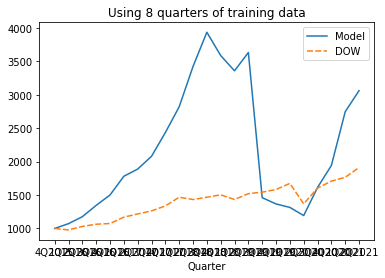

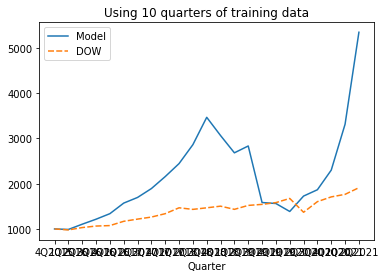

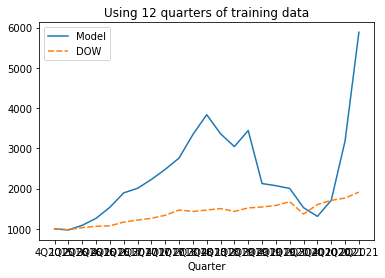

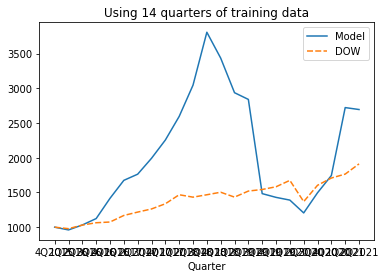

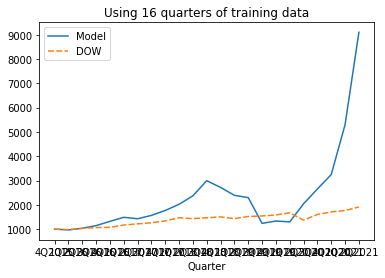

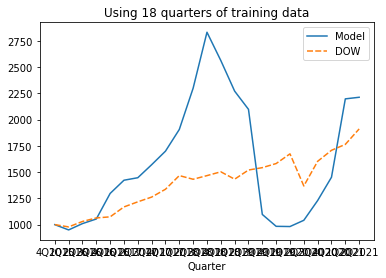

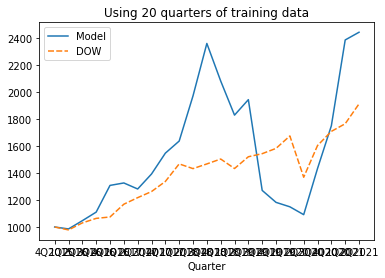

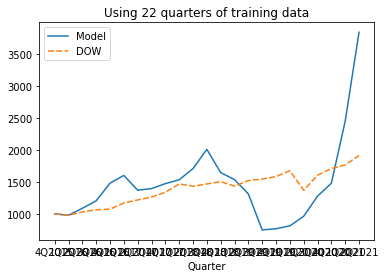

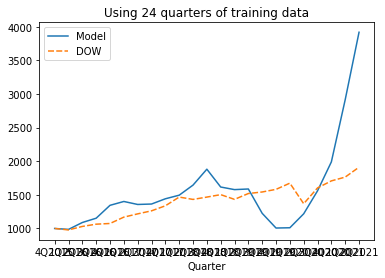

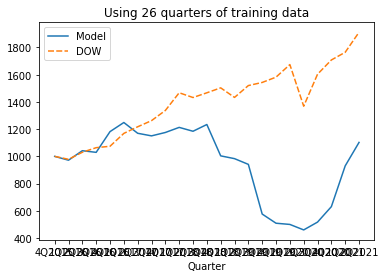

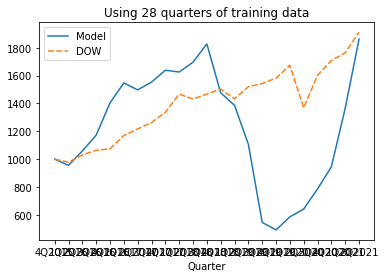

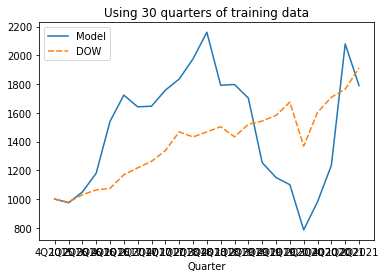

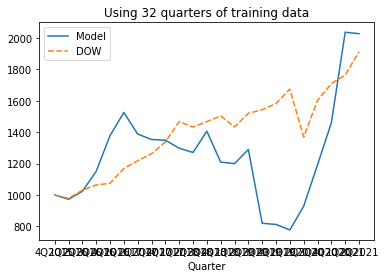

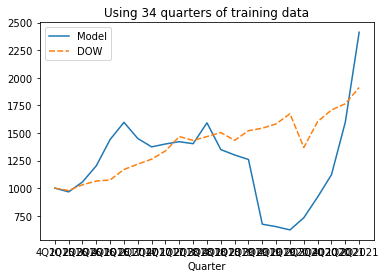

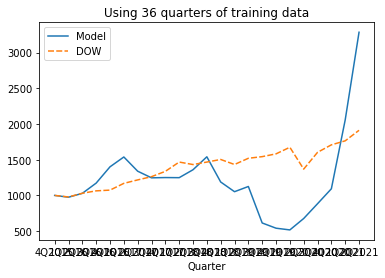

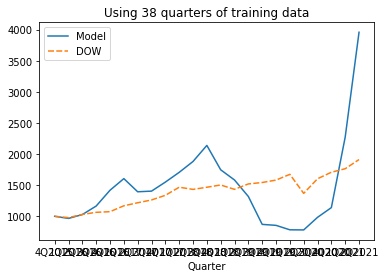

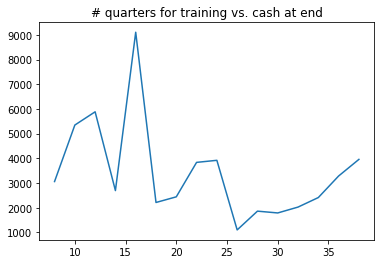

In [21]:
for num_quarters_for_training, portfolio in output.items():
    plot_vs_dow(portfolio)
    plt.title(f"Using {num_quarters_for_training} quarters of training data")
    plt.show()

n_quarters = [x for x in output]
cash_at_end = [p.cash for p in output.values()]
sns.lineplot(x=n_quarters, y=cash_at_end)
plt.title("# quarters for training vs. cash at end")
plt.show()

### Num Quarters for Training: 16

# Num Stocks to Buy

In [11]:
output = OrderedDict()

for num_stocks_to_buy in range(1,16):
    hp = Hyperparams(N_STOCKS_TO_BUY=num_stocks_to_buy, NUM_QUARTERS_FOR_TRAINING=16)

    portfolio = await compute_performance(df=df,
                              start_date=date(2016,1,1),
                              hyperparams=hp,
                              end_date=None)
    
    output[num_stocks_to_buy] = portfolio


Fitting data for: QuarterlyIndex  Q4 2015
Filtering data between 4Q2011 and 4Q2015
QuarterFilter removed 50741 rows. Output size: (10377, 73)
Train Size: (8302, 72), Test Size: (2075, 72)
[1]	valid_0's l1: 23.465	valid_0's l2: 2732.52
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.3358	valid_0's l2: 2694.46
[3]	valid_0's l1: 23.275	valid_0's l2: 2653.85
[4]	valid_0's l1: 23.1374	valid_0's l2: 2615.51
[5]	valid_0's l1: 23.0757	valid_0's l2: 2596.58
[6]	valid_0's l1: 23.0025	valid_0's l2: 2581.85
[7]	valid_0's l1: 22.9443	valid_0's l2: 2546.7
[8]	valid_0's l1: 22.9189	valid_0's l2: 2543.07
[9]	valid_0's l1: 22.9097	valid_0's l2: 2520.84
[10]	valid_0's l1: 22.8462	valid_0's l2: 2480.04
[11]	valid_0's l1: 22.8405	valid_0's l2: 2491.56
[12]	valid_0's l1: 22.8242	valid_0's l2: 2482.92
[13]	valid_0's l1: 22.7983	valid_0's l2: 2459.31
[14]	valid_0's l1: 22.7553	valid_0's l2: 2432.77
[15]	valid_0's l1: 22.7392	valid_0's l2: 2407.62
[16]	valid_0's l1: 22.6899	v

Filtering data between 2Q2016 and 3Q2016
QuarterFilter removed 63633 rows. Output size: (637, 72)
Current portfolio: {QuarterlyIndex WDC Q4 2015: 149.424889135255, QuarterlyIndex HPQ Q1 2016: 227.34829592684954, QuarterlyIndex AMD Q2 2016: 250.0}

Fitting data for: QuarterlyIndex  Q3 2016
Filtering data between 3Q2012 and 3Q2016
QuarterFilter removed 50837 rows. Output size: (10281, 73)
Train Size: (8225, 72), Test Size: (2056, 72)
[1]	valid_0's l1: 22.9028	valid_0's l2: 1958.39
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.7417	valid_0's l2: 1894.08
[3]	valid_0's l1: 22.671	valid_0's l2: 1883.06
[4]	valid_0's l1: 22.5115	valid_0's l2: 1825.96
[5]	valid_0's l1: 22.4321	valid_0's l2: 1793.22
[6]	valid_0's l1: 22.3318	valid_0's l2: 1761.23
[7]	valid_0's l1: 22.2601	valid_0's l2: 1734.1
[8]	valid_0's l1: 22.2108	valid_0's l2: 1731.38
[9]	valid_0's l1: 22.131	valid_0's l2: 1708.66
[10]	valid_0's l1: 22.1254	valid_0's l2: 1696.93
[11]	valid_0's l1: 22.0658

[1]	valid_0's l1: 22.2363	valid_0's l2: 1152.16
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.0843	valid_0's l2: 1134.19
[3]	valid_0's l1: 21.9315	valid_0's l2: 1119.22
[4]	valid_0's l1: 21.7337	valid_0's l2: 1102.76
[5]	valid_0's l1: 21.594	valid_0's l2: 1089.01
[6]	valid_0's l1: 21.528	valid_0's l2: 1078.57
[7]	valid_0's l1: 21.3975	valid_0's l2: 1069.34
[8]	valid_0's l1: 21.3614	valid_0's l2: 1064.41
[9]	valid_0's l1: 21.2859	valid_0's l2: 1057.27
[10]	valid_0's l1: 21.2255	valid_0's l2: 1051.84
[11]	valid_0's l1: 21.1811	valid_0's l2: 1049.98
[12]	valid_0's l1: 21.1147	valid_0's l2: 1046.96
[13]	valid_0's l1: 21.0513	valid_0's l2: 1041.08
[14]	valid_0's l1: 20.9882	valid_0's l2: 1034.21
[15]	valid_0's l1: 21.0245	valid_0's l2: 1038.12
[16]	valid_0's l1: 20.9581	valid_0's l2: 1028.63
[17]	valid_0's l1: 20.9083	valid_0's l2: 1023.66
[18]	valid_0's l1: 20.8837	valid_0's l2: 1020.85
[19]	valid_0's l1: 20.8755	valid_0's l2: 1020.28
[20]	valid_0's l1: 2

Filtering data between 2Q2017 and 3Q2017
QuarterFilter removed 63651 rows. Output size: (619, 72)
Current portfolio: {QuarterlyIndex FMCC Q3 2016: 375.00000000000006, QuarterlyIndex AMD Q4 2016: 283.52491304492634, QuarterlyIndex NRG Q1 2017: 0, QuarterlyIndex ALGN Q2 2017: 756.7733990147783}
Failed to find data for QuarterlyIndex NRG Q3 2017. Setting to zero

Fitting data for: QuarterlyIndex  Q3 2017
Filtering data between 3Q2013 and 3Q2017
QuarterFilter removed 51022 rows. Output size: (10096, 73)
Train Size: (8077, 72), Test Size: (2019, 72)
[1]	valid_0's l1: 20.982	valid_0's l2: 858.082
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.7719	valid_0's l2: 842.07
[3]	valid_0's l1: 20.6305	valid_0's l2: 831.884
[4]	valid_0's l1: 20.4776	valid_0's l2: 819.168
[5]	valid_0's l1: 20.3611	valid_0's l2: 806.854
[6]	valid_0's l1: 20.2651	valid_0's l2: 799.798
[7]	valid_0's l1: 20.1826	valid_0's l2: 792.951
[8]	valid_0's l1: 20.1355	valid_0's l2: 788.27
[9]	vali

[1]	valid_0's l1: 20.881	valid_0's l2: 838.508
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.6472	valid_0's l2: 821.888
[3]	valid_0's l1: 20.4689	valid_0's l2: 808.286
[4]	valid_0's l1: 20.3414	valid_0's l2: 800.029
[5]	valid_0's l1: 20.203	valid_0's l2: 790.229
[6]	valid_0's l1: 20.0537	valid_0's l2: 780.043
[7]	valid_0's l1: 19.96	valid_0's l2: 773.851
[8]	valid_0's l1: 19.8913	valid_0's l2: 770.556
[9]	valid_0's l1: 19.8401	valid_0's l2: 766.238
[10]	valid_0's l1: 19.7972	valid_0's l2: 763.273
[11]	valid_0's l1: 19.7062	valid_0's l2: 756.6
[12]	valid_0's l1: 19.6878	valid_0's l2: 756.561
[13]	valid_0's l1: 19.638	valid_0's l2: 752.674
[14]	valid_0's l1: 19.6092	valid_0's l2: 751.379
[15]	valid_0's l1: 19.5648	valid_0's l2: 748.989
[16]	valid_0's l1: 19.5162	valid_0's l2: 745.417
[17]	valid_0's l1: 19.4836	valid_0's l2: 742.88
[18]	valid_0's l1: 19.4624	valid_0's l2: 740.768
[19]	valid_0's l1: 19.452	valid_0's l2: 741.309
[20]	valid_0's l1: 19.4331	

Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63665 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex MED Q3 2017: 1023.5460100390727, QuarterlyIndex MED Q4 2017: 564.6270019038733, QuarterlyIndex MED Q1 2018: 0.0, QuarterlyIndex AMD Q2 2018: 1709.4401284835428}

Fitting data for: QuarterlyIndex  Q3 2018
Filtering data between 3Q2014 and 3Q2018
QuarterFilter removed 51275 rows. Output size: (9843, 73)
Train Size: (7875, 72), Test Size: (1968, 72)
[1]	valid_0's l1: 22.1414	valid_0's l2: 1054.16
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.9272	valid_0's l2: 1034.92
[3]	valid_0's l1: 21.7278	valid_0's l2: 1017.67
[4]	valid_0's l1: 21.5601	valid_0's l2: 1004.25
[5]	valid_0's l1: 21.4516	valid_0's l2: 993.036
[6]	valid_0's l1: 21.2934	valid_0's l2: 984.111
[7]	valid_0's l1: 21.2131	valid_0's l2: 975.734
[8]	valid_0's l1: 21.1183	valid_0's l2: 968.461
[9]	valid_0's l1: 21.0385	valid_0's l2: 962.127
[10]	valid_0's l1: 20.9677

[96]	valid_0's l1: 18.53	valid_0's l2: 642.749
[97]	valid_0's l1: 18.5203	valid_0's l2: 641.706
[98]	valid_0's l1: 18.5293	valid_0's l2: 641.663
[99]	valid_0's l1: 18.5243	valid_0's l2: 641.432
[100]	valid_0's l1: 18.5012	valid_0's l2: 640.777
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.5012	valid_0's l2: 640.777
Filtering data between 4Q2018 and 1Q2019
QuarterFilter removed 63682 rows. Output size: (588, 72)
Current portfolio: {QuarterlyIndex MED Q1 2018: 0.0, QuarterlyIndex AMD Q2 2018: 3106.541310064483, QuarterlyIndex AMD Q3 2018: 1542.0890234117053, QuarterlyIndex AMD Q4 2018: 703.1614191425188}

Fitting data for: QuarterlyIndex  Q1 2019
Filtering data between 1Q2015 and 1Q2019
QuarterFilter removed 51436 rows. Output size: (9682, 73)
Train Size: (7746, 72), Test Size: (1936, 72)
[1]	valid_0's l1: 21.6562	valid_0's l2: 900.251
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.39	valid_0's l2: 877.989
[3]	valid_0's l1: 21.15

[9]	valid_0's l1: 26.122	valid_0's l2: 17791.8
[10]	valid_0's l1: 26.0648	valid_0's l2: 17773.6
[11]	valid_0's l1: 26.0014	valid_0's l2: 17777.4
[12]	valid_0's l1: 25.956	valid_0's l2: 17793.8
[13]	valid_0's l1: 25.8977	valid_0's l2: 17797.9
[14]	valid_0's l1: 25.8155	valid_0's l2: 17710.9
[15]	valid_0's l1: 25.75	valid_0's l2: 17726.8
[16]	valid_0's l1: 25.7493	valid_0's l2: 17747.5
[17]	valid_0's l1: 25.7012	valid_0's l2: 17732.1
[18]	valid_0's l1: 25.6254	valid_0's l2: 17737.5
[19]	valid_0's l1: 25.5894	valid_0's l2: 17737.4
Early stopping, best iteration is:
[14]	valid_0's l1: 25.8155	valid_0's l2: 17710.9
Filtering data between 3Q2019 and 4Q2019
QuarterFilter removed 63821 rows. Output size: (449, 72)
Current portfolio: {QuarterlyIndex AMD Q4 2018: 0, QuarterlyIndex NBR Q1 2019: 0, QuarterlyIndex WINMQ Q2 2019: 2960.0212768885667, QuarterlyIndex X Q3 2019: 0.0}
Failed to find data for QuarterlyIndex AMD Q4 2019. Setting to zero
Failed to find data for QuarterlyIndex NBR Q4 2019. S

[22]	valid_0's l1: 24.2907	valid_0's l2: 1673.3
[23]	valid_0's l1: 24.2783	valid_0's l2: 1674.09
[24]	valid_0's l1: 24.1982	valid_0's l2: 1662.39
[25]	valid_0's l1: 24.1645	valid_0's l2: 1647.37
[26]	valid_0's l1: 24.1552	valid_0's l2: 1646.99
[27]	valid_0's l1: 24.086	valid_0's l2: 1647.59
[28]	valid_0's l1: 24.0719	valid_0's l2: 1640.61
[29]	valid_0's l1: 24.0573	valid_0's l2: 1633.59
[30]	valid_0's l1: 23.9626	valid_0's l2: 1638.93
[31]	valid_0's l1: 23.9018	valid_0's l2: 1623.83
[32]	valid_0's l1: 23.8424	valid_0's l2: 1620.46
[33]	valid_0's l1: 23.839	valid_0's l2: 1620.73
[34]	valid_0's l1: 23.7272	valid_0's l2: 1603.8
[35]	valid_0's l1: 23.7625	valid_0's l2: 1614.29
[36]	valid_0's l1: 23.6526	valid_0's l2: 1593.73
[37]	valid_0's l1: 23.6264	valid_0's l2: 1582.27
[38]	valid_0's l1: 23.6187	valid_0's l2: 1584.06
[39]	valid_0's l1: 23.5725	valid_0's l2: 1565.86
[40]	valid_0's l1: 23.5898	valid_0's l2: 1568.79
[41]	valid_0's l1: 23.5887	valid_0's l2: 1574.01
[42]	valid_0's l1: 23.61

[27]	valid_0's l1: 22.5027	valid_0's l2: 2308.19
[28]	valid_0's l1: 22.5225	valid_0's l2: 2312.65
[29]	valid_0's l1: 22.5013	valid_0's l2: 2317.56
[30]	valid_0's l1: 22.5043	valid_0's l2: 2322.8
[31]	valid_0's l1: 22.4579	valid_0's l2: 2297.32
Early stopping, best iteration is:
[26]	valid_0's l1: 22.482	valid_0's l2: 2294.45
Filtering data between 4Q2015 and 1Q2016
QuarterFilter removed 63630 rows. Output size: (640, 72)
Current portfolio: {QuarterlyIndex WDC Q4 2015: 125.0, QuarterlyIndex SWN Q4 2015: 125.0}

Fitting data for: QuarterlyIndex  Q1 2016
Filtering data between 1Q2012 and 1Q2016
QuarterFilter removed 50770 rows. Output size: (10348, 73)
Train Size: (8279, 72), Test Size: (2069, 72)
[1]	valid_0's l1: 22.5598	valid_0's l2: 1723.18
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.4342	valid_0's l2: 1696.6
[3]	valid_0's l1: 22.2819	valid_0's l2: 1663.08
[4]	valid_0's l1: 22.2063	valid_0's l2: 1654.09
[5]	valid_0's l1: 22.0907	valid_0's l2: 1637.

[1]	valid_0's l1: 22.9028	valid_0's l2: 1958.39
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.7417	valid_0's l2: 1894.08
[3]	valid_0's l1: 22.671	valid_0's l2: 1883.06
[4]	valid_0's l1: 22.5115	valid_0's l2: 1825.96
[5]	valid_0's l1: 22.4321	valid_0's l2: 1793.22
[6]	valid_0's l1: 22.3318	valid_0's l2: 1761.23
[7]	valid_0's l1: 22.2601	valid_0's l2: 1734.1
[8]	valid_0's l1: 22.2108	valid_0's l2: 1731.38
[9]	valid_0's l1: 22.131	valid_0's l2: 1708.66
[10]	valid_0's l1: 22.1254	valid_0's l2: 1696.93
[11]	valid_0's l1: 22.0658	valid_0's l2: 1675.67
[12]	valid_0's l1: 22.0234	valid_0's l2: 1652.8
[13]	valid_0's l1: 22.0054	valid_0's l2: 1660.28
[14]	valid_0's l1: 21.9539	valid_0's l2: 1648.49
[15]	valid_0's l1: 21.8911	valid_0's l2: 1629.83
[16]	valid_0's l1: 21.8035	valid_0's l2: 1598.76
[17]	valid_0's l1: 21.784	valid_0's l2: 1594.18
[18]	valid_0's l1: 21.7417	valid_0's l2: 1604.91
[19]	valid_0's l1: 21.7518	valid_0's l2: 1592.1
[20]	valid_0's l1: 21.71

[19]	valid_0's l1: 20.8755	valid_0's l2: 1020.28
[20]	valid_0's l1: 20.8391	valid_0's l2: 1018.69
[21]	valid_0's l1: 20.8528	valid_0's l2: 1020.95
[22]	valid_0's l1: 20.8685	valid_0's l2: 1023.1
[23]	valid_0's l1: 20.843	valid_0's l2: 1021
[24]	valid_0's l1: 20.8433	valid_0's l2: 1022.56
[25]	valid_0's l1: 20.8077	valid_0's l2: 1018.14
[26]	valid_0's l1: 20.7798	valid_0's l2: 1016.92
[27]	valid_0's l1: 20.7384	valid_0's l2: 1013.3
[28]	valid_0's l1: 20.7266	valid_0's l2: 1015.42
[29]	valid_0's l1: 20.7173	valid_0's l2: 1012.05
[30]	valid_0's l1: 20.6787	valid_0's l2: 1007.37
[31]	valid_0's l1: 20.6291	valid_0's l2: 1001.93
[32]	valid_0's l1: 20.6231	valid_0's l2: 1000.57
[33]	valid_0's l1: 20.5833	valid_0's l2: 989.536
[34]	valid_0's l1: 20.5656	valid_0's l2: 988.615
[35]	valid_0's l1: 20.539	valid_0's l2: 986.372
[36]	valid_0's l1: 20.5437	valid_0's l2: 986.016
[37]	valid_0's l1: 20.5333	valid_0's l2: 984.681
[38]	valid_0's l1: 20.5242	valid_0's l2: 984.402
[39]	valid_0's l1: 20.4973	

[25]	valid_0's l1: 19.318	valid_0's l2: 726.639
[26]	valid_0's l1: 19.2653	valid_0's l2: 722.968
[27]	valid_0's l1: 19.2431	valid_0's l2: 722.411
[28]	valid_0's l1: 19.2037	valid_0's l2: 718.679
[29]	valid_0's l1: 19.1356	valid_0's l2: 715.479
[30]	valid_0's l1: 19.1373	valid_0's l2: 715.064
[31]	valid_0's l1: 19.0887	valid_0's l2: 712.413
[32]	valid_0's l1: 19.0784	valid_0's l2: 711.502
[33]	valid_0's l1: 19.0565	valid_0's l2: 711.158
[34]	valid_0's l1: 19.0304	valid_0's l2: 709.247
[35]	valid_0's l1: 19.0394	valid_0's l2: 708.884
[36]	valid_0's l1: 19.047	valid_0's l2: 709.91
[37]	valid_0's l1: 19.023	valid_0's l2: 708.021
[38]	valid_0's l1: 19.0236	valid_0's l2: 707.402
[39]	valid_0's l1: 19.0322	valid_0's l2: 707.227
[40]	valid_0's l1: 19.0102	valid_0's l2: 705.853
[41]	valid_0's l1: 18.9964	valid_0's l2: 705.363
[42]	valid_0's l1: 19.0052	valid_0's l2: 705.796
[43]	valid_0's l1: 19.0015	valid_0's l2: 705.326
[44]	valid_0's l1: 18.9765	valid_0's l2: 703.594
[45]	valid_0's l1: 18.97

[15]	valid_0's l1: 19.5648	valid_0's l2: 748.989
[16]	valid_0's l1: 19.5162	valid_0's l2: 745.417
[17]	valid_0's l1: 19.4836	valid_0's l2: 742.88
[18]	valid_0's l1: 19.4624	valid_0's l2: 740.768
[19]	valid_0's l1: 19.452	valid_0's l2: 741.309
[20]	valid_0's l1: 19.4331	valid_0's l2: 739.802
[21]	valid_0's l1: 19.363	valid_0's l2: 736.376
[22]	valid_0's l1: 19.3378	valid_0's l2: 734.961
[23]	valid_0's l1: 19.284	valid_0's l2: 730.885
[24]	valid_0's l1: 19.2872	valid_0's l2: 729.931
[25]	valid_0's l1: 19.2576	valid_0's l2: 729.431
[26]	valid_0's l1: 19.2233	valid_0's l2: 727.817
[27]	valid_0's l1: 19.2135	valid_0's l2: 727.254
[28]	valid_0's l1: 19.1708	valid_0's l2: 725.796
[29]	valid_0's l1: 19.1562	valid_0's l2: 724.815
[30]	valid_0's l1: 19.1151	valid_0's l2: 722.508
[31]	valid_0's l1: 19.0914	valid_0's l2: 720.773
[32]	valid_0's l1: 19.0606	valid_0's l2: 719.349
[33]	valid_0's l1: 19.0513	valid_0's l2: 718.109
[34]	valid_0's l1: 19.0248	valid_0's l2: 716.542
[35]	valid_0's l1: 19.01

[100]	valid_0's l1: 18.2058	valid_0's l2: 609.703
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.2058	valid_0's l2: 609.703
Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63665 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex MED Q3 2017: 622.0840806763351, QuarterlyIndex NVDA Q3 2017: 388.4186096701567, QuarterlyIndex MED Q4 2017: 359.3894409914028, QuarterlyIndex AMD Q4 2017: 193.68135215997512, QuarterlyIndex MED Q1 2018: 307.3791864019322, QuarterlyIndex ABMD Q1 2018: 261.98051421656015, QuarterlyIndex AMD Q2 2018: 488.61093306572974, QuarterlyIndex MED Q2 2018: 488.61093306572974}

Fitting data for: QuarterlyIndex  Q3 2018
Filtering data between 3Q2014 and 3Q2018
QuarterFilter removed 51275 rows. Output size: (9843, 73)
Train Size: (7875, 72), Test Size: (1968, 72)
[1]	valid_0's l1: 22.1414	valid_0's l2: 1054.16
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.9272	valid_0's l2: 1034.92
[3]	vali

[74]	valid_0's l1: 18.7564	valid_0's l2: 657.559
[75]	valid_0's l1: 18.7482	valid_0's l2: 657.436
[76]	valid_0's l1: 18.7516	valid_0's l2: 656.888
[77]	valid_0's l1: 18.7242	valid_0's l2: 656.303
[78]	valid_0's l1: 18.7206	valid_0's l2: 655.913
[79]	valid_0's l1: 18.7141	valid_0's l2: 655.312
[80]	valid_0's l1: 18.6855	valid_0's l2: 653.61
[81]	valid_0's l1: 18.6743	valid_0's l2: 653.356
[82]	valid_0's l1: 18.6713	valid_0's l2: 653.693
[83]	valid_0's l1: 18.6708	valid_0's l2: 652.537
[84]	valid_0's l1: 18.6709	valid_0's l2: 651.444
[85]	valid_0's l1: 18.6592	valid_0's l2: 651.417
[86]	valid_0's l1: 18.6555	valid_0's l2: 651.279
[87]	valid_0's l1: 18.6242	valid_0's l2: 649.633
[88]	valid_0's l1: 18.6198	valid_0's l2: 649.529
[89]	valid_0's l1: 18.6095	valid_0's l2: 648.322
[90]	valid_0's l1: 18.6249	valid_0's l2: 648.895
[91]	valid_0's l1: 18.6007	valid_0's l2: 647.368
[92]	valid_0's l1: 18.5961	valid_0's l2: 646.721
[93]	valid_0's l1: 18.5915	valid_0's l2: 645.816
[94]	valid_0's l1: 18

[22]	valid_0's l1: 22.3738	valid_0's l2: 1576.43
[23]	valid_0's l1: 22.3118	valid_0's l2: 1564.4
[24]	valid_0's l1: 22.2847	valid_0's l2: 1564.36
[25]	valid_0's l1: 22.2675	valid_0's l2: 1566.7
[26]	valid_0's l1: 22.2312	valid_0's l2: 1560.18
[27]	valid_0's l1: 22.2199	valid_0's l2: 1560.49
[28]	valid_0's l1: 22.2053	valid_0's l2: 1560.76
[29]	valid_0's l1: 22.174	valid_0's l2: 1559.81
[30]	valid_0's l1: 22.1953	valid_0's l2: 1562.26
[31]	valid_0's l1: 22.1923	valid_0's l2: 1563.13
[32]	valid_0's l1: 22.1552	valid_0's l2: 1562.26
[33]	valid_0's l1: 22.161	valid_0's l2: 1564.08
[34]	valid_0's l1: 22.0993	valid_0's l2: 1555.72
[35]	valid_0's l1: 22.0692	valid_0's l2: 1554.5
[36]	valid_0's l1: 22.0498	valid_0's l2: 1549.43
[37]	valid_0's l1: 22.0177	valid_0's l2: 1547.71
[38]	valid_0's l1: 22.0099	valid_0's l2: 1547.97
[39]	valid_0's l1: 21.9772	valid_0's l2: 1549.09
[40]	valid_0's l1: 21.946	valid_0's l2: 1547.17
[41]	valid_0's l1: 21.9469	valid_0's l2: 1549.48
[42]	valid_0's l1: 21.927	

[43]	valid_0's l1: 26.0778	valid_0's l2: 20562.2
[44]	valid_0's l1: 26.0432	valid_0's l2: 20529.2
[45]	valid_0's l1: 26.0442	valid_0's l2: 20517.1
[46]	valid_0's l1: 26.0202	valid_0's l2: 20537.5
[47]	valid_0's l1: 25.9798	valid_0's l2: 20528.9
[48]	valid_0's l1: 25.9485	valid_0's l2: 20539
[49]	valid_0's l1: 25.9245	valid_0's l2: 20505.5
[50]	valid_0's l1: 25.9109	valid_0's l2: 20505.8
[51]	valid_0's l1: 25.894	valid_0's l2: 20490.2
[52]	valid_0's l1: 25.8526	valid_0's l2: 20488.3
[53]	valid_0's l1: 25.8393	valid_0's l2: 20484.5
[54]	valid_0's l1: 25.8155	valid_0's l2: 20473.6
[55]	valid_0's l1: 25.7789	valid_0's l2: 20441.2
[56]	valid_0's l1: 25.7332	valid_0's l2: 20375
[57]	valid_0's l1: 25.6926	valid_0's l2: 20392.5
[58]	valid_0's l1: 25.7042	valid_0's l2: 20382
[59]	valid_0's l1: 25.6734	valid_0's l2: 20368.5
[60]	valid_0's l1: 25.6384	valid_0's l2: 20352.4
[61]	valid_0's l1: 25.6218	valid_0's l2: 20351.8
[62]	valid_0's l1: 25.6085	valid_0's l2: 20342
[63]	valid_0's l1: 25.5847	va

[38]	valid_0's l1: 28.7492	valid_0's l2: 24806.2
[39]	valid_0's l1: 28.7756	valid_0's l2: 24827.4
[40]	valid_0's l1: 28.7286	valid_0's l2: 24840
Early stopping, best iteration is:
[35]	valid_0's l1: 28.8641	valid_0's l2: 24791.9
Filtering data between 4Q2020 and 1Q2021
QuarterFilter removed 63673 rows. Output size: (597, 72)
Current portfolio: {QuarterlyIndex APH Q1 2020: 0.0, QuarterlyIndex TSLA Q1 2020: 0.0, QuarterlyIndex NBR Q2 2020: 583.9368087794551, QuarterlyIndex RIG Q2 2020: 358.47505446760835, QuarterlyIndex CCU Q3 2020: 0.0, QuarterlyIndex IAC Q3 2020: 0.0, QuarterlyIndex NBR Q4 2020: 0.0, QuarterlyIndex HP Q4 2020: 0.0}

Fitting data for: QuarterlyIndex  Q1 2021
Filtering data between 1Q2017 and 1Q2021
QuarterFilter removed 53525 rows. Output size: (7593, 73)
Train Size: (6075, 72), Test Size: (1518, 72)
[1]	valid_0's l1: 28.8491	valid_0's l2: 3288.39
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 28.2977	valid_0's l2: 3199.07
[3]	valid_0's l1

[51]	valid_0's l1: 21.262	valid_0's l2: 1420.66
[52]	valid_0's l1: 21.2242	valid_0's l2: 1411.06
[53]	valid_0's l1: 21.2188	valid_0's l2: 1410.57
[54]	valid_0's l1: 21.2001	valid_0's l2: 1406.55
[55]	valid_0's l1: 21.2037	valid_0's l2: 1408.45
[56]	valid_0's l1: 21.2029	valid_0's l2: 1402.05
[57]	valid_0's l1: 21.2232	valid_0's l2: 1404.34
[58]	valid_0's l1: 21.1844	valid_0's l2: 1399.89
[59]	valid_0's l1: 21.168	valid_0's l2: 1397.57
[60]	valid_0's l1: 21.1646	valid_0's l2: 1395.59
[61]	valid_0's l1: 21.1688	valid_0's l2: 1388.3
[62]	valid_0's l1: 21.1231	valid_0's l2: 1372.72
[63]	valid_0's l1: 21.1188	valid_0's l2: 1379.45
[64]	valid_0's l1: 21.075	valid_0's l2: 1376.61
[65]	valid_0's l1: 21.0541	valid_0's l2: 1369.42
[66]	valid_0's l1: 21.0215	valid_0's l2: 1368.07
[67]	valid_0's l1: 21.0204	valid_0's l2: 1364.16
[68]	valid_0's l1: 20.9608	valid_0's l2: 1359.68
[69]	valid_0's l1: 20.9579	valid_0's l2: 1361.69
[70]	valid_0's l1: 20.9432	valid_0's l2: 1361.49
[71]	valid_0's l1: 20.95

[35]	valid_0's l1: 21.0964	valid_0's l2: 1395.19
[36]	valid_0's l1: 21.1141	valid_0's l2: 1394.09
[37]	valid_0's l1: 21.0613	valid_0's l2: 1382.22
[38]	valid_0's l1: 21.0426	valid_0's l2: 1372.96
[39]	valid_0's l1: 21.0471	valid_0's l2: 1367.84
[40]	valid_0's l1: 21.0146	valid_0's l2: 1356.67
[41]	valid_0's l1: 20.9882	valid_0's l2: 1352.09
[42]	valid_0's l1: 20.9727	valid_0's l2: 1344.68
[43]	valid_0's l1: 20.9494	valid_0's l2: 1338.4
[44]	valid_0's l1: 20.9479	valid_0's l2: 1334.1
[45]	valid_0's l1: 20.9295	valid_0's l2: 1332.07
[46]	valid_0's l1: 20.9229	valid_0's l2: 1328.42
[47]	valid_0's l1: 20.9025	valid_0's l2: 1321.27
[48]	valid_0's l1: 20.8854	valid_0's l2: 1318.04
[49]	valid_0's l1: 20.8627	valid_0's l2: 1312.74
[50]	valid_0's l1: 20.8043	valid_0's l2: 1305.12
[51]	valid_0's l1: 20.7909	valid_0's l2: 1301.46
[52]	valid_0's l1: 20.7535	valid_0's l2: 1297.6
[53]	valid_0's l1: 20.747	valid_0's l2: 1294.52
[54]	valid_0's l1: 20.7152	valid_0's l2: 1292.2
[55]	valid_0's l1: 20.724

[80]	valid_0's l1: 19.0521	valid_0's l2: 1077.8
[81]	valid_0's l1: 19.0418	valid_0's l2: 1071.18
[82]	valid_0's l1: 19.0114	valid_0's l2: 1070.49
[83]	valid_0's l1: 19.0048	valid_0's l2: 1067.31
[84]	valid_0's l1: 19.0036	valid_0's l2: 1063.52
[85]	valid_0's l1: 18.9877	valid_0's l2: 1058.48
[86]	valid_0's l1: 18.9682	valid_0's l2: 1054.07
[87]	valid_0's l1: 18.9594	valid_0's l2: 1049.12
[88]	valid_0's l1: 18.9477	valid_0's l2: 1044.76
[89]	valid_0's l1: 18.955	valid_0's l2: 1041.77
[90]	valid_0's l1: 18.954	valid_0's l2: 1038.65
[91]	valid_0's l1: 18.9375	valid_0's l2: 1032.9
[92]	valid_0's l1: 18.9153	valid_0's l2: 1027.13
[93]	valid_0's l1: 18.9277	valid_0's l2: 1023.69
[94]	valid_0's l1: 18.9218	valid_0's l2: 1019.9
[95]	valid_0's l1: 18.9238	valid_0's l2: 1016.46
[96]	valid_0's l1: 18.9116	valid_0's l2: 1011.97
[97]	valid_0's l1: 18.8997	valid_0's l2: 1008.09
[98]	valid_0's l1: 18.8778	valid_0's l2: 1005.94
[99]	valid_0's l1: 18.8844	valid_0's l2: 1006.67
[100]	valid_0's l1: 18.88

[98]	valid_0's l1: 18.0426	valid_0's l2: 625.714
[99]	valid_0's l1: 18.0359	valid_0's l2: 625.175
[100]	valid_0's l1: 18.0263	valid_0's l2: 624.496
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.0263	valid_0's l2: 624.496
Filtering data between 4Q2017 and 1Q2018
QuarterFilter removed 63658 rows. Output size: (612, 72)
Current portfolio: {QuarterlyIndex NRG Q1 2017: 0.0, QuarterlyIndex NVDA Q1 2017: 200.49642560765434, QuarterlyIndex INCY Q1 2017: 87.79719408667857, QuarterlyIndex ALGN Q2 2017: 279.0725651026178, QuarterlyIndex PETS Q2 2017: 221.05551514533357, QuarterlyIndex BA Q2 2017: 241.5522561398418, QuarterlyIndex MED Q3 2017: 189.0195066159071, QuarterlyIndex NVDA Q3 2017: 185.48662949484256, QuarterlyIndex PLD Q3 2017: 152.17312554966836, QuarterlyIndex MED Q4 2017: 120.36424932222667, QuarterlyIndex AMD Q4 2017: 120.36424932222667, QuarterlyIndex ABMD Q4 2017: 120.36424932222667}

Fitting data for: QuarterlyIndex  Q1 2018
Filtering data between 1Q2014 a

Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63665 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex MED Q3 2017: 383.92100930359607, QuarterlyIndex NVDA Q3 2017: 239.71368065670362, QuarterlyIndex PLD Q3 2017: 149.02519849646492, QuarterlyIndex MED Q4 2017: 244.47404879624244, QuarterlyIndex AMD Q4 2017: 131.75140651951614, QuarterlyIndex ABMD Q4 2017: 239.08003461845595, QuarterlyIndex MED Q1 2018: 181.9416968706718, QuarterlyIndex ABMD Q1 2018: 155.06963845393435, QuarterlyIndex LRCX Q1 2018: 104.81103317030019, QuarterlyIndex AMD Q2 2018: 295.29856248764264, QuarterlyIndex MED Q2 2018: 295.29856248764264, QuarterlyIndex WYND Q2 2018: 295.29856248764264}

Fitting data for: QuarterlyIndex  Q3 2018
Filtering data between 3Q2014 and 3Q2018
QuarterFilter removed 51275 rows. Output size: (9843, 73)
Train Size: (7875, 72), Test Size: (1968, 72)
[1]	valid_0's l1: 22.1414	valid_0's l2: 1054.16
Training until validation scores don't improve for 5 rounds
[2]	va

[33]	valid_0's l1: 19.3247	valid_0's l2: 694.989
[34]	valid_0's l1: 19.3352	valid_0's l2: 694.992
[35]	valid_0's l1: 19.3205	valid_0's l2: 693.085
[36]	valid_0's l1: 19.29	valid_0's l2: 690.908
[37]	valid_0's l1: 19.265	valid_0's l2: 689.781
[38]	valid_0's l1: 19.2247	valid_0's l2: 687.095
[39]	valid_0's l1: 19.1865	valid_0's l2: 685.232
[40]	valid_0's l1: 19.1646	valid_0's l2: 684.247
[41]	valid_0's l1: 19.1367	valid_0's l2: 682.743
[42]	valid_0's l1: 19.1296	valid_0's l2: 682.104
[43]	valid_0's l1: 19.0953	valid_0's l2: 679.733
[44]	valid_0's l1: 19.0928	valid_0's l2: 680.473
[45]	valid_0's l1: 19.0571	valid_0's l2: 678.509
[46]	valid_0's l1: 19.0304	valid_0's l2: 677.135
[47]	valid_0's l1: 19.0146	valid_0's l2: 675.851
[48]	valid_0's l1: 19.0068	valid_0's l2: 675.867
[49]	valid_0's l1: 19.0111	valid_0's l2: 675.624
[50]	valid_0's l1: 18.9907	valid_0's l2: 674.515
[51]	valid_0's l1: 18.9922	valid_0's l2: 674.511
[52]	valid_0's l1: 18.9658	valid_0's l2: 672.842
[53]	valid_0's l1: 18.9

Failed to find data for QuarterlyIndex ATVI Q2 2019. Setting to zero
Failed to find data for QuarterlyIndex PCG Q2 2019. Setting to zero

Fitting data for: QuarterlyIndex  Q2 2019
Filtering data between 2Q2015 and 2Q2019
QuarterFilter removed 51517 rows. Output size: (9601, 73)
Train Size: (7681, 72), Test Size: (1920, 72)
[1]	valid_0's l1: 24.3294	valid_0's l2: 1754.57
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 24.0727	valid_0's l2: 1733.53
[3]	valid_0's l1: 23.8607	valid_0's l2: 1715.23
[4]	valid_0's l1: 23.6447	valid_0's l2: 1684.33
[5]	valid_0's l1: 23.4948	valid_0's l2: 1670.07
[6]	valid_0's l1: 23.3302	valid_0's l2: 1658.53
[7]	valid_0's l1: 23.2145	valid_0's l2: 1638.85
[8]	valid_0's l1: 23.1355	valid_0's l2: 1634.29
[9]	valid_0's l1: 23.0571	valid_0's l2: 1630.05
[10]	valid_0's l1: 22.9842	valid_0's l2: 1624.07
[11]	valid_0's l1: 22.9076	valid_0's l2: 1615.9
[12]	valid_0's l1: 22.8491	valid_0's l2: 1603.96
[13]	valid_0's l1: 22.8057	valid_0's 

Current portfolio: {QuarterlyIndex NBR Q1 2019: 0, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex NVDA Q1 2019: 0, QuarterlyIndex WINMQ Q2 2019: 222.17065331408722, QuarterlyIndex LIFE Q2 2019: 213.32791458012068, QuarterlyIndex IR Q2 2019: 394.1924423339986, QuarterlyIndex X Q3 2019: 113.56265812061662, QuarterlyIndex IR Q3 2019: 126.12565088868052, QuarterlyIndex NE Q3 2019: 81.91225468963356, QuarterlyIndex WINMQ Q4 2019: 0.0, QuarterlyIndex JBL Q4 2019: 0.0, QuarterlyIndex FTR Q4 2019: 0.0}
Failed to find data for QuarterlyIndex NBR Q1 2020. Setting to zero
Failed to find data for QuarterlyIndex PCG Q1 2020. Setting to zero
Failed to find data for QuarterlyIndex NVDA Q1 2020. Setting to zero
Failed to find data for QuarterlyIndex FTR Q1 2020. Setting to zero

Fitting data for: QuarterlyIndex  Q1 2020
Filtering data between 1Q2016 and 1Q2020
QuarterFilter removed 52067 rows. Output size: (9051, 73)
Train Size: (7241, 72), Test Size: (1810, 72)
[1]	valid_0's l1: 29.6105	valid_0's l2: 

[1]	valid_0's l1: 27.6994	valid_0's l2: 2022.17
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.1118	valid_0's l2: 1961.93
[3]	valid_0's l1: 26.8298	valid_0's l2: 1921.74
[4]	valid_0's l1: 26.3203	valid_0's l2: 1874.66
[5]	valid_0's l1: 26.0361	valid_0's l2: 1826.71
[6]	valid_0's l1: 25.8345	valid_0's l2: 1830.21
[7]	valid_0's l1: 25.7582	valid_0's l2: 1842.03
[8]	valid_0's l1: 25.445	valid_0's l2: 1805.12
[9]	valid_0's l1: 25.3873	valid_0's l2: 1811.48
[10]	valid_0's l1: 25.271	valid_0's l2: 1790.8
[11]	valid_0's l1: 25.0846	valid_0's l2: 1764.69
[12]	valid_0's l1: 25.0484	valid_0's l2: 1777.11
[13]	valid_0's l1: 24.9452	valid_0's l2: 1770.25
[14]	valid_0's l1: 24.907	valid_0's l2: 1790.49
[15]	valid_0's l1: 24.9064	valid_0's l2: 1809.18
[16]	valid_0's l1: 24.8023	valid_0's l2: 1786.19
Early stopping, best iteration is:
[11]	valid_0's l1: 25.0846	valid_0's l2: 1764.69
Filtering data between 3Q2020 and 4Q2020
QuarterFilter removed 63668 rows. Output siz

QuarterFilter removed 50770 rows. Output size: (10348, 73)
Train Size: (8279, 72), Test Size: (2069, 72)
[1]	valid_0's l1: 22.5598	valid_0's l2: 1723.18
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.4342	valid_0's l2: 1696.6
[3]	valid_0's l1: 22.2819	valid_0's l2: 1663.08
[4]	valid_0's l1: 22.2063	valid_0's l2: 1654.09
[5]	valid_0's l1: 22.0907	valid_0's l2: 1637.85
[6]	valid_0's l1: 21.9941	valid_0's l2: 1624.44
[7]	valid_0's l1: 21.9385	valid_0's l2: 1608.55
[8]	valid_0's l1: 21.8848	valid_0's l2: 1601.46
[9]	valid_0's l1: 21.8615	valid_0's l2: 1602.4
[10]	valid_0's l1: 21.7803	valid_0's l2: 1599.57
[11]	valid_0's l1: 21.7348	valid_0's l2: 1590.48
[12]	valid_0's l1: 21.6827	valid_0's l2: 1573.32
[13]	valid_0's l1: 21.6887	valid_0's l2: 1575.53
[14]	valid_0's l1: 21.6795	valid_0's l2: 1557.94
[15]	valid_0's l1: 21.6082	valid_0's l2: 1537.2
[16]	valid_0's l1: 21.5945	valid_0's l2: 1520.27
[17]	valid_0's l1: 21.5494	valid_0's l2: 1512.83
[18]	valid_0's

[37]	valid_0's l1: 21.2526	valid_0's l2: 1447.56
[38]	valid_0's l1: 21.2367	valid_0's l2: 1443.32
[39]	valid_0's l1: 21.1873	valid_0's l2: 1421.8
[40]	valid_0's l1: 21.1447	valid_0's l2: 1411.23
[41]	valid_0's l1: 21.0958	valid_0's l2: 1403.94
[42]	valid_0's l1: 21.0704	valid_0's l2: 1396.77
[43]	valid_0's l1: 21.044	valid_0's l2: 1382.65
[44]	valid_0's l1: 21.0647	valid_0's l2: 1378.69
[45]	valid_0's l1: 21.0472	valid_0's l2: 1376.11
[46]	valid_0's l1: 21.0233	valid_0's l2: 1369.5
[47]	valid_0's l1: 20.9902	valid_0's l2: 1358.09
[48]	valid_0's l1: 20.9897	valid_0's l2: 1356.09
[49]	valid_0's l1: 20.9682	valid_0's l2: 1354.39
[50]	valid_0's l1: 20.9528	valid_0's l2: 1343.43
[51]	valid_0's l1: 20.9178	valid_0's l2: 1338.88
[52]	valid_0's l1: 20.9016	valid_0's l2: 1334.61
[53]	valid_0's l1: 20.9016	valid_0's l2: 1331.92
[54]	valid_0's l1: 20.8866	valid_0's l2: 1326.65
[55]	valid_0's l1: 20.8574	valid_0's l2: 1323.37
[56]	valid_0's l1: 20.8282	valid_0's l2: 1318.91
[57]	valid_0's l1: 20.8

[18]	valid_0's l1: 20.8837	valid_0's l2: 1020.85
[19]	valid_0's l1: 20.8755	valid_0's l2: 1020.28
[20]	valid_0's l1: 20.8391	valid_0's l2: 1018.69
[21]	valid_0's l1: 20.8528	valid_0's l2: 1020.95
[22]	valid_0's l1: 20.8685	valid_0's l2: 1023.1
[23]	valid_0's l1: 20.843	valid_0's l2: 1021
[24]	valid_0's l1: 20.8433	valid_0's l2: 1022.56
[25]	valid_0's l1: 20.8077	valid_0's l2: 1018.14
[26]	valid_0's l1: 20.7798	valid_0's l2: 1016.92
[27]	valid_0's l1: 20.7384	valid_0's l2: 1013.3
[28]	valid_0's l1: 20.7266	valid_0's l2: 1015.42
[29]	valid_0's l1: 20.7173	valid_0's l2: 1012.05
[30]	valid_0's l1: 20.6787	valid_0's l2: 1007.37
[31]	valid_0's l1: 20.6291	valid_0's l2: 1001.93
[32]	valid_0's l1: 20.6231	valid_0's l2: 1000.57
[33]	valid_0's l1: 20.5833	valid_0's l2: 989.536
[34]	valid_0's l1: 20.5656	valid_0's l2: 988.615
[35]	valid_0's l1: 20.539	valid_0's l2: 986.372
[36]	valid_0's l1: 20.5437	valid_0's l2: 986.016
[37]	valid_0's l1: 20.5333	valid_0's l2: 984.681
[38]	valid_0's l1: 20.5242	

Filtering data between 2Q2017 and 3Q2017
QuarterFilter removed 63651 rows. Output size: (619, 72)
Current portfolio: {QuarterlyIndex FMCC Q3 2016: 93.75000000000001, QuarterlyIndex AMD Q3 2016: 121.34676145339651, QuarterlyIndex HPQ Q3 2016: 82.68178264268963, QuarterlyIndex CLF Q3 2016: 66.99046920821114, QuarterlyIndex AMD Q4 2016: 78.35534788748758, QuarterlyIndex HPQ Q4 2016: 68.34714196134003, QuarterlyIndex IQV Q4 2016: 66.60246888924641, QuarterlyIndex MAR Q4 2016: 78.34874845634064, QuarterlyIndex NRG Q1 2017: 0, QuarterlyIndex NVDA Q1 2017: 112.35968932013887, QuarterlyIndex INCY Q1 2017: 98.80504759942758, QuarterlyIndex SWKS Q1 2017: 115.55033374942778, QuarterlyIndex ALGN Q2 2017: 110.83790930934822, QuarterlyIndex PETS Q2 2017: 110.83790930934822, QuarterlyIndex BA Q2 2017: 110.83790930934822, QuarterlyIndex IAC Q2 2017: 110.83790930934822}
Failed to find data for QuarterlyIndex NRG Q3 2017. Setting to zero

Fitting data for: QuarterlyIndex  Q3 2017
Filtering data between 

[99]	valid_0's l1: 18.0359	valid_0's l2: 625.175
[100]	valid_0's l1: 18.0263	valid_0's l2: 624.496
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.0263	valid_0's l2: 624.496
Filtering data between 4Q2017 and 1Q2018
QuarterFilter removed 63658 rows. Output size: (612, 72)
Current portfolio: {QuarterlyIndex NRG Q1 2017: 0.0, QuarterlyIndex NVDA Q1 2017: 184.4653890652423, QuarterlyIndex INCY Q1 2017: 80.77721843145646, QuarterlyIndex SWKS Q1 2017: 117.63845825765573, QuarterlyIndex ALGN Q2 2017: 186.37427917416235, QuarterlyIndex PETS Q2 2017: 147.62849324703546, QuarterlyIndex BA Q2 2017: 161.31692344749712, QuarterlyIndex IAC Q2 2017: 155.97729456286226, QuarterlyIndex MED Q3 2017: 129.47723192144653, QuarterlyIndex NVDA Q3 2017: 127.05723221589473, QuarterlyIndex PLD Q3 2017: 104.2376811883377, QuarterlyIndex ALGN Q3 2017: 129.73168855712953, QuarterlyIndex MED Q4 2017: 83.85618062810099, QuarterlyIndex AMD Q4 2017: 83.85618062810099, QuarterlyIndex ABMD Q4 2017

[76]	valid_0's l1: 18.3714	valid_0's l2: 621.436
[77]	valid_0's l1: 18.3632	valid_0's l2: 621.007
[78]	valid_0's l1: 18.3588	valid_0's l2: 620.846
[79]	valid_0's l1: 18.3616	valid_0's l2: 620.323
[80]	valid_0's l1: 18.3375	valid_0's l2: 618.578
[81]	valid_0's l1: 18.3294	valid_0's l2: 617.888
[82]	valid_0's l1: 18.3246	valid_0's l2: 617.617
[83]	valid_0's l1: 18.3255	valid_0's l2: 617.501
[84]	valid_0's l1: 18.317	valid_0's l2: 616.485
[85]	valid_0's l1: 18.3235	valid_0's l2: 616.679
[86]	valid_0's l1: 18.3006	valid_0's l2: 615.273
[87]	valid_0's l1: 18.2878	valid_0's l2: 614.733
[88]	valid_0's l1: 18.2935	valid_0's l2: 615.234
[89]	valid_0's l1: 18.2933	valid_0's l2: 614.865
[90]	valid_0's l1: 18.2845	valid_0's l2: 614.232
[91]	valid_0's l1: 18.2706	valid_0's l2: 612.929
[92]	valid_0's l1: 18.268	valid_0's l2: 612.662
[93]	valid_0's l1: 18.2559	valid_0's l2: 612.264
[94]	valid_0's l1: 18.2524	valid_0's l2: 611.897
[95]	valid_0's l1: 18.2481	valid_0's l2: 611.898
[96]	valid_0's l1: 18.

[27]	valid_0's l1: 19.5189	valid_0's l2: 710.862
[28]	valid_0's l1: 19.4492	valid_0's l2: 706.334
[29]	valid_0's l1: 19.4238	valid_0's l2: 705.06
[30]	valid_0's l1: 19.4043	valid_0's l2: 702.879
[31]	valid_0's l1: 19.3692	valid_0's l2: 699.241
[32]	valid_0's l1: 19.3376	valid_0's l2: 696.965
[33]	valid_0's l1: 19.3247	valid_0's l2: 694.989
[34]	valid_0's l1: 19.3352	valid_0's l2: 694.992
[35]	valid_0's l1: 19.3205	valid_0's l2: 693.085
[36]	valid_0's l1: 19.29	valid_0's l2: 690.908
[37]	valid_0's l1: 19.265	valid_0's l2: 689.781
[38]	valid_0's l1: 19.2247	valid_0's l2: 687.095
[39]	valid_0's l1: 19.1865	valid_0's l2: 685.232
[40]	valid_0's l1: 19.1646	valid_0's l2: 684.247
[41]	valid_0's l1: 19.1367	valid_0's l2: 682.743
[42]	valid_0's l1: 19.1296	valid_0's l2: 682.104
[43]	valid_0's l1: 19.0953	valid_0's l2: 679.733
[44]	valid_0's l1: 19.0928	valid_0's l2: 680.473
[45]	valid_0's l1: 19.0571	valid_0's l2: 678.509
[46]	valid_0's l1: 19.0304	valid_0's l2: 677.135
[47]	valid_0's l1: 19.01


Fitting data for: QuarterlyIndex  Q2 2019
Filtering data between 2Q2015 and 2Q2019
QuarterFilter removed 51517 rows. Output size: (9601, 73)
Train Size: (7681, 72), Test Size: (1920, 72)
[1]	valid_0's l1: 24.3294	valid_0's l2: 1754.57
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 24.0727	valid_0's l2: 1733.53
[3]	valid_0's l1: 23.8607	valid_0's l2: 1715.23
[4]	valid_0's l1: 23.6447	valid_0's l2: 1684.33
[5]	valid_0's l1: 23.4948	valid_0's l2: 1670.07
[6]	valid_0's l1: 23.3302	valid_0's l2: 1658.53
[7]	valid_0's l1: 23.2145	valid_0's l2: 1638.85
[8]	valid_0's l1: 23.1355	valid_0's l2: 1634.29
[9]	valid_0's l1: 23.0571	valid_0's l2: 1630.05
[10]	valid_0's l1: 22.9842	valid_0's l2: 1624.07
[11]	valid_0's l1: 22.9076	valid_0's l2: 1615.9
[12]	valid_0's l1: 22.8491	valid_0's l2: 1603.96
[13]	valid_0's l1: 22.8057	valid_0's l2: 1601.93
[14]	valid_0's l1: 22.741	valid_0's l2: 1596.16
[15]	valid_0's l1: 22.6815	valid_0's l2: 1591.22
[16]	valid_0's l1: 22.6601	v

Filtering data between 4Q2019 and 1Q2020
QuarterFilter removed 63856 rows. Output size: (414, 72)
Current portfolio: {QuarterlyIndex NBR Q1 2019: 0, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex NVDA Q1 2019: 0, QuarterlyIndex LRCX Q1 2019: 196.91431828739573, QuarterlyIndex WINMQ Q2 2019: 134.5743857863804, QuarterlyIndex LIFE Q2 2019: 129.2181152076976, QuarterlyIndex IR Q2 2019: 238.7723356681843, QuarterlyIndex QCOM Q2 2019: 264.12018973240964, QuarterlyIndex X Q3 2019: 137.8428880655905, QuarterlyIndex IR Q3 2019: 153.0919077218385, QuarterlyIndex NE Q3 2019: 99.42547965362816, QuarterlyIndex LRCX Q3 2019: 180.56759717245762, QuarterlyIndex WINMQ Q4 2019: 0.0, QuarterlyIndex JBL Q4 2019: 0.0, QuarterlyIndex FTR Q4 2019: 0.0, QuarterlyIndex TSLA Q4 2019: 0.0}
Failed to find data for QuarterlyIndex NBR Q1 2020. Setting to zero
Failed to find data for QuarterlyIndex PCG Q1 2020. Setting to zero
Failed to find data for QuarterlyIndex NVDA Q1 2020. Setting to zero
Failed to find data f

[1]	valid_0's l1: 27.6994	valid_0's l2: 2022.17
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.1118	valid_0's l2: 1961.93
[3]	valid_0's l1: 26.8298	valid_0's l2: 1921.74
[4]	valid_0's l1: 26.3203	valid_0's l2: 1874.66
[5]	valid_0's l1: 26.0361	valid_0's l2: 1826.71
[6]	valid_0's l1: 25.8345	valid_0's l2: 1830.21
[7]	valid_0's l1: 25.7582	valid_0's l2: 1842.03
[8]	valid_0's l1: 25.445	valid_0's l2: 1805.12
[9]	valid_0's l1: 25.3873	valid_0's l2: 1811.48
[10]	valid_0's l1: 25.271	valid_0's l2: 1790.8
[11]	valid_0's l1: 25.0846	valid_0's l2: 1764.69
[12]	valid_0's l1: 25.0484	valid_0's l2: 1777.11
[13]	valid_0's l1: 24.9452	valid_0's l2: 1770.25
[14]	valid_0's l1: 24.907	valid_0's l2: 1790.49
[15]	valid_0's l1: 24.9064	valid_0's l2: 1809.18
[16]	valid_0's l1: 24.8023	valid_0's l2: 1786.19
Early stopping, best iteration is:
[11]	valid_0's l1: 25.0846	valid_0's l2: 1764.69
Filtering data between 3Q2020 and 4Q2020
QuarterFilter removed 63668 rows. Output siz

QuarterFilter removed 50770 rows. Output size: (10348, 73)
Train Size: (8279, 72), Test Size: (2069, 72)
[1]	valid_0's l1: 22.5598	valid_0's l2: 1723.18
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.4342	valid_0's l2: 1696.6
[3]	valid_0's l1: 22.2819	valid_0's l2: 1663.08
[4]	valid_0's l1: 22.2063	valid_0's l2: 1654.09
[5]	valid_0's l1: 22.0907	valid_0's l2: 1637.85
[6]	valid_0's l1: 21.9941	valid_0's l2: 1624.44
[7]	valid_0's l1: 21.9385	valid_0's l2: 1608.55
[8]	valid_0's l1: 21.8848	valid_0's l2: 1601.46
[9]	valid_0's l1: 21.8615	valid_0's l2: 1602.4
[10]	valid_0's l1: 21.7803	valid_0's l2: 1599.57
[11]	valid_0's l1: 21.7348	valid_0's l2: 1590.48
[12]	valid_0's l1: 21.6827	valid_0's l2: 1573.32
[13]	valid_0's l1: 21.6887	valid_0's l2: 1575.53
[14]	valid_0's l1: 21.6795	valid_0's l2: 1557.94
[15]	valid_0's l1: 21.6082	valid_0's l2: 1537.2
[16]	valid_0's l1: 21.5945	valid_0's l2: 1520.27
[17]	valid_0's l1: 21.5494	valid_0's l2: 1512.83
[18]	valid_0's

[1]	valid_0's l1: 22.9028	valid_0's l2: 1958.39
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.7417	valid_0's l2: 1894.08
[3]	valid_0's l1: 22.671	valid_0's l2: 1883.06
[4]	valid_0's l1: 22.5115	valid_0's l2: 1825.96
[5]	valid_0's l1: 22.4321	valid_0's l2: 1793.22
[6]	valid_0's l1: 22.3318	valid_0's l2: 1761.23
[7]	valid_0's l1: 22.2601	valid_0's l2: 1734.1
[8]	valid_0's l1: 22.2108	valid_0's l2: 1731.38
[9]	valid_0's l1: 22.131	valid_0's l2: 1708.66
[10]	valid_0's l1: 22.1254	valid_0's l2: 1696.93
[11]	valid_0's l1: 22.0658	valid_0's l2: 1675.67
[12]	valid_0's l1: 22.0234	valid_0's l2: 1652.8
[13]	valid_0's l1: 22.0054	valid_0's l2: 1660.28
[14]	valid_0's l1: 21.9539	valid_0's l2: 1648.49
[15]	valid_0's l1: 21.8911	valid_0's l2: 1629.83
[16]	valid_0's l1: 21.8035	valid_0's l2: 1598.76
[17]	valid_0's l1: 21.784	valid_0's l2: 1594.18
[18]	valid_0's l1: 21.7417	valid_0's l2: 1604.91
[19]	valid_0's l1: 21.7518	valid_0's l2: 1592.1
[20]	valid_0's l1: 21.71

Train Size: (8158, 72), Test Size: (2039, 72)
[1]	valid_0's l1: 22.2363	valid_0's l2: 1152.16
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.0843	valid_0's l2: 1134.19
[3]	valid_0's l1: 21.9315	valid_0's l2: 1119.22
[4]	valid_0's l1: 21.7337	valid_0's l2: 1102.76
[5]	valid_0's l1: 21.594	valid_0's l2: 1089.01
[6]	valid_0's l1: 21.528	valid_0's l2: 1078.57
[7]	valid_0's l1: 21.3975	valid_0's l2: 1069.34
[8]	valid_0's l1: 21.3614	valid_0's l2: 1064.41
[9]	valid_0's l1: 21.2859	valid_0's l2: 1057.27
[10]	valid_0's l1: 21.2255	valid_0's l2: 1051.84
[11]	valid_0's l1: 21.1811	valid_0's l2: 1049.98
[12]	valid_0's l1: 21.1147	valid_0's l2: 1046.96
[13]	valid_0's l1: 21.0513	valid_0's l2: 1041.08
[14]	valid_0's l1: 20.9882	valid_0's l2: 1034.21
[15]	valid_0's l1: 21.0245	valid_0's l2: 1038.12
[16]	valid_0's l1: 20.9581	valid_0's l2: 1028.63
[17]	valid_0's l1: 20.9083	valid_0's l2: 1023.66
[18]	valid_0's l1: 20.8837	valid_0's l2: 1020.85
[19]	valid_0's l1: 20.8

[84]	valid_0's l1: 19.0036	valid_0's l2: 1063.52
[85]	valid_0's l1: 18.9877	valid_0's l2: 1058.48
[86]	valid_0's l1: 18.9682	valid_0's l2: 1054.07
[87]	valid_0's l1: 18.9594	valid_0's l2: 1049.12
[88]	valid_0's l1: 18.9477	valid_0's l2: 1044.76
[89]	valid_0's l1: 18.955	valid_0's l2: 1041.77
[90]	valid_0's l1: 18.954	valid_0's l2: 1038.65
[91]	valid_0's l1: 18.9375	valid_0's l2: 1032.9
[92]	valid_0's l1: 18.9153	valid_0's l2: 1027.13
[93]	valid_0's l1: 18.9277	valid_0's l2: 1023.69
[94]	valid_0's l1: 18.9218	valid_0's l2: 1019.9
[95]	valid_0's l1: 18.9238	valid_0's l2: 1016.46
[96]	valid_0's l1: 18.9116	valid_0's l2: 1011.97
[97]	valid_0's l1: 18.8997	valid_0's l2: 1008.09
[98]	valid_0's l1: 18.8778	valid_0's l2: 1005.94
[99]	valid_0's l1: 18.8844	valid_0's l2: 1006.67
[100]	valid_0's l1: 18.882	valid_0's l2: 1003.46
Did not meet early stopping. Best iteration is:
[98]	valid_0's l1: 18.8778	valid_0's l2: 1005.94
Filtering data between 2Q2017 and 3Q2017
QuarterFilter removed 63651 rows.

[65]	valid_0's l1: 18.4656	valid_0's l2: 646.031
[66]	valid_0's l1: 18.4474	valid_0's l2: 645.154
[67]	valid_0's l1: 18.4134	valid_0's l2: 643.003
[68]	valid_0's l1: 18.4001	valid_0's l2: 642.086
[69]	valid_0's l1: 18.4046	valid_0's l2: 642.634
[70]	valid_0's l1: 18.3771	valid_0's l2: 642.275
[71]	valid_0's l1: 18.3611	valid_0's l2: 640.264
[72]	valid_0's l1: 18.343	valid_0's l2: 639.613
[73]	valid_0's l1: 18.3333	valid_0's l2: 639.515
[74]	valid_0's l1: 18.3356	valid_0's l2: 640.002
[75]	valid_0's l1: 18.3207	valid_0's l2: 639.859
[76]	valid_0's l1: 18.308	valid_0's l2: 638.661
[77]	valid_0's l1: 18.2989	valid_0's l2: 638.407
[78]	valid_0's l1: 18.2869	valid_0's l2: 636.84
[79]	valid_0's l1: 18.282	valid_0's l2: 636.33
[80]	valid_0's l1: 18.2532	valid_0's l2: 635.244
[81]	valid_0's l1: 18.2415	valid_0's l2: 635.176
[82]	valid_0's l1: 18.2167	valid_0's l2: 634.397
[83]	valid_0's l1: 18.1971	valid_0's l2: 632.716
[84]	valid_0's l1: 18.1869	valid_0's l2: 632.139
[85]	valid_0's l1: 18.182

[25]	valid_0's l1: 19.1108	valid_0's l2: 679.831
[26]	valid_0's l1: 19.0884	valid_0's l2: 678.126
[27]	valid_0's l1: 19.0785	valid_0's l2: 676.614
[28]	valid_0's l1: 19.0356	valid_0's l2: 673.868
[29]	valid_0's l1: 19.0127	valid_0's l2: 673.154
[30]	valid_0's l1: 18.9794	valid_0's l2: 670.317
[31]	valid_0's l1: 18.9774	valid_0's l2: 667.408
[32]	valid_0's l1: 18.9153	valid_0's l2: 663.59
[33]	valid_0's l1: 18.8937	valid_0's l2: 662.494
[34]	valid_0's l1: 18.8843	valid_0's l2: 662.096
[35]	valid_0's l1: 18.8475	valid_0's l2: 657.999
[36]	valid_0's l1: 18.8085	valid_0's l2: 655.74
[37]	valid_0's l1: 18.8015	valid_0's l2: 654.903
[38]	valid_0's l1: 18.7854	valid_0's l2: 653.427
[39]	valid_0's l1: 18.758	valid_0's l2: 652.209
[40]	valid_0's l1: 18.7502	valid_0's l2: 651.469
[41]	valid_0's l1: 18.7182	valid_0's l2: 649.338
[42]	valid_0's l1: 18.6856	valid_0's l2: 647.68
[43]	valid_0's l1: 18.6552	valid_0's l2: 646
[44]	valid_0's l1: 18.6291	valid_0's l2: 644.266
[45]	valid_0's l1: 18.6079	v

[88]	valid_0's l1: 19.0794	valid_0's l2: 811.343
[89]	valid_0's l1: 19.0644	valid_0's l2: 810.807
[90]	valid_0's l1: 19.065	valid_0's l2: 810.953
[91]	valid_0's l1: 19.0473	valid_0's l2: 810.087
[92]	valid_0's l1: 19.0277	valid_0's l2: 808.359
[93]	valid_0's l1: 19.0256	valid_0's l2: 807.437
[94]	valid_0's l1: 19.0255	valid_0's l2: 806.836
[95]	valid_0's l1: 19.016	valid_0's l2: 806.953
[96]	valid_0's l1: 19.0143	valid_0's l2: 805.683
[97]	valid_0's l1: 18.9941	valid_0's l2: 803.49
[98]	valid_0's l1: 18.9739	valid_0's l2: 802.234
[99]	valid_0's l1: 18.967	valid_0's l2: 801.48
[100]	valid_0's l1: 18.965	valid_0's l2: 801.35
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.965	valid_0's l2: 801.35
Filtering data between 3Q2018 and 4Q2018
QuarterFilter removed 63670 rows. Output size: (600, 72)
Current portfolio: {QuarterlyIndex MED Q4 2017: 211.82178109613935, QuarterlyIndex AMD Q4 2017: 137.69376431051907, QuarterlyIndex ABMD Q4 2017: 148.67246582273128, QuarterlyI

[15]	valid_0's l1: 20.0659	valid_0's l2: 774.799
[16]	valid_0's l1: 20.0285	valid_0's l2: 771.669
[17]	valid_0's l1: 19.9978	valid_0's l2: 769.007
[18]	valid_0's l1: 19.9904	valid_0's l2: 766.034
[19]	valid_0's l1: 19.9534	valid_0's l2: 761.461
[20]	valid_0's l1: 19.9163	valid_0's l2: 758.852
[21]	valid_0's l1: 19.8828	valid_0's l2: 756.396
[22]	valid_0's l1: 19.8619	valid_0's l2: 754.608
[23]	valid_0's l1: 19.8462	valid_0's l2: 752.159
[24]	valid_0's l1: 19.7955	valid_0's l2: 749.061
[25]	valid_0's l1: 19.8023	valid_0's l2: 748.609
[26]	valid_0's l1: 19.7443	valid_0's l2: 744.212
[27]	valid_0's l1: 19.7488	valid_0's l2: 744.23
[28]	valid_0's l1: 19.7192	valid_0's l2: 742.347
[29]	valid_0's l1: 19.6905	valid_0's l2: 742.089
[30]	valid_0's l1: 19.6851	valid_0's l2: 742.435
[31]	valid_0's l1: 19.6707	valid_0's l2: 742.041
[32]	valid_0's l1: 19.654	valid_0's l2: 740.911
[33]	valid_0's l1: 19.6543	valid_0's l2: 741.186
[34]	valid_0's l1: 19.6556	valid_0's l2: 741.196
[35]	valid_0's l1: 19.

Train Size: (7579, 72), Test Size: (1894, 72)
[1]	valid_0's l1: 27.6837	valid_0's l2: 17965
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.3231	valid_0's l2: 17905.7
[3]	valid_0's l1: 27.0324	valid_0's l2: 17833.5
[4]	valid_0's l1: 26.8379	valid_0's l2: 17852.3
[5]	valid_0's l1: 26.647	valid_0's l2: 17825.8
[6]	valid_0's l1: 26.4881	valid_0's l2: 17822.4
[7]	valid_0's l1: 26.3521	valid_0's l2: 17800.8
[8]	valid_0's l1: 26.2302	valid_0's l2: 17794.6
[9]	valid_0's l1: 26.122	valid_0's l2: 17791.8
[10]	valid_0's l1: 26.0648	valid_0's l2: 17773.6
[11]	valid_0's l1: 26.0014	valid_0's l2: 17777.4
[12]	valid_0's l1: 25.956	valid_0's l2: 17793.8
[13]	valid_0's l1: 25.8977	valid_0's l2: 17797.9
[14]	valid_0's l1: 25.8155	valid_0's l2: 17710.9
[15]	valid_0's l1: 25.75	valid_0's l2: 17726.8
[16]	valid_0's l1: 25.7493	valid_0's l2: 17747.5
[17]	valid_0's l1: 25.7012	valid_0's l2: 17732.1
[18]	valid_0's l1: 25.6254	valid_0's l2: 17737.5
[19]	valid_0's l1: 25.5894	v

[53]	valid_0's l1: 25.8393	valid_0's l2: 20484.5
[54]	valid_0's l1: 25.8155	valid_0's l2: 20473.6
[55]	valid_0's l1: 25.7789	valid_0's l2: 20441.2
[56]	valid_0's l1: 25.7332	valid_0's l2: 20375
[57]	valid_0's l1: 25.6926	valid_0's l2: 20392.5
[58]	valid_0's l1: 25.7042	valid_0's l2: 20382
[59]	valid_0's l1: 25.6734	valid_0's l2: 20368.5
[60]	valid_0's l1: 25.6384	valid_0's l2: 20352.4
[61]	valid_0's l1: 25.6218	valid_0's l2: 20351.8
[62]	valid_0's l1: 25.6085	valid_0's l2: 20342
[63]	valid_0's l1: 25.5847	valid_0's l2: 20337.1
[64]	valid_0's l1: 25.5767	valid_0's l2: 20332
[65]	valid_0's l1: 25.5646	valid_0's l2: 20315.7
[66]	valid_0's l1: 25.5518	valid_0's l2: 20318.2
[67]	valid_0's l1: 25.5334	valid_0's l2: 20309.3
[68]	valid_0's l1: 25.4868	valid_0's l2: 20280.5
[69]	valid_0's l1: 25.4446	valid_0's l2: 20279.6
[70]	valid_0's l1: 25.4196	valid_0's l2: 20266.7
[71]	valid_0's l1: 25.408	valid_0's l2: 20276.2
[72]	valid_0's l1: 25.3958	valid_0's l2: 20243
[73]	valid_0's l1: 25.3646	vali

[2]	valid_0's l1: 32.7738	valid_0's l2: 26367.6
[3]	valid_0's l1: 32.2206	valid_0's l2: 26291.7
[4]	valid_0's l1: 31.8312	valid_0's l2: 26229
[5]	valid_0's l1: 31.5139	valid_0's l2: 26175.2
[6]	valid_0's l1: 31.2578	valid_0's l2: 26090.5
[7]	valid_0's l1: 30.9461	valid_0's l2: 25870.4
[8]	valid_0's l1: 30.7406	valid_0's l2: 25737.2
[9]	valid_0's l1: 30.5833	valid_0's l2: 25565
[10]	valid_0's l1: 30.3922	valid_0's l2: 25500.3
[11]	valid_0's l1: 30.2901	valid_0's l2: 25477.9
[12]	valid_0's l1: 30.1653	valid_0's l2: 25381
[13]	valid_0's l1: 30.0404	valid_0's l2: 25363.8
[14]	valid_0's l1: 29.9869	valid_0's l2: 25293.7
[15]	valid_0's l1: 29.8899	valid_0's l2: 25145.5
[16]	valid_0's l1: 29.766	valid_0's l2: 25099.3
[17]	valid_0's l1: 29.6777	valid_0's l2: 25065.5
[18]	valid_0's l1: 29.5791	valid_0's l2: 25044.4
[19]	valid_0's l1: 29.4671	valid_0's l2: 25014.3
[20]	valid_0's l1: 29.449	valid_0's l2: 25008.8
[21]	valid_0's l1: 29.3783	valid_0's l2: 24931.3
[22]	valid_0's l1: 29.3453	valid_0's

[43]	valid_0's l1: 21.0387	valid_0's l2: 1371.03
[44]	valid_0's l1: 21.0295	valid_0's l2: 1369.15
[45]	valid_0's l1: 21.021	valid_0's l2: 1359.54
[46]	valid_0's l1: 20.9859	valid_0's l2: 1359.08
[47]	valid_0's l1: 20.9965	valid_0's l2: 1361.11
[48]	valid_0's l1: 20.9623	valid_0's l2: 1347.25
[49]	valid_0's l1: 20.9437	valid_0's l2: 1346.76
[50]	valid_0's l1: 20.9318	valid_0's l2: 1350.69
[51]	valid_0's l1: 20.9509	valid_0's l2: 1354.19
[52]	valid_0's l1: 20.9316	valid_0's l2: 1355.71
[53]	valid_0's l1: 20.9283	valid_0's l2: 1353.85
[54]	valid_0's l1: 20.932	valid_0's l2: 1353.54
Early stopping, best iteration is:
[49]	valid_0's l1: 20.9437	valid_0's l2: 1346.76
Filtering data between 1Q2016 and 2Q2016
QuarterFilter removed 63631 rows. Output size: (639, 72)
Current portfolio: {QuarterlyIndex WDC Q4 2015: 28.755543237250556, QuarterlyIndex SWN Q4 2015: 33.795802205620774, QuarterlyIndex KODK Q4 2015: 29.75766215253029, QuarterlyIndex THC Q4 2015: 32.3208722741433, QuarterlyIndex KR Q4 2

[48]	valid_0's l1: 20.9897	valid_0's l2: 1356.09
[49]	valid_0's l1: 20.9682	valid_0's l2: 1354.39
[50]	valid_0's l1: 20.9528	valid_0's l2: 1343.43
[51]	valid_0's l1: 20.9178	valid_0's l2: 1338.88
[52]	valid_0's l1: 20.9016	valid_0's l2: 1334.61
[53]	valid_0's l1: 20.9016	valid_0's l2: 1331.92
[54]	valid_0's l1: 20.8866	valid_0's l2: 1326.65
[55]	valid_0's l1: 20.8574	valid_0's l2: 1323.37
[56]	valid_0's l1: 20.8282	valid_0's l2: 1318.91
[57]	valid_0's l1: 20.8204	valid_0's l2: 1315.72
[58]	valid_0's l1: 20.819	valid_0's l2: 1312.76
[59]	valid_0's l1: 20.8005	valid_0's l2: 1305.3
[60]	valid_0's l1: 20.8155	valid_0's l2: 1303.67
[61]	valid_0's l1: 20.7969	valid_0's l2: 1299.23
[62]	valid_0's l1: 20.7776	valid_0's l2: 1294.7
[63]	valid_0's l1: 20.7635	valid_0's l2: 1288.46
[64]	valid_0's l1: 20.7179	valid_0's l2: 1281.93
[65]	valid_0's l1: 20.7158	valid_0's l2: 1282.66
[66]	valid_0's l1: 20.6914	valid_0's l2: 1273.58
[67]	valid_0's l1: 20.6787	valid_0's l2: 1274
[68]	valid_0's l1: 20.6339

[32]	valid_0's l1: 20.6231	valid_0's l2: 1000.57
[33]	valid_0's l1: 20.5833	valid_0's l2: 989.536
[34]	valid_0's l1: 20.5656	valid_0's l2: 988.615
[35]	valid_0's l1: 20.539	valid_0's l2: 986.372
[36]	valid_0's l1: 20.5437	valid_0's l2: 986.016
[37]	valid_0's l1: 20.5333	valid_0's l2: 984.681
[38]	valid_0's l1: 20.5242	valid_0's l2: 984.402
[39]	valid_0's l1: 20.4973	valid_0's l2: 982.765
[40]	valid_0's l1: 20.4747	valid_0's l2: 981.636
[41]	valid_0's l1: 20.4755	valid_0's l2: 981.068
[42]	valid_0's l1: 20.4469	valid_0's l2: 977.199
[43]	valid_0's l1: 20.4268	valid_0's l2: 973.601
[44]	valid_0's l1: 20.4399	valid_0's l2: 972.53
[45]	valid_0's l1: 20.4272	valid_0's l2: 971.878
[46]	valid_0's l1: 20.4331	valid_0's l2: 971.633
[47]	valid_0's l1: 20.4185	valid_0's l2: 970.684
[48]	valid_0's l1: 20.3767	valid_0's l2: 968.785
[49]	valid_0's l1: 20.3942	valid_0's l2: 969.648
[50]	valid_0's l1: 20.3677	valid_0's l2: 968.831
[51]	valid_0's l1: 20.3659	valid_0's l2: 968.54
[52]	valid_0's l1: 20.3

[15]	valid_0's l1: 19.7411	valid_0's l2: 755.233
[16]	valid_0's l1: 19.6916	valid_0's l2: 750.742
[17]	valid_0's l1: 19.652	valid_0's l2: 749.353
[18]	valid_0's l1: 19.6111	valid_0's l2: 746.384
[19]	valid_0's l1: 19.5477	valid_0's l2: 741.038
[20]	valid_0's l1: 19.4992	valid_0's l2: 738.645
[21]	valid_0's l1: 19.4431	valid_0's l2: 735.561
[22]	valid_0's l1: 19.4192	valid_0's l2: 733.301
[23]	valid_0's l1: 19.4182	valid_0's l2: 733.268
[24]	valid_0's l1: 19.3853	valid_0's l2: 731.155
[25]	valid_0's l1: 19.318	valid_0's l2: 726.639
[26]	valid_0's l1: 19.2653	valid_0's l2: 722.968
[27]	valid_0's l1: 19.2431	valid_0's l2: 722.411
[28]	valid_0's l1: 19.2037	valid_0's l2: 718.679
[29]	valid_0's l1: 19.1356	valid_0's l2: 715.479
[30]	valid_0's l1: 19.1373	valid_0's l2: 715.064
[31]	valid_0's l1: 19.0887	valid_0's l2: 712.413
[32]	valid_0's l1: 19.0784	valid_0's l2: 711.502
[33]	valid_0's l1: 19.0565	valid_0's l2: 711.158
[34]	valid_0's l1: 19.0304	valid_0's l2: 709.247
[35]	valid_0's l1: 19.

Filtering data between 4Q2017 and 1Q2018
QuarterFilter removed 63658 rows. Output size: (612, 72)
Current portfolio: {QuarterlyIndex NRG Q1 2017: 0.0, QuarterlyIndex NVDA Q1 2017: 117.76129912883124, QuarterlyIndex INCY Q1 2017: 51.56756088881963, QuarterlyIndex SWKS Q1 2017: 75.09949558632194, QuarterlyIndex ABMD Q1 2017: 98.4496373374999, QuarterlyIndex AMD Q1 2017: 59.77158279668366, QuarterlyIndex ALGN Q2 2017: 98.23313206596038, QuarterlyIndex PETS Q2 2017: 77.81121589359972, QuarterlyIndex BA Q2 2017: 85.02603854839899, QuarterlyIndex IAC Q2 2017: 82.21165626490055, QuarterlyIndex DXC Q2 2017: 72.44688785611879, QuarterlyIndex LMT Q2 2017: 66.74515840027313, QuarterlyIndex MED Q3 2017: 71.08736043542949, QuarterlyIndex NVDA Q3 2017: 69.75869910424993, QuarterlyIndex PLD Q3 2017: 57.22999714794926, QuarterlyIndex ALGN Q3 2017: 71.22706569717744, QuarterlyIndex BA Q3 2017: 64.74901020193627, QuarterlyIndex AMD Q3 2017: 46.91109047694584, QuarterlyIndex MED Q4 2017: 58.3822354971421

[50]	valid_0's l1: 18.5422	valid_0's l2: 636.615
[51]	valid_0's l1: 18.5386	valid_0's l2: 636.562
[52]	valid_0's l1: 18.5263	valid_0's l2: 635.872
[53]	valid_0's l1: 18.5147	valid_0's l2: 635.522
[54]	valid_0's l1: 18.5189	valid_0's l2: 635.345
[55]	valid_0's l1: 18.4948	valid_0's l2: 633.448
[56]	valid_0's l1: 18.4811	valid_0's l2: 632.466
[57]	valid_0's l1: 18.4685	valid_0's l2: 631.85
[58]	valid_0's l1: 18.4817	valid_0's l2: 632.008
[59]	valid_0's l1: 18.4675	valid_0's l2: 631.039
[60]	valid_0's l1: 18.456	valid_0's l2: 630.648
[61]	valid_0's l1: 18.4532	valid_0's l2: 630.97
[62]	valid_0's l1: 18.4394	valid_0's l2: 629.968
[63]	valid_0's l1: 18.4493	valid_0's l2: 631.132
[64]	valid_0's l1: 18.4516	valid_0's l2: 631.181
[65]	valid_0's l1: 18.4402	valid_0's l2: 629.215
[66]	valid_0's l1: 18.4491	valid_0's l2: 629.301
[67]	valid_0's l1: 18.4339	valid_0's l2: 628.111
[68]	valid_0's l1: 18.4366	valid_0's l2: 628.779
[69]	valid_0's l1: 18.4301	valid_0's l2: 627.984
[70]	valid_0's l1: 18.4

Train Size: (7812, 72), Test Size: (1953, 72)
[1]	valid_0's l1: 21.3919	valid_0's l2: 873.399
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.1719	valid_0's l2: 851.782
[3]	valid_0's l1: 21.0072	valid_0's l2: 838.269
[4]	valid_0's l1: 20.8552	valid_0's l2: 824.458
[5]	valid_0's l1: 20.7159	valid_0's l2: 814.534
[6]	valid_0's l1: 20.6148	valid_0's l2: 805.007
[7]	valid_0's l1: 20.4974	valid_0's l2: 795.913
[8]	valid_0's l1: 20.4082	valid_0's l2: 788.356
[9]	valid_0's l1: 20.3395	valid_0's l2: 782.67
[10]	valid_0's l1: 20.2487	valid_0's l2: 775.401
[11]	valid_0's l1: 20.1944	valid_0's l2: 769.514
[12]	valid_0's l1: 20.1184	valid_0's l2: 762.849
[13]	valid_0's l1: 20.0738	valid_0's l2: 759.962
[14]	valid_0's l1: 20.0129	valid_0's l2: 754.675
[15]	valid_0's l1: 19.9893	valid_0's l2: 750.615
[16]	valid_0's l1: 19.9171	valid_0's l2: 744.063
[17]	valid_0's l1: 19.8574	valid_0's l2: 738.067
[18]	valid_0's l1: 19.7959	valid_0's l2: 734.102
[19]	valid_0's l1: 19.

[74]	valid_0's l1: 19.1255	valid_0's l2: 706.207
[75]	valid_0's l1: 19.134	valid_0's l2: 707.375
[76]	valid_0's l1: 19.1233	valid_0's l2: 706.435
[77]	valid_0's l1: 19.1105	valid_0's l2: 705.753
[78]	valid_0's l1: 19.1138	valid_0's l2: 705.79
[79]	valid_0's l1: 19.1086	valid_0's l2: 704.684
[80]	valid_0's l1: 19.1134	valid_0's l2: 705.308
[81]	valid_0's l1: 19.1115	valid_0's l2: 704.815
[82]	valid_0's l1: 19.104	valid_0's l2: 704.73
[83]	valid_0's l1: 19.0999	valid_0's l2: 703.963
[84]	valid_0's l1: 19.1029	valid_0's l2: 704.416
[85]	valid_0's l1: 19.1105	valid_0's l2: 705.467
[86]	valid_0's l1: 19.0779	valid_0's l2: 704.186
[87]	valid_0's l1: 19.0644	valid_0's l2: 703.99
[88]	valid_0's l1: 19.0724	valid_0's l2: 704.823
Early stopping, best iteration is:
[83]	valid_0's l1: 19.0999	valid_0's l2: 703.963
Filtering data between 1Q2019 and 2Q2019
QuarterFilter removed 63684 rows. Output size: (586, 72)
Current portfolio: {QuarterlyIndex AMD Q2 2018: 156.3003451186498, QuarterlyIndex MED Q2

[1]	valid_0's l1: 23.988	valid_0's l2: 2175.44
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.7966	valid_0's l2: 2155.23
[3]	valid_0's l1: 23.6141	valid_0's l2: 2103.47
[4]	valid_0's l1: 23.4341	valid_0's l2: 2056.82
[5]	valid_0's l1: 23.2164	valid_0's l2: 2046.73
[6]	valid_0's l1: 23.1336	valid_0's l2: 2039.13
[7]	valid_0's l1: 23.0976	valid_0's l2: 2012.79
[8]	valid_0's l1: 23.0976	valid_0's l2: 2018.64
[9]	valid_0's l1: 23.0188	valid_0's l2: 1993.79
[10]	valid_0's l1: 22.9436	valid_0's l2: 1995.44
[11]	valid_0's l1: 22.8707	valid_0's l2: 1977.21
[12]	valid_0's l1: 22.7985	valid_0's l2: 1968.2
[13]	valid_0's l1: 22.7901	valid_0's l2: 1949.83
[14]	valid_0's l1: 22.6805	valid_0's l2: 1926.84
[15]	valid_0's l1: 22.6413	valid_0's l2: 1925.61
[16]	valid_0's l1: 22.6693	valid_0's l2: 1934.71
[17]	valid_0's l1: 22.5545	valid_0's l2: 1930.82
[18]	valid_0's l1: 22.475	valid_0's l2: 1910.35
[19]	valid_0's l1: 22.4332	valid_0's l2: 1913.11
[20]	valid_0's l1: 22

[16]	valid_0's l1: 24.5255	valid_0's l2: 1726.33
[17]	valid_0's l1: 24.4762	valid_0's l2: 1718.88
[18]	valid_0's l1: 24.444	valid_0's l2: 1729.44
[19]	valid_0's l1: 24.4779	valid_0's l2: 1728.45
[20]	valid_0's l1: 24.4384	valid_0's l2: 1722.13
[21]	valid_0's l1: 24.4193	valid_0's l2: 1709.71
[22]	valid_0's l1: 24.2907	valid_0's l2: 1673.3
[23]	valid_0's l1: 24.2783	valid_0's l2: 1674.09
[24]	valid_0's l1: 24.1982	valid_0's l2: 1662.39
[25]	valid_0's l1: 24.1645	valid_0's l2: 1647.37
[26]	valid_0's l1: 24.1552	valid_0's l2: 1646.99
[27]	valid_0's l1: 24.086	valid_0's l2: 1647.59
[28]	valid_0's l1: 24.0719	valid_0's l2: 1640.61
[29]	valid_0's l1: 24.0573	valid_0's l2: 1633.59
[30]	valid_0's l1: 23.9626	valid_0's l2: 1638.93
[31]	valid_0's l1: 23.9018	valid_0's l2: 1623.83
[32]	valid_0's l1: 23.8424	valid_0's l2: 1620.46
[33]	valid_0's l1: 23.839	valid_0's l2: 1620.73
[34]	valid_0's l1: 23.7272	valid_0's l2: 1603.8
[35]	valid_0's l1: 23.7625	valid_0's l2: 1614.29
[36]	valid_0's l1: 23.652

[7]	valid_0's l1: 26.7455	valid_0's l2: 3022.79
[8]	valid_0's l1: 26.5503	valid_0's l2: 2973.91
[9]	valid_0's l1: 26.4573	valid_0's l2: 2925.84
[10]	valid_0's l1: 26.394	valid_0's l2: 2904.43
[11]	valid_0's l1: 26.203	valid_0's l2: 2884.55
[12]	valid_0's l1: 26.0331	valid_0's l2: 2861.34
[13]	valid_0's l1: 26.1191	valid_0's l2: 2885.56
[14]	valid_0's l1: 26.0425	valid_0's l2: 2870.03
[15]	valid_0's l1: 25.9028	valid_0's l2: 2850.47
[16]	valid_0's l1: 25.8622	valid_0's l2: 2838.17
[17]	valid_0's l1: 26.0143	valid_0's l2: 2854.42
[18]	valid_0's l1: 25.8756	valid_0's l2: 2816.22
[19]	valid_0's l1: 25.8883	valid_0's l2: 2827.79
[20]	valid_0's l1: 25.7958	valid_0's l2: 2816.32
[21]	valid_0's l1: 25.9014	valid_0's l2: 2839.72
[22]	valid_0's l1: 25.8332	valid_0's l2: 2827.55
[23]	valid_0's l1: 25.7713	valid_0's l2: 2826.69
Early stopping, best iteration is:
[18]	valid_0's l1: 25.8756	valid_0's l2: 2816.22
Filtering data between 1Q2021 and 2Q2021
QuarterFilter removed 63684 rows. Output size: 

[1]	valid_0's l1: 23.2151	valid_0's l2: 1913.56
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.0931	valid_0's l2: 1880.25
[3]	valid_0's l1: 22.9183	valid_0's l2: 1849.93
[4]	valid_0's l1: 22.8075	valid_0's l2: 1832.18
[5]	valid_0's l1: 22.6871	valid_0's l2: 1812.67
[6]	valid_0's l1: 22.602	valid_0's l2: 1792.6
[7]	valid_0's l1: 22.4857	valid_0's l2: 1767.69
[8]	valid_0's l1: 22.5032	valid_0's l2: 1771.55
[9]	valid_0's l1: 22.4375	valid_0's l2: 1762.37
[10]	valid_0's l1: 22.3424	valid_0's l2: 1737.63
[11]	valid_0's l1: 22.3099	valid_0's l2: 1711.84
[12]	valid_0's l1: 22.2464	valid_0's l2: 1704.75
[13]	valid_0's l1: 22.1734	valid_0's l2: 1677.25
[14]	valid_0's l1: 22.1466	valid_0's l2: 1649.77
[15]	valid_0's l1: 22.1322	valid_0's l2: 1629.54
[16]	valid_0's l1: 22.0932	valid_0's l2: 1625.05
[17]	valid_0's l1: 22.029	valid_0's l2: 1602.13
[18]	valid_0's l1: 21.9744	valid_0's l2: 1595.08
[19]	valid_0's l1: 21.9632	valid_0's l2: 1575.82
[20]	valid_0's l1: 21

Filtering data between 3Q2016 and 4Q2016
QuarterFilter removed 63642 rows. Output size: (628, 72)
Current portfolio: {QuarterlyIndex WDC Q4 2015: 25.479094076655056, QuarterlyIndex SWN Q4 2015: 51.45601463637751, QuarterlyIndex KODK Q4 2015: 39.83810202627025, QuarterlyIndex THC Q4 2015: 28.403462681424696, QuarterlyIndex KR Q4 2015: 37.855844942459115, QuarterlyIndex NI Q4 2015: 46.56043384592527, QuarterlyIndex DISH Q4 2015: 30.355097365406642, QuarterlyIndex HPQ Q1 2016: 37.97054981593635, QuarterlyIndex DRE Q1 2016: 47.80966243848339, QuarterlyIndex PLD Q1 2016: 46.415094339622634, QuarterlyIndex FMCC Q1 2016: 44.11764705882352, QuarterlyIndex MCO Q1 2016: 40.754592009822126, QuarterlyIndex WDC Q1 2016: 36.91910499139415, QuarterlyIndex AMD Q1 2016: 93.80557202133966, QuarterlyIndex AMD Q2 2016: 55.68261787473611, QuarterlyIndex FNMA Q2 2016: 34.950343773873186, QuarterlyIndex HPQ Q2 2016: 41.753721598328546, QuarterlyIndex FDS Q2 2016: 38.73932408636779, QuarterlyIndex RAD Q2 2016

[43]	valid_0's l1: 20.4268	valid_0's l2: 973.601
[44]	valid_0's l1: 20.4399	valid_0's l2: 972.53
[45]	valid_0's l1: 20.4272	valid_0's l2: 971.878
[46]	valid_0's l1: 20.4331	valid_0's l2: 971.633
[47]	valid_0's l1: 20.4185	valid_0's l2: 970.684
[48]	valid_0's l1: 20.3767	valid_0's l2: 968.785
[49]	valid_0's l1: 20.3942	valid_0's l2: 969.648
[50]	valid_0's l1: 20.3677	valid_0's l2: 968.831
[51]	valid_0's l1: 20.3659	valid_0's l2: 968.54
[52]	valid_0's l1: 20.3217	valid_0's l2: 966.071
[53]	valid_0's l1: 20.2928	valid_0's l2: 964.651
[54]	valid_0's l1: 20.2983	valid_0's l2: 965.809
[55]	valid_0's l1: 20.2727	valid_0's l2: 964.093
[56]	valid_0's l1: 20.2523	valid_0's l2: 962.546
[57]	valid_0's l1: 20.2606	valid_0's l2: 963.795
[58]	valid_0's l1: 20.2635	valid_0's l2: 964.789
[59]	valid_0's l1: 20.2487	valid_0's l2: 963.786
[60]	valid_0's l1: 20.2496	valid_0's l2: 965.581
[61]	valid_0's l1: 20.252	valid_0's l2: 966.02
Early stopping, best iteration is:
[56]	valid_0's l1: 20.2523	valid_0's l

[1]	valid_0's l1: 20.982	valid_0's l2: 858.082
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.7719	valid_0's l2: 842.07
[3]	valid_0's l1: 20.6305	valid_0's l2: 831.884
[4]	valid_0's l1: 20.4776	valid_0's l2: 819.168
[5]	valid_0's l1: 20.3611	valid_0's l2: 806.854
[6]	valid_0's l1: 20.2651	valid_0's l2: 799.798
[7]	valid_0's l1: 20.1826	valid_0's l2: 792.951
[8]	valid_0's l1: 20.1355	valid_0's l2: 788.27
[9]	valid_0's l1: 20.0816	valid_0's l2: 782.637
[10]	valid_0's l1: 20.0397	valid_0's l2: 778.796
[11]	valid_0's l1: 19.9816	valid_0's l2: 774.641
[12]	valid_0's l1: 19.9304	valid_0's l2: 769.592
[13]	valid_0's l1: 19.8534	valid_0's l2: 765.102
[14]	valid_0's l1: 19.792	valid_0's l2: 759.928
[15]	valid_0's l1: 19.7411	valid_0's l2: 755.233
[16]	valid_0's l1: 19.6916	valid_0's l2: 750.742
[17]	valid_0's l1: 19.652	valid_0's l2: 749.353
[18]	valid_0's l1: 19.6111	valid_0's l2: 746.384
[19]	valid_0's l1: 19.5477	valid_0's l2: 741.038
[20]	valid_0's l1: 19.4

[86]	valid_0's l1: 18.1752	valid_0's l2: 631.173
[87]	valid_0's l1: 18.1618	valid_0's l2: 630.535
[88]	valid_0's l1: 18.1409	valid_0's l2: 630.125
[89]	valid_0's l1: 18.1236	valid_0's l2: 629.259
[90]	valid_0's l1: 18.1096	valid_0's l2: 628.52
[91]	valid_0's l1: 18.0884	valid_0's l2: 627.528
[92]	valid_0's l1: 18.0776	valid_0's l2: 627.281
[93]	valid_0's l1: 18.0716	valid_0's l2: 627.104
[94]	valid_0's l1: 18.0542	valid_0's l2: 626.309
[95]	valid_0's l1: 18.0394	valid_0's l2: 625.509
[96]	valid_0's l1: 18.0407	valid_0's l2: 625.931
[97]	valid_0's l1: 18.0402	valid_0's l2: 625.818
[98]	valid_0's l1: 18.0426	valid_0's l2: 625.714
[99]	valid_0's l1: 18.0359	valid_0's l2: 625.175
[100]	valid_0's l1: 18.0263	valid_0's l2: 624.496
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.0263	valid_0's l2: 624.496
Filtering data between 4Q2017 and 1Q2018
QuarterFilter removed 63658 rows. Output size: (612, 72)
Current portfolio: {QuarterlyIndex NRG Q1 2017: 0.0, QuarterlyIndex N

[54]	valid_0's l1: 18.5189	valid_0's l2: 635.345
[55]	valid_0's l1: 18.4948	valid_0's l2: 633.448
[56]	valid_0's l1: 18.4811	valid_0's l2: 632.466
[57]	valid_0's l1: 18.4685	valid_0's l2: 631.85
[58]	valid_0's l1: 18.4817	valid_0's l2: 632.008
[59]	valid_0's l1: 18.4675	valid_0's l2: 631.039
[60]	valid_0's l1: 18.456	valid_0's l2: 630.648
[61]	valid_0's l1: 18.4532	valid_0's l2: 630.97
[62]	valid_0's l1: 18.4394	valid_0's l2: 629.968
[63]	valid_0's l1: 18.4493	valid_0's l2: 631.132
[64]	valid_0's l1: 18.4516	valid_0's l2: 631.181
[65]	valid_0's l1: 18.4402	valid_0's l2: 629.215
[66]	valid_0's l1: 18.4491	valid_0's l2: 629.301
[67]	valid_0's l1: 18.4339	valid_0's l2: 628.111
[68]	valid_0's l1: 18.4366	valid_0's l2: 628.779
[69]	valid_0's l1: 18.4301	valid_0's l2: 627.984
[70]	valid_0's l1: 18.4035	valid_0's l2: 625.881
[71]	valid_0's l1: 18.4006	valid_0's l2: 625.558
[72]	valid_0's l1: 18.3968	valid_0's l2: 624.737
[73]	valid_0's l1: 18.3943	valid_0's l2: 625.026
[74]	valid_0's l1: 18.3

[91]	valid_0's l1: 19.0473	valid_0's l2: 810.087
[92]	valid_0's l1: 19.0277	valid_0's l2: 808.359
[93]	valid_0's l1: 19.0256	valid_0's l2: 807.437
[94]	valid_0's l1: 19.0255	valid_0's l2: 806.836
[95]	valid_0's l1: 19.016	valid_0's l2: 806.953
[96]	valid_0's l1: 19.0143	valid_0's l2: 805.683
[97]	valid_0's l1: 18.9941	valid_0's l2: 803.49
[98]	valid_0's l1: 18.9739	valid_0's l2: 802.234
[99]	valid_0's l1: 18.967	valid_0's l2: 801.48
[100]	valid_0's l1: 18.965	valid_0's l2: 801.35
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.965	valid_0's l2: 801.35
Filtering data between 3Q2018 and 4Q2018
QuarterFilter removed 63670 rows. Output size: (600, 72)
Current portfolio: {QuarterlyIndex MED Q4 2017: 154.5006017940959, QuarterlyIndex AMD Q4 2017: 100.43239811874724, QuarterlyIndex ABMD Q4 2017: 108.44014869933875, QuarterlyIndex ALGN Q4 2017: 80.23284353968111, QuarterlyIndex NVDA Q4 2017: 68.58603566595689, QuarterlyIndex AMZN Q4 2017: 85.32724274376156, QuarterlyInde

[2]	valid_0's l1: 21.39	valid_0's l2: 877.989
[3]	valid_0's l1: 21.1503	valid_0's l2: 858.79
[4]	valid_0's l1: 20.9795	valid_0's l2: 843.647
[5]	valid_0's l1: 20.8376	valid_0's l2: 830.343
[6]	valid_0's l1: 20.7355	valid_0's l2: 823.754
[7]	valid_0's l1: 20.641	valid_0's l2: 817.16
[8]	valid_0's l1: 20.5259	valid_0's l2: 809.717
[9]	valid_0's l1: 20.4445	valid_0's l2: 802.612
[10]	valid_0's l1: 20.3722	valid_0's l2: 800.09
[11]	valid_0's l1: 20.3117	valid_0's l2: 795.58
[12]	valid_0's l1: 20.2578	valid_0's l2: 788.852
[13]	valid_0's l1: 20.1786	valid_0's l2: 782.597
[14]	valid_0's l1: 20.1253	valid_0's l2: 779.637
[15]	valid_0's l1: 20.0659	valid_0's l2: 774.799
[16]	valid_0's l1: 20.0285	valid_0's l2: 771.669
[17]	valid_0's l1: 19.9978	valid_0's l2: 769.007
[18]	valid_0's l1: 19.9904	valid_0's l2: 766.034
[19]	valid_0's l1: 19.9534	valid_0's l2: 761.461
[20]	valid_0's l1: 19.9163	valid_0's l2: 758.852
[21]	valid_0's l1: 19.8828	valid_0's l2: 756.396
[22]	valid_0's l1: 19.8619	valid_0'

Train Size: (7579, 72), Test Size: (1894, 72)
[1]	valid_0's l1: 27.6837	valid_0's l2: 17965
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.3231	valid_0's l2: 17905.7
[3]	valid_0's l1: 27.0324	valid_0's l2: 17833.5
[4]	valid_0's l1: 26.8379	valid_0's l2: 17852.3
[5]	valid_0's l1: 26.647	valid_0's l2: 17825.8
[6]	valid_0's l1: 26.4881	valid_0's l2: 17822.4
[7]	valid_0's l1: 26.3521	valid_0's l2: 17800.8
[8]	valid_0's l1: 26.2302	valid_0's l2: 17794.6
[9]	valid_0's l1: 26.122	valid_0's l2: 17791.8
[10]	valid_0's l1: 26.0648	valid_0's l2: 17773.6
[11]	valid_0's l1: 26.0014	valid_0's l2: 17777.4
[12]	valid_0's l1: 25.956	valid_0's l2: 17793.8
[13]	valid_0's l1: 25.8977	valid_0's l2: 17797.9
[14]	valid_0's l1: 25.8155	valid_0's l2: 17710.9
[15]	valid_0's l1: 25.75	valid_0's l2: 17726.8
[16]	valid_0's l1: 25.7493	valid_0's l2: 17747.5
[17]	valid_0's l1: 25.7012	valid_0's l2: 17732.1
[18]	valid_0's l1: 25.6254	valid_0's l2: 17737.5
[19]	valid_0's l1: 25.5894	v

[28]	valid_0's l1: 26.5676	valid_0's l2: 20777.4
[29]	valid_0's l1: 26.5162	valid_0's l2: 20723
[30]	valid_0's l1: 26.4956	valid_0's l2: 20735.1
[31]	valid_0's l1: 26.4496	valid_0's l2: 20749.3
[32]	valid_0's l1: 26.3999	valid_0's l2: 20730.1
[33]	valid_0's l1: 26.3143	valid_0's l2: 20698.9
[34]	valid_0's l1: 26.281	valid_0's l2: 20675.7
[35]	valid_0's l1: 26.2575	valid_0's l2: 20638.8
[36]	valid_0's l1: 26.2305	valid_0's l2: 20636.9
[37]	valid_0's l1: 26.1928	valid_0's l2: 20624.5
[38]	valid_0's l1: 26.2113	valid_0's l2: 20607.4
[39]	valid_0's l1: 26.2239	valid_0's l2: 20628.8
[40]	valid_0's l1: 26.1739	valid_0's l2: 20608.7
[41]	valid_0's l1: 26.1477	valid_0's l2: 20560.8
[42]	valid_0's l1: 26.1351	valid_0's l2: 20577.7
[43]	valid_0's l1: 26.0778	valid_0's l2: 20562.2
[44]	valid_0's l1: 26.0432	valid_0's l2: 20529.2
[45]	valid_0's l1: 26.0442	valid_0's l2: 20517.1
[46]	valid_0's l1: 26.0202	valid_0's l2: 20537.5
[47]	valid_0's l1: 25.9798	valid_0's l2: 20528.9
[48]	valid_0's l1: 25.9

[1]	valid_0's l1: 27.6994	valid_0's l2: 2022.17
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.1118	valid_0's l2: 1961.93
[3]	valid_0's l1: 26.8298	valid_0's l2: 1921.74
[4]	valid_0's l1: 26.3203	valid_0's l2: 1874.66
[5]	valid_0's l1: 26.0361	valid_0's l2: 1826.71
[6]	valid_0's l1: 25.8345	valid_0's l2: 1830.21
[7]	valid_0's l1: 25.7582	valid_0's l2: 1842.03
[8]	valid_0's l1: 25.445	valid_0's l2: 1805.12
[9]	valid_0's l1: 25.3873	valid_0's l2: 1811.48
[10]	valid_0's l1: 25.271	valid_0's l2: 1790.8
[11]	valid_0's l1: 25.0846	valid_0's l2: 1764.69
[12]	valid_0's l1: 25.0484	valid_0's l2: 1777.11
[13]	valid_0's l1: 24.9452	valid_0's l2: 1770.25
[14]	valid_0's l1: 24.907	valid_0's l2: 1790.49
[15]	valid_0's l1: 24.9064	valid_0's l2: 1809.18
[16]	valid_0's l1: 24.8023	valid_0's l2: 1786.19
Early stopping, best iteration is:
[11]	valid_0's l1: 25.0846	valid_0's l2: 1764.69
Filtering data between 3Q2020 and 4Q2020
QuarterFilter removed 63668 rows. Output siz

Failed to find data for QuarterlyIndex XL Q2 2021. Setting to zero

Fitting data for: QuarterlyIndex  Q4 2015
Filtering data between 4Q2011 and 4Q2015
QuarterFilter removed 50741 rows. Output size: (10377, 73)
Train Size: (8302, 72), Test Size: (2075, 72)
[1]	valid_0's l1: 23.465	valid_0's l2: 2732.52
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.3358	valid_0's l2: 2694.46
[3]	valid_0's l1: 23.275	valid_0's l2: 2653.85
[4]	valid_0's l1: 23.1374	valid_0's l2: 2615.51
[5]	valid_0's l1: 23.0757	valid_0's l2: 2596.58
[6]	valid_0's l1: 23.0025	valid_0's l2: 2581.85
[7]	valid_0's l1: 22.9443	valid_0's l2: 2546.7
[8]	valid_0's l1: 22.9189	valid_0's l2: 2543.07
[9]	valid_0's l1: 22.9097	valid_0's l2: 2520.84
[10]	valid_0's l1: 22.8462	valid_0's l2: 2480.04
[11]	valid_0's l1: 22.8405	valid_0's l2: 2491.56
[12]	valid_0's l1: 22.8242	valid_0's l2: 2482.92
[13]	valid_0's l1: 22.7983	valid_0's l2: 2459.31
[14]	valid_0's l1: 22.7553	valid_0's l2: 2432.77
[15]	valid

[41]	valid_0's l1: 21.4875	valid_0's l2: 1465.85
[42]	valid_0's l1: 21.4746	valid_0's l2: 1462.69
[43]	valid_0's l1: 21.4377	valid_0's l2: 1444.51
[44]	valid_0's l1: 21.4117	valid_0's l2: 1444.6
[45]	valid_0's l1: 21.3723	valid_0's l2: 1441.2
[46]	valid_0's l1: 21.3755	valid_0's l2: 1439.91
[47]	valid_0's l1: 21.3535	valid_0's l2: 1435.18
[48]	valid_0's l1: 21.3317	valid_0's l2: 1433.51
[49]	valid_0's l1: 21.3111	valid_0's l2: 1432.84
[50]	valid_0's l1: 21.3018	valid_0's l2: 1424
[51]	valid_0's l1: 21.262	valid_0's l2: 1420.66
[52]	valid_0's l1: 21.2242	valid_0's l2: 1411.06
[53]	valid_0's l1: 21.2188	valid_0's l2: 1410.57
[54]	valid_0's l1: 21.2001	valid_0's l2: 1406.55
[55]	valid_0's l1: 21.2037	valid_0's l2: 1408.45
[56]	valid_0's l1: 21.2029	valid_0's l2: 1402.05
[57]	valid_0's l1: 21.2232	valid_0's l2: 1404.34
[58]	valid_0's l1: 21.1844	valid_0's l2: 1399.89
[59]	valid_0's l1: 21.168	valid_0's l2: 1397.57
[60]	valid_0's l1: 21.1646	valid_0's l2: 1395.59
[61]	valid_0's l1: 21.1688	

[1]	valid_0's l1: 23.027	valid_0's l2: 1972.61
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.8662	valid_0's l2: 1950.53
[3]	valid_0's l1: 22.6614	valid_0's l2: 1910.21
[4]	valid_0's l1: 22.5267	valid_0's l2: 1868.28
[5]	valid_0's l1: 22.341	valid_0's l2: 1828.18
[6]	valid_0's l1: 22.241	valid_0's l2: 1803.42
[7]	valid_0's l1: 22.1716	valid_0's l2: 1774.17
[8]	valid_0's l1: 22.0883	valid_0's l2: 1749.58
[9]	valid_0's l1: 21.9974	valid_0's l2: 1720.96
[10]	valid_0's l1: 21.9319	valid_0's l2: 1698.27
[11]	valid_0's l1: 21.8989	valid_0's l2: 1679.85
[12]	valid_0's l1: 21.8336	valid_0's l2: 1663.42
[13]	valid_0's l1: 21.813	valid_0's l2: 1648.71
[14]	valid_0's l1: 21.7708	valid_0's l2: 1627.22
[15]	valid_0's l1: 21.7591	valid_0's l2: 1613.05
[16]	valid_0's l1: 21.7385	valid_0's l2: 1598.52
[17]	valid_0's l1: 21.714	valid_0's l2: 1583.93
[18]	valid_0's l1: 21.6673	valid_0's l2: 1568.59
[19]	valid_0's l1: 21.6368	valid_0's l2: 1554.11
[20]	valid_0's l1: 21.6

Filtering data between 1Q2017 and 2Q2017
QuarterFilter removed 63647 rows. Output size: (623, 72)
Current portfolio: {QuarterlyIndex AMD Q2 2016: 96.05911330049261, QuarterlyIndex FNMA Q2 2016: 58.32219251336898, QuarterlyIndex HPQ Q2 2016: 43.36151736745886, QuarterlyIndex FDS Q2 2016: 35.14105859864215, QuarterlyIndex RAD Q2 2016: 27.55609987357775, QuarterlyIndex KODK Q2 2016: 31.250000000000004, QuarterlyIndex SPGI Q2 2016: 36.10125611276249, QuarterlyIndex FMCC Q2 2016: 59.94152046783626, QuarterlyIndex FMCC Q3 2016: 61.01190476190477, QuarterlyIndex AMD Q3 2016: 61.611374407582936, QuarterlyIndex HPQ Q3 2016: 37.08952306489445, QuarterlyIndex CLF Q3 2016: 46.00439882697947, QuarterlyIndex FTV Q3 2016: 0.0, QuarterlyIndex ODP Q3 2016: 40.858477011494244, QuarterlyIndex STX Q3 2016: 43.623200261780106, QuarterlyIndex MTG Q3 2016: 48.06286549707602, QuarterlyIndex AMD Q4 2016: 44.12446161995549, QuarterlyIndex HPQ Q4 2016: 34.00477027708461, QuarterlyIndex IQV Q4 2016: 34.3173087528

[16]	valid_0's l1: 19.6916	valid_0's l2: 750.742
[17]	valid_0's l1: 19.652	valid_0's l2: 749.353
[18]	valid_0's l1: 19.6111	valid_0's l2: 746.384
[19]	valid_0's l1: 19.5477	valid_0's l2: 741.038
[20]	valid_0's l1: 19.4992	valid_0's l2: 738.645
[21]	valid_0's l1: 19.4431	valid_0's l2: 735.561
[22]	valid_0's l1: 19.4192	valid_0's l2: 733.301
[23]	valid_0's l1: 19.4182	valid_0's l2: 733.268
[24]	valid_0's l1: 19.3853	valid_0's l2: 731.155
[25]	valid_0's l1: 19.318	valid_0's l2: 726.639
[26]	valid_0's l1: 19.2653	valid_0's l2: 722.968
[27]	valid_0's l1: 19.2431	valid_0's l2: 722.411
[28]	valid_0's l1: 19.2037	valid_0's l2: 718.679
[29]	valid_0's l1: 19.1356	valid_0's l2: 715.479
[30]	valid_0's l1: 19.1373	valid_0's l2: 715.064
[31]	valid_0's l1: 19.0887	valid_0's l2: 712.413
[32]	valid_0's l1: 19.0784	valid_0's l2: 711.502
[33]	valid_0's l1: 19.0565	valid_0's l2: 711.158
[34]	valid_0's l1: 19.0304	valid_0's l2: 709.247
[35]	valid_0's l1: 19.0394	valid_0's l2: 708.884
[36]	valid_0's l1: 19.

Filtering data between 4Q2017 and 1Q2018
QuarterFilter removed 63658 rows. Output size: (612, 72)
Current portfolio: {QuarterlyIndex NRG Q1 2017: 0.0, QuarterlyIndex NVDA Q1 2017: 114.4079698228699, QuarterlyIndex INCY Q1 2017: 50.09914117500307, QuarterlyIndex SWKS Q1 2017: 72.96098878251179, QuarterlyIndex ABMD Q1 2017: 95.64622011565065, QuarterlyIndex AMD Q1 2017: 58.06954824255957, QuarterlyIndex NAV Q1 2017: 80.80670851482574, QuarterlyIndex TSLA Q1 2017: 79.57627257373576, QuarterlyIndex ALGN Q2 2017: 73.69031086625424, QuarterlyIndex PETS Q2 2017: 58.37065934363607, QuarterlyIndex BA Q2 2017: 63.782911942077675, QuarterlyIndex IAC Q2 2017: 61.671682247922945, QuarterlyIndex DXC Q2 2017: 54.346568974562814, QuarterlyIndex LMT Q2 2017: 50.06937443500134, QuarterlyIndex ABMD Q2 2017: 60.41572587278531, QuarterlyIndex AMAT Q2 2017: 57.24149873425767, QuarterlyIndex MED Q3 2017: 54.8219811891025, QuarterlyIndex NVDA Q3 2017: 53.79732861994745, QuarterlyIndex PLD Q3 2017: 44.13529786

[51]	valid_0's l1: 18.5386	valid_0's l2: 636.562
[52]	valid_0's l1: 18.5263	valid_0's l2: 635.872
[53]	valid_0's l1: 18.5147	valid_0's l2: 635.522
[54]	valid_0's l1: 18.5189	valid_0's l2: 635.345
[55]	valid_0's l1: 18.4948	valid_0's l2: 633.448
[56]	valid_0's l1: 18.4811	valid_0's l2: 632.466
[57]	valid_0's l1: 18.4685	valid_0's l2: 631.85
[58]	valid_0's l1: 18.4817	valid_0's l2: 632.008
[59]	valid_0's l1: 18.4675	valid_0's l2: 631.039
[60]	valid_0's l1: 18.456	valid_0's l2: 630.648
[61]	valid_0's l1: 18.4532	valid_0's l2: 630.97
[62]	valid_0's l1: 18.4394	valid_0's l2: 629.968
[63]	valid_0's l1: 18.4493	valid_0's l2: 631.132
[64]	valid_0's l1: 18.4516	valid_0's l2: 631.181
[65]	valid_0's l1: 18.4402	valid_0's l2: 629.215
[66]	valid_0's l1: 18.4491	valid_0's l2: 629.301
[67]	valid_0's l1: 18.4339	valid_0's l2: 628.111
[68]	valid_0's l1: 18.4366	valid_0's l2: 628.779
[69]	valid_0's l1: 18.4301	valid_0's l2: 627.984
[70]	valid_0's l1: 18.4035	valid_0's l2: 625.881
[71]	valid_0's l1: 18.4

[96]	valid_0's l1: 19.0143	valid_0's l2: 805.683
[97]	valid_0's l1: 18.9941	valid_0's l2: 803.49
[98]	valid_0's l1: 18.9739	valid_0's l2: 802.234
[99]	valid_0's l1: 18.967	valid_0's l2: 801.48
[100]	valid_0's l1: 18.965	valid_0's l2: 801.35
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.965	valid_0's l2: 801.35
Filtering data between 3Q2018 and 4Q2018
QuarterFilter removed 63670 rows. Output size: (600, 72)
Current portfolio: {QuarterlyIndex MED Q4 2017: 154.5359429123746, QuarterlyIndex AMD Q4 2017: 100.45537144842825, QuarterlyIndex ABMD Q4 2017: 108.46495375560934, QuarterlyIndex ALGN Q4 2017: 80.25119633818446, QuarterlyIndex NVDA Q4 2017: 68.6017243245808, QuarterlyIndex AMZN Q4 2017: 85.34676085659211, QuarterlyIndex KBH Q4 2017: 48.7874291507399, QuarterlyIndex NRG Q4 2017: 61.38232795412053, QuarterlyIndex MED Q1 2018: 200.50162127836796, QuarterlyIndex ABMD Q1 2018: 122.6483771981527, QuarterlyIndex LRCX Q1 2018: 66.6560502392709, QuarterlyIndex ALGN Q1

[1]	valid_0's l1: 21.6562	valid_0's l2: 900.251
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.39	valid_0's l2: 877.989
[3]	valid_0's l1: 21.1503	valid_0's l2: 858.79
[4]	valid_0's l1: 20.9795	valid_0's l2: 843.647
[5]	valid_0's l1: 20.8376	valid_0's l2: 830.343
[6]	valid_0's l1: 20.7355	valid_0's l2: 823.754
[7]	valid_0's l1: 20.641	valid_0's l2: 817.16
[8]	valid_0's l1: 20.5259	valid_0's l2: 809.717
[9]	valid_0's l1: 20.4445	valid_0's l2: 802.612
[10]	valid_0's l1: 20.3722	valid_0's l2: 800.09
[11]	valid_0's l1: 20.3117	valid_0's l2: 795.58
[12]	valid_0's l1: 20.2578	valid_0's l2: 788.852
[13]	valid_0's l1: 20.1786	valid_0's l2: 782.597
[14]	valid_0's l1: 20.1253	valid_0's l2: 779.637
[15]	valid_0's l1: 20.0659	valid_0's l2: 774.799
[16]	valid_0's l1: 20.0285	valid_0's l2: 771.669
[17]	valid_0's l1: 19.9978	valid_0's l2: 769.007
[18]	valid_0's l1: 19.9904	valid_0's l2: 766.034
[19]	valid_0's l1: 19.9534	valid_0's l2: 761.461
[20]	valid_0's l1: 19.916

Filtering data between 2Q2019 and 3Q2019
QuarterFilter removed 63738 rows. Output size: (532, 72)
Current portfolio: {QuarterlyIndex AMD Q3 2018: 102.4844455080108, QuarterlyIndex MED Q3 2018: 57.18865687533444, QuarterlyIndex OFLX Q3 2018: 84.25142126542691, QuarterlyIndex XLNX Q3 2018: 131.64145769444335, QuarterlyIndex ABMD Q3 2018: 54.344557399840234, QuarterlyIndex ADSK Q3 2018: 104.90849245784263, QuarterlyIndex BA Q3 2018: 84.77351728692503, QuarterlyIndex PTC Q3 2018: 0, QuarterlyIndex AMD Q4 2018: 101.07202208775108, QuarterlyIndex ALGN Q4 2018: 82.23359481897705, QuarterlyIndex ATVI Q4 2018: 0, QuarterlyIndex SWKS Q4 2018: 0, QuarterlyIndex ABMD Q4 2018: 57.274370201420254, QuarterlyIndex ADSK Q4 2018: 96.73797497914273, QuarterlyIndex AMAT Q4 2018: 83.7439475537094, QuarterlyIndex MED Q4 2018: 68.23254671907651, QuarterlyIndex NBR Q1 2019: 87.28407726490826, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex NVDA Q1 2019: 75.54144016031722, QuarterlyIndex LRCX Q1 2019: 96.2243951

Filtering data between 4Q2019 and 1Q2020
QuarterFilter removed 63856 rows. Output size: (414, 72)
Current portfolio: {QuarterlyIndex NBR Q1 2019: 0, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex NVDA Q1 2019: 0, QuarterlyIndex LRCX Q1 2019: 135.38252796344725, QuarterlyIndex AMD Q1 2019: 0, QuarterlyIndex XLNX Q1 2019: 70.2970107053845, QuarterlyIndex CDNS Q1 2019: 0, QuarterlyIndex IAC Q1 2019: 307.1339896067975, QuarterlyIndex WINMQ Q2 2019: 35.24195352423159, QuarterlyIndex LIFE Q2 2019: 33.83926877338465, QuarterlyIndex IR Q2 2019: 62.52901328375965, QuarterlyIndex QCOM Q2 2019: 69.16703648297712, QuarterlyIndex NVDA Q2 2019: 0, QuarterlyIndex ICE Q2 2019: 68.29211719749102, QuarterlyIndex ADSK Q2 2019: 62.86761587550075, QuarterlyIndex ABMD Q2 2019: 0, QuarterlyIndex X Q3 2019: 46.933903262806155, QuarterlyIndex IR Q3 2019: 52.12601744035023, QuarterlyIndex NE Q3 2019: 33.85322165987291, QuarterlyIndex LRCX Q3 2019: 61.481170751855515, QuarterlyIndex TXN Q3 2019: 48.93086476680968

[16]	valid_0's l1: 24.5255	valid_0's l2: 1726.33
[17]	valid_0's l1: 24.4762	valid_0's l2: 1718.88
[18]	valid_0's l1: 24.444	valid_0's l2: 1729.44
[19]	valid_0's l1: 24.4779	valid_0's l2: 1728.45
[20]	valid_0's l1: 24.4384	valid_0's l2: 1722.13
[21]	valid_0's l1: 24.4193	valid_0's l2: 1709.71
[22]	valid_0's l1: 24.2907	valid_0's l2: 1673.3
[23]	valid_0's l1: 24.2783	valid_0's l2: 1674.09
[24]	valid_0's l1: 24.1982	valid_0's l2: 1662.39
[25]	valid_0's l1: 24.1645	valid_0's l2: 1647.37
[26]	valid_0's l1: 24.1552	valid_0's l2: 1646.99
[27]	valid_0's l1: 24.086	valid_0's l2: 1647.59
[28]	valid_0's l1: 24.0719	valid_0's l2: 1640.61
[29]	valid_0's l1: 24.0573	valid_0's l2: 1633.59
[30]	valid_0's l1: 23.9626	valid_0's l2: 1638.93
[31]	valid_0's l1: 23.9018	valid_0's l2: 1623.83
[32]	valid_0's l1: 23.8424	valid_0's l2: 1620.46
[33]	valid_0's l1: 23.839	valid_0's l2: 1620.73
[34]	valid_0's l1: 23.7272	valid_0's l2: 1603.8
[35]	valid_0's l1: 23.7625	valid_0's l2: 1614.29
[36]	valid_0's l1: 23.652

Failed to find data for QuarterlyIndex U Q1 2021. Setting to zero

Fitting data for: QuarterlyIndex  Q1 2021
Filtering data between 1Q2017 and 1Q2021
QuarterFilter removed 53525 rows. Output size: (7593, 73)
Train Size: (6075, 72), Test Size: (1518, 72)
[1]	valid_0's l1: 28.8491	valid_0's l2: 3288.39
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 28.2977	valid_0's l2: 3199.07
[3]	valid_0's l1: 27.733	valid_0's l2: 3111.33
[4]	valid_0's l1: 27.4459	valid_0's l2: 3075.34
[5]	valid_0's l1: 27.0863	valid_0's l2: 3034.98
[6]	valid_0's l1: 26.7365	valid_0's l2: 2985.76
[7]	valid_0's l1: 26.7455	valid_0's l2: 3022.79
[8]	valid_0's l1: 26.5503	valid_0's l2: 2973.91
[9]	valid_0's l1: 26.4573	valid_0's l2: 2925.84
[10]	valid_0's l1: 26.394	valid_0's l2: 2904.43
[11]	valid_0's l1: 26.203	valid_0's l2: 2884.55
[12]	valid_0's l1: 26.0331	valid_0's l2: 2861.34
[13]	valid_0's l1: 26.1191	valid_0's l2: 2885.56
[14]	valid_0's l1: 26.0425	valid_0's l2: 2870.03
[15]	valid_0

Filtering data between 1Q2016 and 2Q2016
QuarterFilter removed 63631 rows. Output size: (639, 72)
Current portfolio: {QuarterlyIndex WDC Q4 2015: 19.170362158167038, QuarterlyIndex SWN Q4 2015: 22.530534803747184, QuarterlyIndex KODK Q4 2015: 19.838441435020197, QuarterlyIndex THC Q4 2015: 21.5472481827622, QuarterlyIndex KR Q4 2015: 33.128070529645335, QuarterlyIndex NI Q4 2015: 30.897902582769976, QuarterlyIndex DISH Q4 2015: 22.059491990763473, QuarterlyIndex SE Q4 2015: 29.124449574622723, QuarterlyIndex EBAY Q4 2015: 25.217661691542286, QuarterlyIndex HPQ Q1 2016: 27.77777777777778, QuarterlyIndex DRE Q1 2016: 27.77777777777778, QuarterlyIndex PLD Q1 2016: 27.77777777777778, QuarterlyIndex FMCC Q1 2016: 27.77777777777778, QuarterlyIndex MCO Q1 2016: 27.77777777777778, QuarterlyIndex WDC Q1 2016: 27.77777777777778, QuarterlyIndex AMD Q1 2016: 27.77777777777778, QuarterlyIndex TSLA Q1 2016: 27.77777777777778, QuarterlyIndex NTAP Q1 2016: 27.77777777777778}

Fitting data for: Quarter

Filtering data between 3Q2016 and 4Q2016
QuarterFilter removed 63642 rows. Output size: (628, 72)
Current portfolio: {QuarterlyIndex WDC Q4 2015: 19.817073170731707, QuarterlyIndex SWN Q4 2015: 40.0213447171825, QuarterlyIndex KODK Q4 2015: 30.985190464876858, QuarterlyIndex THC Q4 2015: 22.091582085552535, QuarterlyIndex KR Q4 2015: 29.44343495524598, QuarterlyIndex NI Q4 2015: 36.21367076905298, QuarterlyIndex DISH Q4 2015: 23.609520173094058, QuarterlyIndex SE Q4 2015: 42.36672224359798, QuarterlyIndex EBAY Q4 2015: 29.363598673300164, QuarterlyIndex HPQ Q1 2016: 29.532649856839384, QuarterlyIndex DRE Q1 2016: 37.185293007709305, QuarterlyIndex PLD Q1 2016: 36.1006289308176, QuarterlyIndex FMCC Q1 2016: 34.31372549019608, QuarterlyIndex MCO Q1 2016: 31.69801600763943, QuarterlyIndex WDC Q1 2016: 28.714859437751006, QuarterlyIndex AMD Q1 2016: 72.95988934993085, QuarterlyIndex TSLA Q1 2016: 31.214368819080867, QuarterlyIndex NTAP Q1 2016: 24.79943842759727, QuarterlyIndex AMD Q2 2016

[53]	valid_0's l1: 20.2928	valid_0's l2: 964.651
[54]	valid_0's l1: 20.2983	valid_0's l2: 965.809
[55]	valid_0's l1: 20.2727	valid_0's l2: 964.093
[56]	valid_0's l1: 20.2523	valid_0's l2: 962.546
[57]	valid_0's l1: 20.2606	valid_0's l2: 963.795
[58]	valid_0's l1: 20.2635	valid_0's l2: 964.789
[59]	valid_0's l1: 20.2487	valid_0's l2: 963.786
[60]	valid_0's l1: 20.2496	valid_0's l2: 965.581
[61]	valid_0's l1: 20.252	valid_0's l2: 966.02
Early stopping, best iteration is:
[56]	valid_0's l1: 20.2523	valid_0's l2: 962.546
Filtering data between 1Q2017 and 2Q2017
QuarterFilter removed 63647 rows. Output size: (623, 72)
Current portfolio: {QuarterlyIndex AMD Q2 2016: 85.38587848932677, QuarterlyIndex FNMA Q2 2016: 51.84194890077243, QuarterlyIndex HPQ Q2 2016: 38.54357099329677, QuarterlyIndex FDS Q2 2016: 31.236496532126353, QuarterlyIndex RAD Q2 2016: 24.494310998735777, QuarterlyIndex KODK Q2 2016: 27.777777777777782, QuarterlyIndex SPGI Q2 2016: 32.09000543356666, QuarterlyIndex FMCC Q2 2

[1]	valid_0's l1: 20.982	valid_0's l2: 858.082
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.7719	valid_0's l2: 842.07
[3]	valid_0's l1: 20.6305	valid_0's l2: 831.884
[4]	valid_0's l1: 20.4776	valid_0's l2: 819.168
[5]	valid_0's l1: 20.3611	valid_0's l2: 806.854
[6]	valid_0's l1: 20.2651	valid_0's l2: 799.798
[7]	valid_0's l1: 20.1826	valid_0's l2: 792.951
[8]	valid_0's l1: 20.1355	valid_0's l2: 788.27
[9]	valid_0's l1: 20.0816	valid_0's l2: 782.637
[10]	valid_0's l1: 20.0397	valid_0's l2: 778.796
[11]	valid_0's l1: 19.9816	valid_0's l2: 774.641
[12]	valid_0's l1: 19.9304	valid_0's l2: 769.592
[13]	valid_0's l1: 19.8534	valid_0's l2: 765.102
[14]	valid_0's l1: 19.792	valid_0's l2: 759.928
[15]	valid_0's l1: 19.7411	valid_0's l2: 755.233
[16]	valid_0's l1: 19.6916	valid_0's l2: 750.742
[17]	valid_0's l1: 19.652	valid_0's l2: 749.353
[18]	valid_0's l1: 19.6111	valid_0's l2: 746.384
[19]	valid_0's l1: 19.5477	valid_0's l2: 741.038
[20]	valid_0's l1: 19.4

[78]	valid_0's l1: 18.2869	valid_0's l2: 636.84
[79]	valid_0's l1: 18.282	valid_0's l2: 636.33
[80]	valid_0's l1: 18.2532	valid_0's l2: 635.244
[81]	valid_0's l1: 18.2415	valid_0's l2: 635.176
[82]	valid_0's l1: 18.2167	valid_0's l2: 634.397
[83]	valid_0's l1: 18.1971	valid_0's l2: 632.716
[84]	valid_0's l1: 18.1869	valid_0's l2: 632.139
[85]	valid_0's l1: 18.1821	valid_0's l2: 631.527
[86]	valid_0's l1: 18.1752	valid_0's l2: 631.173
[87]	valid_0's l1: 18.1618	valid_0's l2: 630.535
[88]	valid_0's l1: 18.1409	valid_0's l2: 630.125
[89]	valid_0's l1: 18.1236	valid_0's l2: 629.259
[90]	valid_0's l1: 18.1096	valid_0's l2: 628.52
[91]	valid_0's l1: 18.0884	valid_0's l2: 627.528
[92]	valid_0's l1: 18.0776	valid_0's l2: 627.281
[93]	valid_0's l1: 18.0716	valid_0's l2: 627.104
[94]	valid_0's l1: 18.0542	valid_0's l2: 626.309
[95]	valid_0's l1: 18.0394	valid_0's l2: 625.509
[96]	valid_0's l1: 18.0407	valid_0's l2: 625.931
[97]	valid_0's l1: 18.0402	valid_0's l2: 625.818
[98]	valid_0's l1: 18.04

[1]	valid_0's l1: 20.9922	valid_0's l2: 827.868
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.8113	valid_0's l2: 812.678
[3]	valid_0's l1: 20.5979	valid_0's l2: 795.775
[4]	valid_0's l1: 20.4632	valid_0's l2: 784.225
[5]	valid_0's l1: 20.2918	valid_0's l2: 772.594
[6]	valid_0's l1: 20.1517	valid_0's l2: 762.684
[7]	valid_0's l1: 20.0578	valid_0's l2: 755.475
[8]	valid_0's l1: 19.9706	valid_0's l2: 749.617
[9]	valid_0's l1: 19.8755	valid_0's l2: 742.896
[10]	valid_0's l1: 19.8175	valid_0's l2: 737.948
[11]	valid_0's l1: 19.7466	valid_0's l2: 732.039
[12]	valid_0's l1: 19.6449	valid_0's l2: 726.486
[13]	valid_0's l1: 19.5615	valid_0's l2: 720.847
[14]	valid_0's l1: 19.5148	valid_0's l2: 716.312
[15]	valid_0's l1: 19.4688	valid_0's l2: 712.261
[16]	valid_0's l1: 19.4201	valid_0's l2: 708.525
[17]	valid_0's l1: 19.3684	valid_0's l2: 704.005
[18]	valid_0's l1: 19.3169	valid_0's l2: 698.946
[19]	valid_0's l1: 19.2911	valid_0's l2: 696.579
[20]	valid_0's l1:

[51]	valid_0's l1: 19.5385	valid_0's l2: 843.466
[52]	valid_0's l1: 19.5232	valid_0's l2: 842.586
[53]	valid_0's l1: 19.5099	valid_0's l2: 841.064
[54]	valid_0's l1: 19.4964	valid_0's l2: 840.306
[55]	valid_0's l1: 19.4642	valid_0's l2: 837.384
[56]	valid_0's l1: 19.4482	valid_0's l2: 836.6
[57]	valid_0's l1: 19.4362	valid_0's l2: 835.119
[58]	valid_0's l1: 19.429	valid_0's l2: 834.31
[59]	valid_0's l1: 19.4165	valid_0's l2: 833.178
[60]	valid_0's l1: 19.3905	valid_0's l2: 831.523
[61]	valid_0's l1: 19.3895	valid_0's l2: 830.869
[62]	valid_0's l1: 19.3778	valid_0's l2: 829.714
[63]	valid_0's l1: 19.3594	valid_0's l2: 828.026
[64]	valid_0's l1: 19.3526	valid_0's l2: 828.039
[65]	valid_0's l1: 19.326	valid_0's l2: 827.051
[66]	valid_0's l1: 19.2979	valid_0's l2: 825.327
[67]	valid_0's l1: 19.2952	valid_0's l2: 825.151
[68]	valid_0's l1: 19.2932	valid_0's l2: 824.979
[69]	valid_0's l1: 19.2842	valid_0's l2: 824.564
[70]	valid_0's l1: 19.2771	valid_0's l2: 823.871
[71]	valid_0's l1: 19.259

[75]	valid_0's l1: 18.7482	valid_0's l2: 657.436
[76]	valid_0's l1: 18.7516	valid_0's l2: 656.888
[77]	valid_0's l1: 18.7242	valid_0's l2: 656.303
[78]	valid_0's l1: 18.7206	valid_0's l2: 655.913
[79]	valid_0's l1: 18.7141	valid_0's l2: 655.312
[80]	valid_0's l1: 18.6855	valid_0's l2: 653.61
[81]	valid_0's l1: 18.6743	valid_0's l2: 653.356
[82]	valid_0's l1: 18.6713	valid_0's l2: 653.693
[83]	valid_0's l1: 18.6708	valid_0's l2: 652.537
[84]	valid_0's l1: 18.6709	valid_0's l2: 651.444
[85]	valid_0's l1: 18.6592	valid_0's l2: 651.417
[86]	valid_0's l1: 18.6555	valid_0's l2: 651.279
[87]	valid_0's l1: 18.6242	valid_0's l2: 649.633
[88]	valid_0's l1: 18.6198	valid_0's l2: 649.529
[89]	valid_0's l1: 18.6095	valid_0's l2: 648.322
[90]	valid_0's l1: 18.6249	valid_0's l2: 648.895
[91]	valid_0's l1: 18.6007	valid_0's l2: 647.368
[92]	valid_0's l1: 18.5961	valid_0's l2: 646.721
[93]	valid_0's l1: 18.5915	valid_0's l2: 645.816
[94]	valid_0's l1: 18.5578	valid_0's l2: 643.688
[95]	valid_0's l1: 18

[2]	valid_0's l1: 24.0727	valid_0's l2: 1733.53
[3]	valid_0's l1: 23.8607	valid_0's l2: 1715.23
[4]	valid_0's l1: 23.6447	valid_0's l2: 1684.33
[5]	valid_0's l1: 23.4948	valid_0's l2: 1670.07
[6]	valid_0's l1: 23.3302	valid_0's l2: 1658.53
[7]	valid_0's l1: 23.2145	valid_0's l2: 1638.85
[8]	valid_0's l1: 23.1355	valid_0's l2: 1634.29
[9]	valid_0's l1: 23.0571	valid_0's l2: 1630.05
[10]	valid_0's l1: 22.9842	valid_0's l2: 1624.07
[11]	valid_0's l1: 22.9076	valid_0's l2: 1615.9
[12]	valid_0's l1: 22.8491	valid_0's l2: 1603.96
[13]	valid_0's l1: 22.8057	valid_0's l2: 1601.93
[14]	valid_0's l1: 22.741	valid_0's l2: 1596.16
[15]	valid_0's l1: 22.6815	valid_0's l2: 1591.22
[16]	valid_0's l1: 22.6601	valid_0's l2: 1589.76
[17]	valid_0's l1: 22.6133	valid_0's l2: 1586.75
[18]	valid_0's l1: 22.5697	valid_0's l2: 1584.03
[19]	valid_0's l1: 22.5374	valid_0's l2: 1583.72
[20]	valid_0's l1: 22.4722	valid_0's l2: 1578.84
[21]	valid_0's l1: 22.4453	valid_0's l2: 1577.01
[22]	valid_0's l1: 22.3738	val

Train Size: (7418, 72), Test Size: (1854, 72)
[1]	valid_0's l1: 23.988	valid_0's l2: 2175.44
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.7966	valid_0's l2: 2155.23
[3]	valid_0's l1: 23.6141	valid_0's l2: 2103.47
[4]	valid_0's l1: 23.4341	valid_0's l2: 2056.82
[5]	valid_0's l1: 23.2164	valid_0's l2: 2046.73
[6]	valid_0's l1: 23.1336	valid_0's l2: 2039.13
[7]	valid_0's l1: 23.0976	valid_0's l2: 2012.79
[8]	valid_0's l1: 23.0976	valid_0's l2: 2018.64
[9]	valid_0's l1: 23.0188	valid_0's l2: 1993.79
[10]	valid_0's l1: 22.9436	valid_0's l2: 1995.44
[11]	valid_0's l1: 22.8707	valid_0's l2: 1977.21
[12]	valid_0's l1: 22.7985	valid_0's l2: 1968.2
[13]	valid_0's l1: 22.7901	valid_0's l2: 1949.83
[14]	valid_0's l1: 22.6805	valid_0's l2: 1926.84
[15]	valid_0's l1: 22.6413	valid_0's l2: 1925.61
[16]	valid_0's l1: 22.6693	valid_0's l2: 1934.71
[17]	valid_0's l1: 22.5545	valid_0's l2: 1930.82
[18]	valid_0's l1: 22.475	valid_0's l2: 1910.35
[19]	valid_0's l1: 22.43

Filtering data between 1Q2020 and 2Q2020
QuarterFilter removed 63854 rows. Output size: (416, 72)
Current portfolio: {QuarterlyIndex WINMQ Q2 2019: 18.12892618146578, QuarterlyIndex LIFE Q2 2019: 32.27127166493343, QuarterlyIndex IR Q2 2019: 52.62551059254682, QuarterlyIndex QCOM Q2 2019: 58.102567758645236, QuarterlyIndex NVDA Q2 2019: 0, QuarterlyIndex ICE Q2 2019: 56.49425480643726, QuarterlyIndex ADSK Q2 2019: 52.47555868322069, QuarterlyIndex ABMD Q2 2019: 0, QuarterlyIndex AMAT Q2 2019: 63.43773214467546, QuarterlyIndex X Q3 2019: 24.42184603452876, QuarterlyIndex IR Q3 2019: 39.36812058960804, QuarterlyIndex NE Q3 2019: 16.54902134448473, QuarterlyIndex LRCX Q3 2019: 51.0521418688098, QuarterlyIndex TXN Q3 2019: 36.47617548545978, QuarterlyIndex APH Q3 2019: 38.54222984265652, QuarterlyIndex AMAT Q3 2019: 40.13255285842185, QuarterlyIndex KLAC Q3 2019: 42.97088580727522, QuarterlyIndex ANSS Q3 2019: 45.00377734348757, QuarterlyIndex WINMQ Q4 2019: 18.09811940271426, QuarterlyInd

[1]	valid_0's l1: 33.3559	valid_0's l2: 26455.8
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 32.7738	valid_0's l2: 26367.6
[3]	valid_0's l1: 32.2206	valid_0's l2: 26291.7
[4]	valid_0's l1: 31.8312	valid_0's l2: 26229
[5]	valid_0's l1: 31.5139	valid_0's l2: 26175.2
[6]	valid_0's l1: 31.2578	valid_0's l2: 26090.5
[7]	valid_0's l1: 30.9461	valid_0's l2: 25870.4
[8]	valid_0's l1: 30.7406	valid_0's l2: 25737.2
[9]	valid_0's l1: 30.5833	valid_0's l2: 25565
[10]	valid_0's l1: 30.3922	valid_0's l2: 25500.3
[11]	valid_0's l1: 30.2901	valid_0's l2: 25477.9
[12]	valid_0's l1: 30.1653	valid_0's l2: 25381
[13]	valid_0's l1: 30.0404	valid_0's l2: 25363.8
[14]	valid_0's l1: 29.9869	valid_0's l2: 25293.7
[15]	valid_0's l1: 29.8899	valid_0's l2: 25145.5
[16]	valid_0's l1: 29.766	valid_0's l2: 25099.3
[17]	valid_0's l1: 29.6777	valid_0's l2: 25065.5
[18]	valid_0's l1: 29.5791	valid_0's l2: 25044.4
[19]	valid_0's l1: 29.4671	valid_0's l2: 25014.3
[20]	valid_0's l1: 29.449

QuarterFilter removed 63630 rows. Output size: (640, 72)
Current portfolio: {QuarterlyIndex WDC Q4 2015: 25.0, QuarterlyIndex SWN Q4 2015: 25.0, QuarterlyIndex KODK Q4 2015: 25.0, QuarterlyIndex THC Q4 2015: 25.0, QuarterlyIndex KR Q4 2015: 25.0, QuarterlyIndex NI Q4 2015: 25.0, QuarterlyIndex DISH Q4 2015: 25.0, QuarterlyIndex SE Q4 2015: 25.0, QuarterlyIndex EBAY Q4 2015: 25.0, QuarterlyIndex FMCC Q4 2015: 25.0}

Fitting data for: QuarterlyIndex  Q1 2016
Filtering data between 1Q2012 and 1Q2016
QuarterFilter removed 50770 rows. Output size: (10348, 73)
Train Size: (8279, 72), Test Size: (2069, 72)
[1]	valid_0's l1: 22.5598	valid_0's l2: 1723.18
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.4342	valid_0's l2: 1696.6
[3]	valid_0's l1: 22.2819	valid_0's l2: 1663.08
[4]	valid_0's l1: 22.2063	valid_0's l2: 1654.09
[5]	valid_0's l1: 22.0907	valid_0's l2: 1637.85
[6]	valid_0's l1: 21.9941	valid_0's l2: 1624.44
[7]	valid_0's l1: 21.9385	valid_0's l2: 1608.5

[1]	valid_0's l1: 22.9028	valid_0's l2: 1958.39
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.7417	valid_0's l2: 1894.08
[3]	valid_0's l1: 22.671	valid_0's l2: 1883.06
[4]	valid_0's l1: 22.5115	valid_0's l2: 1825.96
[5]	valid_0's l1: 22.4321	valid_0's l2: 1793.22
[6]	valid_0's l1: 22.3318	valid_0's l2: 1761.23
[7]	valid_0's l1: 22.2601	valid_0's l2: 1734.1
[8]	valid_0's l1: 22.2108	valid_0's l2: 1731.38
[9]	valid_0's l1: 22.131	valid_0's l2: 1708.66
[10]	valid_0's l1: 22.1254	valid_0's l2: 1696.93
[11]	valid_0's l1: 22.0658	valid_0's l2: 1675.67
[12]	valid_0's l1: 22.0234	valid_0's l2: 1652.8
[13]	valid_0's l1: 22.0054	valid_0's l2: 1660.28
[14]	valid_0's l1: 21.9539	valid_0's l2: 1648.49
[15]	valid_0's l1: 21.8911	valid_0's l2: 1629.83
[16]	valid_0's l1: 21.8035	valid_0's l2: 1598.76
[17]	valid_0's l1: 21.784	valid_0's l2: 1594.18
[18]	valid_0's l1: 21.7417	valid_0's l2: 1604.91
[19]	valid_0's l1: 21.7518	valid_0's l2: 1592.1
[20]	valid_0's l1: 21.71

[64]	valid_0's l1: 20.5963	valid_0's l2: 1273.72
[65]	valid_0's l1: 20.587	valid_0's l2: 1273.17
[66]	valid_0's l1: 20.5915	valid_0's l2: 1271.54
[67]	valid_0's l1: 20.6028	valid_0's l2: 1270.28
[68]	valid_0's l1: 20.5918	valid_0's l2: 1269.55
[69]	valid_0's l1: 20.5934	valid_0's l2: 1269.9
[70]	valid_0's l1: 20.588	valid_0's l2: 1268.85
Early stopping, best iteration is:
[65]	valid_0's l1: 20.587	valid_0's l2: 1273.17
Filtering data between 4Q2016 and 1Q2017
QuarterFilter removed 63646 rows. Output size: (624, 72)
Current portfolio: {QuarterlyIndex HPQ Q1 2016: 30.5694098088113, QuarterlyIndex DRE Q1 2016: 30.470645317806895, QuarterlyIndex PLD Q1 2016: 31.270440251572325, QuarterlyIndex FMCC Q1 2016: 58.455882352941174, QuarterlyIndex MCO Q1 2016: 28.8137509894832, QuarterlyIndex WDC Q1 2016: 31.15461847389558, QuarterlyIndex AMD Q1 2016: 96.6804979253112, QuarterlyIndex TSLA Q1 2016: 26.255235602094242, QuarterlyIndex NTAP Q1 2016: 27.942238267148014, QuarterlyIndex RAD Q1 2016: 23.

[28]	valid_0's l1: 20.1761	valid_0's l2: 1430.32
[29]	valid_0's l1: 20.1011	valid_0's l2: 1416.96
[30]	valid_0's l1: 20.0578	valid_0's l2: 1405.29
[31]	valid_0's l1: 20.0461	valid_0's l2: 1394.57
[32]	valid_0's l1: 20.005	valid_0's l2: 1381.19
[33]	valid_0's l1: 19.965	valid_0's l2: 1372.64
[34]	valid_0's l1: 19.9528	valid_0's l2: 1370.39
[35]	valid_0's l1: 19.9316	valid_0's l2: 1359.56
[36]	valid_0's l1: 19.8773	valid_0's l2: 1356.59
[37]	valid_0's l1: 19.843	valid_0's l2: 1344.96
[38]	valid_0's l1: 19.8296	valid_0's l2: 1334.31
[39]	valid_0's l1: 19.8177	valid_0's l2: 1326.35
[40]	valid_0's l1: 19.7527	valid_0's l2: 1313.55
[41]	valid_0's l1: 19.736	valid_0's l2: 1303.58
[42]	valid_0's l1: 19.6818	valid_0's l2: 1299.65
[43]	valid_0's l1: 19.655	valid_0's l2: 1289.75
[44]	valid_0's l1: 19.6343	valid_0's l2: 1287.9
[45]	valid_0's l1: 19.5986	valid_0's l2: 1278.6
[46]	valid_0's l1: 19.5874	valid_0's l2: 1270.46
[47]	valid_0's l1: 19.5751	valid_0's l2: 1261.87
[48]	valid_0's l1: 19.5225	

[1]	valid_0's l1: 20.7352	valid_0's l2: 819.037
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.5537	valid_0's l2: 803.354
[3]	valid_0's l1: 20.4171	valid_0's l2: 791.713
[4]	valid_0's l1: 20.2903	valid_0's l2: 777.785
[5]	valid_0's l1: 20.1492	valid_0's l2: 767.209
[6]	valid_0's l1: 20.0529	valid_0's l2: 758.937
[7]	valid_0's l1: 19.9689	valid_0's l2: 750.533
[8]	valid_0's l1: 19.8997	valid_0's l2: 746.649
[9]	valid_0's l1: 19.8461	valid_0's l2: 740.62
[10]	valid_0's l1: 19.7958	valid_0's l2: 734.374
[11]	valid_0's l1: 19.7663	valid_0's l2: 729.387
[12]	valid_0's l1: 19.6951	valid_0's l2: 724.074
[13]	valid_0's l1: 19.6497	valid_0's l2: 721.048
[14]	valid_0's l1: 19.6235	valid_0's l2: 719.65
[15]	valid_0's l1: 19.5936	valid_0's l2: 716.353
[16]	valid_0's l1: 19.5531	valid_0's l2: 713.31
[17]	valid_0's l1: 19.5498	valid_0's l2: 712.52
[18]	valid_0's l1: 19.5201	valid_0's l2: 710.051
[19]	valid_0's l1: 19.4677	valid_0's l2: 706.608
[20]	valid_0's l1: 19.

[59]	valid_0's l1: 18.5443	valid_0's l2: 690.829
[60]	valid_0's l1: 18.5455	valid_0's l2: 691.192
[61]	valid_0's l1: 18.548	valid_0's l2: 691.278
[62]	valid_0's l1: 18.5318	valid_0's l2: 690.25
[63]	valid_0's l1: 18.499	valid_0's l2: 689.24
[64]	valid_0's l1: 18.4776	valid_0's l2: 688.053
[65]	valid_0's l1: 18.4561	valid_0's l2: 686.327
[66]	valid_0's l1: 18.4614	valid_0's l2: 686.973
[67]	valid_0's l1: 18.4428	valid_0's l2: 687.401
[68]	valid_0's l1: 18.4423	valid_0's l2: 688.139
[69]	valid_0's l1: 18.4233	valid_0's l2: 687.237
[70]	valid_0's l1: 18.4218	valid_0's l2: 687.32
Early stopping, best iteration is:
[65]	valid_0's l1: 18.4561	valid_0's l2: 686.327
Filtering data between 1Q2018 and 2Q2018
QuarterFilter removed 63660 rows. Output size: (610, 72)
Current portfolio: {QuarterlyIndex ALGN Q2 2017: 60.44091373683749, QuarterlyIndex PETS Q2 2017: 49.27119411912606, QuarterlyIndex BA Q2 2017: 56.21616451271921, QuarterlyIndex IAC Q2 2017: 51.32520931508771, QuarterlyIndex DXC Q2 2017

Train Size: (7875, 72), Test Size: (1968, 72)
[1]	valid_0's l1: 22.1414	valid_0's l2: 1054.16
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.9272	valid_0's l2: 1034.92
[3]	valid_0's l1: 21.7278	valid_0's l2: 1017.67
[4]	valid_0's l1: 21.5601	valid_0's l2: 1004.25
[5]	valid_0's l1: 21.4516	valid_0's l2: 993.036
[6]	valid_0's l1: 21.2934	valid_0's l2: 984.111
[7]	valid_0's l1: 21.2131	valid_0's l2: 975.734
[8]	valid_0's l1: 21.1183	valid_0's l2: 968.461
[9]	valid_0's l1: 21.0385	valid_0's l2: 962.127
[10]	valid_0's l1: 20.9677	valid_0's l2: 954.952
[11]	valid_0's l1: 20.9279	valid_0's l2: 949.773
[12]	valid_0's l1: 20.8666	valid_0's l2: 945.016
[13]	valid_0's l1: 20.7877	valid_0's l2: 940.722
[14]	valid_0's l1: 20.7187	valid_0's l2: 935.694
[15]	valid_0's l1: 20.6815	valid_0's l2: 931.881
[16]	valid_0's l1: 20.6199	valid_0's l2: 925.91
[17]	valid_0's l1: 20.5753	valid_0's l2: 923.536
[18]	valid_0's l1: 20.5479	valid_0's l2: 920.414
[19]	valid_0's l1: 20.

[23]	valid_0's l1: 19.604	valid_0's l2: 718.366
[24]	valid_0's l1: 19.5924	valid_0's l2: 717.488
[25]	valid_0's l1: 19.5695	valid_0's l2: 715.431
[26]	valid_0's l1: 19.5176	valid_0's l2: 712.957
[27]	valid_0's l1: 19.5189	valid_0's l2: 710.862
[28]	valid_0's l1: 19.4492	valid_0's l2: 706.334
[29]	valid_0's l1: 19.4238	valid_0's l2: 705.06
[30]	valid_0's l1: 19.4043	valid_0's l2: 702.879
[31]	valid_0's l1: 19.3692	valid_0's l2: 699.241
[32]	valid_0's l1: 19.3376	valid_0's l2: 696.965
[33]	valid_0's l1: 19.3247	valid_0's l2: 694.989
[34]	valid_0's l1: 19.3352	valid_0's l2: 694.992
[35]	valid_0's l1: 19.3205	valid_0's l2: 693.085
[36]	valid_0's l1: 19.29	valid_0's l2: 690.908
[37]	valid_0's l1: 19.265	valid_0's l2: 689.781
[38]	valid_0's l1: 19.2247	valid_0's l2: 687.095
[39]	valid_0's l1: 19.1865	valid_0's l2: 685.232
[40]	valid_0's l1: 19.1646	valid_0's l2: 684.247
[41]	valid_0's l1: 19.1367	valid_0's l2: 682.743
[42]	valid_0's l1: 19.1296	valid_0's l2: 682.104
[43]	valid_0's l1: 19.095

[49]	valid_0's l1: 19.3612	valid_0's l2: 722.497
[50]	valid_0's l1: 19.361	valid_0's l2: 722.59
[51]	valid_0's l1: 19.3702	valid_0's l2: 723.536
[52]	valid_0's l1: 19.398	valid_0's l2: 725.227
[53]	valid_0's l1: 19.3697	valid_0's l2: 723.506
[54]	valid_0's l1: 19.3544	valid_0's l2: 721.694
[55]	valid_0's l1: 19.3375	valid_0's l2: 720.302
[56]	valid_0's l1: 19.3082	valid_0's l2: 717.721
[57]	valid_0's l1: 19.2968	valid_0's l2: 717.755
[58]	valid_0's l1: 19.2778	valid_0's l2: 716.971
[59]	valid_0's l1: 19.2621	valid_0's l2: 714.797
[60]	valid_0's l1: 19.224	valid_0's l2: 712.744
[61]	valid_0's l1: 19.2321	valid_0's l2: 713.397
[62]	valid_0's l1: 19.2293	valid_0's l2: 712.532
[63]	valid_0's l1: 19.2193	valid_0's l2: 712.34
[64]	valid_0's l1: 19.1996	valid_0's l2: 710.713
[65]	valid_0's l1: 19.2046	valid_0's l2: 711.039
[66]	valid_0's l1: 19.1821	valid_0's l2: 709.591
[67]	valid_0's l1: 19.1737	valid_0's l2: 708.742
[68]	valid_0's l1: 19.1746	valid_0's l2: 708.718
[69]	valid_0's l1: 19.166

[6]	valid_0's l1: 26.4881	valid_0's l2: 17822.4
[7]	valid_0's l1: 26.3521	valid_0's l2: 17800.8
[8]	valid_0's l1: 26.2302	valid_0's l2: 17794.6
[9]	valid_0's l1: 26.122	valid_0's l2: 17791.8
[10]	valid_0's l1: 26.0648	valid_0's l2: 17773.6
[11]	valid_0's l1: 26.0014	valid_0's l2: 17777.4
[12]	valid_0's l1: 25.956	valid_0's l2: 17793.8
[13]	valid_0's l1: 25.8977	valid_0's l2: 17797.9
[14]	valid_0's l1: 25.8155	valid_0's l2: 17710.9
[15]	valid_0's l1: 25.75	valid_0's l2: 17726.8
[16]	valid_0's l1: 25.7493	valid_0's l2: 17747.5
[17]	valid_0's l1: 25.7012	valid_0's l2: 17732.1
[18]	valid_0's l1: 25.6254	valid_0's l2: 17737.5
[19]	valid_0's l1: 25.5894	valid_0's l2: 17737.4
Early stopping, best iteration is:
[14]	valid_0's l1: 25.8155	valid_0's l2: 17710.9
Filtering data between 3Q2019 and 4Q2019
QuarterFilter removed 63821 rows. Output size: (449, 72)
Current portfolio: {QuarterlyIndex AMD Q4 2018: 0, QuarterlyIndex ALGN Q4 2018: 0, QuarterlyIndex ATVI Q4 2018: 0, QuarterlyIndex SWKS Q4 20

[4]	valid_0's l1: 28.8299	valid_0's l2: 21520.5
[5]	valid_0's l1: 28.6563	valid_0's l2: 21437.5
[6]	valid_0's l1: 28.4378	valid_0's l2: 21392.5
[7]	valid_0's l1: 28.2239	valid_0's l2: 21358.6
[8]	valid_0's l1: 28.1845	valid_0's l2: 21372.1
[9]	valid_0's l1: 28.0394	valid_0's l2: 21327.6
[10]	valid_0's l1: 27.9239	valid_0's l2: 21255.3
[11]	valid_0's l1: 27.7609	valid_0's l2: 21174.4
[12]	valid_0's l1: 27.6928	valid_0's l2: 21190.1
[13]	valid_0's l1: 27.5909	valid_0's l2: 21105.3
[14]	valid_0's l1: 27.5339	valid_0's l2: 21083.2
[15]	valid_0's l1: 27.45	valid_0's l2: 21073.7
[16]	valid_0's l1: 27.3769	valid_0's l2: 21077.1
[17]	valid_0's l1: 27.3089	valid_0's l2: 21007.4
[18]	valid_0's l1: 27.2511	valid_0's l2: 20957.1
[19]	valid_0's l1: 27.1581	valid_0's l2: 20945.7
[20]	valid_0's l1: 27.0969	valid_0's l2: 20965.6
[21]	valid_0's l1: 27.0639	valid_0's l2: 20974.3
[22]	valid_0's l1: 27.0368	valid_0's l2: 20971.4
[23]	valid_0's l1: 26.9865	valid_0's l2: 20916.7
[24]	valid_0's l1: 26.8733	v

Filtering data between 2Q2020 and 3Q2020
QuarterFilter removed 63703 rows. Output size: (567, 72)
Current portfolio: {QuarterlyIndex X Q3 2019: 20.88627889094959, QuarterlyIndex IR Q3 2019: 33.24186679501241, QuarterlyIndex NE Q3 2019: 0, QuarterlyIndex LRCX Q3 2019: 44.73496106872718, QuarterlyIndex TXN Q3 2019: 33.249457479239915, QuarterlyIndex APH Q3 2019: 264.416018558196, QuarterlyIndex AMAT Q3 2019: 37.7867547394237, QuarterlyIndex KLAC Q3 2019: 42.35626387652979, QuarterlyIndex ANSS Q3 2019: 43.48796364600751, QuarterlyIndex INTU Q3 2019: 33.647468404651406, QuarterlyIndex WINMQ Q4 2019: 23.154129307150544, QuarterlyIndex JBL Q4 2019: 24.57717172721066, QuarterlyIndex FTR Q4 2019: 0, QuarterlyIndex TSLA Q4 2019: 81.54045352690042, QuarterlyIndex LIFE Q4 2019: 30.642790259004197, QuarterlyIndex APH Q4 2019: 227.97349887546522, QuarterlyIndex SIG Q4 2019: 33.89211157446694, QuarterlyIndex AAPL Q4 2019: 39.64232093118207, QuarterlyIndex SE Q4 2019: 70.37440963653775, QuarterlyInde

[14]	valid_0's l1: 26.0425	valid_0's l2: 2870.03
[15]	valid_0's l1: 25.9028	valid_0's l2: 2850.47
[16]	valid_0's l1: 25.8622	valid_0's l2: 2838.17
[17]	valid_0's l1: 26.0143	valid_0's l2: 2854.42
[18]	valid_0's l1: 25.8756	valid_0's l2: 2816.22
[19]	valid_0's l1: 25.8883	valid_0's l2: 2827.79
[20]	valid_0's l1: 25.7958	valid_0's l2: 2816.32
[21]	valid_0's l1: 25.9014	valid_0's l2: 2839.72
[22]	valid_0's l1: 25.8332	valid_0's l2: 2827.55
[23]	valid_0's l1: 25.7713	valid_0's l2: 2826.69
Early stopping, best iteration is:
[18]	valid_0's l1: 25.8756	valid_0's l2: 2816.22
Filtering data between 1Q2021 and 2Q2021
QuarterFilter removed 63684 rows. Output size: (586, 72)
Current portfolio: {QuarterlyIndex NBR Q2 2020: 116.29376860858366, QuarterlyIndex RIG Q2 2020: 84.20289707456543, QuarterlyIndex HP Q2 2020: 53.807245555199515, QuarterlyIndex IAC Q2 2020: 120.81649917119321, QuarterlyIndex SE Q2 2020: 121.70344514285024, QuarterlyIndex TSLA Q2 2020: 177.93492026730834, QuarterlyIndex CCU Q2 

Current portfolio: {QuarterlyIndex WDC Q4 2015: 15.68484176577303, QuarterlyIndex SWN Q4 2015: 18.434073930338602, QuarterlyIndex KODK Q4 2015: 16.23145208319834, QuarterlyIndex THC Q4 2015: 17.629566694987254, QuarterlyIndex KR Q4 2015: 27.104784978800726, QuarterlyIndex NI Q4 2015: 25.280102113175435, QuarterlyIndex DISH Q4 2015: 18.04867526517011, QuarterlyIndex SE Q4 2015: 23.8290951065095, QuarterlyIndex EBAY Q4 2015: 20.63263229308005, QuarterlyIndex FMCC Q4 2015: 14.57975986277873, QuarterlyIndex CLF Q4 2015: 21.846370683579984, QuarterlyIndex HPQ Q1 2016: 22.727272727272727, QuarterlyIndex DRE Q1 2016: 22.727272727272727, QuarterlyIndex PLD Q1 2016: 22.727272727272727, QuarterlyIndex FMCC Q1 2016: 22.727272727272727, QuarterlyIndex MCO Q1 2016: 22.727272727272727, QuarterlyIndex WDC Q1 2016: 22.727272727272727, QuarterlyIndex AMD Q1 2016: 22.727272727272727, QuarterlyIndex TSLA Q1 2016: 22.727272727272727, QuarterlyIndex NTAP Q1 2016: 22.727272727272727, QuarterlyIndex RAD Q1 2

[54]	valid_0's l1: 20.8866	valid_0's l2: 1326.65
[55]	valid_0's l1: 20.8574	valid_0's l2: 1323.37
[56]	valid_0's l1: 20.8282	valid_0's l2: 1318.91
[57]	valid_0's l1: 20.8204	valid_0's l2: 1315.72
[58]	valid_0's l1: 20.819	valid_0's l2: 1312.76
[59]	valid_0's l1: 20.8005	valid_0's l2: 1305.3
[60]	valid_0's l1: 20.8155	valid_0's l2: 1303.67
[61]	valid_0's l1: 20.7969	valid_0's l2: 1299.23
[62]	valid_0's l1: 20.7776	valid_0's l2: 1294.7
[63]	valid_0's l1: 20.7635	valid_0's l2: 1288.46
[64]	valid_0's l1: 20.7179	valid_0's l2: 1281.93
[65]	valid_0's l1: 20.7158	valid_0's l2: 1282.66
[66]	valid_0's l1: 20.6914	valid_0's l2: 1273.58
[67]	valid_0's l1: 20.6787	valid_0's l2: 1274
[68]	valid_0's l1: 20.6339	valid_0's l2: 1265.32
[69]	valid_0's l1: 20.6051	valid_0's l2: 1261.37
[70]	valid_0's l1: 20.617	valid_0's l2: 1261.97
[71]	valid_0's l1: 20.592	valid_0's l2: 1258.29
[72]	valid_0's l1: 20.5906	valid_0's l2: 1254.58
[73]	valid_0's l1: 20.591	valid_0's l2: 1252.36
[74]	valid_0's l1: 20.5913	va

[17]	valid_0's l1: 20.9083	valid_0's l2: 1023.66
[18]	valid_0's l1: 20.8837	valid_0's l2: 1020.85
[19]	valid_0's l1: 20.8755	valid_0's l2: 1020.28
[20]	valid_0's l1: 20.8391	valid_0's l2: 1018.69
[21]	valid_0's l1: 20.8528	valid_0's l2: 1020.95
[22]	valid_0's l1: 20.8685	valid_0's l2: 1023.1
[23]	valid_0's l1: 20.843	valid_0's l2: 1021
[24]	valid_0's l1: 20.8433	valid_0's l2: 1022.56
[25]	valid_0's l1: 20.8077	valid_0's l2: 1018.14
[26]	valid_0's l1: 20.7798	valid_0's l2: 1016.92
[27]	valid_0's l1: 20.7384	valid_0's l2: 1013.3
[28]	valid_0's l1: 20.7266	valid_0's l2: 1015.42
[29]	valid_0's l1: 20.7173	valid_0's l2: 1012.05
[30]	valid_0's l1: 20.6787	valid_0's l2: 1007.37
[31]	valid_0's l1: 20.6291	valid_0's l2: 1001.93
[32]	valid_0's l1: 20.6231	valid_0's l2: 1000.57
[33]	valid_0's l1: 20.5833	valid_0's l2: 989.536
[34]	valid_0's l1: 20.5656	valid_0's l2: 988.615
[35]	valid_0's l1: 20.539	valid_0's l2: 986.372
[36]	valid_0's l1: 20.5437	valid_0's l2: 986.016
[37]	valid_0's l1: 20.5333	

[90]	valid_0's l1: 18.954	valid_0's l2: 1038.65
[91]	valid_0's l1: 18.9375	valid_0's l2: 1032.9
[92]	valid_0's l1: 18.9153	valid_0's l2: 1027.13
[93]	valid_0's l1: 18.9277	valid_0's l2: 1023.69
[94]	valid_0's l1: 18.9218	valid_0's l2: 1019.9
[95]	valid_0's l1: 18.9238	valid_0's l2: 1016.46
[96]	valid_0's l1: 18.9116	valid_0's l2: 1011.97
[97]	valid_0's l1: 18.8997	valid_0's l2: 1008.09
[98]	valid_0's l1: 18.8778	valid_0's l2: 1005.94
[99]	valid_0's l1: 18.8844	valid_0's l2: 1006.67
[100]	valid_0's l1: 18.882	valid_0's l2: 1003.46
Did not meet early stopping. Best iteration is:
[98]	valid_0's l1: 18.8778	valid_0's l2: 1005.94
Filtering data between 2Q2017 and 3Q2017
QuarterFilter removed 63651 rows. Output size: (619, 72)
Current portfolio: {QuarterlyIndex FMCC Q3 2016: 34.09090909090909, QuarterlyIndex AMD Q3 2016: 44.126095073962375, QuarterlyIndex HPQ Q3 2016: 30.06610277915986, QuarterlyIndex CLF Q3 2016: 24.360170621167683, QuarterlyIndex FTV Q3 2016: 0.0, QuarterlyIndex ODP Q3 201

[7]	valid_0's l1: 19.9689	valid_0's l2: 750.533
[8]	valid_0's l1: 19.8997	valid_0's l2: 746.649
[9]	valid_0's l1: 19.8461	valid_0's l2: 740.62
[10]	valid_0's l1: 19.7958	valid_0's l2: 734.374
[11]	valid_0's l1: 19.7663	valid_0's l2: 729.387
[12]	valid_0's l1: 19.6951	valid_0's l2: 724.074
[13]	valid_0's l1: 19.6497	valid_0's l2: 721.048
[14]	valid_0's l1: 19.6235	valid_0's l2: 719.65
[15]	valid_0's l1: 19.5936	valid_0's l2: 716.353
[16]	valid_0's l1: 19.5531	valid_0's l2: 713.31
[17]	valid_0's l1: 19.5498	valid_0's l2: 712.52
[18]	valid_0's l1: 19.5201	valid_0's l2: 710.051
[19]	valid_0's l1: 19.4677	valid_0's l2: 706.608
[20]	valid_0's l1: 19.4429	valid_0's l2: 705.175
[21]	valid_0's l1: 19.4229	valid_0's l2: 703.916
[22]	valid_0's l1: 19.4269	valid_0's l2: 704.078
[23]	valid_0's l1: 19.4108	valid_0's l2: 703.244
[24]	valid_0's l1: 19.378	valid_0's l2: 701.948
[25]	valid_0's l1: 19.3351	valid_0's l2: 698.876
[26]	valid_0's l1: 19.2966	valid_0's l2: 698.022
[27]	valid_0's l1: 19.2984	v

[52]	valid_0's l1: 18.6897	valid_0's l2: 699.031
[53]	valid_0's l1: 18.6647	valid_0's l2: 697.265
[54]	valid_0's l1: 18.6566	valid_0's l2: 696.582
[55]	valid_0's l1: 18.6333	valid_0's l2: 694.989
[56]	valid_0's l1: 18.6176	valid_0's l2: 694.434
[57]	valid_0's l1: 18.5879	valid_0's l2: 693.733
[58]	valid_0's l1: 18.5768	valid_0's l2: 692.585
[59]	valid_0's l1: 18.5443	valid_0's l2: 690.829
[60]	valid_0's l1: 18.5455	valid_0's l2: 691.192
[61]	valid_0's l1: 18.548	valid_0's l2: 691.278
[62]	valid_0's l1: 18.5318	valid_0's l2: 690.25
[63]	valid_0's l1: 18.499	valid_0's l2: 689.24
[64]	valid_0's l1: 18.4776	valid_0's l2: 688.053
[65]	valid_0's l1: 18.4561	valid_0's l2: 686.327
[66]	valid_0's l1: 18.4614	valid_0's l2: 686.973
[67]	valid_0's l1: 18.4428	valid_0's l2: 687.401
[68]	valid_0's l1: 18.4423	valid_0's l2: 688.139
[69]	valid_0's l1: 18.4233	valid_0's l2: 687.237
[70]	valid_0's l1: 18.4218	valid_0's l2: 687.32
Early stopping, best iteration is:
[65]	valid_0's l1: 18.4561	valid_0's l2

[98]	valid_0's l1: 18.224	valid_0's l2: 610.129
[99]	valid_0's l1: 18.215	valid_0's l2: 609.999
[100]	valid_0's l1: 18.2058	valid_0's l2: 609.703
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.2058	valid_0's l2: 609.703
Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63665 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex MED Q3 2017: 83.5008615781482, QuarterlyIndex NVDA Q3 2017: 52.13650303538194, QuarterlyIndex PLD Q3 2017: 32.41222066456165, QuarterlyIndex ALGN Q3 2017: 55.33485204521664, QuarterlyIndex BA Q3 2017: 46.487184577055835, QuarterlyIndex AMD Q3 2017: 29.69590681455147, QuarterlyIndex LRCX Q3 2017: 38.03317152011993, QuarterlyIndex ABMD Q3 2017: 72.28410641710794, QuarterlyIndex DRE Q3 2017: 29.424499476776674, QuarterlyIndex KLAC Q3 2017: 34.54346468059415, QuarterlyIndex ADSK Q3 2017: 36.415575300023924, QuarterlyIndex MED Q4 2017: 75.60355501165989, QuarterlyIndex AMD Q4 2017: 40.744098441972966, QuarterlyIndex ABMD

[7]	valid_0's l1: 20.4974	valid_0's l2: 795.913
[8]	valid_0's l1: 20.4082	valid_0's l2: 788.356
[9]	valid_0's l1: 20.3395	valid_0's l2: 782.67
[10]	valid_0's l1: 20.2487	valid_0's l2: 775.401
[11]	valid_0's l1: 20.1944	valid_0's l2: 769.514
[12]	valid_0's l1: 20.1184	valid_0's l2: 762.849
[13]	valid_0's l1: 20.0738	valid_0's l2: 759.962
[14]	valid_0's l1: 20.0129	valid_0's l2: 754.675
[15]	valid_0's l1: 19.9893	valid_0's l2: 750.615
[16]	valid_0's l1: 19.9171	valid_0's l2: 744.063
[17]	valid_0's l1: 19.8574	valid_0's l2: 738.067
[18]	valid_0's l1: 19.7959	valid_0's l2: 734.102
[19]	valid_0's l1: 19.7638	valid_0's l2: 732.561
[20]	valid_0's l1: 19.7405	valid_0's l2: 730.334
[21]	valid_0's l1: 19.7027	valid_0's l2: 727.881
[22]	valid_0's l1: 19.5958	valid_0's l2: 718.771
[23]	valid_0's l1: 19.604	valid_0's l2: 718.366
[24]	valid_0's l1: 19.5924	valid_0's l2: 717.488
[25]	valid_0's l1: 19.5695	valid_0's l2: 715.431
[26]	valid_0's l1: 19.5176	valid_0's l2: 712.957
[27]	valid_0's l1: 19.518

[49]	valid_0's l1: 19.3612	valid_0's l2: 722.497
[50]	valid_0's l1: 19.361	valid_0's l2: 722.59
[51]	valid_0's l1: 19.3702	valid_0's l2: 723.536
[52]	valid_0's l1: 19.398	valid_0's l2: 725.227
[53]	valid_0's l1: 19.3697	valid_0's l2: 723.506
[54]	valid_0's l1: 19.3544	valid_0's l2: 721.694
[55]	valid_0's l1: 19.3375	valid_0's l2: 720.302
[56]	valid_0's l1: 19.3082	valid_0's l2: 717.721
[57]	valid_0's l1: 19.2968	valid_0's l2: 717.755
[58]	valid_0's l1: 19.2778	valid_0's l2: 716.971
[59]	valid_0's l1: 19.2621	valid_0's l2: 714.797
[60]	valid_0's l1: 19.224	valid_0's l2: 712.744
[61]	valid_0's l1: 19.2321	valid_0's l2: 713.397
[62]	valid_0's l1: 19.2293	valid_0's l2: 712.532
[63]	valid_0's l1: 19.2193	valid_0's l2: 712.34
[64]	valid_0's l1: 19.1996	valid_0's l2: 710.713
[65]	valid_0's l1: 19.2046	valid_0's l2: 711.039
[66]	valid_0's l1: 19.1821	valid_0's l2: 709.591
[67]	valid_0's l1: 19.1737	valid_0's l2: 708.742
[68]	valid_0's l1: 19.1746	valid_0's l2: 708.718
[69]	valid_0's l1: 19.166

[19]	valid_0's l1: 25.5894	valid_0's l2: 17737.4
Early stopping, best iteration is:
[14]	valid_0's l1: 25.8155	valid_0's l2: 17710.9
Filtering data between 3Q2019 and 4Q2019
QuarterFilter removed 63821 rows. Output size: (449, 72)
Current portfolio: {QuarterlyIndex AMD Q4 2018: 0, QuarterlyIndex ALGN Q4 2018: 0, QuarterlyIndex ATVI Q4 2018: 0, QuarterlyIndex SWKS Q4 2018: 0, QuarterlyIndex ABMD Q4 2018: 0, QuarterlyIndex ADSK Q4 2018: 56.30052409902025, QuarterlyIndex AMAT Q4 2018: 63.96187017323949, QuarterlyIndex MED Q4 2018: 0, QuarterlyIndex LMT Q4 2018: 66.31015022238635, QuarterlyIndex KLAC Q4 2018: 79.79530160026712, QuarterlyIndex WINMQ Q4 2018: 3.224535172364511, QuarterlyIndex NBR Q1 2019: 0, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex NVDA Q1 2019: 0, QuarterlyIndex LRCX Q1 2019: 72.83011129672329, QuarterlyIndex AMD Q1 2019: 0, QuarterlyIndex XLNX Q1 2019: 55.79853841401868, QuarterlyIndex CDNS Q1 2019: 0, QuarterlyIndex IAC Q1 2019: 223.00904534500998, QuarterlyIndex MED

[12]	valid_0's l1: 27.6928	valid_0's l2: 21190.1
[13]	valid_0's l1: 27.5909	valid_0's l2: 21105.3
[14]	valid_0's l1: 27.5339	valid_0's l2: 21083.2
[15]	valid_0's l1: 27.45	valid_0's l2: 21073.7
[16]	valid_0's l1: 27.3769	valid_0's l2: 21077.1
[17]	valid_0's l1: 27.3089	valid_0's l2: 21007.4
[18]	valid_0's l1: 27.2511	valid_0's l2: 20957.1
[19]	valid_0's l1: 27.1581	valid_0's l2: 20945.7
[20]	valid_0's l1: 27.0969	valid_0's l2: 20965.6
[21]	valid_0's l1: 27.0639	valid_0's l2: 20974.3
[22]	valid_0's l1: 27.0368	valid_0's l2: 20971.4
[23]	valid_0's l1: 26.9865	valid_0's l2: 20916.7
[24]	valid_0's l1: 26.8733	valid_0's l2: 20851.7
[25]	valid_0's l1: 26.7994	valid_0's l2: 20884
[26]	valid_0's l1: 26.7443	valid_0's l2: 20825.9
[27]	valid_0's l1: 26.6383	valid_0's l2: 20770.7
[28]	valid_0's l1: 26.5676	valid_0's l2: 20777.4
[29]	valid_0's l1: 26.5162	valid_0's l2: 20723
[30]	valid_0's l1: 26.4956	valid_0's l2: 20735.1
[31]	valid_0's l1: 26.4496	valid_0's l2: 20749.3
[32]	valid_0's l1: 26.3999

Train Size: (6947, 72), Test Size: (1736, 72)
[1]	valid_0's l1: 27.6994	valid_0's l2: 2022.17
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.1118	valid_0's l2: 1961.93
[3]	valid_0's l1: 26.8298	valid_0's l2: 1921.74
[4]	valid_0's l1: 26.3203	valid_0's l2: 1874.66
[5]	valid_0's l1: 26.0361	valid_0's l2: 1826.71
[6]	valid_0's l1: 25.8345	valid_0's l2: 1830.21
[7]	valid_0's l1: 25.7582	valid_0's l2: 1842.03
[8]	valid_0's l1: 25.445	valid_0's l2: 1805.12
[9]	valid_0's l1: 25.3873	valid_0's l2: 1811.48
[10]	valid_0's l1: 25.271	valid_0's l2: 1790.8
[11]	valid_0's l1: 25.0846	valid_0's l2: 1764.69
[12]	valid_0's l1: 25.0484	valid_0's l2: 1777.11
[13]	valid_0's l1: 24.9452	valid_0's l2: 1770.25
[14]	valid_0's l1: 24.907	valid_0's l2: 1790.49
[15]	valid_0's l1: 24.9064	valid_0's l2: 1809.18
[16]	valid_0's l1: 24.8023	valid_0's l2: 1786.19
Early stopping, best iteration is:
[11]	valid_0's l1: 25.0846	valid_0's l2: 1764.69
Filtering data between 3Q2020 and 4Q202

Filtering data between 1Q2021 and 2Q2021
QuarterFilter removed 63684 rows. Output size: (586, 72)
Current portfolio: {QuarterlyIndex NBR Q2 2020: 109.45871095571535, QuarterlyIndex RIG Q2 2020: 79.2539504291068, QuarterlyIndex HP Q2 2020: 50.6447749438147, QuarterlyIndex IAC Q2 2020: 113.71562225291032, QuarterlyIndex SE Q2 2020: 114.55043880332846, QuarterlyIndex TSLA Q2 2020: 167.47696148725544, QuarterlyIndex CCU Q2 2020: 40.939568493976786, QuarterlyIndex JBL Q2 2020: 57.35177086427308, QuarterlyIndex BBBY Q2 2020: 141.54661727619867, QuarterlyIndex PCG Q2 2020: 37.77354370169696, QuarterlyIndex CXO Q2 2020: 0, QuarterlyIndex CCU Q3 2020: 76.92956080809029, QuarterlyIndex IAC Q3 2020: 112.40760243276816, QuarterlyIndex GME Q3 2020: 491.5728368065611, QuarterlyIndex FOSL Q3 2020: 136.32697405934232, QuarterlyIndex COTY Q3 2020: 124.95848329868132, QuarterlyIndex NOV Q3 2020: 77.16050744034361, QuarterlyIndex INTU Q3 2020: 78.53744889863131, QuarterlyIndex TSLA Q3 2020: 133.148616866


Fitting data for: QuarterlyIndex  Q2 2016
Filtering data between 2Q2012 and 2Q2016
QuarterFilter removed 50803 rows. Output size: (10315, 73)
Train Size: (8252, 72), Test Size: (2063, 72)
[1]	valid_0's l1: 23.2151	valid_0's l2: 1913.56
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.0931	valid_0's l2: 1880.25
[3]	valid_0's l1: 22.9183	valid_0's l2: 1849.93
[4]	valid_0's l1: 22.8075	valid_0's l2: 1832.18
[5]	valid_0's l1: 22.6871	valid_0's l2: 1812.67
[6]	valid_0's l1: 22.602	valid_0's l2: 1792.6
[7]	valid_0's l1: 22.4857	valid_0's l2: 1767.69
[8]	valid_0's l1: 22.5032	valid_0's l2: 1771.55
[9]	valid_0's l1: 22.4375	valid_0's l2: 1762.37
[10]	valid_0's l1: 22.3424	valid_0's l2: 1737.63
[11]	valid_0's l1: 22.3099	valid_0's l2: 1711.84
[12]	valid_0's l1: 22.2464	valid_0's l2: 1704.75
[13]	valid_0's l1: 22.1734	valid_0's l2: 1677.25
[14]	valid_0's l1: 22.1466	valid_0's l2: 1649.77
[15]	valid_0's l1: 22.1322	valid_0's l2: 1629.54
[16]	valid_0's l1: 22.0932	

[70]	valid_0's l1: 20.617	valid_0's l2: 1261.97
[71]	valid_0's l1: 20.592	valid_0's l2: 1258.29
[72]	valid_0's l1: 20.5906	valid_0's l2: 1254.58
[73]	valid_0's l1: 20.591	valid_0's l2: 1252.36
[74]	valid_0's l1: 20.5913	valid_0's l2: 1256.71
[75]	valid_0's l1: 20.5865	valid_0's l2: 1256.52
[76]	valid_0's l1: 20.5824	valid_0's l2: 1254.15
[77]	valid_0's l1: 20.5979	valid_0's l2: 1253.22
[78]	valid_0's l1: 20.6133	valid_0's l2: 1252.75
Early stopping, best iteration is:
[73]	valid_0's l1: 20.591	valid_0's l2: 1252.36
Filtering data between 3Q2016 and 4Q2016
QuarterFilter removed 63642 rows. Output size: (628, 72)
Current portfolio: {QuarterlyIndex WDC Q4 2015: 14.862804878048783, QuarterlyIndex SWN Q4 2015: 30.016008537886876, QuarterlyIndex KODK Q4 2015: 23.238892848657642, QuarterlyIndex THC Q4 2015: 16.568686564164402, QuarterlyIndex KR Q4 2015: 22.08257621643448, QuarterlyIndex NI Q4 2015: 27.160253076789736, QuarterlyIndex DISH Q4 2015: 17.707140129820537, QuarterlyIndex SE Q4 2015:

[15]	valid_0's l1: 21.0245	valid_0's l2: 1038.12
[16]	valid_0's l1: 20.9581	valid_0's l2: 1028.63
[17]	valid_0's l1: 20.9083	valid_0's l2: 1023.66
[18]	valid_0's l1: 20.8837	valid_0's l2: 1020.85
[19]	valid_0's l1: 20.8755	valid_0's l2: 1020.28
[20]	valid_0's l1: 20.8391	valid_0's l2: 1018.69
[21]	valid_0's l1: 20.8528	valid_0's l2: 1020.95
[22]	valid_0's l1: 20.8685	valid_0's l2: 1023.1
[23]	valid_0's l1: 20.843	valid_0's l2: 1021
[24]	valid_0's l1: 20.8433	valid_0's l2: 1022.56
[25]	valid_0's l1: 20.8077	valid_0's l2: 1018.14
[26]	valid_0's l1: 20.7798	valid_0's l2: 1016.92
[27]	valid_0's l1: 20.7384	valid_0's l2: 1013.3
[28]	valid_0's l1: 20.7266	valid_0's l2: 1015.42
[29]	valid_0's l1: 20.7173	valid_0's l2: 1012.05
[30]	valid_0's l1: 20.6787	valid_0's l2: 1007.37
[31]	valid_0's l1: 20.6291	valid_0's l2: 1001.93
[32]	valid_0's l1: 20.6231	valid_0's l2: 1000.57
[33]	valid_0's l1: 20.5833	valid_0's l2: 989.536
[34]	valid_0's l1: 20.5656	valid_0's l2: 988.615
[35]	valid_0's l1: 20.539	

Filtering data between 2Q2017 and 3Q2017
QuarterFilter removed 63651 rows. Output size: (619, 72)
Current portfolio: {QuarterlyIndex FMCC Q3 2016: 31.250000000000004, QuarterlyIndex AMD Q3 2016: 40.448920484465496, QuarterlyIndex HPQ Q3 2016: 27.560594214229873, QuarterlyIndex CLF Q3 2016: 22.330156402737046, QuarterlyIndex FTV Q3 2016: 0.0, QuarterlyIndex ODP Q3 2016: 30.950670498084293, QuarterlyIndex STX Q3 2016: 30.418302792321118, QuarterlyIndex MTG Q3 2016: 32.346491228070164, QuarterlyIndex FNMA Q3 2016: 29.826958105646625, QuarterlyIndex SPGI Q3 2016: 24.839881054497624, QuarterlyIndex ZION Q3 2016: 31.90511217359323, QuarterlyIndex ATGE Q3 2016: 35.19105875245431, QuarterlyIndex AMD Q4 2016: 34.929671818689314, QuarterlyIndex HPQ Q4 2016: 30.468159517114564, QuarterlyIndex IQV Q4 2016: 29.690409695537085, QuarterlyIndex MAR Q4 2016: 34.92672988849097, QuarterlyIndex MTG Q4 2016: 30.543824893511385, QuarterlyIndex EA Q4 2016: 33.53071102760742, QuarterlyIndex KLAC Q4 2016: 34.7

[8]	valid_0's l1: 19.8997	valid_0's l2: 746.649
[9]	valid_0's l1: 19.8461	valid_0's l2: 740.62
[10]	valid_0's l1: 19.7958	valid_0's l2: 734.374
[11]	valid_0's l1: 19.7663	valid_0's l2: 729.387
[12]	valid_0's l1: 19.6951	valid_0's l2: 724.074
[13]	valid_0's l1: 19.6497	valid_0's l2: 721.048
[14]	valid_0's l1: 19.6235	valid_0's l2: 719.65
[15]	valid_0's l1: 19.5936	valid_0's l2: 716.353
[16]	valid_0's l1: 19.5531	valid_0's l2: 713.31
[17]	valid_0's l1: 19.5498	valid_0's l2: 712.52
[18]	valid_0's l1: 19.5201	valid_0's l2: 710.051
[19]	valid_0's l1: 19.4677	valid_0's l2: 706.608
[20]	valid_0's l1: 19.4429	valid_0's l2: 705.175
[21]	valid_0's l1: 19.4229	valid_0's l2: 703.916
[22]	valid_0's l1: 19.4269	valid_0's l2: 704.078
[23]	valid_0's l1: 19.4108	valid_0's l2: 703.244
[24]	valid_0's l1: 19.378	valid_0's l2: 701.948
[25]	valid_0's l1: 19.3351	valid_0's l2: 698.876
[26]	valid_0's l1: 19.2966	valid_0's l2: 698.022
[27]	valid_0's l1: 19.2984	valid_0's l2: 698.416
[28]	valid_0's l1: 19.2518	

[63]	valid_0's l1: 18.499	valid_0's l2: 689.24
[64]	valid_0's l1: 18.4776	valid_0's l2: 688.053
[65]	valid_0's l1: 18.4561	valid_0's l2: 686.327
[66]	valid_0's l1: 18.4614	valid_0's l2: 686.973
[67]	valid_0's l1: 18.4428	valid_0's l2: 687.401
[68]	valid_0's l1: 18.4423	valid_0's l2: 688.139
[69]	valid_0's l1: 18.4233	valid_0's l2: 687.237
[70]	valid_0's l1: 18.4218	valid_0's l2: 687.32
Early stopping, best iteration is:
[65]	valid_0's l1: 18.4561	valid_0's l2: 686.327
Filtering data between 1Q2018 and 2Q2018
QuarterFilter removed 63660 rows. Output size: (610, 72)
Current portfolio: {QuarterlyIndex ALGN Q2 2017: 51.820055180086655, QuarterlyIndex PETS Q2 2017: 42.243504278555086, QuarterlyIndex BA Q2 2017: 48.19789389263402, QuarterlyIndex IAC Q2 2017: 44.00454947484235, QuarterlyIndex DXC Q2 2017: 36.843662597488624, QuarterlyIndex LMT Q2 2017: 34.02246338219841, QuarterlyIndex ABMD Q2 2017: 51.02963816709894, QuarterlyIndex AMAT Q2 2017: 39.637189511525015, QuarterlyIndex EA Q2 2017:

[1]	valid_0's l1: 22.1414	valid_0's l2: 1054.16
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.9272	valid_0's l2: 1034.92
[3]	valid_0's l1: 21.7278	valid_0's l2: 1017.67
[4]	valid_0's l1: 21.5601	valid_0's l2: 1004.25
[5]	valid_0's l1: 21.4516	valid_0's l2: 993.036
[6]	valid_0's l1: 21.2934	valid_0's l2: 984.111
[7]	valid_0's l1: 21.2131	valid_0's l2: 975.734
[8]	valid_0's l1: 21.1183	valid_0's l2: 968.461
[9]	valid_0's l1: 21.0385	valid_0's l2: 962.127
[10]	valid_0's l1: 20.9677	valid_0's l2: 954.952
[11]	valid_0's l1: 20.9279	valid_0's l2: 949.773
[12]	valid_0's l1: 20.8666	valid_0's l2: 945.016
[13]	valid_0's l1: 20.7877	valid_0's l2: 940.722
[14]	valid_0's l1: 20.7187	valid_0's l2: 935.694
[15]	valid_0's l1: 20.6815	valid_0's l2: 931.881
[16]	valid_0's l1: 20.6199	valid_0's l2: 925.91
[17]	valid_0's l1: 20.5753	valid_0's l2: 923.536
[18]	valid_0's l1: 20.5479	valid_0's l2: 920.414
[19]	valid_0's l1: 20.4808	valid_0's l2: 915.573
[20]	valid_0's l1: 

[42]	valid_0's l1: 19.1296	valid_0's l2: 682.104
[43]	valid_0's l1: 19.0953	valid_0's l2: 679.733
[44]	valid_0's l1: 19.0928	valid_0's l2: 680.473
[45]	valid_0's l1: 19.0571	valid_0's l2: 678.509
[46]	valid_0's l1: 19.0304	valid_0's l2: 677.135
[47]	valid_0's l1: 19.0146	valid_0's l2: 675.851
[48]	valid_0's l1: 19.0068	valid_0's l2: 675.867
[49]	valid_0's l1: 19.0111	valid_0's l2: 675.624
[50]	valid_0's l1: 18.9907	valid_0's l2: 674.515
[51]	valid_0's l1: 18.9922	valid_0's l2: 674.511
[52]	valid_0's l1: 18.9658	valid_0's l2: 672.842
[53]	valid_0's l1: 18.9436	valid_0's l2: 671.838
[54]	valid_0's l1: 18.929	valid_0's l2: 671.068
[55]	valid_0's l1: 18.9542	valid_0's l2: 672.739
[56]	valid_0's l1: 18.9399	valid_0's l2: 672.439
[57]	valid_0's l1: 18.9276	valid_0's l2: 671.249
[58]	valid_0's l1: 18.8872	valid_0's l2: 667.506
[59]	valid_0's l1: 18.8776	valid_0's l2: 667.665
[60]	valid_0's l1: 18.8825	valid_0's l2: 668.468
[61]	valid_0's l1: 18.8805	valid_0's l2: 667.691
[62]	valid_0's l1: 18

[79]	valid_0's l1: 19.1086	valid_0's l2: 704.684
[80]	valid_0's l1: 19.1134	valid_0's l2: 705.308
[81]	valid_0's l1: 19.1115	valid_0's l2: 704.815
[82]	valid_0's l1: 19.104	valid_0's l2: 704.73
[83]	valid_0's l1: 19.0999	valid_0's l2: 703.963
[84]	valid_0's l1: 19.1029	valid_0's l2: 704.416
[85]	valid_0's l1: 19.1105	valid_0's l2: 705.467
[86]	valid_0's l1: 19.0779	valid_0's l2: 704.186
[87]	valid_0's l1: 19.0644	valid_0's l2: 703.99
[88]	valid_0's l1: 19.0724	valid_0's l2: 704.823
Early stopping, best iteration is:
[83]	valid_0's l1: 19.0999	valid_0's l2: 703.963
Filtering data between 1Q2019 and 2Q2019
QuarterFilter removed 63684 rows. Output size: (586, 72)
Current portfolio: {QuarterlyIndex AMD Q2 2018: 70.10333328228468, QuarterlyIndex MED Q2 2018: 38.05104595782473, QuarterlyIndex WYND Q2 2018: 20.766951961591968, QuarterlyIndex CNC Q2 2018: 66.98191220908215, QuarterlyIndex ALGN Q2 2018: 31.34154611048291, QuarterlyIndex ABMD Q2 2018: 36.03844128644544, QuarterlyIndex PTC Q2 201

[3]	valid_0's l1: 27.0324	valid_0's l2: 17833.5
[4]	valid_0's l1: 26.8379	valid_0's l2: 17852.3
[5]	valid_0's l1: 26.647	valid_0's l2: 17825.8
[6]	valid_0's l1: 26.4881	valid_0's l2: 17822.4
[7]	valid_0's l1: 26.3521	valid_0's l2: 17800.8
[8]	valid_0's l1: 26.2302	valid_0's l2: 17794.6
[9]	valid_0's l1: 26.122	valid_0's l2: 17791.8
[10]	valid_0's l1: 26.0648	valid_0's l2: 17773.6
[11]	valid_0's l1: 26.0014	valid_0's l2: 17777.4
[12]	valid_0's l1: 25.956	valid_0's l2: 17793.8
[13]	valid_0's l1: 25.8977	valid_0's l2: 17797.9
[14]	valid_0's l1: 25.8155	valid_0's l2: 17710.9
[15]	valid_0's l1: 25.75	valid_0's l2: 17726.8
[16]	valid_0's l1: 25.7493	valid_0's l2: 17747.5
[17]	valid_0's l1: 25.7012	valid_0's l2: 17732.1
[18]	valid_0's l1: 25.6254	valid_0's l2: 17737.5
[19]	valid_0's l1: 25.5894	valid_0's l2: 17737.4
Early stopping, best iteration is:
[14]	valid_0's l1: 25.8155	valid_0's l2: 17710.9
Filtering data between 3Q2019 and 4Q2019
QuarterFilter removed 63821 rows. Output size: (449, 7

[1]	valid_0's l1: 29.6105	valid_0's l2: 21700
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 29.2187	valid_0's l2: 21616.3
[3]	valid_0's l1: 29.0046	valid_0's l2: 21571.6
[4]	valid_0's l1: 28.8299	valid_0's l2: 21520.5
[5]	valid_0's l1: 28.6563	valid_0's l2: 21437.5
[6]	valid_0's l1: 28.4378	valid_0's l2: 21392.5
[7]	valid_0's l1: 28.2239	valid_0's l2: 21358.6
[8]	valid_0's l1: 28.1845	valid_0's l2: 21372.1
[9]	valid_0's l1: 28.0394	valid_0's l2: 21327.6
[10]	valid_0's l1: 27.9239	valid_0's l2: 21255.3
[11]	valid_0's l1: 27.7609	valid_0's l2: 21174.4
[12]	valid_0's l1: 27.6928	valid_0's l2: 21190.1
[13]	valid_0's l1: 27.5909	valid_0's l2: 21105.3
[14]	valid_0's l1: 27.5339	valid_0's l2: 21083.2
[15]	valid_0's l1: 27.45	valid_0's l2: 21073.7
[16]	valid_0's l1: 27.3769	valid_0's l2: 21077.1
[17]	valid_0's l1: 27.3089	valid_0's l2: 21007.4
[18]	valid_0's l1: 27.2511	valid_0's l2: 20957.1
[19]	valid_0's l1: 27.1581	valid_0's l2: 20945.7
[20]	valid_0's l1: 27.

[34]	valid_0's l1: 23.7272	valid_0's l2: 1603.8
[35]	valid_0's l1: 23.7625	valid_0's l2: 1614.29
[36]	valid_0's l1: 23.6526	valid_0's l2: 1593.73
[37]	valid_0's l1: 23.6264	valid_0's l2: 1582.27
[38]	valid_0's l1: 23.6187	valid_0's l2: 1584.06
[39]	valid_0's l1: 23.5725	valid_0's l2: 1565.86
[40]	valid_0's l1: 23.5898	valid_0's l2: 1568.79
[41]	valid_0's l1: 23.5887	valid_0's l2: 1574.01
[42]	valid_0's l1: 23.6104	valid_0's l2: 1576.38
[43]	valid_0's l1: 23.5841	valid_0's l2: 1572.36
[44]	valid_0's l1: 23.5931	valid_0's l2: 1567.91
Early stopping, best iteration is:
[39]	valid_0's l1: 23.5725	valid_0's l2: 1565.86
Filtering data between 2Q2020 and 3Q2020
QuarterFilter removed 63703 rows. Output size: (567, 72)
Current portfolio: {QuarterlyIndex X Q3 2019: 20.14830444113663, QuarterlyIndex IR Q3 2019: 32.067332619399394, QuarterlyIndex NE Q3 2019: 0, QuarterlyIndex LRCX Q3 2019: 43.154341636492966, QuarterlyIndex TXN Q3 2019: 32.07465510214181, QuarterlyIndex APH Q3 2019: 255.0734129731

[25]	valid_0's l1: 29.1263	valid_0's l2: 24896.2
[26]	valid_0's l1: 29.1446	valid_0's l2: 24875
[27]	valid_0's l1: 29.0899	valid_0's l2: 24846.8
[28]	valid_0's l1: 29.0823	valid_0's l2: 24863.8
[29]	valid_0's l1: 29.0436	valid_0's l2: 24880.1
[30]	valid_0's l1: 28.9859	valid_0's l2: 24895.4
[31]	valid_0's l1: 28.9642	valid_0's l2: 24892.5
[32]	valid_0's l1: 28.9913	valid_0's l2: 24846.4
[33]	valid_0's l1: 28.9154	valid_0's l2: 24860.4
[34]	valid_0's l1: 28.8755	valid_0's l2: 24862.9
[35]	valid_0's l1: 28.8641	valid_0's l2: 24791.9
[36]	valid_0's l1: 28.8073	valid_0's l2: 24811.9
[37]	valid_0's l1: 28.7629	valid_0's l2: 24793.6
[38]	valid_0's l1: 28.7492	valid_0's l2: 24806.2
[39]	valid_0's l1: 28.7756	valid_0's l2: 24827.4
[40]	valid_0's l1: 28.7286	valid_0's l2: 24840
Early stopping, best iteration is:
[35]	valid_0's l1: 28.8641	valid_0's l2: 24791.9
Filtering data between 4Q2020 and 1Q2021
QuarterFilter removed 63673 rows. Output size: (597, 72)
Current portfolio: {QuarterlyIndex APH


Fitting data for: QuarterlyIndex  Q1 2016
Filtering data between 1Q2012 and 1Q2016
QuarterFilter removed 50770 rows. Output size: (10348, 73)
Train Size: (8279, 72), Test Size: (2069, 72)
[1]	valid_0's l1: 22.5598	valid_0's l2: 1723.18
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.4342	valid_0's l2: 1696.6
[3]	valid_0's l1: 22.2819	valid_0's l2: 1663.08
[4]	valid_0's l1: 22.2063	valid_0's l2: 1654.09
[5]	valid_0's l1: 22.0907	valid_0's l2: 1637.85
[6]	valid_0's l1: 21.9941	valid_0's l2: 1624.44
[7]	valid_0's l1: 21.9385	valid_0's l2: 1608.55
[8]	valid_0's l1: 21.8848	valid_0's l2: 1601.46
[9]	valid_0's l1: 21.8615	valid_0's l2: 1602.4
[10]	valid_0's l1: 21.7803	valid_0's l2: 1599.57
[11]	valid_0's l1: 21.7348	valid_0's l2: 1590.48
[12]	valid_0's l1: 21.6827	valid_0's l2: 1573.32
[13]	valid_0's l1: 21.6887	valid_0's l2: 1575.53
[14]	valid_0's l1: 21.6795	valid_0's l2: 1557.94
[15]	valid_0's l1: 21.6082	valid_0's l2: 1537.2
[16]	valid_0's l1: 21.5945	v

Filtering data between 2Q2016 and 3Q2016
QuarterFilter removed 63633 rows. Output size: (637, 72)
Current portfolio: {QuarterlyIndex WDC Q4 2015: 11.494222241173462, QuarterlyIndex SWN Q4 2015: 23.602331499876858, QuarterlyIndex KODK Q4 2015: 18.36723504578102, QuarterlyIndex THC Q4 2015: 17.32914357273718, QuarterlyIndex KR Q4 2015: 21.705959092391556, QuarterlyIndex NI Q4 2015: 24.25097003880155, QuarterlyIndex DISH Q4 2015: 15.649585237214103, QuarterlyIndex SE Q4 2015: 24.22529375203481, QuarterlyIndex EBAY Q4 2015: 17.271814006888633, QuarterlyIndex FMCC Q4 2015: 15.511611030478953, QuarterlyIndex CLF Q4 2015: 32.051282051282044, QuarterlyIndex WRK Q4 2015: 15.29668144976296, QuarterlyIndex WINMQ Q4 2015: 24.15430954587581, QuarterlyIndex HPQ Q1 2016: 17.488330455911502, QuarterlyIndex DRE Q1 2016: 22.30060090322099, QuarterlyIndex PLD Q1 2016: 22.78180938558297, QuarterlyIndex FMCC Q1 2016: 24.179864253393664, QuarterlyIndex MCO Q1 2016: 20.550805069633515, QuarterlyIndex WDC Q1 


Fitting data for: QuarterlyIndex  Q4 2016
Filtering data between 4Q2012 and 4Q2016
QuarterFilter removed 50880 rows. Output size: (10238, 73)
Train Size: (8191, 72), Test Size: (2047, 72)
[1]	valid_0's l1: 23.027	valid_0's l2: 1972.61
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.8662	valid_0's l2: 1950.53
[3]	valid_0's l1: 22.6614	valid_0's l2: 1910.21
[4]	valid_0's l1: 22.5267	valid_0's l2: 1868.28
[5]	valid_0's l1: 22.341	valid_0's l2: 1828.18
[6]	valid_0's l1: 22.241	valid_0's l2: 1803.42
[7]	valid_0's l1: 22.1716	valid_0's l2: 1774.17
[8]	valid_0's l1: 22.0883	valid_0's l2: 1749.58
[9]	valid_0's l1: 21.9974	valid_0's l2: 1720.96
[10]	valid_0's l1: 21.9319	valid_0's l2: 1698.27
[11]	valid_0's l1: 21.8989	valid_0's l2: 1679.85
[12]	valid_0's l1: 21.8336	valid_0's l2: 1663.42
[13]	valid_0's l1: 21.813	valid_0's l2: 1648.71
[14]	valid_0's l1: 21.7708	valid_0's l2: 1627.22
[15]	valid_0's l1: 21.7591	valid_0's l2: 1613.05
[16]	valid_0's l1: 21.7385	va

[57]	valid_0's l1: 20.2606	valid_0's l2: 963.795
[58]	valid_0's l1: 20.2635	valid_0's l2: 964.789
[59]	valid_0's l1: 20.2487	valid_0's l2: 963.786
[60]	valid_0's l1: 20.2496	valid_0's l2: 965.581
[61]	valid_0's l1: 20.252	valid_0's l2: 966.02
Early stopping, best iteration is:
[56]	valid_0's l1: 20.2523	valid_0's l2: 962.546
Filtering data between 1Q2017 and 2Q2017
QuarterFilter removed 63647 rows. Output size: (623, 72)
Current portfolio: {QuarterlyIndex AMD Q2 2016: 59.11330049261083, QuarterlyIndex FNMA Q2 2016: 35.89058000822707, QuarterlyIndex HPQ Q2 2016: 26.68401068766699, QuarterlyIndex FDS Q2 2016: 21.625266829933626, QuarterlyIndex RAD Q2 2016: 16.95759992220169, QuarterlyIndex KODK Q2 2016: 19.23076923076923, QuarterlyIndex SPGI Q2 2016: 22.216157607853837, QuarterlyIndex FMCC Q2 2016: 36.88708951866847, QuarterlyIndex DYN Q2 2016: 9.227754328538204, QuarterlyIndex GNW Q2 2016: 21.48980537534755, QuarterlyIndex UAL Q2 2016: 28.131388959877327, QuarterlyIndex GS Q2 2016: 29.8

[12]	valid_0's l1: 19.9304	valid_0's l2: 769.592
[13]	valid_0's l1: 19.8534	valid_0's l2: 765.102
[14]	valid_0's l1: 19.792	valid_0's l2: 759.928
[15]	valid_0's l1: 19.7411	valid_0's l2: 755.233
[16]	valid_0's l1: 19.6916	valid_0's l2: 750.742
[17]	valid_0's l1: 19.652	valid_0's l2: 749.353
[18]	valid_0's l1: 19.6111	valid_0's l2: 746.384
[19]	valid_0's l1: 19.5477	valid_0's l2: 741.038
[20]	valid_0's l1: 19.4992	valid_0's l2: 738.645
[21]	valid_0's l1: 19.4431	valid_0's l2: 735.561
[22]	valid_0's l1: 19.4192	valid_0's l2: 733.301
[23]	valid_0's l1: 19.4182	valid_0's l2: 733.268
[24]	valid_0's l1: 19.3853	valid_0's l2: 731.155
[25]	valid_0's l1: 19.318	valid_0's l2: 726.639
[26]	valid_0's l1: 19.2653	valid_0's l2: 722.968
[27]	valid_0's l1: 19.2431	valid_0's l2: 722.411
[28]	valid_0's l1: 19.2037	valid_0's l2: 718.679
[29]	valid_0's l1: 19.1356	valid_0's l2: 715.479
[30]	valid_0's l1: 19.1373	valid_0's l2: 715.064
[31]	valid_0's l1: 19.0887	valid_0's l2: 712.413
[32]	valid_0's l1: 19.0

[94]	valid_0's l1: 18.0542	valid_0's l2: 626.309
[95]	valid_0's l1: 18.0394	valid_0's l2: 625.509
[96]	valid_0's l1: 18.0407	valid_0's l2: 625.931
[97]	valid_0's l1: 18.0402	valid_0's l2: 625.818
[98]	valid_0's l1: 18.0426	valid_0's l2: 625.714
[99]	valid_0's l1: 18.0359	valid_0's l2: 625.175
[100]	valid_0's l1: 18.0263	valid_0's l2: 624.496
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.0263	valid_0's l2: 624.496
Filtering data between 4Q2017 and 1Q2018
QuarterFilter removed 63658 rows. Output size: (612, 72)
Current portfolio: {QuarterlyIndex NRG Q1 2017: 0.0, QuarterlyIndex NVDA Q1 2017: 67.32745951112182, QuarterlyIndex INCY Q1 2017: 29.482630486532152, QuarterlyIndex SWKS Q1 2017: 42.93650193908101, QuarterlyIndex ABMD Q1 2017: 56.28643723158743, QuarterlyIndex AMD Q1 2017: 34.173101438502485, QuarterlyIndex NAV Q1 2017: 47.55359617150908, QuarterlyIndex TSLA Q1 2017: 46.82950215836452, QuarterlyIndex HLT Q1 2017: 60.486890292484645, QuarterlyIndex KR Q1 20


Fitting data for: QuarterlyIndex  Q2 2018
Filtering data between 2Q2014 and 2Q2018
QuarterFilter removed 51201 rows. Output size: (9917, 73)
Train Size: (7934, 72), Test Size: (1983, 72)
[1]	valid_0's l1: 20.9922	valid_0's l2: 827.868
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.8113	valid_0's l2: 812.678
[3]	valid_0's l1: 20.5979	valid_0's l2: 795.775
[4]	valid_0's l1: 20.4632	valid_0's l2: 784.225
[5]	valid_0's l1: 20.2918	valid_0's l2: 772.594
[6]	valid_0's l1: 20.1517	valid_0's l2: 762.684
[7]	valid_0's l1: 20.0578	valid_0's l2: 755.475
[8]	valid_0's l1: 19.9706	valid_0's l2: 749.617
[9]	valid_0's l1: 19.8755	valid_0's l2: 742.896
[10]	valid_0's l1: 19.8175	valid_0's l2: 737.948
[11]	valid_0's l1: 19.7466	valid_0's l2: 732.039
[12]	valid_0's l1: 19.6449	valid_0's l2: 726.486
[13]	valid_0's l1: 19.5615	valid_0's l2: 720.847
[14]	valid_0's l1: 19.5148	valid_0's l2: 716.312
[15]	valid_0's l1: 19.4688	valid_0's l2: 712.261
[16]	valid_0's l1: 19.4201

[13]	valid_0's l1: 20.7877	valid_0's l2: 940.722
[14]	valid_0's l1: 20.7187	valid_0's l2: 935.694
[15]	valid_0's l1: 20.6815	valid_0's l2: 931.881
[16]	valid_0's l1: 20.6199	valid_0's l2: 925.91
[17]	valid_0's l1: 20.5753	valid_0's l2: 923.536
[18]	valid_0's l1: 20.5479	valid_0's l2: 920.414
[19]	valid_0's l1: 20.4808	valid_0's l2: 915.573
[20]	valid_0's l1: 20.4479	valid_0's l2: 910.989
[21]	valid_0's l1: 20.3903	valid_0's l2: 907.626
[22]	valid_0's l1: 20.3432	valid_0's l2: 902.356
[23]	valid_0's l1: 20.2999	valid_0's l2: 899.335
[24]	valid_0's l1: 20.2653	valid_0's l2: 896.216
[25]	valid_0's l1: 20.2508	valid_0's l2: 894.875
[26]	valid_0's l1: 20.2541	valid_0's l2: 893.294
[27]	valid_0's l1: 20.2277	valid_0's l2: 892.423
[28]	valid_0's l1: 20.1972	valid_0's l2: 890.819
[29]	valid_0's l1: 20.1776	valid_0's l2: 889.736
[30]	valid_0's l1: 20.131	valid_0's l2: 885.463
[31]	valid_0's l1: 20.1025	valid_0's l2: 884.35
[32]	valid_0's l1: 20.0658	valid_0's l2: 882.211
[33]	valid_0's l1: 20.0

[41]	valid_0's l1: 19.1367	valid_0's l2: 682.743
[42]	valid_0's l1: 19.1296	valid_0's l2: 682.104
[43]	valid_0's l1: 19.0953	valid_0's l2: 679.733
[44]	valid_0's l1: 19.0928	valid_0's l2: 680.473
[45]	valid_0's l1: 19.0571	valid_0's l2: 678.509
[46]	valid_0's l1: 19.0304	valid_0's l2: 677.135
[47]	valid_0's l1: 19.0146	valid_0's l2: 675.851
[48]	valid_0's l1: 19.0068	valid_0's l2: 675.867
[49]	valid_0's l1: 19.0111	valid_0's l2: 675.624
[50]	valid_0's l1: 18.9907	valid_0's l2: 674.515
[51]	valid_0's l1: 18.9922	valid_0's l2: 674.511
[52]	valid_0's l1: 18.9658	valid_0's l2: 672.842
[53]	valid_0's l1: 18.9436	valid_0's l2: 671.838
[54]	valid_0's l1: 18.929	valid_0's l2: 671.068
[55]	valid_0's l1: 18.9542	valid_0's l2: 672.739
[56]	valid_0's l1: 18.9399	valid_0's l2: 672.439
[57]	valid_0's l1: 18.9276	valid_0's l2: 671.249
[58]	valid_0's l1: 18.8872	valid_0's l2: 667.506
[59]	valid_0's l1: 18.8776	valid_0's l2: 667.665
[60]	valid_0's l1: 18.8825	valid_0's l2: 668.468
[61]	valid_0's l1: 18

[60]	valid_0's l1: 19.224	valid_0's l2: 712.744
[61]	valid_0's l1: 19.2321	valid_0's l2: 713.397
[62]	valid_0's l1: 19.2293	valid_0's l2: 712.532
[63]	valid_0's l1: 19.2193	valid_0's l2: 712.34
[64]	valid_0's l1: 19.1996	valid_0's l2: 710.713
[65]	valid_0's l1: 19.2046	valid_0's l2: 711.039
[66]	valid_0's l1: 19.1821	valid_0's l2: 709.591
[67]	valid_0's l1: 19.1737	valid_0's l2: 708.742
[68]	valid_0's l1: 19.1746	valid_0's l2: 708.718
[69]	valid_0's l1: 19.1662	valid_0's l2: 708.666
[70]	valid_0's l1: 19.1649	valid_0's l2: 708.713
[71]	valid_0's l1: 19.1691	valid_0's l2: 708.915
[72]	valid_0's l1: 19.1417	valid_0's l2: 707.354
[73]	valid_0's l1: 19.1365	valid_0's l2: 706.878
[74]	valid_0's l1: 19.1255	valid_0's l2: 706.207
[75]	valid_0's l1: 19.134	valid_0's l2: 707.375
[76]	valid_0's l1: 19.1233	valid_0's l2: 706.435
[77]	valid_0's l1: 19.1105	valid_0's l2: 705.753
[78]	valid_0's l1: 19.1138	valid_0's l2: 705.79
[79]	valid_0's l1: 19.1086	valid_0's l2: 704.684
[80]	valid_0's l1: 19.11

[19]	valid_0's l1: 25.5894	valid_0's l2: 17737.4
Early stopping, best iteration is:
[14]	valid_0's l1: 25.8155	valid_0's l2: 17710.9
Filtering data between 3Q2019 and 4Q2019
QuarterFilter removed 63821 rows. Output size: (449, 72)
Current portfolio: {QuarterlyIndex AMD Q4 2018: 0, QuarterlyIndex ALGN Q4 2018: 0, QuarterlyIndex ATVI Q4 2018: 0, QuarterlyIndex SWKS Q4 2018: 0, QuarterlyIndex ABMD Q4 2018: 0, QuarterlyIndex ADSK Q4 2018: 45.94223301951414, QuarterlyIndex AMAT Q4 2018: 52.19402822422425, QuarterlyIndex MED Q4 2018: 0, QuarterlyIndex LMT Q4 2018: 54.1102666774087, QuarterlyIndex KLAC Q4 2018: 65.1143910052105, QuarterlyIndex WINMQ Q4 2018: 2.6312782809595117, QuarterlyIndex AAPL Q4 2018: 47.47408797512643, QuarterlyIndex CLF Q4 2018: 0, QuarterlyIndex NBR Q1 2019: 0, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex NVDA Q1 2019: 0, QuarterlyIndex LRCX Q1 2019: 75.12883294373412, QuarterlyIndex AMD Q1 2019: 0, QuarterlyIndex XLNX Q1 2019: 57.559696070379985, QuarterlyIndex CDNS

[1]	valid_0's l1: 29.6105	valid_0's l2: 21700
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 29.2187	valid_0's l2: 21616.3
[3]	valid_0's l1: 29.0046	valid_0's l2: 21571.6
[4]	valid_0's l1: 28.8299	valid_0's l2: 21520.5
[5]	valid_0's l1: 28.6563	valid_0's l2: 21437.5
[6]	valid_0's l1: 28.4378	valid_0's l2: 21392.5
[7]	valid_0's l1: 28.2239	valid_0's l2: 21358.6
[8]	valid_0's l1: 28.1845	valid_0's l2: 21372.1
[9]	valid_0's l1: 28.0394	valid_0's l2: 21327.6
[10]	valid_0's l1: 27.9239	valid_0's l2: 21255.3
[11]	valid_0's l1: 27.7609	valid_0's l2: 21174.4
[12]	valid_0's l1: 27.6928	valid_0's l2: 21190.1
[13]	valid_0's l1: 27.5909	valid_0's l2: 21105.3
[14]	valid_0's l1: 27.5339	valid_0's l2: 21083.2
[15]	valid_0's l1: 27.45	valid_0's l2: 21073.7
[16]	valid_0's l1: 27.3769	valid_0's l2: 21077.1
[17]	valid_0's l1: 27.3089	valid_0's l2: 21007.4
[18]	valid_0's l1: 27.2511	valid_0's l2: 20957.1
[19]	valid_0's l1: 27.1581	valid_0's l2: 20945.7
[20]	valid_0's l1: 27.

Filtering data between 2Q2020 and 3Q2020
QuarterFilter removed 63703 rows. Output size: (567, 72)
Current portfolio: {QuarterlyIndex X Q3 2019: 19.262203951768768, QuarterlyIndex IR Q3 2019: 30.657046249656172, QuarterlyIndex NE Q3 2019: 0, QuarterlyIndex LRCX Q3 2019: 41.25646068307776, QuarterlyIndex TXN Q3 2019: 30.664046697581202, QuarterlyIndex APH Q3 2019: 243.8555620259213, QuarterlyIndex AMAT Q3 2019: 34.84853287014366, QuarterlyIndex KLAC Q3 2019: 39.06272618901908, QuarterlyIndex ANSS Q3 2019: 40.106427265963674, QuarterlyIndex INTU Q3 2019: 31.031109095834935, QuarterlyIndex NRG Q3 2019: 28.147048208043476, QuarterlyIndex EBAY Q3 2019: 33.381206267149174, QuarterlyIndex AVGO Q3 2019: 30.559748776115146, QuarterlyIndex WINMQ Q4 2019: 16.861547257411296, QuarterlyIndex JBL Q4 2019: 17.897850402169777, QuarterlyIndex FTR Q4 2019: 0, QuarterlyIndex TSLA Q4 2019: 59.380259663229054, QuarterlyIndex LIFE Q4 2019: 22.31501989114215, QuarterlyIndex APH Q4 2019: 166.0172953918394, Qua

Filtering data between 4Q2020 and 1Q2021
QuarterFilter removed 63673 rows. Output size: (597, 72)
Current portfolio: {QuarterlyIndex APH Q1 2020: 384.30749946376386, QuarterlyIndex TSLA Q1 2020: 155.7769792435434, QuarterlyIndex SE Q1 2020: 151.29660369034974, QuarterlyIndex NE Q1 2020: 0, QuarterlyIndex LRCX Q1 2020: 54.704634959787214, QuarterlyIndex ADBE Q1 2020: 53.98436844573835, QuarterlyIndex U Q1 2020: 45.37247156467512, QuarterlyIndex TWTR Q1 2020: 55.66460992818974, QuarterlyIndex SBUX Q1 2020: 44.07523126757491, QuarterlyIndex WISH Q1 2020: 0.0, QuarterlyIndex F Q1 2020: 41.732568611010244, QuarterlyIndex CSX Q1 2020: 139.69452342005192, QuarterlyIndex MCHP Q1 2020: 49.60300350340946, QuarterlyIndex NBR Q2 2020: 40.72848204869138, QuarterlyIndex RIG Q2 2020: 25.002953403990542, QuarterlyIndex HP Q2 2020: 26.423662359399028, QuarterlyIndex IAC Q2 2020: 52.62265087502021, QuarterlyIndex SE Q2 2020: 66.30125725206184, QuarterlyIndex TSLA Q2 2020: 84.89300256473408, QuarterlyInd


Fitting data for: QuarterlyIndex  Q1 2016
Filtering data between 1Q2012 and 1Q2016
QuarterFilter removed 50770 rows. Output size: (10348, 73)
Train Size: (8279, 72), Test Size: (2069, 72)
[1]	valid_0's l1: 22.5598	valid_0's l2: 1723.18
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.4342	valid_0's l2: 1696.6
[3]	valid_0's l1: 22.2819	valid_0's l2: 1663.08
[4]	valid_0's l1: 22.2063	valid_0's l2: 1654.09
[5]	valid_0's l1: 22.0907	valid_0's l2: 1637.85
[6]	valid_0's l1: 21.9941	valid_0's l2: 1624.44
[7]	valid_0's l1: 21.9385	valid_0's l2: 1608.55
[8]	valid_0's l1: 21.8848	valid_0's l2: 1601.46
[9]	valid_0's l1: 21.8615	valid_0's l2: 1602.4
[10]	valid_0's l1: 21.7803	valid_0's l2: 1599.57
[11]	valid_0's l1: 21.7348	valid_0's l2: 1590.48
[12]	valid_0's l1: 21.6827	valid_0's l2: 1573.32
[13]	valid_0's l1: 21.6887	valid_0's l2: 1575.53
[14]	valid_0's l1: 21.6795	valid_0's l2: 1557.94
[15]	valid_0's l1: 21.6082	valid_0's l2: 1537.2
[16]	valid_0's l1: 21.5945	v

[1]	valid_0's l1: 22.9028	valid_0's l2: 1958.39
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.7417	valid_0's l2: 1894.08
[3]	valid_0's l1: 22.671	valid_0's l2: 1883.06
[4]	valid_0's l1: 22.5115	valid_0's l2: 1825.96
[5]	valid_0's l1: 22.4321	valid_0's l2: 1793.22
[6]	valid_0's l1: 22.3318	valid_0's l2: 1761.23
[7]	valid_0's l1: 22.2601	valid_0's l2: 1734.1
[8]	valid_0's l1: 22.2108	valid_0's l2: 1731.38
[9]	valid_0's l1: 22.131	valid_0's l2: 1708.66
[10]	valid_0's l1: 22.1254	valid_0's l2: 1696.93
[11]	valid_0's l1: 22.0658	valid_0's l2: 1675.67
[12]	valid_0's l1: 22.0234	valid_0's l2: 1652.8
[13]	valid_0's l1: 22.0054	valid_0's l2: 1660.28
[14]	valid_0's l1: 21.9539	valid_0's l2: 1648.49
[15]	valid_0's l1: 21.8911	valid_0's l2: 1629.83
[16]	valid_0's l1: 21.8035	valid_0's l2: 1598.76
[17]	valid_0's l1: 21.784	valid_0's l2: 1594.18
[18]	valid_0's l1: 21.7417	valid_0's l2: 1604.91
[19]	valid_0's l1: 21.7518	valid_0's l2: 1592.1
[20]	valid_0's l1: 21.71

[26]	valid_0's l1: 21.3416	valid_0's l2: 1473.03
[27]	valid_0's l1: 21.3096	valid_0's l2: 1464.46
[28]	valid_0's l1: 21.3045	valid_0's l2: 1457.64
[29]	valid_0's l1: 21.2546	valid_0's l2: 1446.04
[30]	valid_0's l1: 21.2365	valid_0's l2: 1440.32
[31]	valid_0's l1: 21.2016	valid_0's l2: 1428.91
[32]	valid_0's l1: 21.1648	valid_0's l2: 1417.78
[33]	valid_0's l1: 21.1044	valid_0's l2: 1417.77
[34]	valid_0's l1: 21.103	valid_0's l2: 1407.56
[35]	valid_0's l1: 21.0964	valid_0's l2: 1395.19
[36]	valid_0's l1: 21.1141	valid_0's l2: 1394.09
[37]	valid_0's l1: 21.0613	valid_0's l2: 1382.22
[38]	valid_0's l1: 21.0426	valid_0's l2: 1372.96
[39]	valid_0's l1: 21.0471	valid_0's l2: 1367.84
[40]	valid_0's l1: 21.0146	valid_0's l2: 1356.67
[41]	valid_0's l1: 20.9882	valid_0's l2: 1352.09
[42]	valid_0's l1: 20.9727	valid_0's l2: 1344.68
[43]	valid_0's l1: 20.9494	valid_0's l2: 1338.4
[44]	valid_0's l1: 20.9479	valid_0's l2: 1334.1
[45]	valid_0's l1: 20.9295	valid_0's l2: 1332.07
[46]	valid_0's l1: 20.9

Filtering data between 1Q2017 and 2Q2017
QuarterFilter removed 63647 rows. Output size: (623, 72)
Current portfolio: {QuarterlyIndex AMD Q2 2016: 54.89092188599579, QuarterlyIndex FNMA Q2 2016: 33.326967150496564, QuarterlyIndex HPQ Q2 2016: 24.77800992426221, QuarterlyIndex FDS Q2 2016: 20.080604913509795, QuarterlyIndex RAD Q2 2016: 15.746342784901573, QuarterlyIndex KODK Q2 2016: 17.85714285714286, QuarterlyIndex SPGI Q2 2016: 20.62928920729285, QuarterlyIndex FMCC Q2 2016: 34.252297410192156, QuarterlyIndex DYN Q2 2016: 8.568629019356903, QuarterlyIndex GNW Q2 2016: 19.954819277108438, QuarterlyIndex UAL Q2 2016: 26.122004034171805, QuarterlyIndex GS Q2 2016: 27.678280690328883, QuarterlyIndex NAV Q2 2016: 44.0276375567895, QuarterlyIndex MCO Q2 2016: 19.608843537414966, QuarterlyIndex FMCC Q3 2016: 34.863945578231295, QuarterlyIndex AMD Q3 2016: 35.20649966147596, QuarterlyIndex HPQ Q3 2016: 21.194013179939688, QuarterlyIndex CLF Q3 2016: 26.288227901131126, QuarterlyIndex FTV Q3 

[19]	valid_0's l1: 19.5477	valid_0's l2: 741.038
[20]	valid_0's l1: 19.4992	valid_0's l2: 738.645
[21]	valid_0's l1: 19.4431	valid_0's l2: 735.561
[22]	valid_0's l1: 19.4192	valid_0's l2: 733.301
[23]	valid_0's l1: 19.4182	valid_0's l2: 733.268
[24]	valid_0's l1: 19.3853	valid_0's l2: 731.155
[25]	valid_0's l1: 19.318	valid_0's l2: 726.639
[26]	valid_0's l1: 19.2653	valid_0's l2: 722.968
[27]	valid_0's l1: 19.2431	valid_0's l2: 722.411
[28]	valid_0's l1: 19.2037	valid_0's l2: 718.679
[29]	valid_0's l1: 19.1356	valid_0's l2: 715.479
[30]	valid_0's l1: 19.1373	valid_0's l2: 715.064
[31]	valid_0's l1: 19.0887	valid_0's l2: 712.413
[32]	valid_0's l1: 19.0784	valid_0's l2: 711.502
[33]	valid_0's l1: 19.0565	valid_0's l2: 711.158
[34]	valid_0's l1: 19.0304	valid_0's l2: 709.247
[35]	valid_0's l1: 19.0394	valid_0's l2: 708.884
[36]	valid_0's l1: 19.047	valid_0's l2: 709.91
[37]	valid_0's l1: 19.023	valid_0's l2: 708.021
[38]	valid_0's l1: 19.0236	valid_0's l2: 707.402
[39]	valid_0's l1: 19.03

[93]	valid_0's l1: 18.0716	valid_0's l2: 627.104
[94]	valid_0's l1: 18.0542	valid_0's l2: 626.309
[95]	valid_0's l1: 18.0394	valid_0's l2: 625.509
[96]	valid_0's l1: 18.0407	valid_0's l2: 625.931
[97]	valid_0's l1: 18.0402	valid_0's l2: 625.818
[98]	valid_0's l1: 18.0426	valid_0's l2: 625.714
[99]	valid_0's l1: 18.0359	valid_0's l2: 625.175
[100]	valid_0's l1: 18.0263	valid_0's l2: 624.496
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.0263	valid_0's l2: 624.496
Filtering data between 4Q2017 and 1Q2018
QuarterFilter removed 63658 rows. Output size: (612, 72)
Current portfolio: {QuarterlyIndex NRG Q1 2017: 0.0, QuarterlyIndex NVDA Q1 2017: 60.92555543376551, QuarterlyIndex INCY Q1 2017: 26.67924277974157, QuarterlyIndex SWKS Q1 2017: 38.85383835980526, QuarterlyIndex ABMD Q1 2017: 50.93438066166391, QuarterlyIndex AMD Q1 2017: 30.92371524416791, QuarterlyIndex NAV Q1 2017: 43.031911209178816, QuarterlyIndex TSLA Q1 2017: 42.37666845596295, QuarterlyIndex HLT Q1 2


Fitting data for: QuarterlyIndex  Q2 2018
Filtering data between 2Q2014 and 2Q2018
QuarterFilter removed 51201 rows. Output size: (9917, 73)
Train Size: (7934, 72), Test Size: (1983, 72)
[1]	valid_0's l1: 20.9922	valid_0's l2: 827.868
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.8113	valid_0's l2: 812.678
[3]	valid_0's l1: 20.5979	valid_0's l2: 795.775
[4]	valid_0's l1: 20.4632	valid_0's l2: 784.225
[5]	valid_0's l1: 20.2918	valid_0's l2: 772.594
[6]	valid_0's l1: 20.1517	valid_0's l2: 762.684
[7]	valid_0's l1: 20.0578	valid_0's l2: 755.475
[8]	valid_0's l1: 19.9706	valid_0's l2: 749.617
[9]	valid_0's l1: 19.8755	valid_0's l2: 742.896
[10]	valid_0's l1: 19.8175	valid_0's l2: 737.948
[11]	valid_0's l1: 19.7466	valid_0's l2: 732.039
[12]	valid_0's l1: 19.6449	valid_0's l2: 726.486
[13]	valid_0's l1: 19.5615	valid_0's l2: 720.847
[14]	valid_0's l1: 19.5148	valid_0's l2: 716.312
[15]	valid_0's l1: 19.4688	valid_0's l2: 712.261
[16]	valid_0's l1: 19.4201

[31]	valid_0's l1: 20.1025	valid_0's l2: 884.35
[32]	valid_0's l1: 20.0658	valid_0's l2: 882.211
[33]	valid_0's l1: 20.027	valid_0's l2: 878.427
[34]	valid_0's l1: 19.991	valid_0's l2: 876.453
[35]	valid_0's l1: 19.9852	valid_0's l2: 875.386
[36]	valid_0's l1: 19.9502	valid_0's l2: 872.837
[37]	valid_0's l1: 19.9026	valid_0's l2: 869.765
[38]	valid_0's l1: 19.8696	valid_0's l2: 867.035
[39]	valid_0's l1: 19.8375	valid_0's l2: 865.16
[40]	valid_0's l1: 19.815	valid_0's l2: 864.544
[41]	valid_0's l1: 19.7628	valid_0's l2: 859.917
[42]	valid_0's l1: 19.7515	valid_0's l2: 858.677
[43]	valid_0's l1: 19.7352	valid_0's l2: 857.052
[44]	valid_0's l1: 19.6937	valid_0's l2: 853.704
[45]	valid_0's l1: 19.6589	valid_0's l2: 851.403
[46]	valid_0's l1: 19.6215	valid_0's l2: 848.264
[47]	valid_0's l1: 19.6072	valid_0's l2: 846.699
[48]	valid_0's l1: 19.609	valid_0's l2: 846.661
[49]	valid_0's l1: 19.6112	valid_0's l2: 846.811
[50]	valid_0's l1: 19.5732	valid_0's l2: 845.041
[51]	valid_0's l1: 19.5385

[68]	valid_0's l1: 18.7844	valid_0's l2: 660.357
[69]	valid_0's l1: 18.7747	valid_0's l2: 659.772
[70]	valid_0's l1: 18.7905	valid_0's l2: 660.707
[71]	valid_0's l1: 18.7859	valid_0's l2: 660.369
[72]	valid_0's l1: 18.7655	valid_0's l2: 658.591
[73]	valid_0's l1: 18.7657	valid_0's l2: 658.427
[74]	valid_0's l1: 18.7564	valid_0's l2: 657.559
[75]	valid_0's l1: 18.7482	valid_0's l2: 657.436
[76]	valid_0's l1: 18.7516	valid_0's l2: 656.888
[77]	valid_0's l1: 18.7242	valid_0's l2: 656.303
[78]	valid_0's l1: 18.7206	valid_0's l2: 655.913
[79]	valid_0's l1: 18.7141	valid_0's l2: 655.312
[80]	valid_0's l1: 18.6855	valid_0's l2: 653.61
[81]	valid_0's l1: 18.6743	valid_0's l2: 653.356
[82]	valid_0's l1: 18.6713	valid_0's l2: 653.693
[83]	valid_0's l1: 18.6708	valid_0's l2: 652.537
[84]	valid_0's l1: 18.6709	valid_0's l2: 651.444
[85]	valid_0's l1: 18.6592	valid_0's l2: 651.417
[86]	valid_0's l1: 18.6555	valid_0's l2: 651.279
[87]	valid_0's l1: 18.6242	valid_0's l2: 649.633
[88]	valid_0's l1: 18


Fitting data for: QuarterlyIndex  Q2 2019
Filtering data between 2Q2015 and 2Q2019
QuarterFilter removed 51517 rows. Output size: (9601, 73)
Train Size: (7681, 72), Test Size: (1920, 72)
[1]	valid_0's l1: 24.3294	valid_0's l2: 1754.57
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 24.0727	valid_0's l2: 1733.53
[3]	valid_0's l1: 23.8607	valid_0's l2: 1715.23
[4]	valid_0's l1: 23.6447	valid_0's l2: 1684.33
[5]	valid_0's l1: 23.4948	valid_0's l2: 1670.07
[6]	valid_0's l1: 23.3302	valid_0's l2: 1658.53
[7]	valid_0's l1: 23.2145	valid_0's l2: 1638.85
[8]	valid_0's l1: 23.1355	valid_0's l2: 1634.29
[9]	valid_0's l1: 23.0571	valid_0's l2: 1630.05
[10]	valid_0's l1: 22.9842	valid_0's l2: 1624.07
[11]	valid_0's l1: 22.9076	valid_0's l2: 1615.9
[12]	valid_0's l1: 22.8491	valid_0's l2: 1603.96
[13]	valid_0's l1: 22.8057	valid_0's l2: 1601.93
[14]	valid_0's l1: 22.741	valid_0's l2: 1596.16
[15]	valid_0's l1: 22.6815	valid_0's l2: 1591.22
[16]	valid_0's l1: 22.6601	v

QuarterFilter removed 51846 rows. Output size: (9272, 73)
Train Size: (7418, 72), Test Size: (1854, 72)
[1]	valid_0's l1: 23.988	valid_0's l2: 2175.44
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.7966	valid_0's l2: 2155.23
[3]	valid_0's l1: 23.6141	valid_0's l2: 2103.47
[4]	valid_0's l1: 23.4341	valid_0's l2: 2056.82
[5]	valid_0's l1: 23.2164	valid_0's l2: 2046.73
[6]	valid_0's l1: 23.1336	valid_0's l2: 2039.13
[7]	valid_0's l1: 23.0976	valid_0's l2: 2012.79
[8]	valid_0's l1: 23.0976	valid_0's l2: 2018.64
[9]	valid_0's l1: 23.0188	valid_0's l2: 1993.79
[10]	valid_0's l1: 22.9436	valid_0's l2: 1995.44
[11]	valid_0's l1: 22.8707	valid_0's l2: 1977.21
[12]	valid_0's l1: 22.7985	valid_0's l2: 1968.2
[13]	valid_0's l1: 22.7901	valid_0's l2: 1949.83
[14]	valid_0's l1: 22.6805	valid_0's l2: 1926.84
[15]	valid_0's l1: 22.6413	valid_0's l2: 1925.61
[16]	valid_0's l1: 22.6693	valid_0's l2: 1934.71
[17]	valid_0's l1: 22.5545	valid_0's l2: 1930.82
[18]	valid_0's

Filtering data between 1Q2020 and 2Q2020
QuarterFilter removed 63854 rows. Output size: (416, 72)
Current portfolio: {QuarterlyIndex WINMQ Q2 2019: 12.138903123392495, QuarterlyIndex LIFE Q2 2019: 21.60844147569004, QuarterlyIndex IR Q2 2019: 35.237386291256946, QuarterlyIndex QCOM Q2 2019: 38.90475553723707, QuarterlyIndex NVDA Q2 2019: 0, QuarterlyIndex ICE Q2 2019: 37.82784922058442, QuarterlyIndex ADSK Q2 2019: 35.13698036085283, QuarterlyIndex ABMD Q2 2019: 0, QuarterlyIndex AMAT Q2 2019: 42.47711514536463, QuarterlyIndex ETN Q2 2019: 65.17849775886427, QuarterlyIndex TXN Q2 2019: 37.13719805099777, QuarterlyIndex ALGN Q2 2019: 0, QuarterlyIndex AMD Q2 2019: 0, QuarterlyIndex MED Q2 2019: 0, QuarterlyIndex X Q3 2019: 17.730739452892884, QuarterlyIndex IR Q3 2019: 28.582028071813493, QuarterlyIndex NE Q3 2019: 12.014914238856544, QuarterlyIndex LRCX Q3 2019: 37.0648567969918, QuarterlyIndex TXN Q3 2019: 26.482419177333316, QuarterlyIndex APH Q3 2019: 27.98241518300694, QuarterlyInd

[1]	valid_0's l1: 27.6994	valid_0's l2: 2022.17
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.1118	valid_0's l2: 1961.93
[3]	valid_0's l1: 26.8298	valid_0's l2: 1921.74
[4]	valid_0's l1: 26.3203	valid_0's l2: 1874.66
[5]	valid_0's l1: 26.0361	valid_0's l2: 1826.71
[6]	valid_0's l1: 25.8345	valid_0's l2: 1830.21
[7]	valid_0's l1: 25.7582	valid_0's l2: 1842.03
[8]	valid_0's l1: 25.445	valid_0's l2: 1805.12
[9]	valid_0's l1: 25.3873	valid_0's l2: 1811.48
[10]	valid_0's l1: 25.271	valid_0's l2: 1790.8
[11]	valid_0's l1: 25.0846	valid_0's l2: 1764.69
[12]	valid_0's l1: 25.0484	valid_0's l2: 1777.11
[13]	valid_0's l1: 24.9452	valid_0's l2: 1770.25
[14]	valid_0's l1: 24.907	valid_0's l2: 1790.49
[15]	valid_0's l1: 24.9064	valid_0's l2: 1809.18
[16]	valid_0's l1: 24.8023	valid_0's l2: 1786.19
Early stopping, best iteration is:
[11]	valid_0's l1: 25.0846	valid_0's l2: 1764.69
Filtering data between 3Q2020 and 4Q2020
QuarterFilter removed 63668 rows. Output siz

[1]	valid_0's l1: 28.8491	valid_0's l2: 3288.39
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 28.2977	valid_0's l2: 3199.07
[3]	valid_0's l1: 27.733	valid_0's l2: 3111.33
[4]	valid_0's l1: 27.4459	valid_0's l2: 3075.34
[5]	valid_0's l1: 27.0863	valid_0's l2: 3034.98
[6]	valid_0's l1: 26.7365	valid_0's l2: 2985.76
[7]	valid_0's l1: 26.7455	valid_0's l2: 3022.79
[8]	valid_0's l1: 26.5503	valid_0's l2: 2973.91
[9]	valid_0's l1: 26.4573	valid_0's l2: 2925.84
[10]	valid_0's l1: 26.394	valid_0's l2: 2904.43
[11]	valid_0's l1: 26.203	valid_0's l2: 2884.55
[12]	valid_0's l1: 26.0331	valid_0's l2: 2861.34
[13]	valid_0's l1: 26.1191	valid_0's l2: 2885.56
[14]	valid_0's l1: 26.0425	valid_0's l2: 2870.03
[15]	valid_0's l1: 25.9028	valid_0's l2: 2850.47
[16]	valid_0's l1: 25.8622	valid_0's l2: 2838.17
[17]	valid_0's l1: 26.0143	valid_0's l2: 2854.42
[18]	valid_0's l1: 25.8756	valid_0's l2: 2816.22
[19]	valid_0's l1: 25.8883	valid_0's l2: 2827.79
[20]	valid_0's l1: 25

[54]	valid_0's l1: 20.932	valid_0's l2: 1353.54
Early stopping, best iteration is:
[49]	valid_0's l1: 20.9437	valid_0's l2: 1346.76
Filtering data between 1Q2016 and 2Q2016
QuarterFilter removed 63631 rows. Output size: (639, 72)
Current portfolio: {QuarterlyIndex WDC Q4 2015: 11.502217294900223, QuarterlyIndex SWN Q4 2015: 13.518320882248311, QuarterlyIndex KODK Q4 2015: 11.903064861012119, QuarterlyIndex THC Q4 2015: 12.928348909657322, QuarterlyIndex KR Q4 2015: 19.8768423177872, QuarterlyIndex NI Q4 2015: 18.538741549661985, QuarterlyIndex DISH Q4 2015: 13.235695194458083, QuarterlyIndex SE Q4 2015: 17.474669744773635, QuarterlyIndex EBAY Q4 2015: 15.130597014925373, QuarterlyIndex FMCC Q4 2015: 10.69182389937107, QuarterlyIndex CLF Q4 2015: 16.020671834625322, QuarterlyIndex WRK Q4 2015: 12.498343273691187, QuarterlyIndex WINMQ Q4 2015: 16.440763052208837, QuarterlyIndex MAS Q4 2015: 16.462462462462465, QuarterlyIndex ABMD Q4 2015: 16.22477009435089, QuarterlyIndex HPQ Q1 2016: 16

[17]	valid_0's l1: 21.784	valid_0's l2: 1594.18
[18]	valid_0's l1: 21.7417	valid_0's l2: 1604.91
[19]	valid_0's l1: 21.7518	valid_0's l2: 1592.1
[20]	valid_0's l1: 21.7187	valid_0's l2: 1584.46
[21]	valid_0's l1: 21.6916	valid_0's l2: 1571.71
[22]	valid_0's l1: 21.6658	valid_0's l2: 1558.37
[23]	valid_0's l1: 21.6027	valid_0's l2: 1545.92
[24]	valid_0's l1: 21.5827	valid_0's l2: 1546.22
[25]	valid_0's l1: 21.542	valid_0's l2: 1533.2
[26]	valid_0's l1: 21.5303	valid_0's l2: 1530.46
[27]	valid_0's l1: 21.4644	valid_0's l2: 1516.42
[28]	valid_0's l1: 21.4005	valid_0's l2: 1506.66
[29]	valid_0's l1: 21.3823	valid_0's l2: 1495.06
[30]	valid_0's l1: 21.3698	valid_0's l2: 1501.28
[31]	valid_0's l1: 21.3827	valid_0's l2: 1495.41
[32]	valid_0's l1: 21.3813	valid_0's l2: 1487.58
[33]	valid_0's l1: 21.3369	valid_0's l2: 1483.22
[34]	valid_0's l1: 21.3367	valid_0's l2: 1476.91
[35]	valid_0's l1: 21.3143	valid_0's l2: 1468.69
[36]	valid_0's l1: 21.2816	valid_0's l2: 1457.83
[37]	valid_0's l1: 21.25

QuarterFilter removed 63646 rows. Output size: (624, 72)
Current portfolio: {QuarterlyIndex HPQ Q1 2016: 20.379606539207536, QuarterlyIndex DRE Q1 2016: 20.313763545204594, QuarterlyIndex PLD Q1 2016: 20.846960167714883, QuarterlyIndex FMCC Q1 2016: 38.97058823529412, QuarterlyIndex MCO Q1 2016: 19.209167326322138, QuarterlyIndex WDC Q1 2016: 20.769745649263722, QuarterlyIndex AMD Q1 2016: 64.4536652835408, QuarterlyIndex TSLA Q1 2016: 17.503490401396164, QuarterlyIndex NTAP Q1 2016: 18.628158844765345, QuarterlyIndex RAD Q1 2016: 15.701415701415701, QuarterlyIndex DISH Q1 2016: 19.558348787691465, QuarterlyIndex NI Q1 2016: 17.62505843852268, QuarterlyIndex CLF Q1 2016: 53.15860215053765, QuarterlyIndex WHR Q1 2016: 18.143862186863043, QuarterlyIndex UAL Q1 2016: 20.618523524489927, QuarterlyIndex AMD Q2 2016: 38.25944170771757, QuarterlyIndex FNMA Q2 2016: 29.50089126559715, QuarterlyIndex HPQ Q2 2016: 22.410115783059112, QuarterlyIndex FDS Q2 2016: 18.352998044514756, QuarterlyIndex

[1]	valid_0's l1: 21.8701	valid_0's l2: 1829.07
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.6839	valid_0's l2: 1797.83
[3]	valid_0's l1: 21.5733	valid_0's l2: 1784.73
[4]	valid_0's l1: 21.4258	valid_0's l2: 1763.96
[5]	valid_0's l1: 21.3129	valid_0's l2: 1753.63
[6]	valid_0's l1: 21.2118	valid_0's l2: 1728.78
[7]	valid_0's l1: 21.139	valid_0's l2: 1706.54
[8]	valid_0's l1: 21.0584	valid_0's l2: 1699.24
[9]	valid_0's l1: 20.9419	valid_0's l2: 1677.22
[10]	valid_0's l1: 20.8655	valid_0's l2: 1658.35
[11]	valid_0's l1: 20.8263	valid_0's l2: 1643.98
[12]	valid_0's l1: 20.733	valid_0's l2: 1615.02
[13]	valid_0's l1: 20.708	valid_0's l2: 1599.17
[14]	valid_0's l1: 20.6584	valid_0's l2: 1583.88
[15]	valid_0's l1: 20.6342	valid_0's l2: 1568.01
[16]	valid_0's l1: 20.5822	valid_0's l2: 1552.5
[17]	valid_0's l1: 20.5495	valid_0's l2: 1538.75
[18]	valid_0's l1: 20.5139	valid_0's l2: 1526.21
[19]	valid_0's l1: 20.4588	valid_0's l2: 1509.87
[20]	valid_0's l1: 20.

[1]	valid_0's l1: 20.982	valid_0's l2: 858.082
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.7719	valid_0's l2: 842.07
[3]	valid_0's l1: 20.6305	valid_0's l2: 831.884
[4]	valid_0's l1: 20.4776	valid_0's l2: 819.168
[5]	valid_0's l1: 20.3611	valid_0's l2: 806.854
[6]	valid_0's l1: 20.2651	valid_0's l2: 799.798
[7]	valid_0's l1: 20.1826	valid_0's l2: 792.951
[8]	valid_0's l1: 20.1355	valid_0's l2: 788.27
[9]	valid_0's l1: 20.0816	valid_0's l2: 782.637
[10]	valid_0's l1: 20.0397	valid_0's l2: 778.796
[11]	valid_0's l1: 19.9816	valid_0's l2: 774.641
[12]	valid_0's l1: 19.9304	valid_0's l2: 769.592
[13]	valid_0's l1: 19.8534	valid_0's l2: 765.102
[14]	valid_0's l1: 19.792	valid_0's l2: 759.928
[15]	valid_0's l1: 19.7411	valid_0's l2: 755.233
[16]	valid_0's l1: 19.6916	valid_0's l2: 750.742
[17]	valid_0's l1: 19.652	valid_0's l2: 749.353
[18]	valid_0's l1: 19.6111	valid_0's l2: 746.384
[19]	valid_0's l1: 19.5477	valid_0's l2: 741.038
[20]	valid_0's l1: 19.4

[50]	valid_0's l1: 18.7179	valid_0's l2: 663.696
[51]	valid_0's l1: 18.7125	valid_0's l2: 664.726
[52]	valid_0's l1: 18.6761	valid_0's l2: 662.874
[53]	valid_0's l1: 18.6389	valid_0's l2: 660.084
[54]	valid_0's l1: 18.6289	valid_0's l2: 659.853
[55]	valid_0's l1: 18.6059	valid_0's l2: 659.3
[56]	valid_0's l1: 18.5797	valid_0's l2: 657.196
[57]	valid_0's l1: 18.5492	valid_0's l2: 654.844
[58]	valid_0's l1: 18.5415	valid_0's l2: 654.013
[59]	valid_0's l1: 18.5396	valid_0's l2: 653.319
[60]	valid_0's l1: 18.5291	valid_0's l2: 651.925
[61]	valid_0's l1: 18.5056	valid_0's l2: 650.426
[62]	valid_0's l1: 18.5029	valid_0's l2: 650.152
[63]	valid_0's l1: 18.4864	valid_0's l2: 648.336
[64]	valid_0's l1: 18.4703	valid_0's l2: 646.761
[65]	valid_0's l1: 18.4656	valid_0's l2: 646.031
[66]	valid_0's l1: 18.4474	valid_0's l2: 645.154
[67]	valid_0's l1: 18.4134	valid_0's l2: 643.003
[68]	valid_0's l1: 18.4001	valid_0's l2: 642.086
[69]	valid_0's l1: 18.4046	valid_0's l2: 642.634
[70]	valid_0's l1: 18.


Fitting data for: QuarterlyIndex  Q2 2018
Filtering data between 2Q2014 and 2Q2018
QuarterFilter removed 51201 rows. Output size: (9917, 73)
Train Size: (7934, 72), Test Size: (1983, 72)
[1]	valid_0's l1: 20.9922	valid_0's l2: 827.868
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.8113	valid_0's l2: 812.678
[3]	valid_0's l1: 20.5979	valid_0's l2: 795.775
[4]	valid_0's l1: 20.4632	valid_0's l2: 784.225
[5]	valid_0's l1: 20.2918	valid_0's l2: 772.594
[6]	valid_0's l1: 20.1517	valid_0's l2: 762.684
[7]	valid_0's l1: 20.0578	valid_0's l2: 755.475
[8]	valid_0's l1: 19.9706	valid_0's l2: 749.617
[9]	valid_0's l1: 19.8755	valid_0's l2: 742.896
[10]	valid_0's l1: 19.8175	valid_0's l2: 737.948
[11]	valid_0's l1: 19.7466	valid_0's l2: 732.039
[12]	valid_0's l1: 19.6449	valid_0's l2: 726.486
[13]	valid_0's l1: 19.5615	valid_0's l2: 720.847
[14]	valid_0's l1: 19.5148	valid_0's l2: 716.312
[15]	valid_0's l1: 19.4688	valid_0's l2: 712.261
[16]	valid_0's l1: 19.4201


Fitting data for: QuarterlyIndex  Q3 2018
Filtering data between 3Q2014 and 3Q2018
QuarterFilter removed 51275 rows. Output size: (9843, 73)
Train Size: (7875, 72), Test Size: (1968, 72)
[1]	valid_0's l1: 22.1414	valid_0's l2: 1054.16
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.9272	valid_0's l2: 1034.92
[3]	valid_0's l1: 21.7278	valid_0's l2: 1017.67
[4]	valid_0's l1: 21.5601	valid_0's l2: 1004.25
[5]	valid_0's l1: 21.4516	valid_0's l2: 993.036
[6]	valid_0's l1: 21.2934	valid_0's l2: 984.111
[7]	valid_0's l1: 21.2131	valid_0's l2: 975.734
[8]	valid_0's l1: 21.1183	valid_0's l2: 968.461
[9]	valid_0's l1: 21.0385	valid_0's l2: 962.127
[10]	valid_0's l1: 20.9677	valid_0's l2: 954.952
[11]	valid_0's l1: 20.9279	valid_0's l2: 949.773
[12]	valid_0's l1: 20.8666	valid_0's l2: 945.016
[13]	valid_0's l1: 20.7877	valid_0's l2: 940.722
[14]	valid_0's l1: 20.7187	valid_0's l2: 935.694
[15]	valid_0's l1: 20.6815	valid_0's l2: 931.881
[16]	valid_0's l1: 20.6199

[11]	valid_0's l1: 20.1944	valid_0's l2: 769.514
[12]	valid_0's l1: 20.1184	valid_0's l2: 762.849
[13]	valid_0's l1: 20.0738	valid_0's l2: 759.962
[14]	valid_0's l1: 20.0129	valid_0's l2: 754.675
[15]	valid_0's l1: 19.9893	valid_0's l2: 750.615
[16]	valid_0's l1: 19.9171	valid_0's l2: 744.063
[17]	valid_0's l1: 19.8574	valid_0's l2: 738.067
[18]	valid_0's l1: 19.7959	valid_0's l2: 734.102
[19]	valid_0's l1: 19.7638	valid_0's l2: 732.561
[20]	valid_0's l1: 19.7405	valid_0's l2: 730.334
[21]	valid_0's l1: 19.7027	valid_0's l2: 727.881
[22]	valid_0's l1: 19.5958	valid_0's l2: 718.771
[23]	valid_0's l1: 19.604	valid_0's l2: 718.366
[24]	valid_0's l1: 19.5924	valid_0's l2: 717.488
[25]	valid_0's l1: 19.5695	valid_0's l2: 715.431
[26]	valid_0's l1: 19.5176	valid_0's l2: 712.957
[27]	valid_0's l1: 19.5189	valid_0's l2: 710.862
[28]	valid_0's l1: 19.4492	valid_0's l2: 706.334
[29]	valid_0's l1: 19.4238	valid_0's l2: 705.06
[30]	valid_0's l1: 19.4043	valid_0's l2: 702.879
[31]	valid_0's l1: 19.

[38]	valid_0's l1: 19.5966	valid_0's l2: 737.742
[39]	valid_0's l1: 19.5656	valid_0's l2: 735.945
[40]	valid_0's l1: 19.5384	valid_0's l2: 733.71
[41]	valid_0's l1: 19.5094	valid_0's l2: 731.734
[42]	valid_0's l1: 19.4619	valid_0's l2: 727.992
[43]	valid_0's l1: 19.475	valid_0's l2: 728.36
[44]	valid_0's l1: 19.4605	valid_0's l2: 728.611
[45]	valid_0's l1: 19.4195	valid_0's l2: 726.49
[46]	valid_0's l1: 19.4079	valid_0's l2: 727.336
[47]	valid_0's l1: 19.4111	valid_0's l2: 726.036
[48]	valid_0's l1: 19.3833	valid_0's l2: 724.096
[49]	valid_0's l1: 19.3612	valid_0's l2: 722.497
[50]	valid_0's l1: 19.361	valid_0's l2: 722.59
[51]	valid_0's l1: 19.3702	valid_0's l2: 723.536
[52]	valid_0's l1: 19.398	valid_0's l2: 725.227
[53]	valid_0's l1: 19.3697	valid_0's l2: 723.506
[54]	valid_0's l1: 19.3544	valid_0's l2: 721.694
[55]	valid_0's l1: 19.3375	valid_0's l2: 720.302
[56]	valid_0's l1: 19.3082	valid_0's l2: 717.721
[57]	valid_0's l1: 19.2968	valid_0's l2: 717.755
[58]	valid_0's l1: 19.2778	

Filtering data between 2Q2019 and 3Q2019
QuarterFilter removed 63738 rows. Output size: (532, 72)
Current portfolio: {QuarterlyIndex AMD Q3 2018: 46.71940515899698, QuarterlyIndex MED Q3 2018: 26.070493115452944, QuarterlyIndex OFLX Q3 2018: 38.40754824607154, QuarterlyIndex XLNX Q3 2018: 60.01116137440509, QuarterlyIndex ABMD Q3 2018: 24.77395845549113, QuarterlyIndex ADSK Q3 2018: 47.82445120781199, QuarterlyIndex BA Q3 2018: 38.64555524742048, QuarterlyIndex PTC Q3 2018: 0, QuarterlyIndex TDG Q3 2018: 0, QuarterlyIndex AMZN Q3 2018: 37.958702180517, QuarterlyIndex IAC Q3 2018: 46.06282248978225, QuarterlyIndex ALEX Q3 2018: 36.71408068146515, QuarterlyIndex MCO Q3 2018: 40.194937800884254, QuarterlyIndex REGN Q3 2018: 0, QuarterlyIndex CINF Q3 2018: 49.66799919400421, QuarterlyIndex AMD Q4 2018: 50.508312499192535, QuarterlyIndex ALGN Q4 2018: 41.09426149051225, QuarterlyIndex ATVI Q4 2018: 0, QuarterlyIndex SWKS Q4 2018: 0, QuarterlyIndex ABMD Q4 2018: 28.621489197240045, Quarterly

[1]	valid_0's l1: 23.988	valid_0's l2: 2175.44
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.7966	valid_0's l2: 2155.23
[3]	valid_0's l1: 23.6141	valid_0's l2: 2103.47
[4]	valid_0's l1: 23.4341	valid_0's l2: 2056.82
[5]	valid_0's l1: 23.2164	valid_0's l2: 2046.73
[6]	valid_0's l1: 23.1336	valid_0's l2: 2039.13
[7]	valid_0's l1: 23.0976	valid_0's l2: 2012.79
[8]	valid_0's l1: 23.0976	valid_0's l2: 2018.64
[9]	valid_0's l1: 23.0188	valid_0's l2: 1993.79
[10]	valid_0's l1: 22.9436	valid_0's l2: 1995.44
[11]	valid_0's l1: 22.8707	valid_0's l2: 1977.21
[12]	valid_0's l1: 22.7985	valid_0's l2: 1968.2
[13]	valid_0's l1: 22.7901	valid_0's l2: 1949.83
[14]	valid_0's l1: 22.6805	valid_0's l2: 1926.84
[15]	valid_0's l1: 22.6413	valid_0's l2: 1925.61
[16]	valid_0's l1: 22.6693	valid_0's l2: 1934.71
[17]	valid_0's l1: 22.5545	valid_0's l2: 1930.82
[18]	valid_0's l1: 22.475	valid_0's l2: 1910.35
[19]	valid_0's l1: 22.4332	valid_0's l2: 1913.11
[20]	valid_0's l1: 22

[55]	valid_0's l1: 25.7789	valid_0's l2: 20441.2
[56]	valid_0's l1: 25.7332	valid_0's l2: 20375
[57]	valid_0's l1: 25.6926	valid_0's l2: 20392.5
[58]	valid_0's l1: 25.7042	valid_0's l2: 20382
[59]	valid_0's l1: 25.6734	valid_0's l2: 20368.5
[60]	valid_0's l1: 25.6384	valid_0's l2: 20352.4
[61]	valid_0's l1: 25.6218	valid_0's l2: 20351.8
[62]	valid_0's l1: 25.6085	valid_0's l2: 20342
[63]	valid_0's l1: 25.5847	valid_0's l2: 20337.1
[64]	valid_0's l1: 25.5767	valid_0's l2: 20332
[65]	valid_0's l1: 25.5646	valid_0's l2: 20315.7
[66]	valid_0's l1: 25.5518	valid_0's l2: 20318.2
[67]	valid_0's l1: 25.5334	valid_0's l2: 20309.3
[68]	valid_0's l1: 25.4868	valid_0's l2: 20280.5
[69]	valid_0's l1: 25.4446	valid_0's l2: 20279.6
[70]	valid_0's l1: 25.4196	valid_0's l2: 20266.7
[71]	valid_0's l1: 25.408	valid_0's l2: 20276.2
[72]	valid_0's l1: 25.3958	valid_0's l2: 20243
[73]	valid_0's l1: 25.3646	valid_0's l2: 20254.8
[74]	valid_0's l1: 25.3623	valid_0's l2: 20251.8
[75]	valid_0's l1: 25.3726	vali

[11]	valid_0's l1: 25.0846	valid_0's l2: 1764.69
[12]	valid_0's l1: 25.0484	valid_0's l2: 1777.11
[13]	valid_0's l1: 24.9452	valid_0's l2: 1770.25
[14]	valid_0's l1: 24.907	valid_0's l2: 1790.49
[15]	valid_0's l1: 24.9064	valid_0's l2: 1809.18
[16]	valid_0's l1: 24.8023	valid_0's l2: 1786.19
Early stopping, best iteration is:
[11]	valid_0's l1: 25.0846	valid_0's l2: 1764.69
Filtering data between 3Q2020 and 4Q2020
QuarterFilter removed 63668 rows. Output size: (602, 72)
Current portfolio: {QuarterlyIndex WINMQ Q4 2019: 0, QuarterlyIndex JBL Q4 2019: 22.426043108374095, QuarterlyIndex FTR Q4 2019: 0, QuarterlyIndex TSLA Q4 2019: 132.151835892866, QuarterlyIndex LIFE Q4 2019: 25.749311219409318, QuarterlyIndex APH Q4 2019: 197.1963850926501, QuarterlyIndex SIG Q4 2019: 18.23863740583505, QuarterlyIndex AAPL Q4 2019: 40.687155072477324, QuarterlyIndex SE Q4 2019: 96.86194487940385, QuarterlyIndex NE Q4 2019: 0, QuarterlyIndex LRCX Q4 2019: 31.389795154124904, QuarterlyIndex ADBE Q4 2019: 

[10]	valid_0's l1: 26.394	valid_0's l2: 2904.43
[11]	valid_0's l1: 26.203	valid_0's l2: 2884.55
[12]	valid_0's l1: 26.0331	valid_0's l2: 2861.34
[13]	valid_0's l1: 26.1191	valid_0's l2: 2885.56
[14]	valid_0's l1: 26.0425	valid_0's l2: 2870.03
[15]	valid_0's l1: 25.9028	valid_0's l2: 2850.47
[16]	valid_0's l1: 25.8622	valid_0's l2: 2838.17
[17]	valid_0's l1: 26.0143	valid_0's l2: 2854.42
[18]	valid_0's l1: 25.8756	valid_0's l2: 2816.22
[19]	valid_0's l1: 25.8883	valid_0's l2: 2827.79
[20]	valid_0's l1: 25.7958	valid_0's l2: 2816.32
[21]	valid_0's l1: 25.9014	valid_0's l2: 2839.72
[22]	valid_0's l1: 25.8332	valid_0's l2: 2827.55
[23]	valid_0's l1: 25.7713	valid_0's l2: 2826.69
Early stopping, best iteration is:
[18]	valid_0's l1: 25.8756	valid_0's l2: 2816.22
Filtering data between 1Q2021 and 2Q2021
QuarterFilter removed 63684 rows. Output size: (586, 72)
Current portfolio: {QuarterlyIndex NBR Q2 2020: 69.49741375809015, QuarterlyIndex RIG Q2 2020: 50.31983783513766, QuarterlyIndex HP Q2

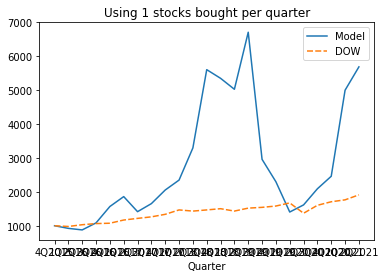

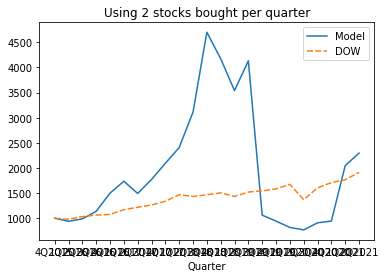

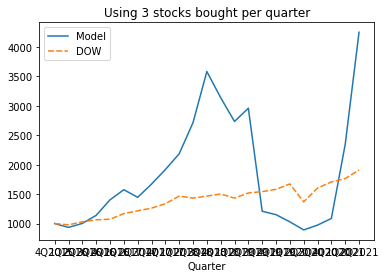

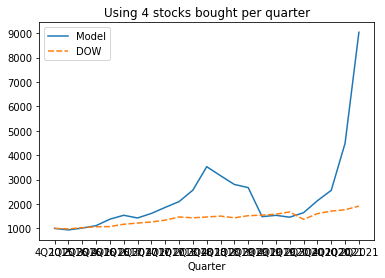

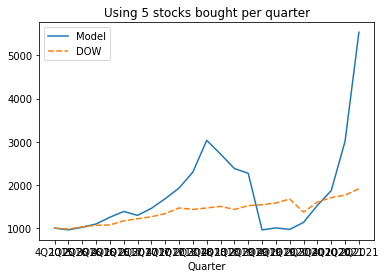

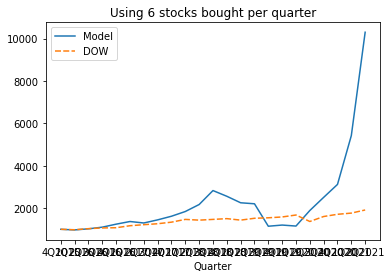

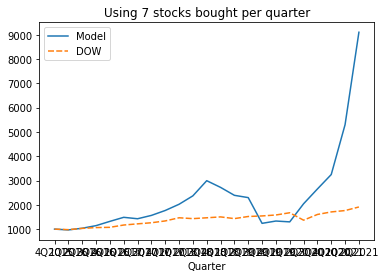

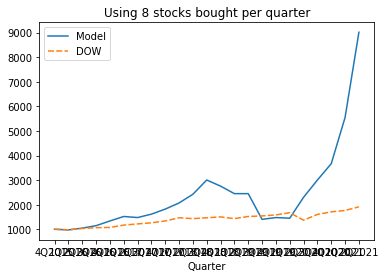

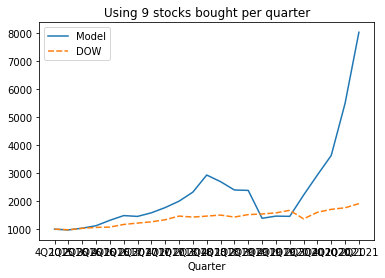

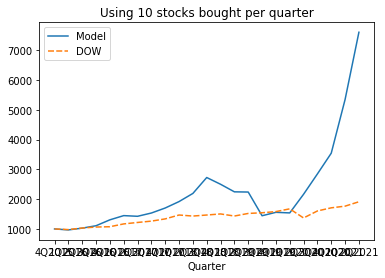

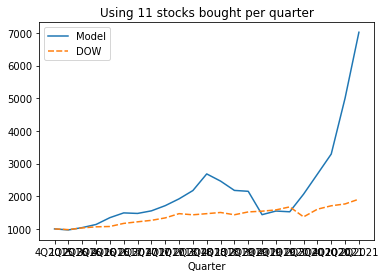

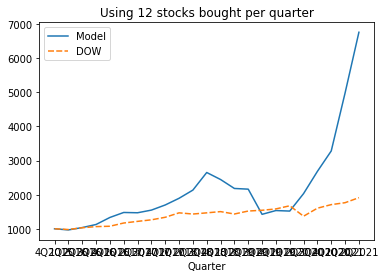

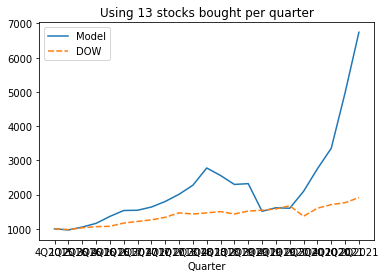

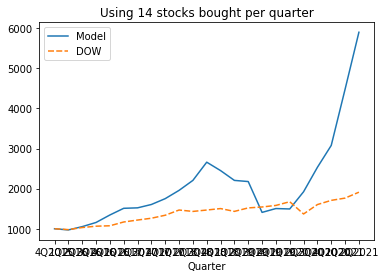

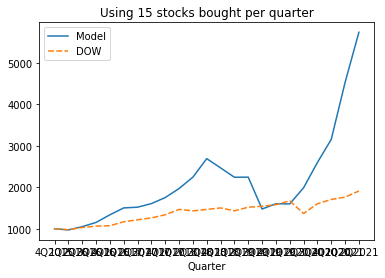

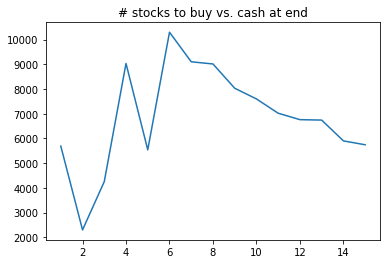

In [12]:
for num_stocks_to_buy, portfolio in output.items():
    plot_vs_dow(portfolio)
    plt.title(f"Using {num_stocks_to_buy} stocks bought per quarter")
    plt.show()

num_stocks_to_buy = [x for x in output]
cash_at_end = [p.cash for p in output.values()]
sns.lineplot(x=num_stocks_to_buy, y=cash_at_end)
plt.title("# stocks to buy vs. cash at end")
plt.show()

### Num stocks to buy: 7

# Learning Rate

In [78]:
output = {}

for learning_rate in [.001, .005, .01, .05, .1, .2]:
    hp = Hyperparams(N_STOCKS_TO_BUY=7, NUM_QUARTERS_FOR_TRAINING=12, LEARNING_RATE=learning_rate)

    portfolio = await compute_performance(df=df,
                              start_date=date(2016,1,1),
                              hyperparams=hp,
                              end_date=None)
    
    output[learning_rate] = portfolio


Fitting data for: QuarterlyIndex  Q4 2015
Filtering data between 4Q2012 and 4Q2015
QuarterFilter removed 53289 rows. Output size: (7770, 73)
Train Size: (6216, 72), Test Size: (1554, 72)
[1]	valid_0's l1: 24.4559	valid_0's l2: 3116.7
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 24.4532	valid_0's l2: 3116.1
[3]	valid_0's l1: 24.4505	valid_0's l2: 3115.49
[4]	valid_0's l1: 24.4476	valid_0's l2: 3114.88
[5]	valid_0's l1: 24.445	valid_0's l2: 3114.27
[6]	valid_0's l1: 24.4427	valid_0's l2: 3113.68
[7]	valid_0's l1: 24.4401	valid_0's l2: 3113.07
[8]	valid_0's l1: 24.4379	valid_0's l2: 3112.48
[9]	valid_0's l1: 24.4353	valid_0's l2: 3111.89
[10]	valid_0's l1: 24.4328	valid_0's l2: 3111.29
[11]	valid_0's l1: 24.4307	valid_0's l2: 3110.71
[12]	valid_0's l1: 24.4282	valid_0's l2: 3110.11
[13]	valid_0's l1: 24.4261	valid_0's l2: 3109.54
[14]	valid_0's l1: 24.4237	valid_0's l2: 3108.95
[15]	valid_0's l1: 24.4214	valid_0's l2: 3108.37
[16]	valid_0's l1: 24.4192	va

[87]	valid_0's l1: 20.3842	valid_0's l2: 898.643
[88]	valid_0's l1: 20.3829	valid_0's l2: 898.493
[89]	valid_0's l1: 20.3812	valid_0's l2: 898.296
[90]	valid_0's l1: 20.3795	valid_0's l2: 898.116
[91]	valid_0's l1: 20.3783	valid_0's l2: 897.968
[92]	valid_0's l1: 20.3767	valid_0's l2: 897.779
[93]	valid_0's l1: 20.3749	valid_0's l2: 897.586
[94]	valid_0's l1: 20.3732	valid_0's l2: 897.436
[95]	valid_0's l1: 20.3716	valid_0's l2: 897.253
[96]	valid_0's l1: 20.3702	valid_0's l2: 897.064
[97]	valid_0's l1: 20.3691	valid_0's l2: 896.904
[98]	valid_0's l1: 20.3678	valid_0's l2: 896.732
[99]	valid_0's l1: 20.3664	valid_0's l2: 896.546
[100]	valid_0's l1: 20.3649	valid_0's l2: 896.366
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 20.3649	valid_0's l2: 896.366
Filtering data between 1Q2016 and 2Q2016
QuarterFilter removed 63566 rows. Output size: (639, 72)
Current portfolio: {QuarterlyIndex TSLA Q4 2015: 30.19400040469446, QuarterlyIndex AAL Q4 2015: 33.18741126360625, Qu

[20]	valid_0's l1: 20.232	valid_0's l2: 865.387
[21]	valid_0's l1: 20.229	valid_0's l2: 865.133
[22]	valid_0's l1: 20.226	valid_0's l2: 864.867
[23]	valid_0's l1: 20.2229	valid_0's l2: 864.615
[24]	valid_0's l1: 20.2199	valid_0's l2: 864.362
[25]	valid_0's l1: 20.2169	valid_0's l2: 864.111
[26]	valid_0's l1: 20.2139	valid_0's l2: 863.846
[27]	valid_0's l1: 20.2109	valid_0's l2: 863.599
[28]	valid_0's l1: 20.208	valid_0's l2: 863.342
[29]	valid_0's l1: 20.205	valid_0's l2: 863.091
[30]	valid_0's l1: 20.2022	valid_0's l2: 862.845
[31]	valid_0's l1: 20.1992	valid_0's l2: 862.585
[32]	valid_0's l1: 20.1964	valid_0's l2: 862.342
[33]	valid_0's l1: 20.1935	valid_0's l2: 862.083
[34]	valid_0's l1: 20.1906	valid_0's l2: 861.82
[35]	valid_0's l1: 20.1877	valid_0's l2: 861.572
[36]	valid_0's l1: 20.1849	valid_0's l2: 861.331
[37]	valid_0's l1: 20.1821	valid_0's l2: 861.091
[38]	valid_0's l1: 20.1792	valid_0's l2: 860.849
[39]	valid_0's l1: 20.1763	valid_0's l2: 860.597
[40]	valid_0's l1: 20.1735

[75]	valid_0's l1: 21.2818	valid_0's l2: 1626.8
[76]	valid_0's l1: 21.2789	valid_0's l2: 1626.45
[77]	valid_0's l1: 21.2756	valid_0's l2: 1626.07
[78]	valid_0's l1: 21.2726	valid_0's l2: 1625.71
[79]	valid_0's l1: 21.2692	valid_0's l2: 1625.4
[80]	valid_0's l1: 21.2661	valid_0's l2: 1625.04
[81]	valid_0's l1: 21.2631	valid_0's l2: 1624.67
[82]	valid_0's l1: 21.2601	valid_0's l2: 1624.31
[83]	valid_0's l1: 21.257	valid_0's l2: 1623.95
[84]	valid_0's l1: 21.2542	valid_0's l2: 1623.6
[85]	valid_0's l1: 21.2511	valid_0's l2: 1623.23
[86]	valid_0's l1: 21.2482	valid_0's l2: 1622.88
[87]	valid_0's l1: 21.2451	valid_0's l2: 1622.58
[88]	valid_0's l1: 21.242	valid_0's l2: 1622.29
[89]	valid_0's l1: 21.2389	valid_0's l2: 1622
[90]	valid_0's l1: 21.2358	valid_0's l2: 1621.7
[91]	valid_0's l1: 21.2327	valid_0's l2: 1621.41
[92]	valid_0's l1: 21.2296	valid_0's l2: 1621.12
[93]	valid_0's l1: 21.2266	valid_0's l2: 1620.83
[94]	valid_0's l1: 21.2235	valid_0's l2: 1620.54
[95]	valid_0's l1: 21.2205	va

[27]	valid_0's l1: 22.7547	valid_0's l2: 1070.7
[28]	valid_0's l1: 22.7516	valid_0's l2: 1070.45
[29]	valid_0's l1: 22.7486	valid_0's l2: 1070.2
[30]	valid_0's l1: 22.7455	valid_0's l2: 1069.95
[31]	valid_0's l1: 22.7424	valid_0's l2: 1069.7
[32]	valid_0's l1: 22.7395	valid_0's l2: 1069.47
[33]	valid_0's l1: 22.7365	valid_0's l2: 1069.22
[34]	valid_0's l1: 22.7335	valid_0's l2: 1068.97
[35]	valid_0's l1: 22.7305	valid_0's l2: 1068.73
[36]	valid_0's l1: 22.7276	valid_0's l2: 1068.48
[37]	valid_0's l1: 22.7246	valid_0's l2: 1068.24
[38]	valid_0's l1: 22.7216	valid_0's l2: 1067.99
[39]	valid_0's l1: 22.7185	valid_0's l2: 1067.74
[40]	valid_0's l1: 22.7154	valid_0's l2: 1067.5
[41]	valid_0's l1: 22.7124	valid_0's l2: 1067.27
[42]	valid_0's l1: 22.7094	valid_0's l2: 1067.02
[43]	valid_0's l1: 22.7064	valid_0's l2: 1066.78
[44]	valid_0's l1: 22.7033	valid_0's l2: 1066.53
[45]	valid_0's l1: 22.7003	valid_0's l2: 1066.29
[46]	valid_0's l1: 22.6973	valid_0's l2: 1066.04
[47]	valid_0's l1: 22.69

[77]	valid_0's l1: 22.5027	valid_0's l2: 1020.26
[78]	valid_0's l1: 22.4994	valid_0's l2: 1020
[79]	valid_0's l1: 22.4962	valid_0's l2: 1019.73
[80]	valid_0's l1: 22.4928	valid_0's l2: 1019.46
[81]	valid_0's l1: 22.4895	valid_0's l2: 1019.2
[82]	valid_0's l1: 22.4864	valid_0's l2: 1018.95
[83]	valid_0's l1: 22.4832	valid_0's l2: 1018.69
[84]	valid_0's l1: 22.4801	valid_0's l2: 1018.45
[85]	valid_0's l1: 22.4767	valid_0's l2: 1018.17
[86]	valid_0's l1: 22.4735	valid_0's l2: 1017.91
[87]	valid_0's l1: 22.4703	valid_0's l2: 1017.67
[88]	valid_0's l1: 22.467	valid_0's l2: 1017.4
[89]	valid_0's l1: 22.4637	valid_0's l2: 1017.13
[90]	valid_0's l1: 22.4606	valid_0's l2: 1016.88
[91]	valid_0's l1: 22.4572	valid_0's l2: 1016.61
[92]	valid_0's l1: 22.4541	valid_0's l2: 1016.37
[93]	valid_0's l1: 22.4511	valid_0's l2: 1016.13
[94]	valid_0's l1: 22.4477	valid_0's l2: 1015.84
[95]	valid_0's l1: 22.4444	valid_0's l2: 1015.58
[96]	valid_0's l1: 22.4415	valid_0's l2: 1015.34
[97]	valid_0's l1: 22.4382

[21]	valid_0's l1: 22.2608	valid_0's l2: 998.372
[22]	valid_0's l1: 22.2576	valid_0's l2: 998.085
[23]	valid_0's l1: 22.2542	valid_0's l2: 997.784
[24]	valid_0's l1: 22.2513	valid_0's l2: 997.505
[25]	valid_0's l1: 22.248	valid_0's l2: 997.206
[26]	valid_0's l1: 22.2448	valid_0's l2: 996.921
[27]	valid_0's l1: 22.2415	valid_0's l2: 996.622
[28]	valid_0's l1: 22.2386	valid_0's l2: 996.347
[29]	valid_0's l1: 22.2353	valid_0's l2: 996.05
[30]	valid_0's l1: 22.2322	valid_0's l2: 995.768
[31]	valid_0's l1: 22.2293	valid_0's l2: 995.494
[32]	valid_0's l1: 22.226	valid_0's l2: 995.199
[33]	valid_0's l1: 22.223	valid_0's l2: 994.918
[34]	valid_0's l1: 22.2199	valid_0's l2: 994.641
[35]	valid_0's l1: 22.2168	valid_0's l2: 994.354
[36]	valid_0's l1: 22.2136	valid_0's l2: 994.077
[37]	valid_0's l1: 22.2105	valid_0's l2: 993.791
[38]	valid_0's l1: 22.2075	valid_0's l2: 993.514
[39]	valid_0's l1: 22.2045	valid_0's l2: 993.239
[40]	valid_0's l1: 22.2014	valid_0's l2: 992.963
[41]	valid_0's l1: 22.19

[68]	valid_0's l1: 21.6246	valid_0's l2: 972.634
[69]	valid_0's l1: 21.6215	valid_0's l2: 972.354
[70]	valid_0's l1: 21.6182	valid_0's l2: 972.075
[71]	valid_0's l1: 21.6152	valid_0's l2: 971.814
[72]	valid_0's l1: 21.612	valid_0's l2: 971.536
[73]	valid_0's l1: 21.6087	valid_0's l2: 971.237
[74]	valid_0's l1: 21.6056	valid_0's l2: 970.974
[75]	valid_0's l1: 21.6024	valid_0's l2: 970.677
[76]	valid_0's l1: 21.5993	valid_0's l2: 970.43
[77]	valid_0's l1: 21.5961	valid_0's l2: 970.134
[78]	valid_0's l1: 21.5931	valid_0's l2: 969.889
[79]	valid_0's l1: 21.5897	valid_0's l2: 969.595
[80]	valid_0's l1: 21.5866	valid_0's l2: 969.337
[81]	valid_0's l1: 21.5835	valid_0's l2: 969.061
[82]	valid_0's l1: 21.5805	valid_0's l2: 968.806
[83]	valid_0's l1: 21.5772	valid_0's l2: 968.516
[84]	valid_0's l1: 21.5742	valid_0's l2: 968.275
[85]	valid_0's l1: 21.5709	valid_0's l2: 967.984
[86]	valid_0's l1: 21.5679	valid_0's l2: 967.735
[87]	valid_0's l1: 21.565	valid_0's l2: 967.48
[88]	valid_0's l1: 21.56

Filtering data between 3Q2018 and 4Q2018
QuarterFilter removed 63605 rows. Output size: (600, 72)
Current portfolio: {QuarterlyIndex ALGN Q4 2017: 73.37434471458657, QuarterlyIndex ABMD Q4 2017: 99.1704207470986, QuarterlyIndex ANSS Q4 2017: 58.24367327873662, QuarterlyIndex MED Q4 2017: 141.2935141585052, QuarterlyIndex NVDA Q4 2017: 62.72313433677476, QuarterlyIndex TER Q4 2017: 45.450521596901865, QuarterlyIndex TWTR Q4 2017: 80.02369117032471, QuarterlyIndex MTW Q1 2018: 62.622488853466976, QuarterlyIndex AMSC Q1 2018: 108.52765260887784, QuarterlyIndex SCHW Q1 2018: 86.62220806397127, QuarterlyIndex CDNS Q1 2018: 97.92308430013152, QuarterlyIndex NVDA Q1 2018: 103.17084985972282, QuarterlyIndex MNK Q1 2018: 128.72677524593817, QuarterlyIndex MED Q1 2018: 236.28319460763427, QuarterlyIndex PNR Q2 2018: 72.19057154719657, QuarterlyIndex WYND Q2 2018: 50.868031135527715, QuarterlyIndex FMCC Q2 2018: 107.04593387517305, QuarterlyIndex AMD Q2 2018: 175.64501480432273, QuarterlyIndex ME

[1]	valid_0's l1: 23.9949	valid_0's l2: 1037.93
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.9901	valid_0's l2: 1037.58
[3]	valid_0's l1: 23.9854	valid_0's l2: 1037.23
[4]	valid_0's l1: 23.9806	valid_0's l2: 1036.88
[5]	valid_0's l1: 23.9762	valid_0's l2: 1036.56
[6]	valid_0's l1: 23.9717	valid_0's l2: 1036.23
[7]	valid_0's l1: 23.967	valid_0's l2: 1035.9
[8]	valid_0's l1: 23.9622	valid_0's l2: 1035.55
[9]	valid_0's l1: 23.9575	valid_0's l2: 1035.22
[10]	valid_0's l1: 23.9527	valid_0's l2: 1034.87
[11]	valid_0's l1: 23.948	valid_0's l2: 1034.54
[12]	valid_0's l1: 23.9432	valid_0's l2: 1034.2
[13]	valid_0's l1: 23.9385	valid_0's l2: 1033.86
[14]	valid_0's l1: 23.9339	valid_0's l2: 1033.53
[15]	valid_0's l1: 23.9291	valid_0's l2: 1033.19
[16]	valid_0's l1: 23.9243	valid_0's l2: 1032.86
[17]	valid_0's l1: 23.9196	valid_0's l2: 1032.52
[18]	valid_0's l1: 23.9148	valid_0's l2: 1032.18
[19]	valid_0's l1: 23.9101	valid_0's l2: 1031.85
[20]	valid_0's l1: 23.

[30]	valid_0's l1: 23.4983	valid_0's l2: 1396.07
[31]	valid_0's l1: 23.4948	valid_0's l2: 1395.86
[32]	valid_0's l1: 23.491	valid_0's l2: 1395.62
[33]	valid_0's l1: 23.4876	valid_0's l2: 1395.4
[34]	valid_0's l1: 23.4838	valid_0's l2: 1395.16
[35]	valid_0's l1: 23.4804	valid_0's l2: 1394.94
[36]	valid_0's l1: 23.4767	valid_0's l2: 1394.73
[37]	valid_0's l1: 23.4733	valid_0's l2: 1394.51
[38]	valid_0's l1: 23.4699	valid_0's l2: 1394.3
[39]	valid_0's l1: 23.4663	valid_0's l2: 1394.08
[40]	valid_0's l1: 23.4629	valid_0's l2: 1393.87
[41]	valid_0's l1: 23.4596	valid_0's l2: 1393.67
[42]	valid_0's l1: 23.4562	valid_0's l2: 1393.46
[43]	valid_0's l1: 23.4528	valid_0's l2: 1393.26
[44]	valid_0's l1: 23.4492	valid_0's l2: 1393.04
[45]	valid_0's l1: 23.446	valid_0's l2: 1392.85
[46]	valid_0's l1: 23.4425	valid_0's l2: 1392.63
[47]	valid_0's l1: 23.4388	valid_0's l2: 1392.41
[48]	valid_0's l1: 23.4354	valid_0's l2: 1392.21
[49]	valid_0's l1: 23.4317	valid_0's l2: 1392
[50]	valid_0's l1: 23.4282	

[58]	valid_0's l1: 25.428	valid_0's l2: 1907.55
[59]	valid_0's l1: 25.4251	valid_0's l2: 1907.41
[60]	valid_0's l1: 25.4222	valid_0's l2: 1907.27
[61]	valid_0's l1: 25.4193	valid_0's l2: 1907.14
[62]	valid_0's l1: 25.4164	valid_0's l2: 1907.01
[63]	valid_0's l1: 25.4136	valid_0's l2: 1906.88
[64]	valid_0's l1: 25.4107	valid_0's l2: 1906.76
[65]	valid_0's l1: 25.4078	valid_0's l2: 1906.64
[66]	valid_0's l1: 25.4049	valid_0's l2: 1906.52
[67]	valid_0's l1: 25.4021	valid_0's l2: 1906.41
[68]	valid_0's l1: 25.3992	valid_0's l2: 1906.3
[69]	valid_0's l1: 25.3963	valid_0's l2: 1906.19
[70]	valid_0's l1: 25.3934	valid_0's l2: 1906.09
[71]	valid_0's l1: 25.3906	valid_0's l2: 1905.99
[72]	valid_0's l1: 25.3878	valid_0's l2: 1905.89
[73]	valid_0's l1: 25.3849	valid_0's l2: 1905.79
[74]	valid_0's l1: 25.3821	valid_0's l2: 1905.7
[75]	valid_0's l1: 25.3792	valid_0's l2: 1905.61
[76]	valid_0's l1: 25.3764	valid_0's l2: 1905.52
[77]	valid_0's l1: 25.3736	valid_0's l2: 1905.44
[78]	valid_0's l1: 25.3

[80]	valid_0's l1: 26.0977	valid_0's l2: 3494.03
[81]	valid_0's l1: 26.094	valid_0's l2: 3492.87
[82]	valid_0's l1: 26.0914	valid_0's l2: 3491.89
[83]	valid_0's l1: 26.0875	valid_0's l2: 3490.73
[84]	valid_0's l1: 26.0848	valid_0's l2: 3489.74
[85]	valid_0's l1: 26.081	valid_0's l2: 3488.58
[86]	valid_0's l1: 26.0782	valid_0's l2: 3487.54
[87]	valid_0's l1: 26.0743	valid_0's l2: 3486.44
[88]	valid_0's l1: 26.0716	valid_0's l2: 3485.46
[89]	valid_0's l1: 26.0681	valid_0's l2: 3484.32
[90]	valid_0's l1: 26.0655	valid_0's l2: 3483.32
[91]	valid_0's l1: 26.062	valid_0's l2: 3482.24
[92]	valid_0's l1: 26.0593	valid_0's l2: 3481.23
[93]	valid_0's l1: 26.0556	valid_0's l2: 3480.15
[94]	valid_0's l1: 26.0531	valid_0's l2: 3479.16
[95]	valid_0's l1: 26.0494	valid_0's l2: 3478.07
[96]	valid_0's l1: 26.0468	valid_0's l2: 3477.07
[97]	valid_0's l1: 26.0432	valid_0's l2: 3476.02
[98]	valid_0's l1: 26.0407	valid_0's l2: 3475.04
[99]	valid_0's l1: 26.0371	valid_0's l2: 3473.96
[100]	valid_0's l1: 26.

[6]	valid_0's l1: 27.0612	valid_0's l2: 2515.05
[7]	valid_0's l1: 27.0565	valid_0's l2: 2514.4
[8]	valid_0's l1: 27.0519	valid_0's l2: 2513.75
[9]	valid_0's l1: 27.0473	valid_0's l2: 2513.11
[10]	valid_0's l1: 27.0427	valid_0's l2: 2512.47
[11]	valid_0's l1: 27.0381	valid_0's l2: 2511.83
[12]	valid_0's l1: 27.034	valid_0's l2: 2511.2
[13]	valid_0's l1: 27.0299	valid_0's l2: 2510.56
[14]	valid_0's l1: 27.0258	valid_0's l2: 2509.93
[15]	valid_0's l1: 27.0218	valid_0's l2: 2509.32
[16]	valid_0's l1: 27.0177	valid_0's l2: 2508.69
[17]	valid_0's l1: 27.0137	valid_0's l2: 2508.08
[18]	valid_0's l1: 27.0097	valid_0's l2: 2507.46
[19]	valid_0's l1: 27.0048	valid_0's l2: 2506.78
[20]	valid_0's l1: 27.0007	valid_0's l2: 2506.17
[21]	valid_0's l1: 26.9967	valid_0's l2: 2505.56
[22]	valid_0's l1: 26.9918	valid_0's l2: 2504.88
[23]	valid_0's l1: 26.9879	valid_0's l2: 2504.28
[24]	valid_0's l1: 26.983	valid_0's l2: 2503.61
[25]	valid_0's l1: 26.979	valid_0's l2: 2503
[26]	valid_0's l1: 26.9741	valid

[69]	valid_0's l1: 32.6608	valid_0's l2: 10488.7
[70]	valid_0's l1: 32.6542	valid_0's l2: 10487.9
[71]	valid_0's l1: 32.6475	valid_0's l2: 10486.6
[72]	valid_0's l1: 32.6404	valid_0's l2: 10485.8
[73]	valid_0's l1: 32.6338	valid_0's l2: 10485
[74]	valid_0's l1: 32.6269	valid_0's l2: 10483.8
[75]	valid_0's l1: 32.6195	valid_0's l2: 10482.8
[76]	valid_0's l1: 32.6122	valid_0's l2: 10481.5
[77]	valid_0's l1: 32.606	valid_0's l2: 10480.9
[78]	valid_0's l1: 32.5985	valid_0's l2: 10479.6
[79]	valid_0's l1: 32.592	valid_0's l2: 10478.8
[80]	valid_0's l1: 32.5847	valid_0's l2: 10477.4
[81]	valid_0's l1: 32.5777	valid_0's l2: 10476.6
[82]	valid_0's l1: 32.5713	valid_0's l2: 10475.9
[83]	valid_0's l1: 32.5639	valid_0's l2: 10474.6
[84]	valid_0's l1: 32.557	valid_0's l2: 10473.8
[85]	valid_0's l1: 32.55	valid_0's l2: 10473
[86]	valid_0's l1: 32.5428	valid_0's l2: 10471.7
[87]	valid_0's l1: 32.5355	valid_0's l2: 10471.1
[88]	valid_0's l1: 32.5281	valid_0's l2: 10469.8
[89]	valid_0's l1: 32.5219	va

[1]	valid_0's l1: 32.1855	valid_0's l2: 3398.25
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 32.1747	valid_0's l2: 3395.94
[3]	valid_0's l1: 32.1639	valid_0's l2: 3393.63
[4]	valid_0's l1: 32.1532	valid_0's l2: 3391.33
[5]	valid_0's l1: 32.1424	valid_0's l2: 3389.05
[6]	valid_0's l1: 32.1317	valid_0's l2: 3386.77
[7]	valid_0's l1: 32.121	valid_0's l2: 3384.5
[8]	valid_0's l1: 32.1103	valid_0's l2: 3382.24
[9]	valid_0's l1: 32.0987	valid_0's l2: 3380
[10]	valid_0's l1: 32.088	valid_0's l2: 3377.75
[11]	valid_0's l1: 32.0767	valid_0's l2: 3375.56
[12]	valid_0's l1: 32.0661	valid_0's l2: 3373.33
[13]	valid_0's l1: 32.0554	valid_0's l2: 3371.11
[14]	valid_0's l1: 32.0442	valid_0's l2: 3368.94
[15]	valid_0's l1: 32.0333	valid_0's l2: 3366.7
[16]	valid_0's l1: 32.0219	valid_0's l2: 3364.53
[17]	valid_0's l1: 32.0111	valid_0's l2: 3362.31
[18]	valid_0's l1: 31.9997	valid_0's l2: 3360.16
[19]	valid_0's l1: 31.9889	valid_0's l2: 3357.95
[20]	valid_0's l1: 31.977

[59]	valid_0's l1: 23.8944	valid_0's l2: 2968.61
[60]	valid_0's l1: 23.8834	valid_0's l2: 2965.92
[61]	valid_0's l1: 23.8769	valid_0's l2: 2964.14
[62]	valid_0's l1: 23.8661	valid_0's l2: 2961.51
[63]	valid_0's l1: 23.8576	valid_0's l2: 2959.56
[64]	valid_0's l1: 23.8504	valid_0's l2: 2956.98
[65]	valid_0's l1: 23.8425	valid_0's l2: 2954.48
[66]	valid_0's l1: 23.835	valid_0's l2: 2952.09
[67]	valid_0's l1: 23.8265	valid_0's l2: 2949.35
[68]	valid_0's l1: 23.8186	valid_0's l2: 2946.66
[69]	valid_0's l1: 23.8106	valid_0's l2: 2944.16
[70]	valid_0's l1: 23.8027	valid_0's l2: 2941.51
[71]	valid_0's l1: 23.7955	valid_0's l2: 2939.06
[72]	valid_0's l1: 23.7883	valid_0's l2: 2936.52
[73]	valid_0's l1: 23.7821	valid_0's l2: 2934.14
[74]	valid_0's l1: 23.7731	valid_0's l2: 2931.63
[75]	valid_0's l1: 23.7672	valid_0's l2: 2929.22
[76]	valid_0's l1: 23.7607	valid_0's l2: 2926.77
[77]	valid_0's l1: 23.7549	valid_0's l2: 2924.43
[78]	valid_0's l1: 23.7436	valid_0's l2: 2922.12
[79]	valid_0's l1: 23

[1]	valid_0's l1: 21.8104	valid_0's l2: 2102.02
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.7996	valid_0's l2: 2100.91
[3]	valid_0's l1: 21.7887	valid_0's l2: 2099.78
[4]	valid_0's l1: 21.7779	valid_0's l2: 2098.69
[5]	valid_0's l1: 21.7672	valid_0's l2: 2097.6
[6]	valid_0's l1: 21.7574	valid_0's l2: 2096.54
[7]	valid_0's l1: 21.7469	valid_0's l2: 2095.48
[8]	valid_0's l1: 21.7371	valid_0's l2: 2094.46
[9]	valid_0's l1: 21.7276	valid_0's l2: 2093.37
[10]	valid_0's l1: 21.7185	valid_0's l2: 2092.36
[11]	valid_0's l1: 21.7072	valid_0's l2: 2090.58
[12]	valid_0's l1: 21.6959	valid_0's l2: 2088.76
[13]	valid_0's l1: 21.6874	valid_0's l2: 2087.8
[14]	valid_0's l1: 21.6751	valid_0's l2: 2085.96
[15]	valid_0's l1: 21.6652	valid_0's l2: 2084.92
[16]	valid_0's l1: 21.6553	valid_0's l2: 2083.95
[17]	valid_0's l1: 21.645	valid_0's l2: 2082.24
[18]	valid_0's l1: 21.636	valid_0's l2: 2081.32
[19]	valid_0's l1: 21.6286	valid_0's l2: 2080.47
[20]	valid_0's l1: 21.

[45]	valid_0's l1: 19.7434	valid_0's l2: 824.043
[46]	valid_0's l1: 19.7321	valid_0's l2: 823.348
[47]	valid_0's l1: 19.7248	valid_0's l2: 822.746
[48]	valid_0's l1: 19.7165	valid_0's l2: 822.006
[49]	valid_0's l1: 19.7091	valid_0's l2: 821.311
[50]	valid_0's l1: 19.6975	valid_0's l2: 820.492
[51]	valid_0's l1: 19.6896	valid_0's l2: 819.748
[52]	valid_0's l1: 19.6808	valid_0's l2: 819.097
[53]	valid_0's l1: 19.6732	valid_0's l2: 818.492
[54]	valid_0's l1: 19.6651	valid_0's l2: 817.818
[55]	valid_0's l1: 19.6579	valid_0's l2: 817.236
[56]	valid_0's l1: 19.647	valid_0's l2: 816.601
[57]	valid_0's l1: 19.6387	valid_0's l2: 815.924
[58]	valid_0's l1: 19.63	valid_0's l2: 815.238
[59]	valid_0's l1: 19.621	valid_0's l2: 814.577
[60]	valid_0's l1: 19.6145	valid_0's l2: 813.987
[61]	valid_0's l1: 19.6053	valid_0's l2: 813.211
[62]	valid_0's l1: 19.599	valid_0's l2: 812.681
[63]	valid_0's l1: 19.5917	valid_0's l2: 812.088
[64]	valid_0's l1: 19.5826	valid_0's l2: 811.341
[65]	valid_0's l1: 19.576

[79]	valid_0's l1: 20.5552	valid_0's l2: 1548.79
[80]	valid_0's l1: 20.5486	valid_0's l2: 1547.96
[81]	valid_0's l1: 20.5419	valid_0's l2: 1547.22
[82]	valid_0's l1: 20.5341	valid_0's l2: 1546.44
[83]	valid_0's l1: 20.5267	valid_0's l2: 1545.58
[84]	valid_0's l1: 20.5207	valid_0's l2: 1544.67
[85]	valid_0's l1: 20.5124	valid_0's l2: 1543.8
[86]	valid_0's l1: 20.5058	valid_0's l2: 1543.08
[87]	valid_0's l1: 20.4999	valid_0's l2: 1542.18
[88]	valid_0's l1: 20.4929	valid_0's l2: 1541.43
[89]	valid_0's l1: 20.4863	valid_0's l2: 1540.53
[90]	valid_0's l1: 20.4803	valid_0's l2: 1539.79
[91]	valid_0's l1: 20.4728	valid_0's l2: 1539
[92]	valid_0's l1: 20.4659	valid_0's l2: 1538.1
[93]	valid_0's l1: 20.4607	valid_0's l2: 1537.26
[94]	valid_0's l1: 20.4548	valid_0's l2: 1536.34
[95]	valid_0's l1: 20.448	valid_0's l2: 1535.59
[96]	valid_0's l1: 20.441	valid_0's l2: 1534.63
[97]	valid_0's l1: 20.4332	valid_0's l2: 1533.7
[98]	valid_0's l1: 20.4264	valid_0's l2: 1532.91
[99]	valid_0's l1: 20.4221	v

[4]	valid_0's l1: 22.7754	valid_0's l2: 1072.4
[5]	valid_0's l1: 22.7605	valid_0's l2: 1071.21
[6]	valid_0's l1: 22.745	valid_0's l2: 1069.91
[7]	valid_0's l1: 22.73	valid_0's l2: 1068.69
[8]	valid_0's l1: 22.7143	valid_0's l2: 1067.41
[9]	valid_0's l1: 22.6993	valid_0's l2: 1066.21
[10]	valid_0's l1: 22.6844	valid_0's l2: 1064.97
[11]	valid_0's l1: 22.6703	valid_0's l2: 1063.79
[12]	valid_0's l1: 22.6561	valid_0's l2: 1062.65
[13]	valid_0's l1: 22.6432	valid_0's l2: 1061.54
[14]	valid_0's l1: 22.6285	valid_0's l2: 1060.32
[15]	valid_0's l1: 22.6151	valid_0's l2: 1059.22
[16]	valid_0's l1: 22.6009	valid_0's l2: 1058.02
[17]	valid_0's l1: 22.5866	valid_0's l2: 1056.9
[18]	valid_0's l1: 22.5734	valid_0's l2: 1055.83
[19]	valid_0's l1: 22.5612	valid_0's l2: 1054.79
[20]	valid_0's l1: 22.5475	valid_0's l2: 1053.73
[21]	valid_0's l1: 22.5342	valid_0's l2: 1052.75
[22]	valid_0's l1: 22.5223	valid_0's l2: 1051.74
[23]	valid_0's l1: 22.5096	valid_0's l2: 1050.72
[24]	valid_0's l1: 22.4968	vali

[49]	valid_0's l1: 22.021	valid_0's l2: 981.522
[50]	valid_0's l1: 22.0074	valid_0's l2: 980.237
[51]	valid_0's l1: 21.9941	valid_0's l2: 979.171
[52]	valid_0's l1: 21.9822	valid_0's l2: 978.434
[53]	valid_0's l1: 21.9689	valid_0's l2: 977.409
[54]	valid_0's l1: 21.9562	valid_0's l2: 976.326
[55]	valid_0's l1: 21.945	valid_0's l2: 975.409
[56]	valid_0's l1: 21.9313	valid_0's l2: 974.416
[57]	valid_0's l1: 21.9197	valid_0's l2: 973.5
[58]	valid_0's l1: 21.9078	valid_0's l2: 972.635
[59]	valid_0's l1: 21.8971	valid_0's l2: 971.778
[60]	valid_0's l1: 21.8827	valid_0's l2: 970.714
[61]	valid_0's l1: 21.8707	valid_0's l2: 969.884
[62]	valid_0's l1: 21.8581	valid_0's l2: 968.896
[63]	valid_0's l1: 21.8468	valid_0's l2: 968.006
[64]	valid_0's l1: 21.8361	valid_0's l2: 967.26
[65]	valid_0's l1: 21.8251	valid_0's l2: 966.393
[66]	valid_0's l1: 21.8136	valid_0's l2: 965.47
[67]	valid_0's l1: 21.8025	valid_0's l2: 964.571
[68]	valid_0's l1: 21.7906	valid_0's l2: 963.667
[69]	valid_0's l1: 21.7807

Current portfolio: {QuarterlyIndex NVDA Q1 2017: 111.92614759547195, QuarterlyIndex AMD Q1 2017: 56.8098606894418, QuarterlyIndex HLT Q1 2017: 100.55428586830027, QuarterlyIndex ADI Q1 2017: 70.79524331017151, QuarterlyIndex AVGO Q1 2017: 78.82629887797167, QuarterlyIndex ALGN Q1 2017: 130.25245046984804, QuarterlyIndex MLM Q1 2017: 55.7959869361623, QuarterlyIndex AMD Q2 2017: 68.12802964997796, QuarterlyIndex NVDA Q2 2017: 114.07619508979579, QuarterlyIndex ALGN Q2 2017: 116.83913047209518, QuarterlyIndex AMAT Q2 2017: 90.7588373615198, QuarterlyIndex ADI Q2 2017: 73.3957607657252, QuarterlyIndex TER Q2 2017: 85.66951089238576, QuarterlyIndex IAC Q2 2017: 97.78308225184092, QuarterlyIndex NVDA Q3 2017: 82.76281971751338, QuarterlyIndex MED Q3 2017: 84.33916445487311, QuarterlyIndex ALGN Q3 2017: 84.50491297857127, QuarterlyIndex ABMD Q3 2017: 74.65701285261795, QuarterlyIndex LRCX Q3 2017: 77.47321496986292, QuarterlyIndex AMAT Q3 2017: 70.87389436688407, QuarterlyIndex KLAC Q3 2017:

[28]	valid_0's l1: 21.4031	valid_0's l2: 954.12
[29]	valid_0's l1: 21.3866	valid_0's l2: 952.832
[30]	valid_0's l1: 21.3715	valid_0's l2: 951.528
[31]	valid_0's l1: 21.3579	valid_0's l2: 950.518
[32]	valid_0's l1: 21.3423	valid_0's l2: 949.232
[33]	valid_0's l1: 21.3287	valid_0's l2: 948.19
[34]	valid_0's l1: 21.3148	valid_0's l2: 947.066
[35]	valid_0's l1: 21.3035	valid_0's l2: 946.103
[36]	valid_0's l1: 21.2919	valid_0's l2: 945.134
[37]	valid_0's l1: 21.2798	valid_0's l2: 944.07
[38]	valid_0's l1: 21.2665	valid_0's l2: 943.01
[39]	valid_0's l1: 21.2548	valid_0's l2: 941.97
[40]	valid_0's l1: 21.2405	valid_0's l2: 940.913
[41]	valid_0's l1: 21.2281	valid_0's l2: 939.937
[42]	valid_0's l1: 21.2135	valid_0's l2: 938.757
[43]	valid_0's l1: 21.2017	valid_0's l2: 937.931
[44]	valid_0's l1: 21.1891	valid_0's l2: 936.991
[45]	valid_0's l1: 21.178	valid_0's l2: 936.221
[46]	valid_0's l1: 21.164	valid_0's l2: 935.199
[47]	valid_0's l1: 21.151	valid_0's l2: 934.159
[48]	valid_0's l1: 21.1369	v

[65]	valid_0's l1: 20.997	valid_0's l2: 827.693
[66]	valid_0's l1: 20.9848	valid_0's l2: 826.703
[67]	valid_0's l1: 20.9757	valid_0's l2: 825.925
[68]	valid_0's l1: 20.9668	valid_0's l2: 825.098
[69]	valid_0's l1: 20.96	valid_0's l2: 824.418
[70]	valid_0's l1: 20.951	valid_0's l2: 823.601
[71]	valid_0's l1: 20.9423	valid_0's l2: 822.775
[72]	valid_0's l1: 20.9314	valid_0's l2: 821.914
[73]	valid_0's l1: 20.9244	valid_0's l2: 821.259
[74]	valid_0's l1: 20.915	valid_0's l2: 820.334
[75]	valid_0's l1: 20.9056	valid_0's l2: 819.44
[76]	valid_0's l1: 20.8955	valid_0's l2: 818.551
[77]	valid_0's l1: 20.8877	valid_0's l2: 817.819
[78]	valid_0's l1: 20.8766	valid_0's l2: 816.866
[79]	valid_0's l1: 20.8664	valid_0's l2: 815.942
[80]	valid_0's l1: 20.8585	valid_0's l2: 815.142
[81]	valid_0's l1: 20.8483	valid_0's l2: 814.302
[82]	valid_0's l1: 20.8386	valid_0's l2: 813.516
[83]	valid_0's l1: 20.8285	valid_0's l2: 812.664
[84]	valid_0's l1: 20.8202	valid_0's l2: 811.922
[85]	valid_0's l1: 20.8101

[99]	valid_0's l1: 22.1602	valid_0's l2: 1084.78
[100]	valid_0's l1: 22.1497	valid_0's l2: 1084.04
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 22.1497	valid_0's l2: 1084.04
Filtering data between 4Q2018 and 1Q2019
QuarterFilter removed 63617 rows. Output size: (588, 72)
Current portfolio: {QuarterlyIndex MED Q1 2018: 204.4049889849878, QuarterlyIndex ABMD Q1 2018: 141.55096265110038, QuarterlyIndex MTW Q1 2018: 52.23317365848517, QuarterlyIndex MNK Q1 2018: 118.7679084508903, QuarterlyIndex LRCX Q1 2018: 70.19547179641876, QuarterlyIndex NVDA Q1 2018: 108.85575376614132, QuarterlyIndex ALGN Q1 2018: 109.97324665394322, QuarterlyIndex PNR Q2 2018: 74.33669820131045, QuarterlyIndex AMD Q2 2018: 194.76020960339048, QuarterlyIndex MED Q2 2018: 133.46592028157184, QuarterlyIndex TWTR Q2 2018: 91.2105270851688, QuarterlyIndex ABMD Q2 2018: 108.44191731077927, QuarterlyIndex ALGN Q2 2018: 103.71505726368186, QuarterlyIndex WYND Q2 2018: 50.99113252996821, QuarterlyInde

QuarterFilter removed 53960 rows. Output size: (7099, 73)
Train Size: (5680, 72), Test Size: (1419, 72)
[1]	valid_0's l1: 23.5907	valid_0's l2: 1402.54
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.5721	valid_0's l2: 1401.11
[3]	valid_0's l1: 23.5533	valid_0's l2: 1399.68
[4]	valid_0's l1: 23.5349	valid_0's l2: 1398.28
[5]	valid_0's l1: 23.5163	valid_0's l2: 1397.1
[6]	valid_0's l1: 23.4988	valid_0's l2: 1396
[7]	valid_0's l1: 23.4799	valid_0's l2: 1394.79
[8]	valid_0's l1: 23.4627	valid_0's l2: 1393.72
[9]	valid_0's l1: 23.4458	valid_0's l2: 1392.74
[10]	valid_0's l1: 23.4274	valid_0's l2: 1391.62
[11]	valid_0's l1: 23.4106	valid_0's l2: 1390.6
[12]	valid_0's l1: 23.3924	valid_0's l2: 1389.48
[13]	valid_0's l1: 23.3746	valid_0's l2: 1388.44
[14]	valid_0's l1: 23.3567	valid_0's l2: 1387.31
[15]	valid_0's l1: 23.3393	valid_0's l2: 1386.3
[16]	valid_0's l1: 23.3215	valid_0's l2: 1385
[17]	valid_0's l1: 23.3047	valid_0's l2: 1383.82
[18]	valid_0's l1: 23

[12]	valid_0's l1: 25.4188	valid_0's l2: 1906.83
[13]	valid_0's l1: 25.4037	valid_0's l2: 1906.35
[14]	valid_0's l1: 25.3879	valid_0's l2: 1905.87
[15]	valid_0's l1: 25.372	valid_0's l2: 1905.3
[16]	valid_0's l1: 25.3571	valid_0's l2: 1904.94
[17]	valid_0's l1: 25.3418	valid_0's l2: 1904.62
[18]	valid_0's l1: 25.3273	valid_0's l2: 1904.44
[19]	valid_0's l1: 25.3135	valid_0's l2: 1903.89
[20]	valid_0's l1: 25.3015	valid_0's l2: 1903.48
[21]	valid_0's l1: 25.2879	valid_0's l2: 1900.96
[22]	valid_0's l1: 25.2753	valid_0's l2: 1900.68
[23]	valid_0's l1: 25.2562	valid_0's l2: 1897.2
[24]	valid_0's l1: 25.2458	valid_0's l2: 1896.84
[25]	valid_0's l1: 25.2342	valid_0's l2: 1894.39
[26]	valid_0's l1: 25.221	valid_0's l2: 1891.14
[27]	valid_0's l1: 25.2112	valid_0's l2: 1890.92
[28]	valid_0's l1: 25.1967	valid_0's l2: 1887.83
[29]	valid_0's l1: 25.1862	valid_0's l2: 1885.49
[30]	valid_0's l1: 25.1753	valid_0's l2: 1885.44
[31]	valid_0's l1: 25.1615	valid_0's l2: 1882.44
[32]	valid_0's l1: 25.15

[41]	valid_0's l1: 25.7159	valid_0's l2: 3406.88
[42]	valid_0's l1: 25.7022	valid_0's l2: 3403.52
[43]	valid_0's l1: 25.6874	valid_0's l2: 3398.45
[44]	valid_0's l1: 25.6765	valid_0's l2: 3395.99
[45]	valid_0's l1: 25.6625	valid_0's l2: 3392.72
[46]	valid_0's l1: 25.6484	valid_0's l2: 3390.89
[47]	valid_0's l1: 25.6403	valid_0's l2: 3387.07
[48]	valid_0's l1: 25.6333	valid_0's l2: 3384.73
[49]	valid_0's l1: 25.6212	valid_0's l2: 3381.52
[50]	valid_0's l1: 25.6061	valid_0's l2: 3379.45
[51]	valid_0's l1: 25.5923	valid_0's l2: 3376.52
[52]	valid_0's l1: 25.5871	valid_0's l2: 3374.38
[53]	valid_0's l1: 25.5754	valid_0's l2: 3370.09
[54]	valid_0's l1: 25.5608	valid_0's l2: 3366.83
[55]	valid_0's l1: 25.5525	valid_0's l2: 3366.12
[56]	valid_0's l1: 25.5394	valid_0's l2: 3365.01
[57]	valid_0's l1: 25.5273	valid_0's l2: 3361.97
[58]	valid_0's l1: 25.5204	valid_0's l2: 3358.54
[59]	valid_0's l1: 25.5144	valid_0's l2: 3356.67
[60]	valid_0's l1: 25.5025	valid_0's l2: 3354.86
[61]	valid_0's l1: 2

[74]	valid_0's l1: 27.0143	valid_0's l2: 3603.15
[75]	valid_0's l1: 27.0037	valid_0's l2: 3599.81
[76]	valid_0's l1: 26.99	valid_0's l2: 3597.42
[77]	valid_0's l1: 26.9839	valid_0's l2: 3596.42
[78]	valid_0's l1: 26.9811	valid_0's l2: 3594.72
[79]	valid_0's l1: 26.9671	valid_0's l2: 3592.35
[80]	valid_0's l1: 26.962	valid_0's l2: 3591.77
[81]	valid_0's l1: 26.9511	valid_0's l2: 3588.49
[82]	valid_0's l1: 26.9471	valid_0's l2: 3587.62
[83]	valid_0's l1: 26.9328	valid_0's l2: 3585.11
[84]	valid_0's l1: 26.9185	valid_0's l2: 3580.78
[85]	valid_0's l1: 26.9131	valid_0's l2: 3580.25
[86]	valid_0's l1: 26.9087	valid_0's l2: 3580.19
[87]	valid_0's l1: 26.9049	valid_0's l2: 3579.31
[88]	valid_0's l1: 26.8917	valid_0's l2: 3577.01
[89]	valid_0's l1: 26.8921	valid_0's l2: 3575.85
[90]	valid_0's l1: 26.8864	valid_0's l2: 3575.2
[91]	valid_0's l1: 26.8733	valid_0's l2: 3571.04
[92]	valid_0's l1: 26.8674	valid_0's l2: 3569.94
[93]	valid_0's l1: 26.8605	valid_0's l2: 3570.71
[94]	valid_0's l1: 26.84

[1]	valid_0's l1: 33.1496	valid_0's l2: 10569.9
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 33.1082	valid_0's l2: 10562.3
[3]	valid_0's l1: 33.0671	valid_0's l2: 10554.8
[4]	valid_0's l1: 33.0261	valid_0's l2: 10547.4
[5]	valid_0's l1: 32.9861	valid_0's l2: 10539.7
[6]	valid_0's l1: 32.9456	valid_0's l2: 10532.6
[7]	valid_0's l1: 32.9058	valid_0's l2: 10525.1
[8]	valid_0's l1: 32.8658	valid_0's l2: 10518.3
[9]	valid_0's l1: 32.8325	valid_0's l2: 10514.3
[10]	valid_0's l1: 32.794	valid_0's l2: 10507.3
[11]	valid_0's l1: 32.7596	valid_0's l2: 10503
[12]	valid_0's l1: 32.7203	valid_0's l2: 10498
[13]	valid_0's l1: 32.6847	valid_0's l2: 10491.6
[14]	valid_0's l1: 32.6527	valid_0's l2: 10488.3
[15]	valid_0's l1: 32.6199	valid_0's l2: 10481.8
[16]	valid_0's l1: 32.5871	valid_0's l2: 10477.7
[17]	valid_0's l1: 32.5499	valid_0's l2: 10471.3
[18]	valid_0's l1: 32.5149	valid_0's l2: 10468.1
[19]	valid_0's l1: 32.4817	valid_0's l2: 10464.2
[20]	valid_0's l1: 32.4

[55]	valid_0's l1: 30.8011	valid_0's l2: 11597.9
[56]	valid_0's l1: 30.7649	valid_0's l2: 11590.6
[57]	valid_0's l1: 30.7232	valid_0's l2: 11578.9
[58]	valid_0's l1: 30.6882	valid_0's l2: 11571.8
[59]	valid_0's l1: 30.661	valid_0's l2: 11564.5
[60]	valid_0's l1: 30.6253	valid_0's l2: 11557.4
[61]	valid_0's l1: 30.5983	valid_0's l2: 11550.3
[62]	valid_0's l1: 30.561	valid_0's l2: 11539
[63]	valid_0's l1: 30.5366	valid_0's l2: 11532
[64]	valid_0's l1: 30.5018	valid_0's l2: 11525.1
[65]	valid_0's l1: 30.4662	valid_0's l2: 11518.5
[66]	valid_0's l1: 30.4406	valid_0's l2: 11511.6
[67]	valid_0's l1: 30.4015	valid_0's l2: 11494.4
[68]	valid_0's l1: 30.3675	valid_0's l2: 11488.2
[69]	valid_0's l1: 30.3389	valid_0's l2: 11480.8
[70]	valid_0's l1: 30.3086	valid_0's l2: 11474.6
[71]	valid_0's l1: 30.2785	valid_0's l2: 11466.8
[72]	valid_0's l1: 30.2504	valid_0's l2: 11460.6
[73]	valid_0's l1: 30.2152	valid_0's l2: 11450.1
[74]	valid_0's l1: 30.1886	valid_0's l2: 11442.9
[75]	valid_0's l1: 30.1591

[96]	valid_0's l1: 28.7288	valid_0's l2: 2808.5
[97]	valid_0's l1: 28.7004	valid_0's l2: 2803.12
[98]	valid_0's l1: 28.6655	valid_0's l2: 2798.72
[99]	valid_0's l1: 28.65	valid_0's l2: 2794.74
[100]	valid_0's l1: 28.6158	valid_0's l2: 2789.97
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 28.6158	valid_0's l2: 2789.97
Filtering data between 1Q2021 and 2Q2021
QuarterFilter removed 63621 rows. Output size: (584, 72)
Current portfolio: {QuarterlyIndex RIG Q2 2020: 171.5693823207512, QuarterlyIndex IAC Q2 2020: 246.17219664783303, QuarterlyIndex JBL Q2 2020: 124.15542504706262, QuarterlyIndex NBR Q2 2020: 236.95681195218586, QuarterlyIndex BBBY Q2 2020: 306.42088582565145, QuarterlyIndex CCU Q2 2020: 91.31728800357291, QuarterlyIndex CCL Q2 2020: 109.53823057458686, QuarterlyIndex RRD Q3 2020: 24.805514973485028, QuarterlyIndex XL Q3 2020: 13.124400423949888, QuarterlyIndex GCI Q3 2020: 32.00143536661012, QuarterlyIndex MDP Q3 2020: 18.720223515511908, QuarterlyIndex G

[42]	valid_0's l1: 20.0007	valid_0's l2: 862.521
[43]	valid_0's l1: 19.992	valid_0's l2: 862.101
[44]	valid_0's l1: 19.9782	valid_0's l2: 860.694
[45]	valid_0's l1: 19.9758	valid_0's l2: 860.091
[46]	valid_0's l1: 19.9684	valid_0's l2: 859.575
[47]	valid_0's l1: 19.9604	valid_0's l2: 858.508
[48]	valid_0's l1: 19.9452	valid_0's l2: 857.777
[49]	valid_0's l1: 19.9412	valid_0's l2: 857.411
[50]	valid_0's l1: 19.9353	valid_0's l2: 856.49
[51]	valid_0's l1: 19.9312	valid_0's l2: 855.935
[52]	valid_0's l1: 19.9268	valid_0's l2: 855.306
[53]	valid_0's l1: 19.9163	valid_0's l2: 854.259
[54]	valid_0's l1: 19.9057	valid_0's l2: 853.265
[55]	valid_0's l1: 19.9015	valid_0's l2: 852.526
[56]	valid_0's l1: 19.8966	valid_0's l2: 851.902
[57]	valid_0's l1: 19.8895	valid_0's l2: 851.042
[58]	valid_0's l1: 19.8886	valid_0's l2: 850.525
[59]	valid_0's l1: 19.8869	valid_0's l2: 849.576
[60]	valid_0's l1: 19.8781	valid_0's l2: 848.579
[61]	valid_0's l1: 19.869	valid_0's l2: 847.901
[62]	valid_0's l1: 19.8

[87]	valid_0's l1: 20.8184	valid_0's l2: 1892.51
[88]	valid_0's l1: 20.8127	valid_0's l2: 1890.34
[89]	valid_0's l1: 20.8107	valid_0's l2: 1888.28
[90]	valid_0's l1: 20.8025	valid_0's l2: 1886.04
[91]	valid_0's l1: 20.8015	valid_0's l2: 1884.01
[92]	valid_0's l1: 20.7972	valid_0's l2: 1881.86
[93]	valid_0's l1: 20.788	valid_0's l2: 1879.24
[94]	valid_0's l1: 20.7838	valid_0's l2: 1877.16
[95]	valid_0's l1: 20.7782	valid_0's l2: 1874.73
[96]	valid_0's l1: 20.7707	valid_0's l2: 1872.27
[97]	valid_0's l1: 20.7718	valid_0's l2: 1870.33
[98]	valid_0's l1: 20.7653	valid_0's l2: 1868.02
[99]	valid_0's l1: 20.7623	valid_0's l2: 1865.97
[100]	valid_0's l1: 20.7527	valid_0's l2: 1863.56
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 20.7527	valid_0's l2: 1863.56
Filtering data between 2Q2016 and 3Q2016
QuarterFilter removed 63568 rows. Output size: (637, 72)
Current portfolio: {QuarterlyIndex FMCC Q4 2015: 28.807277628032345, QuarterlyIndex FNMA Q4 2015: 31.20827770360481, Q

[1]	valid_0's l1: 21.4781	valid_0's l2: 1650.18
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.4481	valid_0's l2: 1645.97
[3]	valid_0's l1: 21.418	valid_0's l2: 1641.87
[4]	valid_0's l1: 21.3882	valid_0's l2: 1637.86
[5]	valid_0's l1: 21.3609	valid_0's l2: 1635.3
[6]	valid_0's l1: 21.3306	valid_0's l2: 1631.9
[7]	valid_0's l1: 21.299	valid_0's l2: 1628.9
[8]	valid_0's l1: 21.2694	valid_0's l2: 1625.29
[9]	valid_0's l1: 21.2383	valid_0's l2: 1621.59
[10]	valid_0's l1: 21.2069	valid_0's l2: 1617.9
[11]	valid_0's l1: 21.179	valid_0's l2: 1614.46
[12]	valid_0's l1: 21.1494	valid_0's l2: 1611.63
[13]	valid_0's l1: 21.1169	valid_0's l2: 1608.67
[14]	valid_0's l1: 21.0897	valid_0's l2: 1605.21
[15]	valid_0's l1: 21.0659	valid_0's l2: 1602.13
[16]	valid_0's l1: 21.0404	valid_0's l2: 1598.93
[17]	valid_0's l1: 21.0158	valid_0's l2: 1596.42
[18]	valid_0's l1: 20.9857	valid_0's l2: 1593.65
[19]	valid_0's l1: 20.9591	valid_0's l2: 1591.01
[20]	valid_0's l1: 20.929

[35]	valid_0's l1: 20.5636	valid_0's l2: 881.573
[36]	valid_0's l1: 20.5428	valid_0's l2: 880.027
[37]	valid_0's l1: 20.5201	valid_0's l2: 878.098
[38]	valid_0's l1: 20.5037	valid_0's l2: 876.871
[39]	valid_0's l1: 20.4836	valid_0's l2: 875.318
[40]	valid_0's l1: 20.463	valid_0's l2: 873.429
[41]	valid_0's l1: 20.4458	valid_0's l2: 871.838
[42]	valid_0's l1: 20.4288	valid_0's l2: 870.325
[43]	valid_0's l1: 20.4078	valid_0's l2: 868.366
[44]	valid_0's l1: 20.389	valid_0's l2: 866.592
[45]	valid_0's l1: 20.3698	valid_0's l2: 864.784
[46]	valid_0's l1: 20.3516	valid_0's l2: 863.289
[47]	valid_0's l1: 20.3312	valid_0's l2: 861.835
[48]	valid_0's l1: 20.314	valid_0's l2: 860.622
[49]	valid_0's l1: 20.297	valid_0's l2: 859.345
[50]	valid_0's l1: 20.2783	valid_0's l2: 857.924
[51]	valid_0's l1: 20.2625	valid_0's l2: 856.503
[52]	valid_0's l1: 20.247	valid_0's l2: 855.358
[53]	valid_0's l1: 20.2275	valid_0's l2: 853.725
[54]	valid_0's l1: 20.2087	valid_0's l2: 852.393
[55]	valid_0's l1: 20.188

[80]	valid_0's l1: 21.2334	valid_0's l2: 945.94
[81]	valid_0's l1: 21.2231	valid_0's l2: 945.126
[82]	valid_0's l1: 21.2087	valid_0's l2: 943.935
[83]	valid_0's l1: 21.1992	valid_0's l2: 943.095
[84]	valid_0's l1: 21.1874	valid_0's l2: 942.166
[85]	valid_0's l1: 21.1705	valid_0's l2: 940.994
[86]	valid_0's l1: 21.1549	valid_0's l2: 939.803
[87]	valid_0's l1: 21.1404	valid_0's l2: 938.797
[88]	valid_0's l1: 21.1272	valid_0's l2: 938.046
[89]	valid_0's l1: 21.1197	valid_0's l2: 937.252
[90]	valid_0's l1: 21.1151	valid_0's l2: 936.844
[91]	valid_0's l1: 21.1026	valid_0's l2: 935.6
[92]	valid_0's l1: 21.0888	valid_0's l2: 934.641
[93]	valid_0's l1: 21.0818	valid_0's l2: 934.2
[94]	valid_0's l1: 21.0714	valid_0's l2: 933.541
[95]	valid_0's l1: 21.0582	valid_0's l2: 932.543
[96]	valid_0's l1: 21.0481	valid_0's l2: 931.713
[97]	valid_0's l1: 21.0384	valid_0's l2: 930.651
[98]	valid_0's l1: 21.0275	valid_0's l2: 929.737
[99]	valid_0's l1: 21.0164	valid_0's l2: 929.085
[100]	valid_0's l1: 21.00

[1]	valid_0's l1: 22.4942	valid_0's l2: 1133.15
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.4587	valid_0's l2: 1130.64
[3]	valid_0's l1: 22.4293	valid_0's l2: 1128.43
[4]	valid_0's l1: 22.4009	valid_0's l2: 1126.28
[5]	valid_0's l1: 22.3743	valid_0's l2: 1124.36
[6]	valid_0's l1: 22.3484	valid_0's l2: 1122.07
[7]	valid_0's l1: 22.3215	valid_0's l2: 1119.76
[8]	valid_0's l1: 22.2954	valid_0's l2: 1117.47
[9]	valid_0's l1: 22.2655	valid_0's l2: 1115.06
[10]	valid_0's l1: 22.2427	valid_0's l2: 1113.05
[11]	valid_0's l1: 22.2156	valid_0's l2: 1110.82
[12]	valid_0's l1: 22.1908	valid_0's l2: 1108.65
[13]	valid_0's l1: 22.1681	valid_0's l2: 1106.65
[14]	valid_0's l1: 22.1474	valid_0's l2: 1104.71
[15]	valid_0's l1: 22.1253	valid_0's l2: 1102.73
[16]	valid_0's l1: 22.0992	valid_0's l2: 1100.47
[17]	valid_0's l1: 22.0755	valid_0's l2: 1098.49
[18]	valid_0's l1: 22.0469	valid_0's l2: 1096.2
[19]	valid_0's l1: 22.0184	valid_0's l2: 1094.02
[20]	valid_0's l1: 

[51]	valid_0's l1: 21.2863	valid_0's l2: 910.998
[52]	valid_0's l1: 21.2748	valid_0's l2: 909.921
[53]	valid_0's l1: 21.2617	valid_0's l2: 908.692
[54]	valid_0's l1: 21.2469	valid_0's l2: 907.542
[55]	valid_0's l1: 21.2381	valid_0's l2: 906.529
[56]	valid_0's l1: 21.2234	valid_0's l2: 905.297
[57]	valid_0's l1: 21.2124	valid_0's l2: 904.228
[58]	valid_0's l1: 21.1999	valid_0's l2: 903.223
[59]	valid_0's l1: 21.1925	valid_0's l2: 902.321
[60]	valid_0's l1: 21.182	valid_0's l2: 901.341
[61]	valid_0's l1: 21.1691	valid_0's l2: 899.975
[62]	valid_0's l1: 21.1586	valid_0's l2: 898.946
[63]	valid_0's l1: 21.1489	valid_0's l2: 897.988
[64]	valid_0's l1: 21.1363	valid_0's l2: 896.959
[65]	valid_0's l1: 21.1283	valid_0's l2: 896.112
[66]	valid_0's l1: 21.1188	valid_0's l2: 895.227
[67]	valid_0's l1: 21.1127	valid_0's l2: 894.439
[68]	valid_0's l1: 21.101	valid_0's l2: 893.471
[69]	valid_0's l1: 21.0903	valid_0's l2: 892.56
[70]	valid_0's l1: 21.079	valid_0's l2: 891.631
[71]	valid_0's l1: 21.07

[83]	valid_0's l1: 20.1965	valid_0's l2: 864.734
[84]	valid_0's l1: 20.1877	valid_0's l2: 864.131
[85]	valid_0's l1: 20.1799	valid_0's l2: 863.538
[86]	valid_0's l1: 20.1698	valid_0's l2: 862.839
[87]	valid_0's l1: 20.158	valid_0's l2: 861.921
[88]	valid_0's l1: 20.149	valid_0's l2: 860.777
[89]	valid_0's l1: 20.1384	valid_0's l2: 860.278
[90]	valid_0's l1: 20.1308	valid_0's l2: 859.687
[91]	valid_0's l1: 20.1249	valid_0's l2: 859.23
[92]	valid_0's l1: 20.1147	valid_0's l2: 858.398
[93]	valid_0's l1: 20.1009	valid_0's l2: 857.363
[94]	valid_0's l1: 20.0942	valid_0's l2: 856.871
[95]	valid_0's l1: 20.0862	valid_0's l2: 856.365
[96]	valid_0's l1: 20.076	valid_0's l2: 855.449
[97]	valid_0's l1: 20.0641	valid_0's l2: 854.535
[98]	valid_0's l1: 20.0557	valid_0's l2: 853.765
[99]	valid_0's l1: 20.047	valid_0's l2: 852.909
[100]	valid_0's l1: 20.0374	valid_0's l2: 852.328
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 20.0374	valid_0's l2: 852.328
Filtering data between 2

[21]	valid_0's l1: 22.8633	valid_0's l2: 1146.84
[22]	valid_0's l1: 22.8354	valid_0's l2: 1144.06
[23]	valid_0's l1: 22.8025	valid_0's l2: 1140.87
[24]	valid_0's l1: 22.7713	valid_0's l2: 1138.32
[25]	valid_0's l1: 22.744	valid_0's l2: 1135.95
[26]	valid_0's l1: 22.7205	valid_0's l2: 1133.75
[27]	valid_0's l1: 22.6947	valid_0's l2: 1131.42
[28]	valid_0's l1: 22.6711	valid_0's l2: 1128.89
[29]	valid_0's l1: 22.64	valid_0's l2: 1126.39
[30]	valid_0's l1: 22.6134	valid_0's l2: 1124.14
[31]	valid_0's l1: 22.5841	valid_0's l2: 1121.22
[32]	valid_0's l1: 22.5565	valid_0's l2: 1118.95
[33]	valid_0's l1: 22.5336	valid_0's l2: 1116.87
[34]	valid_0's l1: 22.5082	valid_0's l2: 1114.63
[35]	valid_0's l1: 22.4868	valid_0's l2: 1112.33
[36]	valid_0's l1: 22.4578	valid_0's l2: 1110.23
[37]	valid_0's l1: 22.4346	valid_0's l2: 1108.42
[38]	valid_0's l1: 22.4104	valid_0's l2: 1105.98
[39]	valid_0's l1: 22.3867	valid_0's l2: 1103.96
[40]	valid_0's l1: 22.3616	valid_0's l2: 1101.87
[41]	valid_0's l1: 22.3

[57]	valid_0's l1: 22.3695	valid_0's l2: 924.117
[58]	valid_0's l1: 22.3526	valid_0's l2: 922.899
[59]	valid_0's l1: 22.3354	valid_0's l2: 921.76
[60]	valid_0's l1: 22.3217	valid_0's l2: 920.834
[61]	valid_0's l1: 22.3041	valid_0's l2: 919.811
[62]	valid_0's l1: 22.2904	valid_0's l2: 919.015
[63]	valid_0's l1: 22.2753	valid_0's l2: 917.961
[64]	valid_0's l1: 22.2611	valid_0's l2: 917.012
[65]	valid_0's l1: 22.2492	valid_0's l2: 916.286
[66]	valid_0's l1: 22.2341	valid_0's l2: 915.359
[67]	valid_0's l1: 22.2218	valid_0's l2: 914.726
[68]	valid_0's l1: 22.2084	valid_0's l2: 913.758
[69]	valid_0's l1: 22.1994	valid_0's l2: 913.11
[70]	valid_0's l1: 22.192	valid_0's l2: 912.405
[71]	valid_0's l1: 22.1837	valid_0's l2: 911.66
[72]	valid_0's l1: 22.1667	valid_0's l2: 910.323
[73]	valid_0's l1: 22.1568	valid_0's l2: 909.72
[74]	valid_0's l1: 22.1398	valid_0's l2: 908.465
[75]	valid_0's l1: 22.1264	valid_0's l2: 907.588
[76]	valid_0's l1: 22.1164	valid_0's l2: 906.804
[77]	valid_0's l1: 22.104

[84]	valid_0's l1: 21.7464	valid_0's l2: 1279.25
[85]	valid_0's l1: 21.7363	valid_0's l2: 1277.48
[86]	valid_0's l1: 21.7221	valid_0's l2: 1275.51
[87]	valid_0's l1: 21.713	valid_0's l2: 1274.63
[88]	valid_0's l1: 21.7008	valid_0's l2: 1272.67
[89]	valid_0's l1: 21.6889	valid_0's l2: 1270.72
[90]	valid_0's l1: 21.6782	valid_0's l2: 1270.17
[91]	valid_0's l1: 21.6623	valid_0's l2: 1268.07
[92]	valid_0's l1: 21.6529	valid_0's l2: 1267.68
[93]	valid_0's l1: 21.6391	valid_0's l2: 1265.71
[94]	valid_0's l1: 21.6265	valid_0's l2: 1265.14
[95]	valid_0's l1: 21.6152	valid_0's l2: 1264.57
[96]	valid_0's l1: 21.608	valid_0's l2: 1263.46
[97]	valid_0's l1: 21.5977	valid_0's l2: 1261.62
[98]	valid_0's l1: 21.5866	valid_0's l2: 1261.24
[99]	valid_0's l1: 21.571	valid_0's l2: 1259.2
[100]	valid_0's l1: 21.5602	valid_0's l2: 1258.51
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 21.5602	valid_0's l2: 1258.51
Filtering data between 2Q2019 and 3Q2019
QuarterFilter removed 63673 row

Failed to find data for QuarterlyIndex PCG Q4 2019. Setting to zero
Failed to find data for QuarterlyIndex NVDA Q4 2019. Setting to zero
Failed to find data for QuarterlyIndex CDNS Q4 2019. Setting to zero
Failed to find data for QuarterlyIndex AMD Q4 2019. Setting to zero

Fitting data for: QuarterlyIndex  Q4 2019
Filtering data between 4Q2016 and 4Q2019
QuarterFilter removed 54255 rows. Output size: (6804, 73)
Train Size: (5444, 72), Test Size: (1360, 72)
[1]	valid_0's l1: 26.3529	valid_0's l2: 3576.06
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 26.3079	valid_0's l2: 3563.84
[3]	valid_0's l1: 26.2685	valid_0's l2: 3551.08
[4]	valid_0's l1: 26.2334	valid_0's l2: 3539.68
[5]	valid_0's l1: 26.1961	valid_0's l2: 3527.51
[6]	valid_0's l1: 26.1672	valid_0's l2: 3516.78
[7]	valid_0's l1: 26.1283	valid_0's l2: 3504.97
[8]	valid_0's l1: 26.1012	valid_0's l2: 3494.46
[9]	valid_0's l1: 26.0643	valid_0's l2: 3482.99
[10]	valid_0's l1: 26.0364	valid_0's l2: 3473.

[34]	valid_0's l1: 27.0705	valid_0's l2: 3615.04
[35]	valid_0's l1: 27.0436	valid_0's l2: 3608.13
[36]	valid_0's l1: 27.0277	valid_0's l2: 3606.32
[37]	valid_0's l1: 27.0171	valid_0's l2: 3604.2
[38]	valid_0's l1: 27.0092	valid_0's l2: 3600.93
[39]	valid_0's l1: 26.983	valid_0's l2: 3596.28
[40]	valid_0's l1: 26.973	valid_0's l2: 3594.52
[41]	valid_0's l1: 26.9585	valid_0's l2: 3592.6
[42]	valid_0's l1: 26.9485	valid_0's l2: 3592.09
[43]	valid_0's l1: 26.9218	valid_0's l2: 3587.48
[44]	valid_0's l1: 26.9099	valid_0's l2: 3586.58
[45]	valid_0's l1: 26.8855	valid_0's l2: 3577.91
[46]	valid_0's l1: 26.8796	valid_0's l2: 3576.85
[47]	valid_0's l1: 26.8556	valid_0's l2: 3572.76
[48]	valid_0's l1: 26.8369	valid_0's l2: 3568.79
[49]	valid_0's l1: 26.8287	valid_0's l2: 3567.64
[50]	valid_0's l1: 26.8188	valid_0's l2: 3567.55
[51]	valid_0's l1: 26.8157	valid_0's l2: 3567.1
[52]	valid_0's l1: 26.8092	valid_0's l2: 3559.78
[53]	valid_0's l1: 26.7804	valid_0's l2: 3553.16
[54]	valid_0's l1: 26.777

[66]	valid_0's l1: 25.5076	valid_0's l2: 2269.83
[67]	valid_0's l1: 25.4912	valid_0's l2: 2269.12
[68]	valid_0's l1: 25.4834	valid_0's l2: 2266.8
[69]	valid_0's l1: 25.4849	valid_0's l2: 2266.1
[70]	valid_0's l1: 25.4775	valid_0's l2: 2266.74
[71]	valid_0's l1: 25.4683	valid_0's l2: 2265.27
[72]	valid_0's l1: 25.469	valid_0's l2: 2265.95
[73]	valid_0's l1: 25.4638	valid_0's l2: 2264.96
[74]	valid_0's l1: 25.4682	valid_0's l2: 2263.73
[75]	valid_0's l1: 25.4504	valid_0's l2: 2262.28
[76]	valid_0's l1: 25.4451	valid_0's l2: 2260.98
[77]	valid_0's l1: 25.4473	valid_0's l2: 2262.54
[78]	valid_0's l1: 25.4545	valid_0's l2: 2263.04
[79]	valid_0's l1: 25.4356	valid_0's l2: 2261.36
[80]	valid_0's l1: 25.4363	valid_0's l2: 2260.75
[81]	valid_0's l1: 25.4305	valid_0's l2: 2261.1
[82]	valid_0's l1: 25.4276	valid_0's l2: 2260.46
[83]	valid_0's l1: 25.4305	valid_0's l2: 2261.38
[84]	valid_0's l1: 25.4215	valid_0's l2: 2260.85
[85]	valid_0's l1: 25.4031	valid_0's l2: 2259.06
[86]	valid_0's l1: 25.40

QuarterFilter removed 55343 rows. Output size: (5716, 73)
Train Size: (4573, 72), Test Size: (1143, 72)
[1]	valid_0's l1: 33.1853	valid_0's l2: 12252.1
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 33.0684	valid_0's l2: 12226.5
[3]	valid_0's l1: 32.9616	valid_0's l2: 12203
[4]	valid_0's l1: 32.8617	valid_0's l2: 12178.5
[5]	valid_0's l1: 32.764	valid_0's l2: 12154.6
[6]	valid_0's l1: 32.6655	valid_0's l2: 12128.4
[7]	valid_0's l1: 32.5675	valid_0's l2: 12102.7
[8]	valid_0's l1: 32.4703	valid_0's l2: 12076.9
[9]	valid_0's l1: 32.3761	valid_0's l2: 12052.1
[10]	valid_0's l1: 32.2885	valid_0's l2: 12028.2
[11]	valid_0's l1: 32.202	valid_0's l2: 12007
[12]	valid_0's l1: 32.1284	valid_0's l2: 11986.9
[13]	valid_0's l1: 32.0308	valid_0's l2: 11958.4
[14]	valid_0's l1: 31.9326	valid_0's l2: 11930.5
[15]	valid_0's l1: 31.8487	valid_0's l2: 11907.7
[16]	valid_0's l1: 31.7499	valid_0's l2: 11880.7
[17]	valid_0's l1: 31.6606	valid_0's l2: 11846.1
[18]	valid_0's l1:

[31]	valid_0's l1: 29.5752	valid_0's l2: 2943.45
[32]	valid_0's l1: 29.5192	valid_0's l2: 2935.33
[33]	valid_0's l1: 29.4761	valid_0's l2: 2927.45
[34]	valid_0's l1: 29.4227	valid_0's l2: 2917.5
[35]	valid_0's l1: 29.3688	valid_0's l2: 2906.59
[36]	valid_0's l1: 29.3208	valid_0's l2: 2900.85
[37]	valid_0's l1: 29.2593	valid_0's l2: 2893.4
[38]	valid_0's l1: 29.2105	valid_0's l2: 2883.01
[39]	valid_0's l1: 29.1519	valid_0's l2: 2872.84
[40]	valid_0's l1: 29.0965	valid_0's l2: 2866.35
[41]	valid_0's l1: 29.042	valid_0's l2: 2863.58
[42]	valid_0's l1: 28.9946	valid_0's l2: 2857.72
[43]	valid_0's l1: 28.9564	valid_0's l2: 2848.87
[44]	valid_0's l1: 28.9084	valid_0's l2: 2840.67
[45]	valid_0's l1: 28.8633	valid_0's l2: 2834.98
[46]	valid_0's l1: 28.8037	valid_0's l2: 2824.34
[47]	valid_0's l1: 28.77	valid_0's l2: 2818.47
[48]	valid_0's l1: 28.7133	valid_0's l2: 2808.16
[49]	valid_0's l1: 28.6787	valid_0's l2: 2801.96
[50]	valid_0's l1: 28.6232	valid_0's l2: 2791.48
[51]	valid_0's l1: 28.589

[73]	valid_0's l1: 21.908	valid_0's l2: 2057.85
[74]	valid_0's l1: 21.8763	valid_0's l2: 2050.01
[75]	valid_0's l1: 21.8543	valid_0's l2: 2044.86
[76]	valid_0's l1: 21.8434	valid_0's l2: 2039.21
[77]	valid_0's l1: 21.8216	valid_0's l2: 2028.83
[78]	valid_0's l1: 21.801	valid_0's l2: 2019.39
[79]	valid_0's l1: 21.7682	valid_0's l2: 2008.46
[80]	valid_0's l1: 21.75	valid_0's l2: 2003.26
[81]	valid_0's l1: 21.7581	valid_0's l2: 2009.05
[82]	valid_0's l1: 21.7152	valid_0's l2: 1995.72
[83]	valid_0's l1: 21.6834	valid_0's l2: 1983.37
[84]	valid_0's l1: 21.664	valid_0's l2: 1981.86
[85]	valid_0's l1: 21.6646	valid_0's l2: 1977.39
[86]	valid_0's l1: 21.6616	valid_0's l2: 1977.43
[87]	valid_0's l1: 21.6516	valid_0's l2: 1971.97
[88]	valid_0's l1: 21.6405	valid_0's l2: 1967.2
[89]	valid_0's l1: 21.6212	valid_0's l2: 1960.89
[90]	valid_0's l1: 21.6055	valid_0's l2: 1951.79
[91]	valid_0's l1: 21.5919	valid_0's l2: 1943.23
[92]	valid_0's l1: 21.5717	valid_0's l2: 1938.66
[93]	valid_0's l1: 21.54	v

[51]	valid_0's l1: 20.1003	valid_0's l2: 1589.94
[52]	valid_0's l1: 20.0763	valid_0's l2: 1582.81
[53]	valid_0's l1: 20.0578	valid_0's l2: 1574.98
[54]	valid_0's l1: 20.0463	valid_0's l2: 1568.14
[55]	valid_0's l1: 20.0381	valid_0's l2: 1560.63
[56]	valid_0's l1: 20.0052	valid_0's l2: 1558.79
[57]	valid_0's l1: 19.9923	valid_0's l2: 1552.67
[58]	valid_0's l1: 19.9697	valid_0's l2: 1545.87
[59]	valid_0's l1: 19.9526	valid_0's l2: 1538.71
[60]	valid_0's l1: 19.9383	valid_0's l2: 1531.14
[61]	valid_0's l1: 19.9283	valid_0's l2: 1529.4
[62]	valid_0's l1: 19.9325	valid_0's l2: 1530.52
[63]	valid_0's l1: 19.9124	valid_0's l2: 1523.98
[64]	valid_0's l1: 19.8962	valid_0's l2: 1517.39
[65]	valid_0's l1: 19.8998	valid_0's l2: 1517.96
[66]	valid_0's l1: 19.8835	valid_0's l2: 1511.65
[67]	valid_0's l1: 19.8736	valid_0's l2: 1505.06
[68]	valid_0's l1: 19.8761	valid_0's l2: 1499.02
[69]	valid_0's l1: 19.867	valid_0's l2: 1492.09
[70]	valid_0's l1: 19.8591	valid_0's l2: 1490.61
[71]	valid_0's l1: 19.

[1]	valid_0's l1: 21.3511	valid_0's l2: 1637.72
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.1896	valid_0's l2: 1622.68
[3]	valid_0's l1: 21.0495	valid_0's l2: 1608.8
[4]	valid_0's l1: 20.9213	valid_0's l2: 1592
[5]	valid_0's l1: 20.8217	valid_0's l2: 1578.18
[6]	valid_0's l1: 20.705	valid_0's l2: 1568.07
[7]	valid_0's l1: 20.5827	valid_0's l2: 1556.81
[8]	valid_0's l1: 20.4987	valid_0's l2: 1546.99
[9]	valid_0's l1: 20.4435	valid_0's l2: 1539.99
[10]	valid_0's l1: 20.3783	valid_0's l2: 1533.92
[11]	valid_0's l1: 20.3195	valid_0's l2: 1525.51
[12]	valid_0's l1: 20.2406	valid_0's l2: 1518.44
[13]	valid_0's l1: 20.1633	valid_0's l2: 1510.85
[14]	valid_0's l1: 20.1044	valid_0's l2: 1502.41
[15]	valid_0's l1: 20.0474	valid_0's l2: 1494.99
[16]	valid_0's l1: 19.9651	valid_0's l2: 1486.43
[17]	valid_0's l1: 19.9088	valid_0's l2: 1481.17
[18]	valid_0's l1: 19.8616	valid_0's l2: 1472.6
[19]	valid_0's l1: 19.7874	valid_0's l2: 1463.27
[20]	valid_0's l1: 19.74

[40]	valid_0's l1: 18.9358	valid_0's l2: 739.109
[41]	valid_0's l1: 18.9223	valid_0's l2: 737.902
[42]	valid_0's l1: 18.8954	valid_0's l2: 735.529
[43]	valid_0's l1: 18.8869	valid_0's l2: 734.602
[44]	valid_0's l1: 18.8684	valid_0's l2: 732.289
[45]	valid_0's l1: 18.8454	valid_0's l2: 729.87
[46]	valid_0's l1: 18.8108	valid_0's l2: 727.195
[47]	valid_0's l1: 18.8004	valid_0's l2: 725.49
[48]	valid_0's l1: 18.7699	valid_0's l2: 723.114
[49]	valid_0's l1: 18.7594	valid_0's l2: 721.651
[50]	valid_0's l1: 18.733	valid_0's l2: 718.57
[51]	valid_0's l1: 18.7133	valid_0's l2: 716.839
[52]	valid_0's l1: 18.6897	valid_0's l2: 714.916
[53]	valid_0's l1: 18.6744	valid_0's l2: 713.1
[54]	valid_0's l1: 18.6485	valid_0's l2: 711.937
[55]	valid_0's l1: 18.6198	valid_0's l2: 709.687
[56]	valid_0's l1: 18.6134	valid_0's l2: 709.179
[57]	valid_0's l1: 18.5771	valid_0's l2: 705.897
[58]	valid_0's l1: 18.5368	valid_0's l2: 702.76
[59]	valid_0's l1: 18.5248	valid_0's l2: 702.042
[60]	valid_0's l1: 18.5115	

Filtering data between 2Q2017 and 3Q2017
QuarterFilter removed 63586 rows. Output size: (619, 72)
Current portfolio: {QuarterlyIndex NVDA Q3 2016: 84.20092889872511, QuarterlyIndex AMD Q3 2016: 69.341006544798, QuarterlyIndex CLF Q3 2016: 38.280268118977794, QuarterlyIndex QRVO Q3 2016: 44.00609801442701, QuarterlyIndex SWKS Q3 2016: 54.41275450109372, QuarterlyIndex DRE Q3 2016: 35.86962149847253, QuarterlyIndex AMAT Q3 2016: 58.04915514592935, QuarterlyIndex AMD Q4 2016: 57.1138054830998, QuarterlyIndex EW Q4 2016: 45.51057779084072, QuarterlyIndex KEY Q4 2016: 50.94993680649197, QuarterlyIndex RF Q4 2016: 49.35764808123919, QuarterlyIndex CFG Q4 2016: 50.6942021923178, QuarterlyIndex CMA Q4 2016: 51.768520799109126, QuarterlyIndex MTW Q4 2016: 51.7999103615689, QuarterlyIndex NVDA Q1 2017: 98.98026521811967, QuarterlyIndex AMD Q1 2017: 84.12207563660351, QuarterlyIndex MCHP Q1 2017: 98.97855495471632, QuarterlyIndex KLAC Q1 2017: 98.09225958410515, QuarterlyIndex AMAT Q1 2017: 102.1

[1]	valid_0's l1: 22.364	valid_0's l2: 1123.46
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.2192	valid_0's l2: 1112.45
[3]	valid_0's l1: 22.1039	valid_0's l2: 1102.83
[4]	valid_0's l1: 21.991	valid_0's l2: 1093.31
[5]	valid_0's l1: 21.8874	valid_0's l2: 1085.08
[6]	valid_0's l1: 21.7761	valid_0's l2: 1076
[7]	valid_0's l1: 21.6678	valid_0's l2: 1068.35
[8]	valid_0's l1: 21.5883	valid_0's l2: 1062.36
[9]	valid_0's l1: 21.5132	valid_0's l2: 1056.49
[10]	valid_0's l1: 21.4422	valid_0's l2: 1050.38
[11]	valid_0's l1: 21.3671	valid_0's l2: 1044.94
[12]	valid_0's l1: 21.3206	valid_0's l2: 1040.85
[13]	valid_0's l1: 21.2504	valid_0's l2: 1035
[14]	valid_0's l1: 21.2054	valid_0's l2: 1032.15
[15]	valid_0's l1: 21.156	valid_0's l2: 1028.38
[16]	valid_0's l1: 21.1153	valid_0's l2: 1024.79
[17]	valid_0's l1: 21.0622	valid_0's l2: 1019.85
[18]	valid_0's l1: 21.0162	valid_0's l2: 1016.38
[19]	valid_0's l1: 20.9645	valid_0's l2: 1013.08
[20]	valid_0's l1: 20.9267	

[46]	valid_0's l1: 20.2624	valid_0's l2: 830.463
[47]	valid_0's l1: 20.2195	valid_0's l2: 827.263
[48]	valid_0's l1: 20.2079	valid_0's l2: 826.572
[49]	valid_0's l1: 20.178	valid_0's l2: 824.251
[50]	valid_0's l1: 20.1605	valid_0's l2: 822.323
[51]	valid_0's l1: 20.1355	valid_0's l2: 820.958
[52]	valid_0's l1: 20.1004	valid_0's l2: 818.98
[53]	valid_0's l1: 20.0798	valid_0's l2: 818.008
[54]	valid_0's l1: 20.0626	valid_0's l2: 817.011
[55]	valid_0's l1: 20.0573	valid_0's l2: 816.135
[56]	valid_0's l1: 20.0554	valid_0's l2: 816.122
[57]	valid_0's l1: 20.0431	valid_0's l2: 815.822
[58]	valid_0's l1: 20.0066	valid_0's l2: 813.414
[59]	valid_0's l1: 20.0019	valid_0's l2: 813.476
[60]	valid_0's l1: 19.9828	valid_0's l2: 811.827
[61]	valid_0's l1: 19.9629	valid_0's l2: 810.371
[62]	valid_0's l1: 19.949	valid_0's l2: 809.122
[63]	valid_0's l1: 19.9425	valid_0's l2: 808.606
[64]	valid_0's l1: 19.916	valid_0's l2: 806.747
[65]	valid_0's l1: 19.91	valid_0's l2: 806.138
[66]	valid_0's l1: 19.9004

[94]	valid_0's l1: 18.5353	valid_0's l2: 735.383
[95]	valid_0's l1: 18.5291	valid_0's l2: 734.47
[96]	valid_0's l1: 18.529	valid_0's l2: 734.219
[97]	valid_0's l1: 18.5257	valid_0's l2: 733.852
[98]	valid_0's l1: 18.5142	valid_0's l2: 732.915
[99]	valid_0's l1: 18.5013	valid_0's l2: 732.195
[100]	valid_0's l1: 18.4863	valid_0's l2: 730.644
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.4863	valid_0's l2: 730.644
Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63600 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex NVDA Q3 2017: 102.6040190318701, QuarterlyIndex MED Q3 2017: 164.32870430008705, QuarterlyIndex ALGN Q3 2017: 108.89833191382415, QuarterlyIndex ABMD Q3 2017: 142.25426330357126, QuarterlyIndex AMAT Q3 2017: 74.06278957961527, QuarterlyIndex PETS Q3 2017: 57.8475869184534, QuarterlyIndex PNC Q3 2017: 68.95318280774087, QuarterlyIndex MED Q4 2017: 111.68229009717663, QuarterlyIndex ABMD Q4 2017: 109.218160022193, QuarterlyIn

[1]	valid_0's l1: 23.3249	valid_0's l2: 1187.44
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.1754	valid_0's l2: 1173.08
[3]	valid_0's l1: 23.0258	valid_0's l2: 1160.27
[4]	valid_0's l1: 22.8762	valid_0's l2: 1149.45
[5]	valid_0's l1: 22.7527	valid_0's l2: 1137.15
[6]	valid_0's l1: 22.6438	valid_0's l2: 1127.13
[7]	valid_0's l1: 22.5292	valid_0's l2: 1117.19
[8]	valid_0's l1: 22.3975	valid_0's l2: 1104.09
[9]	valid_0's l1: 22.3006	valid_0's l2: 1096.01
[10]	valid_0's l1: 22.2024	valid_0's l2: 1087.98
[11]	valid_0's l1: 22.0765	valid_0's l2: 1077.62
[12]	valid_0's l1: 21.9681	valid_0's l2: 1068.33
[13]	valid_0's l1: 21.8733	valid_0's l2: 1059.95
[14]	valid_0's l1: 21.7925	valid_0's l2: 1053.2
[15]	valid_0's l1: 21.7163	valid_0's l2: 1047.89
[16]	valid_0's l1: 21.6536	valid_0's l2: 1043.3
[17]	valid_0's l1: 21.5613	valid_0's l2: 1036.8
[18]	valid_0's l1: 21.4854	valid_0's l2: 1031.26
[19]	valid_0's l1: 21.4293	valid_0's l2: 1026.04
[20]	valid_0's l1: 21

[59]	valid_0's l1: 20.6784	valid_0's l2: 826.869
[60]	valid_0's l1: 20.6807	valid_0's l2: 827.09
[61]	valid_0's l1: 20.6674	valid_0's l2: 826.447
[62]	valid_0's l1: 20.6485	valid_0's l2: 825.466
[63]	valid_0's l1: 20.6112	valid_0's l2: 823.106
[64]	valid_0's l1: 20.6097	valid_0's l2: 823.921
[65]	valid_0's l1: 20.5913	valid_0's l2: 822.851
[66]	valid_0's l1: 20.5742	valid_0's l2: 822.671
[67]	valid_0's l1: 20.5556	valid_0's l2: 821.715
[68]	valid_0's l1: 20.532	valid_0's l2: 821.129
[69]	valid_0's l1: 20.509	valid_0's l2: 820.006
[70]	valid_0's l1: 20.4818	valid_0's l2: 819.238
[71]	valid_0's l1: 20.4735	valid_0's l2: 819.281
[72]	valid_0's l1: 20.4568	valid_0's l2: 818.267
[73]	valid_0's l1: 20.4359	valid_0's l2: 817.521
[74]	valid_0's l1: 20.4092	valid_0's l2: 815.243
[75]	valid_0's l1: 20.397	valid_0's l2: 814.78
[76]	valid_0's l1: 20.3852	valid_0's l2: 814.653
[77]	valid_0's l1: 20.3709	valid_0's l2: 814.505
[78]	valid_0's l1: 20.3575	valid_0's l2: 813.771
[79]	valid_0's l1: 20.354

Filtering data between 2Q2019 and 3Q2019
QuarterFilter removed 63673 rows. Output size: (532, 72)
Current portfolio: {QuarterlyIndex AMD Q3 2018: 148.38185473314743, QuarterlyIndex MED Q3 2018: 82.80045752110149, QuarterlyIndex PTC Q3 2018: 0, QuarterlyIndex MCO Q3 2018: 127.66000340717414, QuarterlyIndex CLF Q3 2018: 111.08929240154711, QuarterlyIndex XLNX Q3 2018: 190.59676378841158, QuarterlyIndex OFLX Q3 2018: 121.98321500691151, QuarterlyIndex ALGN Q4 2018: 86.80987133603148, QuarterlyIndex AMD Q4 2018: 106.69665180544212, QuarterlyIndex X Q4 2018: 53.982766540154586, QuarterlyIndex WDC Q4 2018: 79.30837570078006, QuarterlyIndex AMAT Q4 2018: 88.40427477738363, QuarterlyIndex ABMD Q4 2018: 60.46167285988746, QuarterlyIndex URI Q4 2018: 82.57559465277839, QuarterlyIndex NBR Q1 2019: 142.01555091379572, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex IAC Q1 2019: 496.644771270063, QuarterlyIndex NVDA Q1 2019: 122.9096941545156, QuarterlyIndex LRCX Q1 2019: 156.56189443598976, Quarterl

Train Size: (5272, 72), Test Size: (1318, 72)
[1]	valid_0's l1: 27.6587	valid_0's l2: 3785.09
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.5849	valid_0's l2: 3745.4
[3]	valid_0's l1: 27.5079	valid_0's l2: 3715.45
[4]	valid_0's l1: 27.3883	valid_0's l2: 3678.93
[5]	valid_0's l1: 27.2755	valid_0's l2: 3653.55
[6]	valid_0's l1: 27.1297	valid_0's l2: 3614.67
[7]	valid_0's l1: 27.0576	valid_0's l2: 3604.47
[8]	valid_0's l1: 27.0149	valid_0's l2: 3598.42
[9]	valid_0's l1: 27.0119	valid_0's l2: 3588.36
[10]	valid_0's l1: 26.8925	valid_0's l2: 3563.76
[11]	valid_0's l1: 26.7955	valid_0's l2: 3527.18
[12]	valid_0's l1: 26.7747	valid_0's l2: 3523.5
[13]	valid_0's l1: 26.7614	valid_0's l2: 3528.71
[14]	valid_0's l1: 26.759	valid_0's l2: 3532.37
[15]	valid_0's l1: 26.6577	valid_0's l2: 3507.96
[16]	valid_0's l1: 26.6415	valid_0's l2: 3495.13
[17]	valid_0's l1: 26.6047	valid_0's l2: 3484.89
[18]	valid_0's l1: 26.6181	valid_0's l2: 3490.06
[19]	valid_0's l1: 26.60

Train Size: (4991, 72), Test Size: (1247, 72)
[1]	valid_0's l1: 32.7763	valid_0's l2: 10504
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 32.4625	valid_0's l2: 10468.3
[3]	valid_0's l1: 32.1529	valid_0's l2: 10409.7
[4]	valid_0's l1: 31.8377	valid_0's l2: 10378.4
[5]	valid_0's l1: 31.5657	valid_0's l2: 10355.4
[6]	valid_0's l1: 31.2902	valid_0's l2: 10317.1
[7]	valid_0's l1: 31.0873	valid_0's l2: 10277.5
[8]	valid_0's l1: 30.8463	valid_0's l2: 10249
[9]	valid_0's l1: 30.6866	valid_0's l2: 10218.3
[10]	valid_0's l1: 30.5586	valid_0's l2: 10209.4
[11]	valid_0's l1: 30.3218	valid_0's l2: 10173.7
[12]	valid_0's l1: 30.171	valid_0's l2: 10142.8
[13]	valid_0's l1: 29.9716	valid_0's l2: 10111.5
[14]	valid_0's l1: 29.7916	valid_0's l2: 10089.1
[15]	valid_0's l1: 29.7334	valid_0's l2: 10076.1
[16]	valid_0's l1: 29.5699	valid_0's l2: 10048.5
[17]	valid_0's l1: 29.4933	valid_0's l2: 10017.4
[18]	valid_0's l1: 29.4286	valid_0's l2: 10007.5
[19]	valid_0's l1: 29.3395


Fitting data for: QuarterlyIndex  Q1 2021
Filtering data between 1Q2018 and 1Q2021
QuarterFilter removed 55937 rows. Output size: (5122, 73)
Train Size: (4098, 72), Test Size: (1024, 72)
[1]	valid_0's l1: 31.665	valid_0's l2: 3292.75
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 31.1609	valid_0's l2: 3203.35
[3]	valid_0's l1: 30.7516	valid_0's l2: 3135.08
[4]	valid_0's l1: 30.3314	valid_0's l2: 3072.21
[5]	valid_0's l1: 29.921	valid_0's l2: 3010.88
[6]	valid_0's l1: 29.5582	valid_0's l2: 2960.31
[7]	valid_0's l1: 29.2999	valid_0's l2: 2914.33
[8]	valid_0's l1: 29.0255	valid_0's l2: 2880.92
[9]	valid_0's l1: 28.784	valid_0's l2: 2845.44
[10]	valid_0's l1: 28.532	valid_0's l2: 2791.7
[11]	valid_0's l1: 28.3779	valid_0's l2: 2751.71
[12]	valid_0's l1: 28.2212	valid_0's l2: 2709.46
[13]	valid_0's l1: 28.0528	valid_0's l2: 2693.28
[14]	valid_0's l1: 27.9863	valid_0's l2: 2695.5
[15]	valid_0's l1: 27.8145	valid_0's l2: 2675.77
[16]	valid_0's l1: 27.7719	valid

Filtering data between 4Q2015 and 1Q2016
QuarterFilter removed 63565 rows. Output size: (640, 72)
Current portfolio: {QuarterlyIndex PLD Q4 2015: 35.714285714285715, QuarterlyIndex FMCC Q4 2015: 35.714285714285715, QuarterlyIndex TSLA Q4 2015: 35.714285714285715, QuarterlyIndex MLM Q4 2015: 35.714285714285715, QuarterlyIndex PSA Q4 2015: 35.714285714285715, QuarterlyIndex UAL Q4 2015: 35.714285714285715, QuarterlyIndex WBA Q4 2015: 35.714285714285715}

Fitting data for: QuarterlyIndex  Q1 2016
Filtering data between 1Q2013 and 1Q2016
QuarterFilter removed 53323 rows. Output size: (7736, 73)
Train Size: (6189, 72), Test Size: (1547, 72)
[1]	valid_0's l1: 20.3615	valid_0's l2: 893.801
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.254	valid_0's l2: 880.816
[3]	valid_0's l1: 20.1346	valid_0's l2: 868.934
[4]	valid_0's l1: 20.0991	valid_0's l2: 863.409
[5]	valid_0's l1: 20.0642	valid_0's l2: 864.42
[6]	valid_0's l1: 20.034	valid_0's l2: 856.879
[7]	valid_0

[1]	valid_0's l1: 20.0102	valid_0's l2: 846.902
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 19.7835	valid_0's l2: 827.133
[3]	valid_0's l1: 19.5843	valid_0's l2: 814.636
[4]	valid_0's l1: 19.4633	valid_0's l2: 803.133
[5]	valid_0's l1: 19.3185	valid_0's l2: 795.83
[6]	valid_0's l1: 19.2438	valid_0's l2: 785.897
[7]	valid_0's l1: 19.15	valid_0's l2: 779.123
[8]	valid_0's l1: 19.0864	valid_0's l2: 776.479
[9]	valid_0's l1: 19.0527	valid_0's l2: 774.942
[10]	valid_0's l1: 18.9628	valid_0's l2: 768.346
[11]	valid_0's l1: 18.9513	valid_0's l2: 768.726
[12]	valid_0's l1: 18.9251	valid_0's l2: 766.16
[13]	valid_0's l1: 18.901	valid_0's l2: 764.667
[14]	valid_0's l1: 18.8515	valid_0's l2: 762.541
[15]	valid_0's l1: 18.8114	valid_0's l2: 761.182
[16]	valid_0's l1: 18.7418	valid_0's l2: 758.137
[17]	valid_0's l1: 18.7118	valid_0's l2: 757.88
[18]	valid_0's l1: 18.6923	valid_0's l2: 758.485
[19]	valid_0's l1: 18.6715	valid_0's l2: 753.741
[20]	valid_0's l1: 18.63

[42]	valid_0's l1: 18.5085	valid_0's l2: 1328.69
[43]	valid_0's l1: 18.4936	valid_0's l2: 1326.44
[44]	valid_0's l1: 18.4513	valid_0's l2: 1325.61
[45]	valid_0's l1: 18.4797	valid_0's l2: 1325.93
[46]	valid_0's l1: 18.5249	valid_0's l2: 1328.69
[47]	valid_0's l1: 18.4973	valid_0's l2: 1322.06
[48]	valid_0's l1: 18.4731	valid_0's l2: 1321.59
[49]	valid_0's l1: 18.4504	valid_0's l2: 1319.52
[50]	valid_0's l1: 18.4378	valid_0's l2: 1318.71
[51]	valid_0's l1: 18.4213	valid_0's l2: 1317.22
[52]	valid_0's l1: 18.4024	valid_0's l2: 1314.37
[53]	valid_0's l1: 18.3714	valid_0's l2: 1311.01
[54]	valid_0's l1: 18.3798	valid_0's l2: 1310.72
[55]	valid_0's l1: 18.3626	valid_0's l2: 1309.37
[56]	valid_0's l1: 18.2947	valid_0's l2: 1306.95
[57]	valid_0's l1: 18.3027	valid_0's l2: 1306.3
[58]	valid_0's l1: 18.3047	valid_0's l2: 1307.36
[59]	valid_0's l1: 18.3154	valid_0's l2: 1305.72
[60]	valid_0's l1: 18.3004	valid_0's l2: 1305.23
[61]	valid_0's l1: 18.2772	valid_0's l2: 1303.88
[62]	valid_0's l1: 18

[95]	valid_0's l1: 17.5112	valid_0's l2: 628.6
[96]	valid_0's l1: 17.4946	valid_0's l2: 627.291
[97]	valid_0's l1: 17.4786	valid_0's l2: 626.757
[98]	valid_0's l1: 17.4699	valid_0's l2: 626.451
[99]	valid_0's l1: 17.4668	valid_0's l2: 626.641
[100]	valid_0's l1: 17.4623	valid_0's l2: 625.56
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 17.4623	valid_0's l2: 625.56
Filtering data between 1Q2017 and 2Q2017
QuarterFilter removed 63582 rows. Output size: (623, 72)
Current portfolio: {QuarterlyIndex AMD Q2 2016: 109.78184377199157, QuarterlyIndex CLF Q2 2016: 83.38870431893687, QuarterlyIndex NAV Q2 2016: 88.055275113579, QuarterlyIndex KR Q2 2016: 32.04415654107094, QuarterlyIndex BA Q2 2016: 46.78648280707918, QuarterlyIndex ABMD Q2 2016: 40.651385504618354, QuarterlyIndex NVDA Q2 2016: 107.05101712816274, QuarterlyIndex CLF Q3 2016: 52.57645580226225, QuarterlyIndex NVDA Q3 2016: 72.66762258034352, QuarterlyIndex AMD Q3 2016: 70.41299932295192, QuarterlyIndex AMAT Q

[46]	valid_0's l1: 19.6811	valid_0's l2: 790.664
[47]	valid_0's l1: 19.6818	valid_0's l2: 791.394
[48]	valid_0's l1: 19.6787	valid_0's l2: 791.081
[49]	valid_0's l1: 19.6449	valid_0's l2: 788.167
[50]	valid_0's l1: 19.6347	valid_0's l2: 788.65
[51]	valid_0's l1: 19.6199	valid_0's l2: 786.441
[52]	valid_0's l1: 19.5666	valid_0's l2: 783.896
[53]	valid_0's l1: 19.5758	valid_0's l2: 783.76
[54]	valid_0's l1: 19.5512	valid_0's l2: 781.659
[55]	valid_0's l1: 19.5358	valid_0's l2: 780.156
[56]	valid_0's l1: 19.5118	valid_0's l2: 778.919
[57]	valid_0's l1: 19.4873	valid_0's l2: 776.624
[58]	valid_0's l1: 19.4777	valid_0's l2: 775.905
[59]	valid_0's l1: 19.454	valid_0's l2: 774.647
[60]	valid_0's l1: 19.4416	valid_0's l2: 773.612
[61]	valid_0's l1: 19.4127	valid_0's l2: 771.378
[62]	valid_0's l1: 19.4071	valid_0's l2: 771.848
[63]	valid_0's l1: 19.4049	valid_0's l2: 770.953
[64]	valid_0's l1: 19.3674	valid_0's l2: 769.252
[65]	valid_0's l1: 19.3471	valid_0's l2: 767.896
[66]	valid_0's l1: 19.3

[96]	valid_0's l1: 18.6487	valid_0's l2: 850.11
[97]	valid_0's l1: 18.6411	valid_0's l2: 849.232
[98]	valid_0's l1: 18.6334	valid_0's l2: 848.709
[99]	valid_0's l1: 18.6141	valid_0's l2: 848.04
[100]	valid_0's l1: 18.605	valid_0's l2: 847.393
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.605	valid_0's l2: 847.393
Filtering data between 4Q2017 and 1Q2018
QuarterFilter removed 63593 rows. Output size: (612, 72)
Current portfolio: {QuarterlyIndex NVDA Q1 2017: 184.30097284146427, QuarterlyIndex ADI Q1 2017: 116.57358441183966, QuarterlyIndex AMD Q1 2017: 93.54483127475886, QuarterlyIndex KLAC Q1 2017: 118.27081489629407, QuarterlyIndex MCHP Q1 2017: 127.90074978079804, QuarterlyIndex AMAT Q1 2017: 151.28573850412846, QuarterlyIndex CDNS Q1 2017: 143.82274959481543, QuarterlyIndex ALGN Q2 2017: 121.25753777146073, QuarterlyIndex AMD Q2 2017: 70.70437014721189, QuarterlyIndex TER Q2 2017: 88.90920285800166, QuarterlyIndex ABMD Q2 2017: 99.41418452292471, QuarterlyIn

[78]	valid_0's l1: 18.1123	valid_0's l2: 695.005
[79]	valid_0's l1: 18.1083	valid_0's l2: 696.111
[80]	valid_0's l1: 18.1017	valid_0's l2: 696.157
[81]	valid_0's l1: 18.0874	valid_0's l2: 694.741
[82]	valid_0's l1: 18.0703	valid_0's l2: 692.996
[83]	valid_0's l1: 18.0766	valid_0's l2: 693.029
[84]	valid_0's l1: 18.0735	valid_0's l2: 693.109
[85]	valid_0's l1: 18.0482	valid_0's l2: 690.592
[86]	valid_0's l1: 18.0466	valid_0's l2: 689.361
[87]	valid_0's l1: 18.0339	valid_0's l2: 688.763
[88]	valid_0's l1: 18.046	valid_0's l2: 689.265
[89]	valid_0's l1: 18.0386	valid_0's l2: 688.446
[90]	valid_0's l1: 18.0282	valid_0's l2: 687.986
[91]	valid_0's l1: 18.0121	valid_0's l2: 686.133
[92]	valid_0's l1: 18.0031	valid_0's l2: 685.372
[93]	valid_0's l1: 17.98	valid_0's l2: 684.464
[94]	valid_0's l1: 17.9559	valid_0's l2: 683.093
[95]	valid_0's l1: 17.9498	valid_0's l2: 682.88
[96]	valid_0's l1: 17.9573	valid_0's l2: 683.123
[97]	valid_0's l1: 17.9413	valid_0's l2: 681.769
[98]	valid_0's l1: 17.93

Train Size: (5784, 72), Test Size: (1446, 72)
[1]	valid_0's l1: 23.1436	valid_0's l2: 1169.66
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.8729	valid_0's l2: 1147.17
[3]	valid_0's l1: 22.5664	valid_0's l2: 1115.62
[4]	valid_0's l1: 22.3374	valid_0's l2: 1095.23
[5]	valid_0's l1: 22.1122	valid_0's l2: 1079.96
[6]	valid_0's l1: 21.9694	valid_0's l2: 1066.62
[7]	valid_0's l1: 21.7579	valid_0's l2: 1047.99
[8]	valid_0's l1: 21.6254	valid_0's l2: 1037.61
[9]	valid_0's l1: 21.4543	valid_0's l2: 1021.89
[10]	valid_0's l1: 21.3527	valid_0's l2: 1013.11
[11]	valid_0's l1: 21.2618	valid_0's l2: 1004.17
[12]	valid_0's l1: 21.173	valid_0's l2: 997.29
[13]	valid_0's l1: 21.0328	valid_0's l2: 987.922
[14]	valid_0's l1: 20.9196	valid_0's l2: 977.863
[15]	valid_0's l1: 20.8325	valid_0's l2: 969.022
[16]	valid_0's l1: 20.7594	valid_0's l2: 963.663
[17]	valid_0's l1: 20.65	valid_0's l2: 951.667
[18]	valid_0's l1: 20.5817	valid_0's l2: 945.944
[19]	valid_0's l1: 20.489

[75]	valid_0's l1: 19.9927	valid_0's l2: 799.879
[76]	valid_0's l1: 19.9729	valid_0's l2: 798.559
[77]	valid_0's l1: 19.9634	valid_0's l2: 797.687
[78]	valid_0's l1: 19.9513	valid_0's l2: 794.947
[79]	valid_0's l1: 19.9386	valid_0's l2: 793.416
[80]	valid_0's l1: 19.9263	valid_0's l2: 793.533
[81]	valid_0's l1: 19.8856	valid_0's l2: 792.591
[82]	valid_0's l1: 19.8727	valid_0's l2: 791.675
[83]	valid_0's l1: 19.8515	valid_0's l2: 790.626
[84]	valid_0's l1: 19.8211	valid_0's l2: 788.354
[85]	valid_0's l1: 19.8196	valid_0's l2: 788.909
[86]	valid_0's l1: 19.8166	valid_0's l2: 788.859
[87]	valid_0's l1: 19.8231	valid_0's l2: 788.926
[88]	valid_0's l1: 19.8141	valid_0's l2: 788.447
[89]	valid_0's l1: 19.7857	valid_0's l2: 787.889
[90]	valid_0's l1: 19.7696	valid_0's l2: 787.253
[91]	valid_0's l1: 19.7497	valid_0's l2: 786.238
[92]	valid_0's l1: 19.7371	valid_0's l2: 784.46
[93]	valid_0's l1: 19.749	valid_0's l2: 784.468
[94]	valid_0's l1: 19.7408	valid_0's l2: 784.121
[95]	valid_0's l1: 19.

Filtering data between 4Q2019 and 1Q2020
QuarterFilter removed 63791 rows. Output size: (414, 72)
Current portfolio: {QuarterlyIndex NBR Q1 2019: 0, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex LRCX Q1 2019: 286.4392462774327, QuarterlyIndex IAC Q1 2019: 649.8270479400775, QuarterlyIndex NVDA Q1 2019: 0, QuarterlyIndex NE Q1 2019: 66.99217064417766, QuarterlyIndex WINMQ Q1 2019: 15.213305994307722, QuarterlyIndex ICE Q2 2019: 156.0632992765968, QuarterlyIndex ETN Q2 2019: 252.6372844165494, QuarterlyIndex AMD Q2 2019: 0, QuarterlyIndex RAD Q2 2019: 136.8749383621568, QuarterlyIndex TT Q2 2019: 145.57354361481742, QuarterlyIndex SE Q2 2019: 168.33370657991284, QuarterlyIndex QCOM Q2 2019: 158.06269241151486, QuarterlyIndex NE Q3 2019: 48.91284151640845, QuarterlyIndex RIG Q3 2019: 67.05157504462592, QuarterlyIndex WINMQ Q3 2019: 54.41809958928761, QuarterlyIndex DNR Q3 2019: 67.31845875616276, QuarterlyIndex MNK Q3 2019: 41.03565925290085, QuarterlyIndex AKRX Q3 2019: 75.56599370799998

[4]	valid_0's l1: 30.8665	valid_0's l2: 10208.7
[5]	valid_0's l1: 30.491	valid_0's l2: 10185.5
[6]	valid_0's l1: 30.203	valid_0's l2: 10123
[7]	valid_0's l1: 29.8326	valid_0's l2: 10039.4
[8]	valid_0's l1: 29.5065	valid_0's l2: 9999.19
[9]	valid_0's l1: 29.3017	valid_0's l2: 9936.69
[10]	valid_0's l1: 29.205	valid_0's l2: 9898.48
[11]	valid_0's l1: 29.1319	valid_0's l2: 9860.83
[12]	valid_0's l1: 28.9441	valid_0's l2: 9822.72
[13]	valid_0's l1: 28.9466	valid_0's l2: 9817.4
[14]	valid_0's l1: 28.8955	valid_0's l2: 9795.15
[15]	valid_0's l1: 28.7146	valid_0's l2: 9719.22
[16]	valid_0's l1: 28.6985	valid_0's l2: 9735.36
[17]	valid_0's l1: 28.7342	valid_0's l2: 9682.7
[18]	valid_0's l1: 28.6972	valid_0's l2: 9677.34
[19]	valid_0's l1: 28.6987	valid_0's l2: 9682.89
[20]	valid_0's l1: 28.629	valid_0's l2: 9671.02
[21]	valid_0's l1: 28.6627	valid_0's l2: 9625.73
[22]	valid_0's l1: 28.6993	valid_0's l2: 9624.78
[23]	valid_0's l1: 28.5112	valid_0's l2: 9530.48
[24]	valid_0's l1: 28.607	valid_0'

[18]	valid_0's l1: 22.4445	valid_0's l2: 2159.62
[19]	valid_0's l1: 22.4074	valid_0's l2: 2120.8
[20]	valid_0's l1: 22.3348	valid_0's l2: 2104.12
[21]	valid_0's l1: 22.2425	valid_0's l2: 2077.96
[22]	valid_0's l1: 22.1922	valid_0's l2: 2036.3
[23]	valid_0's l1: 22.2611	valid_0's l2: 2041.29
[24]	valid_0's l1: 22.1764	valid_0's l2: 1999.76
[25]	valid_0's l1: 22.2066	valid_0's l2: 1983.9
[26]	valid_0's l1: 22.1545	valid_0's l2: 1941.87
[27]	valid_0's l1: 22.1835	valid_0's l2: 1955.24
[28]	valid_0's l1: 22.1944	valid_0's l2: 1969.8
[29]	valid_0's l1: 22.1524	valid_0's l2: 1952.85
[30]	valid_0's l1: 22.0847	valid_0's l2: 1930.54
[31]	valid_0's l1: 22.0633	valid_0's l2: 1906.42
[32]	valid_0's l1: 22.0645	valid_0's l2: 1876.49
[33]	valid_0's l1: 22.0305	valid_0's l2: 1864.64
[34]	valid_0's l1: 21.9933	valid_0's l2: 1813.61
[35]	valid_0's l1: 21.9505	valid_0's l2: 1805.66
[36]	valid_0's l1: 21.9202	valid_0's l2: 1789.8
[37]	valid_0's l1: 21.9191	valid_0's l2: 1790.89
[38]	valid_0's l1: 21.940

[21]	valid_0's l1: 18.2794	valid_0's l2: 726.238
[22]	valid_0's l1: 18.2431	valid_0's l2: 728.238
[23]	valid_0's l1: 18.215	valid_0's l2: 727.513
[24]	valid_0's l1: 18.1786	valid_0's l2: 725.907
Early stopping, best iteration is:
[19]	valid_0's l1: 18.3075	valid_0's l2: 725.016
Filtering data between 3Q2016 and 4Q2016
QuarterFilter removed 63577 rows. Output size: (628, 72)
Current portfolio: {QuarterlyIndex WBA Q4 2015: 33.19481709312218, QuarterlyIndex PSA Q4 2015: 36.38431276124908, QuarterlyIndex PLD Q4 2015: 44.81418508622783, QuarterlyIndex TSLA Q4 2015: 33.929519931201945, QuarterlyIndex UAL Q4 2015: 29.49420226789874, QuarterlyIndex DISH Q4 2015: 30.355097365406642, QuarterlyIndex ATVI Q4 2015: 42.950779627895606, QuarterlyIndex FMCC Q1 2016: 44.11764705882352, QuarterlyIndex ALGN Q1 2016: 48.36138948931246, QuarterlyIndex HPQ Q1 2016: 37.97054981593635, QuarterlyIndex FNMA Q1 2016: 46.352583586626146, QuarterlyIndex NKE Q1 2016: 32.78255974857519, QuarterlyIndex KR Q1 2016: 31

Filtering data between 1Q2017 and 2Q2017
QuarterFilter removed 63582 rows. Output size: (623, 72)
Current portfolio: {QuarterlyIndex AMD Q2 2016: 109.78184377199157, QuarterlyIndex CLF Q2 2016: 83.38870431893687, QuarterlyIndex NAV Q2 2016: 88.055275113579, QuarterlyIndex NVDA Q2 2016: 107.05101712816274, QuarterlyIndex ABMD Q2 2016: 40.651385504618354, QuarterlyIndex ALGN Q2 2016: 47.87593984962406, QuarterlyIndex ALK Q2 2016: 48.700355014844185, QuarterlyIndex NVDA Q3 2016: 72.66762258034352, QuarterlyIndex CLF Q3 2016: 52.57645580226225, QuarterlyIndex AMD Q3 2016: 70.41299932295192, QuarterlyIndex QRVO Q3 2016: 37.74695718995562, QuarterlyIndex EA Q3 2016: 37.7978782009134, QuarterlyIndex ALGN Q3 2016: 41.067397613673016, QuarterlyIndex DRE Q3 2016: 33.138300626521, QuarterlyIndex AMD Q4 2016: 48.992094465879326, QuarterlyIndex EW Q4 2016: 33.73048540588048, QuarterlyIndex KEY Q4 2016: 43.111057485119474, QuarterlyIndex CLF Q4 2016: 46.43918215579144, QuarterlyIndex FNMA Q4 2016: 3

[35]	valid_0's l1: 19.3583	valid_0's l2: 777.7
[36]	valid_0's l1: 19.3505	valid_0's l2: 776.076
[37]	valid_0's l1: 19.3308	valid_0's l2: 773.039
[38]	valid_0's l1: 19.3098	valid_0's l2: 771.834
[39]	valid_0's l1: 19.2878	valid_0's l2: 770.838
[40]	valid_0's l1: 19.218	valid_0's l2: 766.435
[41]	valid_0's l1: 19.2099	valid_0's l2: 764.37
[42]	valid_0's l1: 19.206	valid_0's l2: 763.424
[43]	valid_0's l1: 19.1756	valid_0's l2: 761.785
[44]	valid_0's l1: 19.1489	valid_0's l2: 761.259
[45]	valid_0's l1: 19.1541	valid_0's l2: 762.315
[46]	valid_0's l1: 19.1431	valid_0's l2: 761.785
[47]	valid_0's l1: 19.1455	valid_0's l2: 760.434
[48]	valid_0's l1: 19.1024	valid_0's l2: 757.534
[49]	valid_0's l1: 19.0767	valid_0's l2: 754.962
[50]	valid_0's l1: 19.058	valid_0's l2: 754.868
[51]	valid_0's l1: 19.0641	valid_0's l2: 755.281
[52]	valid_0's l1: 19.0529	valid_0's l2: 752.662
[53]	valid_0's l1: 19.0447	valid_0's l2: 752.102
[54]	valid_0's l1: 19.0375	valid_0's l2: 752.037
[55]	valid_0's l1: 19.036	

[37]	valid_0's l1: 19.3901	valid_0's l2: 771.964
[38]	valid_0's l1: 19.4037	valid_0's l2: 771.95
[39]	valid_0's l1: 19.3583	valid_0's l2: 767.466
[40]	valid_0's l1: 19.3502	valid_0's l2: 768.057
[41]	valid_0's l1: 19.3928	valid_0's l2: 768.063
[42]	valid_0's l1: 19.4013	valid_0's l2: 766.869
[43]	valid_0's l1: 19.3576	valid_0's l2: 763.935
[44]	valid_0's l1: 19.3473	valid_0's l2: 762.207
[45]	valid_0's l1: 19.3034	valid_0's l2: 758.987
[46]	valid_0's l1: 19.2771	valid_0's l2: 757.411
[47]	valid_0's l1: 19.2768	valid_0's l2: 755.702
[48]	valid_0's l1: 19.2704	valid_0's l2: 754.08
[49]	valid_0's l1: 19.2789	valid_0's l2: 754.733
[50]	valid_0's l1: 19.2776	valid_0's l2: 755.141
[51]	valid_0's l1: 19.2871	valid_0's l2: 753.104
[52]	valid_0's l1: 19.2548	valid_0's l2: 750.017
[53]	valid_0's l1: 19.2586	valid_0's l2: 749.918
[54]	valid_0's l1: 19.1893	valid_0's l2: 746.237
[55]	valid_0's l1: 19.1868	valid_0's l2: 746.145
[56]	valid_0's l1: 19.1349	valid_0's l2: 743.662
[57]	valid_0's l1: 19.

[8]	valid_0's l1: 19.6959	valid_0's l2: 712.767
[9]	valid_0's l1: 19.4943	valid_0's l2: 696.553
[10]	valid_0's l1: 19.4014	valid_0's l2: 688.911
[11]	valid_0's l1: 19.251	valid_0's l2: 679.223
[12]	valid_0's l1: 19.0762	valid_0's l2: 667.889
[13]	valid_0's l1: 19.0421	valid_0's l2: 667.292
[14]	valid_0's l1: 19.0314	valid_0's l2: 663.123
[15]	valid_0's l1: 18.9196	valid_0's l2: 655.562
[16]	valid_0's l1: 18.8738	valid_0's l2: 655.142
[17]	valid_0's l1: 18.7423	valid_0's l2: 647.553
[18]	valid_0's l1: 18.7215	valid_0's l2: 646.283
[19]	valid_0's l1: 18.6248	valid_0's l2: 638.377
[20]	valid_0's l1: 18.5733	valid_0's l2: 634.855
[21]	valid_0's l1: 18.4911	valid_0's l2: 629.315
[22]	valid_0's l1: 18.4641	valid_0's l2: 625.293
[23]	valid_0's l1: 18.4159	valid_0's l2: 622.915
[24]	valid_0's l1: 18.4345	valid_0's l2: 624.252
[25]	valid_0's l1: 18.3986	valid_0's l2: 622.13
[26]	valid_0's l1: 18.3309	valid_0's l2: 616.172
[27]	valid_0's l1: 18.2889	valid_0's l2: 612.81
[28]	valid_0's l1: 18.242

[13]	valid_0's l1: 21.0434	valid_0's l2: 869.285
Early stopping, best iteration is:
[8]	valid_0's l1: 21.2311	valid_0's l2: 865.325
Filtering data between 1Q2019 and 2Q2019
QuarterFilter removed 63619 rows. Output size: (586, 72)
Current portfolio: {QuarterlyIndex MED Q2 2018: 115.94599476172203, QuarterlyIndex AMD Q2 2018: 213.61306920540957, QuarterlyIndex WYND Q2 2018: 63.27933550169681, QuarterlyIndex TWTR Q2 2018: 106.14469270060869, QuarterlyIndex YUM Q2 2018: 143.55925504214983, QuarterlyIndex ALGN Q2 2018: 95.50136270046602, QuarterlyIndex XLNX Q2 2018: 197.01634811270017, QuarterlyIndex AMD Q3 2018: 118.38625327447481, QuarterlyIndex CLF Q3 2018: 119.27651406217794, QuarterlyIndex SHLD Q3 2018: 0, QuarterlyIndex MED Q3 2018: 77.50868509499658, QuarterlyIndex MCO Q3 2018: 115.22851314577416, QuarterlyIndex VRSN Q3 2018: 140.13934633329075, QuarterlyIndex PTC Q3 2018: 111.86762837325433, QuarterlyIndex WDC Q4 2018: 58.71650634247975, QuarterlyIndex FMCC Q4 2018: 104.728277912779

[1]	valid_0's l1: 27.5724	valid_0's l2: 3704.23
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.1801	valid_0's l2: 3617.39
[3]	valid_0's l1: 26.842	valid_0's l2: 3509.81
[4]	valid_0's l1: 26.4321	valid_0's l2: 3472.86
[5]	valid_0's l1: 26.3528	valid_0's l2: 3430.72
[6]	valid_0's l1: 26.116	valid_0's l2: 3324.53
[7]	valid_0's l1: 26.196	valid_0's l2: 3374.51
[8]	valid_0's l1: 26.2159	valid_0's l2: 3411.94
[9]	valid_0's l1: 26.0778	valid_0's l2: 3358.82
[10]	valid_0's l1: 26.0937	valid_0's l2: 3426.33
[11]	valid_0's l1: 26.0134	valid_0's l2: 3417.19
Early stopping, best iteration is:
[6]	valid_0's l1: 26.116	valid_0's l2: 3324.53
Filtering data between 1Q2020 and 2Q2020
QuarterFilter removed 63789 rows. Output size: (416, 72)
Current portfolio: {QuarterlyIndex ICE Q2 2019: 175.20134004627502, QuarterlyIndex AMD Q2 2019: 0, QuarterlyIndex ETN Q2 2019: 301.87706636364055, QuarterlyIndex ADT Q2 2019: 165.8501485884922, QuarterlyIndex WINMQ Q2 2019: 56.221861

[3]	valid_0's l1: 28.3995	valid_0's l2: 2799.48
[4]	valid_0's l1: 27.8655	valid_0's l2: 2700.83
[5]	valid_0's l1: 28.0761	valid_0's l2: 2836.52
[6]	valid_0's l1: 27.9364	valid_0's l2: 2815.43
[7]	valid_0's l1: 27.9218	valid_0's l2: 2830.1
[8]	valid_0's l1: 27.8433	valid_0's l2: 2713.47
[9]	valid_0's l1: 28.0794	valid_0's l2: 2693
[10]	valid_0's l1: 28.0312	valid_0's l2: 2703.82
[11]	valid_0's l1: 28.1248	valid_0's l2: 2720.81
[12]	valid_0's l1: 28.0904	valid_0's l2: 2734.67
[13]	valid_0's l1: 28.2945	valid_0's l2: 2680.48
Early stopping, best iteration is:
[8]	valid_0's l1: 27.8433	valid_0's l2: 2713.47
Filtering data between 1Q2021 and 2Q2021
QuarterFilter removed 63621 rows. Output size: (584, 72)
Current portfolio: {QuarterlyIndex NBR Q2 2020: 424.39363358299846, QuarterlyIndex JBL Q2 2020: 222.3644533814739, QuarterlyIndex HP Q2 2020: 196.36006922367702, QuarterlyIndex SE Q2 2020: 444.1352956544486, QuarterlyIndex TER Q2 2020: 260.5424300575085, QuarterlyIndex IAC Q2 2020: 440.8985

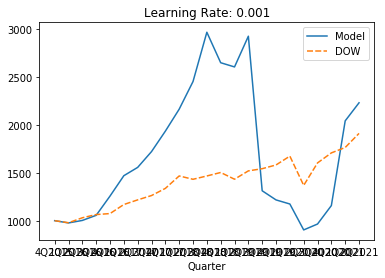

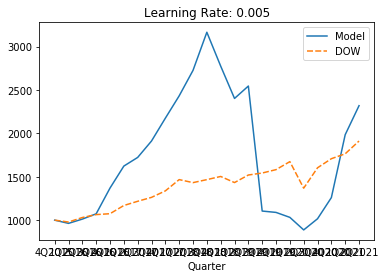

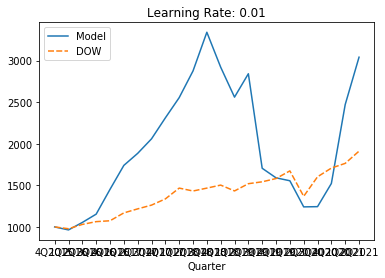

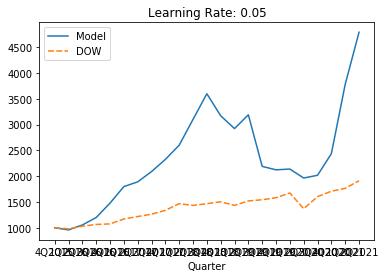

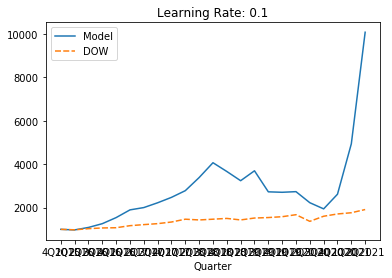

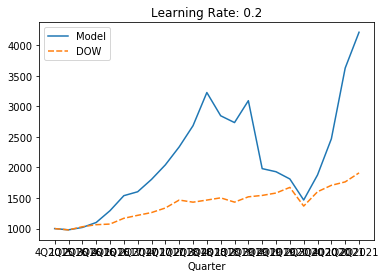

In [79]:
for learning_rate, portfolio in output.items():
    plot_vs_dow(portfolio)
    plt.title(f"Learning Rate: {learning_rate}")
    plt.show()

### Learning Rate: 0.1

# Allocation Fn

In [25]:
output = OrderedDict()

for allocation_fn in ('equal', 'fibonacci'):
    hp = Hyperparams(NUM_QUARTERS_FOR_TRAINING=16, RANDOM_SEED=17, N_STOCKS_TO_BUY=7, ALLOCATION_FN=allocation_fn)

    portfolio = await compute_performance(df=df,
                              start_date=date(2012,1,1),
                              hyperparams=hp,
                              end_date=None)
    
    output[allocation_fn] = portfolio


Fitting data for: QuarterlyIndex  Q4 2011
Filtering data between 4Q2007 and 4Q2011
QuarterFilter removed 50631 rows. Output size: (10487, 73)
Train Size: (8390, 72), Test Size: (2097, 72)
[1]	valid_0's l1: 36.6762	valid_0's l2: 10978.1
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 35.6675	valid_0's l2: 10546.7
[3]	valid_0's l1: 34.6908	valid_0's l2: 10159.3
[4]	valid_0's l1: 33.9567	valid_0's l2: 9829.47
[5]	valid_0's l1: 33.2288	valid_0's l2: 9517.49
[6]	valid_0's l1: 32.5517	valid_0's l2: 9236.4
[7]	valid_0's l1: 31.9901	valid_0's l2: 8975.64
[8]	valid_0's l1: 31.4471	valid_0's l2: 8753.14
[9]	valid_0's l1: 31.0108	valid_0's l2: 8558.93
[10]	valid_0's l1: 30.5958	valid_0's l2: 8347.93
[11]	valid_0's l1: 30.2392	valid_0's l2: 8198.72
[12]	valid_0's l1: 30.0165	valid_0's l2: 8091.34
[13]	valid_0's l1: 29.7371	valid_0's l2: 7938.68
[14]	valid_0's l1: 29.6232	valid_0's l2: 7852.77
[15]	valid_0's l1: 29.4634	valid_0's l2: 7757.78
[16]	valid_0's l1: 29.2966

[1]	valid_0's l1: 33.4811	valid_0's l2: 27573
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 32.8832	valid_0's l2: 27393.4
[3]	valid_0's l1: 32.3194	valid_0's l2: 26904.6
[4]	valid_0's l1: 31.9136	valid_0's l2: 26604.1
[5]	valid_0's l1: 31.5886	valid_0's l2: 26365.1
[6]	valid_0's l1: 31.216	valid_0's l2: 26119.5
[7]	valid_0's l1: 30.9384	valid_0's l2: 25850.2
[8]	valid_0's l1: 30.7205	valid_0's l2: 25845.7
[9]	valid_0's l1: 30.5011	valid_0's l2: 25631.4
[10]	valid_0's l1: 30.3086	valid_0's l2: 25550.7
[11]	valid_0's l1: 30.0506	valid_0's l2: 25181.3
[12]	valid_0's l1: 29.941	valid_0's l2: 25236.6
[13]	valid_0's l1: 29.8532	valid_0's l2: 25111.4
[14]	valid_0's l1: 29.7917	valid_0's l2: 25163.2
[15]	valid_0's l1: 29.5749	valid_0's l2: 25009.4
[16]	valid_0's l1: 29.4788	valid_0's l2: 24938.3
[17]	valid_0's l1: 29.4166	valid_0's l2: 24834.5
[18]	valid_0's l1: 29.4087	valid_0's l2: 24854
[19]	valid_0's l1: 29.4025	valid_0's l2: 24912.2
[20]	valid_0's l1: 29.32

Filtering data between 4Q2012 and 1Q2013
QuarterFilter removed 63612 rows. Output size: (658, 72)
Current portfolio: {QuarterlyIndex GNW Q1 2012: 27.675276752767523, QuarterlyIndex CIT Q1 2012: 35.21088086695467, QuarterlyIndex PFIE Q1 2012: 35.71428571428571, QuarterlyIndex NFLX Q1 2012: 26.69974454706229, QuarterlyIndex MBI Q1 2012: 28.150891287973895, QuarterlyIndex REGN Q1 2012: 65.44532130777903, QuarterlyIndex CVC Q1 2012: 37.837327797697675, QuarterlyIndex CVC Q2 2012: 44.065934065934066, QuarterlyIndex RAD Q2 2012: 34.93449781659389, QuarterlyIndex FNMA Q2 2012: 20.034843205574916, QuarterlyIndex UIS Q2 2012: 37.67261568279092, QuarterlyIndex GNW Q2 2012: 33.93665158371041, QuarterlyIndex FMCC Q2 2012: 34.48275862068966, QuarterlyIndex AMSC Q2 2012: 28.143712574850298, QuarterlyIndex ITT Q3 2012: 39.534288638689866, QuarterlyIndex FSLR Q3 2012: 47.76898164807484, QuarterlyIndex GNW Q3 2012: 44.03131115459882, QuarterlyIndex FNMA Q3 2012: 26.497695852534562, QuarterlyIndex FMCC 


Fitting data for: QuarterlyIndex  Q4 2013
Filtering data between 4Q2009 and 4Q2013
QuarterFilter removed 50663 rows. Output size: (10455, 73)
Train Size: (8364, 72), Test Size: (2091, 72)
[1]	valid_0's l1: 26.0199	valid_0's l2: 25524.4
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 25.8584	valid_0's l2: 25326.2
[3]	valid_0's l1: 25.7013	valid_0's l2: 25156.9
[4]	valid_0's l1: 25.6429	valid_0's l2: 24984.1
[5]	valid_0's l1: 25.5677	valid_0's l2: 24825.2
[6]	valid_0's l1: 25.5004	valid_0's l2: 24692.9
[7]	valid_0's l1: 25.4471	valid_0's l2: 24560
[8]	valid_0's l1: 25.3911	valid_0's l2: 24457
[9]	valid_0's l1: 25.3592	valid_0's l2: 24331.5
[10]	valid_0's l1: 25.3129	valid_0's l2: 24235.4
[11]	valid_0's l1: 25.3003	valid_0's l2: 24145
[12]	valid_0's l1: 25.3773	valid_0's l2: 24071
[13]	valid_0's l1: 25.3275	valid_0's l2: 23965
[14]	valid_0's l1: 25.3861	valid_0's l2: 23894.4
[15]	valid_0's l1: 25.4015	valid_0's l2: 23816.6
[16]	valid_0's l1: 25.3747	valid_0'

[6]	valid_0's l1: 20.8895	valid_0's l2: 1156.41
[7]	valid_0's l1: 20.8531	valid_0's l2: 1163.65
[8]	valid_0's l1: 20.7878	valid_0's l2: 1156.05
[9]	valid_0's l1: 20.7336	valid_0's l2: 1163.56
[10]	valid_0's l1: 20.6996	valid_0's l2: 1160.62
Early stopping, best iteration is:
[5]	valid_0's l1: 20.9162	valid_0's l2: 1144.53
Filtering data between 3Q2014 and 4Q2014
QuarterFilter removed 63605 rows. Output size: (665, 72)
Current portfolio: {QuarterlyIndex FMCC Q4 2013: 195.0756781474792, QuarterlyIndex FNMA Q4 2013: 183.1449016395578, QuarterlyIndex JCP Q4 2013: 105.65193939313038, QuarterlyIndex PFIE Q4 2013: 162.89488804298696, QuarterlyIndex AAL Q4 2013: 189.3890460064688, QuarterlyIndex INCY Q4 2013: 147.28308436910305, QuarterlyIndex SUNEQ Q4 2013: 241.61534150457706, QuarterlyIndex TSLA Q1 2014: 135.11914515235392, QuarterlyIndex FMCC Q1 2014: 87.97989620568997, QuarterlyIndex FNMA Q1 2014: 83.80608464930712, QuarterlyIndex ANR Q1 2014: 58.02059990827281, QuarterlyIndex AYI Q1 2014:

[17]	valid_0's l1: 22.1407	valid_0's l2: 1346.14
[18]	valid_0's l1: 22.1489	valid_0's l2: 1339.98
Early stopping, best iteration is:
[13]	valid_0's l1: 22.0706	valid_0's l2: 1361.13
Filtering data between 2Q2015 and 3Q2015
QuarterFilter removed 63618 rows. Output size: (652, 72)
Current portfolio: {QuarterlyIndex FMCC Q3 2014: 118.5601501141944, QuarterlyIndex FNMA Q3 2014: 123.06656472473406, QuarterlyIndex CTAS Q3 2014: 220.63878060660093, QuarterlyIndex VRTX Q3 2014: 210.4348513444029, QuarterlyIndex MRK Q3 2014: 170.1007366879204, QuarterlyIndex INCY Q3 2014: 330.572862402369, QuarterlyIndex THC Q3 2014: 165.06348018312917, QuarterlyIndex KODK Q4 2014: 129.92738485296735, QuarterlyIndex FMCC Q4 2014: 181.96376415749143, QuarterlyIndex FNMA Q4 2014: 185.23682938000007, QuarterlyIndex CTAS Q4 2014: 171.4325624240177, QuarterlyIndex PSA Q4 2014: 154.17747319713828, QuarterlyIndex GPN Q4 2014: 178.16162319051486, QuarterlyIndex ANR Q4 2014: 0, QuarterlyIndex FMCC Q1 2015: 92.3429010680

[2]	valid_0's l1: 22.4342	valid_0's l2: 1696.6
[3]	valid_0's l1: 22.2819	valid_0's l2: 1663.08
[4]	valid_0's l1: 22.2063	valid_0's l2: 1654.09
[5]	valid_0's l1: 22.0907	valid_0's l2: 1637.85
[6]	valid_0's l1: 21.9941	valid_0's l2: 1624.44
[7]	valid_0's l1: 21.9385	valid_0's l2: 1608.55
[8]	valid_0's l1: 21.8848	valid_0's l2: 1601.46
[9]	valid_0's l1: 21.8615	valid_0's l2: 1602.4
[10]	valid_0's l1: 21.7803	valid_0's l2: 1599.57
[11]	valid_0's l1: 21.7348	valid_0's l2: 1590.48
[12]	valid_0's l1: 21.6827	valid_0's l2: 1573.32
[13]	valid_0's l1: 21.6887	valid_0's l2: 1575.53
[14]	valid_0's l1: 21.6795	valid_0's l2: 1557.94
[15]	valid_0's l1: 21.6082	valid_0's l2: 1537.2
[16]	valid_0's l1: 21.5945	valid_0's l2: 1520.27
[17]	valid_0's l1: 21.5494	valid_0's l2: 1512.83
[18]	valid_0's l1: 21.481	valid_0's l2: 1495.68
[19]	valid_0's l1: 21.4779	valid_0's l2: 1487.1
[20]	valid_0's l1: 21.4492	valid_0's l2: 1494.1
[21]	valid_0's l1: 21.421	valid_0's l2: 1481.48
[22]	valid_0's l1: 21.4189	valid_0'


Fitting data for: QuarterlyIndex  Q3 2016
Filtering data between 3Q2012 and 3Q2016
QuarterFilter removed 50837 rows. Output size: (10281, 73)
Train Size: (8225, 72), Test Size: (2056, 72)
[1]	valid_0's l1: 22.9028	valid_0's l2: 1958.39
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.7417	valid_0's l2: 1894.08
[3]	valid_0's l1: 22.671	valid_0's l2: 1883.06
[4]	valid_0's l1: 22.5115	valid_0's l2: 1825.96
[5]	valid_0's l1: 22.4321	valid_0's l2: 1793.22
[6]	valid_0's l1: 22.3318	valid_0's l2: 1761.23
[7]	valid_0's l1: 22.2601	valid_0's l2: 1734.1
[8]	valid_0's l1: 22.2108	valid_0's l2: 1731.38
[9]	valid_0's l1: 22.131	valid_0's l2: 1708.66
[10]	valid_0's l1: 22.1254	valid_0's l2: 1696.93
[11]	valid_0's l1: 22.0658	valid_0's l2: 1675.67
[12]	valid_0's l1: 22.0234	valid_0's l2: 1652.8
[13]	valid_0's l1: 22.0054	valid_0's l2: 1660.28
[14]	valid_0's l1: 21.9539	valid_0's l2: 1648.49
[15]	valid_0's l1: 21.8911	valid_0's l2: 1629.83
[16]	valid_0's l1: 21.8035	va

Filtering data between 4Q2016 and 1Q2017
QuarterFilter removed 63646 rows. Output size: (624, 72)
Current portfolio: {QuarterlyIndex HPQ Q1 2016: 69.66036985711352, QuarterlyIndex DRE Q1 2016: 69.43530921593182, QuarterlyIndex PLD Q1 2016: 71.25785048330974, QuarterlyIndex FMCC Q1 2016: 133.20696770063486, QuarterlyIndex MCO Q1 2016: 65.65964352768182, QuarterlyIndex WDC Q1 2016: 70.99392036751979, QuarterlyIndex AMD Q1 2016: 220.31171964287782, QuarterlyIndex AMD Q2 2016: 289.5163644082536, QuarterlyIndex FNMA Q2 2016: 223.23877204658814, QuarterlyIndex HPQ Q2 2016: 169.58154530965197, QuarterlyIndex FDS Q2 2016: 138.8805751644797, QuarterlyIndex RAD Q2 2016: 116.71262455198465, QuarterlyIndex KODK Q2 2016: 146.73190452057983, QuarterlyIndex SPGI Q2 2016: 142.02232329068735, QuarterlyIndex FMCC Q3 2016: 311.2291849250275, QuarterlyIndex AMD Q3 2016: 242.08878982394455, QuarterlyIndex HPQ Q3 2016: 189.10569384531004, QuarterlyIndex CLF Q3 2016: 190.7017093930036, QuarterlyIndex FTV Q3 

[42]	valid_0's l1: 19.6818	valid_0's l2: 1299.65
[43]	valid_0's l1: 19.655	valid_0's l2: 1289.75
[44]	valid_0's l1: 19.6343	valid_0's l2: 1287.9
[45]	valid_0's l1: 19.5986	valid_0's l2: 1278.6
[46]	valid_0's l1: 19.5874	valid_0's l2: 1270.46
[47]	valid_0's l1: 19.5751	valid_0's l2: 1261.87
[48]	valid_0's l1: 19.5225	valid_0's l2: 1249.9
[49]	valid_0's l1: 19.5013	valid_0's l2: 1241.05
[50]	valid_0's l1: 19.4919	valid_0's l2: 1239.15
[51]	valid_0's l1: 19.499	valid_0's l2: 1240.99
[52]	valid_0's l1: 19.4885	valid_0's l2: 1233.4
[53]	valid_0's l1: 19.4572	valid_0's l2: 1225.43
[54]	valid_0's l1: 19.4204	valid_0's l2: 1215.57
[55]	valid_0's l1: 19.3985	valid_0's l2: 1208.03
[56]	valid_0's l1: 19.3719	valid_0's l2: 1200.59
[57]	valid_0's l1: 19.3411	valid_0's l2: 1192.89
[58]	valid_0's l1: 19.3279	valid_0's l2: 1187.08
[59]	valid_0's l1: 19.3052	valid_0's l2: 1181.69
[60]	valid_0's l1: 19.3058	valid_0's l2: 1175.81
[61]	valid_0's l1: 19.2694	valid_0's l2: 1168.57
[62]	valid_0's l1: 19.2574


Fitting data for: QuarterlyIndex  Q4 2017
Filtering data between 4Q2013 and 4Q2017
QuarterFilter removed 51079 rows. Output size: (10039, 73)
Train Size: (8032, 72), Test Size: (2007, 72)
[1]	valid_0's l1: 20.7352	valid_0's l2: 819.037
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.5537	valid_0's l2: 803.354
[3]	valid_0's l1: 20.4171	valid_0's l2: 791.713
[4]	valid_0's l1: 20.2903	valid_0's l2: 777.785
[5]	valid_0's l1: 20.1492	valid_0's l2: 767.209
[6]	valid_0's l1: 20.0529	valid_0's l2: 758.937
[7]	valid_0's l1: 19.9689	valid_0's l2: 750.533
[8]	valid_0's l1: 19.8997	valid_0's l2: 746.649
[9]	valid_0's l1: 19.8461	valid_0's l2: 740.62
[10]	valid_0's l1: 19.7958	valid_0's l2: 734.374
[11]	valid_0's l1: 19.7663	valid_0's l2: 729.387
[12]	valid_0's l1: 19.6951	valid_0's l2: 724.074
[13]	valid_0's l1: 19.6497	valid_0's l2: 721.048
[14]	valid_0's l1: 19.6235	valid_0's l2: 719.65
[15]	valid_0's l1: 19.5936	valid_0's l2: 716.353
[16]	valid_0's l1: 19.5531	

[50]	valid_0's l1: 18.7073	valid_0's l2: 699.095
[51]	valid_0's l1: 18.6918	valid_0's l2: 697.956
[52]	valid_0's l1: 18.6897	valid_0's l2: 699.031
[53]	valid_0's l1: 18.6647	valid_0's l2: 697.265
[54]	valid_0's l1: 18.6566	valid_0's l2: 696.582
[55]	valid_0's l1: 18.6333	valid_0's l2: 694.989
[56]	valid_0's l1: 18.6176	valid_0's l2: 694.434
[57]	valid_0's l1: 18.5879	valid_0's l2: 693.733
[58]	valid_0's l1: 18.5768	valid_0's l2: 692.585
[59]	valid_0's l1: 18.5443	valid_0's l2: 690.829
[60]	valid_0's l1: 18.5455	valid_0's l2: 691.192
[61]	valid_0's l1: 18.548	valid_0's l2: 691.278
[62]	valid_0's l1: 18.5318	valid_0's l2: 690.25
[63]	valid_0's l1: 18.499	valid_0's l2: 689.24
[64]	valid_0's l1: 18.4776	valid_0's l2: 688.053
[65]	valid_0's l1: 18.4561	valid_0's l2: 686.327
[66]	valid_0's l1: 18.4614	valid_0's l2: 686.973
[67]	valid_0's l1: 18.4428	valid_0's l2: 687.401
[68]	valid_0's l1: 18.4423	valid_0's l2: 688.139
[69]	valid_0's l1: 18.4233	valid_0's l2: 687.237
[70]	valid_0's l1: 18.42

[1]	valid_0's l1: 22.1414	valid_0's l2: 1054.16
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.9272	valid_0's l2: 1034.92
[3]	valid_0's l1: 21.7278	valid_0's l2: 1017.67
[4]	valid_0's l1: 21.5601	valid_0's l2: 1004.25
[5]	valid_0's l1: 21.4516	valid_0's l2: 993.036
[6]	valid_0's l1: 21.2934	valid_0's l2: 984.111
[7]	valid_0's l1: 21.2131	valid_0's l2: 975.734
[8]	valid_0's l1: 21.1183	valid_0's l2: 968.461
[9]	valid_0's l1: 21.0385	valid_0's l2: 962.127
[10]	valid_0's l1: 20.9677	valid_0's l2: 954.952
[11]	valid_0's l1: 20.9279	valid_0's l2: 949.773
[12]	valid_0's l1: 20.8666	valid_0's l2: 945.016
[13]	valid_0's l1: 20.7877	valid_0's l2: 940.722
[14]	valid_0's l1: 20.7187	valid_0's l2: 935.694
[15]	valid_0's l1: 20.6815	valid_0's l2: 931.881
[16]	valid_0's l1: 20.6199	valid_0's l2: 925.91
[17]	valid_0's l1: 20.5753	valid_0's l2: 923.536
[18]	valid_0's l1: 20.5479	valid_0's l2: 920.414
[19]	valid_0's l1: 20.4808	valid_0's l2: 915.573
[20]	valid_0's l1: 

[56]	valid_0's l1: 18.9399	valid_0's l2: 672.439
[57]	valid_0's l1: 18.9276	valid_0's l2: 671.249
[58]	valid_0's l1: 18.8872	valid_0's l2: 667.506
[59]	valid_0's l1: 18.8776	valid_0's l2: 667.665
[60]	valid_0's l1: 18.8825	valid_0's l2: 668.468
[61]	valid_0's l1: 18.8805	valid_0's l2: 667.691
[62]	valid_0's l1: 18.8819	valid_0's l2: 667.036
[63]	valid_0's l1: 18.8863	valid_0's l2: 666.892
[64]	valid_0's l1: 18.8651	valid_0's l2: 664.739
[65]	valid_0's l1: 18.8509	valid_0's l2: 664.017
[66]	valid_0's l1: 18.8386	valid_0's l2: 664.054
[67]	valid_0's l1: 18.7891	valid_0's l2: 660.287
[68]	valid_0's l1: 18.7844	valid_0's l2: 660.357
[69]	valid_0's l1: 18.7747	valid_0's l2: 659.772
[70]	valid_0's l1: 18.7905	valid_0's l2: 660.707
[71]	valid_0's l1: 18.7859	valid_0's l2: 660.369
[72]	valid_0's l1: 18.7655	valid_0's l2: 658.591
[73]	valid_0's l1: 18.7657	valid_0's l2: 658.427
[74]	valid_0's l1: 18.7564	valid_0's l2: 657.559
[75]	valid_0's l1: 18.7482	valid_0's l2: 657.436
[76]	valid_0's l1: 1

Failed to find data for QuarterlyIndex ATVI Q2 2019. Setting to zero
Failed to find data for QuarterlyIndex SWKS Q2 2019. Setting to zero
Failed to find data for QuarterlyIndex PCG Q2 2019. Setting to zero

Fitting data for: QuarterlyIndex  Q2 2019
Filtering data between 2Q2015 and 2Q2019
QuarterFilter removed 51517 rows. Output size: (9601, 73)
Train Size: (7681, 72), Test Size: (1920, 72)
[1]	valid_0's l1: 24.3294	valid_0's l2: 1754.57
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 24.0727	valid_0's l2: 1733.53
[3]	valid_0's l1: 23.8607	valid_0's l2: 1715.23
[4]	valid_0's l1: 23.6447	valid_0's l2: 1684.33
[5]	valid_0's l1: 23.4948	valid_0's l2: 1670.07
[6]	valid_0's l1: 23.3302	valid_0's l2: 1658.53
[7]	valid_0's l1: 23.2145	valid_0's l2: 1638.85
[8]	valid_0's l1: 23.1355	valid_0's l2: 1634.29
[9]	valid_0's l1: 23.0571	valid_0's l2: 1630.05
[10]	valid_0's l1: 22.9842	valid_0's l2: 1624.07
[11]	valid_0's l1: 22.9076	valid_0's l2: 1615.9
[12]	valid_0's l1

[1]	valid_0's l1: 23.988	valid_0's l2: 2175.44
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.7966	valid_0's l2: 2155.23
[3]	valid_0's l1: 23.6141	valid_0's l2: 2103.47
[4]	valid_0's l1: 23.4341	valid_0's l2: 2056.82
[5]	valid_0's l1: 23.2164	valid_0's l2: 2046.73
[6]	valid_0's l1: 23.1336	valid_0's l2: 2039.13
[7]	valid_0's l1: 23.0976	valid_0's l2: 2012.79
[8]	valid_0's l1: 23.0976	valid_0's l2: 2018.64
[9]	valid_0's l1: 23.0188	valid_0's l2: 1993.79
[10]	valid_0's l1: 22.9436	valid_0's l2: 1995.44
[11]	valid_0's l1: 22.8707	valid_0's l2: 1977.21
[12]	valid_0's l1: 22.7985	valid_0's l2: 1968.2
[13]	valid_0's l1: 22.7901	valid_0's l2: 1949.83
[14]	valid_0's l1: 22.6805	valid_0's l2: 1926.84
[15]	valid_0's l1: 22.6413	valid_0's l2: 1925.61
[16]	valid_0's l1: 22.6693	valid_0's l2: 1934.71
[17]	valid_0's l1: 22.5545	valid_0's l2: 1930.82
[18]	valid_0's l1: 22.475	valid_0's l2: 1910.35
[19]	valid_0's l1: 22.4332	valid_0's l2: 1913.11
[20]	valid_0's l1: 22

Failed to find data for QuarterlyIndex NE Q2 2020. Setting to zero

Fitting data for: QuarterlyIndex  Q2 2020
Filtering data between 2Q2016 and 2Q2020
QuarterFilter removed 52295 rows. Output size: (8823, 73)
Train Size: (7059, 72), Test Size: (1764, 72)
[1]	valid_0's l1: 26.012	valid_0's l2: 2033.9
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 25.7118	valid_0's l2: 1988.81
[3]	valid_0's l1: 25.4352	valid_0's l2: 1943.05
[4]	valid_0's l1: 25.2733	valid_0's l2: 1913.3
[5]	valid_0's l1: 25.114	valid_0's l2: 1879.43
[6]	valid_0's l1: 25.0035	valid_0's l2: 1863.02
[7]	valid_0's l1: 24.9234	valid_0's l2: 1846.47
[8]	valid_0's l1: 24.8695	valid_0's l2: 1838.58
[9]	valid_0's l1: 24.8098	valid_0's l2: 1812.67
[10]	valid_0's l1: 24.7761	valid_0's l2: 1785.64
[11]	valid_0's l1: 24.7313	valid_0's l2: 1770.51
[12]	valid_0's l1: 24.6523	valid_0's l2: 1753.98
[13]	valid_0's l1: 24.6851	valid_0's l2: 1759.89
[14]	valid_0's l1: 24.6811	valid_0's l2: 1748.25
[15]	valid_0

[24]	valid_0's l1: 29.175	valid_0's l2: 24886.6
[25]	valid_0's l1: 29.1263	valid_0's l2: 24896.2
[26]	valid_0's l1: 29.1446	valid_0's l2: 24875
[27]	valid_0's l1: 29.0899	valid_0's l2: 24846.8
[28]	valid_0's l1: 29.0823	valid_0's l2: 24863.8
[29]	valid_0's l1: 29.0436	valid_0's l2: 24880.1
[30]	valid_0's l1: 28.9859	valid_0's l2: 24895.4
[31]	valid_0's l1: 28.9642	valid_0's l2: 24892.5
[32]	valid_0's l1: 28.9913	valid_0's l2: 24846.4
[33]	valid_0's l1: 28.9154	valid_0's l2: 24860.4
[34]	valid_0's l1: 28.8755	valid_0's l2: 24862.9
[35]	valid_0's l1: 28.8641	valid_0's l2: 24791.9
[36]	valid_0's l1: 28.8073	valid_0's l2: 24811.9
[37]	valid_0's l1: 28.7629	valid_0's l2: 24793.6
[38]	valid_0's l1: 28.7492	valid_0's l2: 24806.2
[39]	valid_0's l1: 28.7756	valid_0's l2: 24827.4
[40]	valid_0's l1: 28.7286	valid_0's l2: 24840
Early stopping, best iteration is:
[35]	valid_0's l1: 28.8641	valid_0's l2: 24791.9
Filtering data between 4Q2020 and 1Q2021
QuarterFilter removed 63673 rows. Output size: 

Filtering data between 4Q2011 and 1Q2012
QuarterFilter removed 63614 rows. Output size: (656, 72)
Current portfolio: {QuarterlyIndex AAL Q4 2011: 98.48484848484848, QuarterlyIndex KODK Q4 2011: 60.60606060606061, QuarterlyIndex AMSC Q4 2011: 37.878787878787875, QuarterlyIndex MTG Q4 2011: 22.727272727272727, QuarterlyIndex GNW Q4 2011: 15.151515151515152, QuarterlyIndex CVC Q4 2011: 7.575757575757576, QuarterlyIndex PFIE Q4 2011: 7.575757575757576}
Failed to find data for QuarterlyIndex AAL Q1 2012. Setting to zero
Failed to find data for QuarterlyIndex KODK Q1 2012. Setting to zero

Fitting data for: QuarterlyIndex  Q1 2012
Filtering data between 1Q2008 and 1Q2012
QuarterFilter removed 50642 rows. Output size: (10476, 73)
Train Size: (8381, 72), Test Size: (2095, 72)
[1]	valid_0's l1: 36.7992	valid_0's l2: 34172.2
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 35.9336	valid_0's l2: 33739.1
[3]	valid_0's l1: 35.2299	valid_0's l2: 33369.6
[4]	valid_0's l1:

[1]	valid_0's l1: 28.1049	valid_0's l2: 3336.31
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.7422	valid_0's l2: 3208.57
[3]	valid_0's l1: 27.3356	valid_0's l2: 3105.71
[4]	valid_0's l1: 26.9766	valid_0's l2: 2982.06
[5]	valid_0's l1: 26.8196	valid_0's l2: 2949.03
[6]	valid_0's l1: 26.6626	valid_0's l2: 2926.17
[7]	valid_0's l1: 26.5764	valid_0's l2: 2917.99
[8]	valid_0's l1: 26.4806	valid_0's l2: 2920.41
[9]	valid_0's l1: 26.4696	valid_0's l2: 2926.85
[10]	valid_0's l1: 26.3504	valid_0's l2: 2943.68
[11]	valid_0's l1: 26.2855	valid_0's l2: 2953.95
[12]	valid_0's l1: 26.3032	valid_0's l2: 2970.3
Early stopping, best iteration is:
[7]	valid_0's l1: 26.5764	valid_0's l2: 2917.99
Filtering data between 3Q2012 and 4Q2012
QuarterFilter removed 63611 rows. Output size: (659, 72)
Current portfolio: {QuarterlyIndex AAL Q4 2011: 0, QuarterlyIndex KODK Q4 2011: 0, QuarterlyIndex AMSC Q4 2011: 40.19886363636364, QuarterlyIndex MTG Q4 2011: 16.198347107438014, Qu

[1]	valid_0's l1: 28.3735	valid_0's l2: 7249.73
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.7979	valid_0's l2: 6954.86
[3]	valid_0's l1: 27.5292	valid_0's l2: 6698.84
[4]	valid_0's l1: 27.2718	valid_0's l2: 6480.92
[5]	valid_0's l1: 27.0679	valid_0's l2: 6297.18
[6]	valid_0's l1: 26.8306	valid_0's l2: 6182.78
[7]	valid_0's l1: 26.6601	valid_0's l2: 6048.93
[8]	valid_0's l1: 26.552	valid_0's l2: 5930.66
[9]	valid_0's l1: 26.4772	valid_0's l2: 5843.13
[10]	valid_0's l1: 26.3289	valid_0's l2: 5685.11
[11]	valid_0's l1: 26.2946	valid_0's l2: 5658.55
[12]	valid_0's l1: 26.2638	valid_0's l2: 5630.38
[13]	valid_0's l1: 26.2546	valid_0's l2: 5585.68
[14]	valid_0's l1: 26.1987	valid_0's l2: 5532.16
[15]	valid_0's l1: 26.1648	valid_0's l2: 5486.37
[16]	valid_0's l1: 26.1244	valid_0's l2: 5421.34
[17]	valid_0's l1: 26.1408	valid_0's l2: 5362.43
[18]	valid_0's l1: 26.1349	valid_0's l2: 5338.13
[19]	valid_0's l1: 26.1092	valid_0's l2: 5311.06
[20]	valid_0's l1: 

Filtering data between 4Q2013 and 1Q2014
QuarterFilter removed 63607 rows. Output size: (663, 72)
Current portfolio: {QuarterlyIndex FMCC Q1 2013: 295.5246740895552, QuarterlyIndex FNMA Q1 2013: 192.52865668772137, QuarterlyIndex SVU Q1 2013: 101.22563758813268, QuarterlyIndex DF Q1 2013: 30.651064800014883, QuarterlyIndex RRD Q1 2013: 30.04661353461793, QuarterlyIndex ANR Q1 2013: 6.557167392038542, QuarterlyIndex NCLH Q1 2013: 10.889250312077587, QuarterlyIndex FNMA Q2 2013: 201.3118285351374, QuarterlyIndex FMCC Q2 2013: 125.0594155650199, QuarterlyIndex TSLA Q2 2013: 204.35202151638362, QuarterlyIndex LSI Q2 2013: 80.00947778869293, QuarterlyIndex STR Q2 2013: 37.0546037296954, QuarterlyIndex UIS Q2 2013: 29.40158511431963, QuarterlyIndex MAC Q2 2013: 17.681871649372304, QuarterlyIndex FMCC Q3 2013: 408.56262431190817, QuarterlyIndex FNMA Q3 2013: 250.202691149203, QuarterlyIndex ANR Q3 2013: 107.88336779947564, QuarterlyIndex PFIE Q3 2013: 87.88593680290398, QuarterlyIndex INCY Q3

Filtering data between 3Q2014 and 4Q2014
QuarterFilter removed 63605 rows. Output size: (665, 72)
Current portfolio: {QuarterlyIndex FMCC Q4 2013: 280.4780960862089, QuarterlyIndex FNMA Q4 2013: 162.04561873729472, QuarterlyIndex JCP Q4 2013: 58.425165458090426, QuarterlyIndex PFIE Q4 2013: 54.04819357328775, QuarterlyIndex AAL Q4 2013: 41.89260097802731, QuarterlyIndex INCY Q4 2013: 16.28940958939415, QuarterlyIndex SUNEQ Q4 2013: 26.722493473765436, QuarterlyIndex TSLA Q1 2014: 546.5640623167186, QuarterlyIndex FMCC Q1 2014: 219.00511772282363, QuarterlyIndex FNMA Q1 2014: 130.3846263895357, QuarterlyIndex ANR Q1 2014: 54.160704012792166, QuarterlyIndex AYI Q1 2014: 66.22556691060379, QuarterlyIndex UA Q1 2014: 41.63243514806396, QuarterlyIndex INCY Q1 2014: 28.081103115567217, QuarterlyIndex FMCC Q2 2014: 314.5429819647847, QuarterlyIndex FNMA Q2 2014: 196.0463138561154, QuarterlyIndex F Q2 2014: 141.88261436792857, QuarterlyIndex DRE Q2 2014: 83.49195232634492, QuarterlyIndex PLD Q

[1]	valid_0's l1: 22.8506	valid_0's l2: 1961.2
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.7312	valid_0's l2: 1921.98
[3]	valid_0's l1: 22.5765	valid_0's l2: 1894.71
[4]	valid_0's l1: 22.4064	valid_0's l2: 1863.78
[5]	valid_0's l1: 22.3032	valid_0's l2: 1851.94
[6]	valid_0's l1: 22.2113	valid_0's l2: 1833.92
[7]	valid_0's l1: 22.173	valid_0's l2: 1814.18
[8]	valid_0's l1: 22.0723	valid_0's l2: 1796.11
[9]	valid_0's l1: 22.0315	valid_0's l2: 1772.89
[10]	valid_0's l1: 21.9594	valid_0's l2: 1758.26
[11]	valid_0's l1: 21.8544	valid_0's l2: 1737.79
[12]	valid_0's l1: 21.8105	valid_0's l2: 1709.31
[13]	valid_0's l1: 21.7655	valid_0's l2: 1702.69
[14]	valid_0's l1: 21.7637	valid_0's l2: 1707.01
[15]	valid_0's l1: 21.7101	valid_0's l2: 1700.21
[16]	valid_0's l1: 21.6726	valid_0's l2: 1680.62
[17]	valid_0's l1: 21.6267	valid_0's l2: 1673.39
[18]	valid_0's l1: 21.5834	valid_0's l2: 1667.06
[19]	valid_0's l1: 21.5143	valid_0's l2: 1643.78
[20]	valid_0's l1: 2

[54]	valid_0's l1: 20.932	valid_0's l2: 1353.54
Early stopping, best iteration is:
[49]	valid_0's l1: 20.9437	valid_0's l2: 1346.76
Filtering data between 1Q2016 and 2Q2016
QuarterFilter removed 63631 rows. Output size: (639, 72)
Current portfolio: {QuarterlyIndex FMCC Q2 2015: 151.39748681451377, QuarterlyIndex FNMA Q2 2015: 92.53753680101649, QuarterlyIndex DRE Q2 2015: 108.73443293069022, QuarterlyIndex RRD Q2 2015: 27.548035192378826, QuarterlyIndex EXR Q2 2015: 55.12277189200407, QuarterlyIndex KODK Q2 2015: 11.48620534806149, QuarterlyIndex NFLX Q2 2015: 27.26431580031604, QuarterlyIndex FMCC Q3 2015: 264.06225716017747, QuarterlyIndex PLD Q3 2015: 271.3676019566099, QuarterlyIndex HPQ Q3 2015: 62.08087423777252, QuarterlyIndex TSLA Q3 2015: 79.95924018740993, QuarterlyIndex KODK Q3 2015: 44.62878526485282, QuarterlyIndex CNX Q3 2015: 18.1974562197553, QuarterlyIndex WDC Q3 2015: 21.411711383018336, QuarterlyIndex WDC Q4 2015: 107.47545537977686, QuarterlyIndex SWN Q4 2015: 77.73

[41]	valid_0's l1: 21.0958	valid_0's l2: 1403.94
[42]	valid_0's l1: 21.0704	valid_0's l2: 1396.77
[43]	valid_0's l1: 21.044	valid_0's l2: 1382.65
[44]	valid_0's l1: 21.0647	valid_0's l2: 1378.69
[45]	valid_0's l1: 21.0472	valid_0's l2: 1376.11
[46]	valid_0's l1: 21.0233	valid_0's l2: 1369.5
[47]	valid_0's l1: 20.9902	valid_0's l2: 1358.09
[48]	valid_0's l1: 20.9897	valid_0's l2: 1356.09
[49]	valid_0's l1: 20.9682	valid_0's l2: 1354.39
[50]	valid_0's l1: 20.9528	valid_0's l2: 1343.43
[51]	valid_0's l1: 20.9178	valid_0's l2: 1338.88
[52]	valid_0's l1: 20.9016	valid_0's l2: 1334.61
[53]	valid_0's l1: 20.9016	valid_0's l2: 1331.92
[54]	valid_0's l1: 20.8866	valid_0's l2: 1326.65
[55]	valid_0's l1: 20.8574	valid_0's l2: 1323.37
[56]	valid_0's l1: 20.8282	valid_0's l2: 1318.91
[57]	valid_0's l1: 20.8204	valid_0's l2: 1315.72
[58]	valid_0's l1: 20.819	valid_0's l2: 1312.76
[59]	valid_0's l1: 20.8005	valid_0's l2: 1305.3
[60]	valid_0's l1: 20.8155	valid_0's l2: 1303.67
[61]	valid_0's l1: 20.79

[1]	valid_0's l1: 22.2363	valid_0's l2: 1152.16
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.0843	valid_0's l2: 1134.19
[3]	valid_0's l1: 21.9315	valid_0's l2: 1119.22
[4]	valid_0's l1: 21.7337	valid_0's l2: 1102.76
[5]	valid_0's l1: 21.594	valid_0's l2: 1089.01
[6]	valid_0's l1: 21.528	valid_0's l2: 1078.57
[7]	valid_0's l1: 21.3975	valid_0's l2: 1069.34
[8]	valid_0's l1: 21.3614	valid_0's l2: 1064.41
[9]	valid_0's l1: 21.2859	valid_0's l2: 1057.27
[10]	valid_0's l1: 21.2255	valid_0's l2: 1051.84
[11]	valid_0's l1: 21.1811	valid_0's l2: 1049.98
[12]	valid_0's l1: 21.1147	valid_0's l2: 1046.96
[13]	valid_0's l1: 21.0513	valid_0's l2: 1041.08
[14]	valid_0's l1: 20.9882	valid_0's l2: 1034.21
[15]	valid_0's l1: 21.0245	valid_0's l2: 1038.12
[16]	valid_0's l1: 20.9581	valid_0's l2: 1028.63
[17]	valid_0's l1: 20.9083	valid_0's l2: 1023.66
[18]	valid_0's l1: 20.8837	valid_0's l2: 1020.85
[19]	valid_0's l1: 20.8755	valid_0's l2: 1020.28
[20]	valid_0's l1: 2

Filtering data between 2Q2017 and 3Q2017
QuarterFilter removed 63651 rows. Output size: (619, 72)
Current portfolio: {QuarterlyIndex FMCC Q3 2016: 569.5659302018303, QuarterlyIndex AMD Q3 2016: 453.67782442130635, QuarterlyIndex HPQ Q3 2016: 193.20092899129872, QuarterlyIndex CLF Q3 2016: 93.92120346887837, QuarterlyIndex FTV Q3 2016: 0.0, QuarterlyIndex ODP Q3 2016: 43.393101372582706, QuarterlyIndex STX Q3 2016: 42.646717354016765, QuarterlyIndex AMD Q4 2016: 202.22628974647264, QuarterlyIndex HPQ Q4 2016: 108.55153374000332, QuarterlyIndex IQV Q4 2016: 66.11286095262062, QuarterlyIndex MAR Q4 2016: 46.66367477565597, QuarterlyIndex MTG Q4 2016: 27.205278321901336, QuarterlyIndex EA Q4 2016: 14.932843692917663, QuarterlyIndex KLAC Q4 2016: 15.474895566896071, QuarterlyIndex NRG Q1 2017: 0, QuarterlyIndex NVDA Q1 2017: 228.62081567555276, QuarterlyIndex INCY Q1 2017: 125.65054865162736, QuarterlyIndex SWKS Q1 2017: 88.16733467721157, QuarterlyIndex ABMD Q1 2017: 56.90290165556832, Qua

[72]	valid_0's l1: 18.343	valid_0's l2: 639.613
[73]	valid_0's l1: 18.3333	valid_0's l2: 639.515
[74]	valid_0's l1: 18.3356	valid_0's l2: 640.002
[75]	valid_0's l1: 18.3207	valid_0's l2: 639.859
[76]	valid_0's l1: 18.308	valid_0's l2: 638.661
[77]	valid_0's l1: 18.2989	valid_0's l2: 638.407
[78]	valid_0's l1: 18.2869	valid_0's l2: 636.84
[79]	valid_0's l1: 18.282	valid_0's l2: 636.33
[80]	valid_0's l1: 18.2532	valid_0's l2: 635.244
[81]	valid_0's l1: 18.2415	valid_0's l2: 635.176
[82]	valid_0's l1: 18.2167	valid_0's l2: 634.397
[83]	valid_0's l1: 18.1971	valid_0's l2: 632.716
[84]	valid_0's l1: 18.1869	valid_0's l2: 632.139
[85]	valid_0's l1: 18.1821	valid_0's l2: 631.527
[86]	valid_0's l1: 18.1752	valid_0's l2: 631.173
[87]	valid_0's l1: 18.1618	valid_0's l2: 630.535
[88]	valid_0's l1: 18.1409	valid_0's l2: 630.125
[89]	valid_0's l1: 18.1236	valid_0's l2: 629.259
[90]	valid_0's l1: 18.1096	valid_0's l2: 628.52
[91]	valid_0's l1: 18.0884	valid_0's l2: 627.528
[92]	valid_0's l1: 18.0776

[5]	valid_0's l1: 20.2918	valid_0's l2: 772.594
[6]	valid_0's l1: 20.1517	valid_0's l2: 762.684
[7]	valid_0's l1: 20.0578	valid_0's l2: 755.475
[8]	valid_0's l1: 19.9706	valid_0's l2: 749.617
[9]	valid_0's l1: 19.8755	valid_0's l2: 742.896
[10]	valid_0's l1: 19.8175	valid_0's l2: 737.948
[11]	valid_0's l1: 19.7466	valid_0's l2: 732.039
[12]	valid_0's l1: 19.6449	valid_0's l2: 726.486
[13]	valid_0's l1: 19.5615	valid_0's l2: 720.847
[14]	valid_0's l1: 19.5148	valid_0's l2: 716.312
[15]	valid_0's l1: 19.4688	valid_0's l2: 712.261
[16]	valid_0's l1: 19.4201	valid_0's l2: 708.525
[17]	valid_0's l1: 19.3684	valid_0's l2: 704.005
[18]	valid_0's l1: 19.3169	valid_0's l2: 698.946
[19]	valid_0's l1: 19.2911	valid_0's l2: 696.579
[20]	valid_0's l1: 19.2869	valid_0's l2: 695.554
[21]	valid_0's l1: 19.2287	valid_0's l2: 691.559
[22]	valid_0's l1: 19.1844	valid_0's l2: 687.449
[23]	valid_0's l1: 19.1544	valid_0's l2: 683.541
[24]	valid_0's l1: 19.1403	valid_0's l2: 682.699
[25]	valid_0's l1: 19.110

[49]	valid_0's l1: 19.6112	valid_0's l2: 846.811
[50]	valid_0's l1: 19.5732	valid_0's l2: 845.041
[51]	valid_0's l1: 19.5385	valid_0's l2: 843.466
[52]	valid_0's l1: 19.5232	valid_0's l2: 842.586
[53]	valid_0's l1: 19.5099	valid_0's l2: 841.064
[54]	valid_0's l1: 19.4964	valid_0's l2: 840.306
[55]	valid_0's l1: 19.4642	valid_0's l2: 837.384
[56]	valid_0's l1: 19.4482	valid_0's l2: 836.6
[57]	valid_0's l1: 19.4362	valid_0's l2: 835.119
[58]	valid_0's l1: 19.429	valid_0's l2: 834.31
[59]	valid_0's l1: 19.4165	valid_0's l2: 833.178
[60]	valid_0's l1: 19.3905	valid_0's l2: 831.523
[61]	valid_0's l1: 19.3895	valid_0's l2: 830.869
[62]	valid_0's l1: 19.3778	valid_0's l2: 829.714
[63]	valid_0's l1: 19.3594	valid_0's l2: 828.026
[64]	valid_0's l1: 19.3526	valid_0's l2: 828.039
[65]	valid_0's l1: 19.326	valid_0's l2: 827.051
[66]	valid_0's l1: 19.2979	valid_0's l2: 825.327
[67]	valid_0's l1: 19.2952	valid_0's l2: 825.151
[68]	valid_0's l1: 19.2932	valid_0's l2: 824.979
[69]	valid_0's l1: 19.284

[93]	valid_0's l1: 18.5915	valid_0's l2: 645.816
[94]	valid_0's l1: 18.5578	valid_0's l2: 643.688
[95]	valid_0's l1: 18.5398	valid_0's l2: 642.823
[96]	valid_0's l1: 18.53	valid_0's l2: 642.749
[97]	valid_0's l1: 18.5203	valid_0's l2: 641.706
[98]	valid_0's l1: 18.5293	valid_0's l2: 641.663
[99]	valid_0's l1: 18.5243	valid_0's l2: 641.432
[100]	valid_0's l1: 18.5012	valid_0's l2: 640.777
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.5012	valid_0's l2: 640.777
Filtering data between 4Q2018 and 1Q2019
QuarterFilter removed 63682 rows. Output size: (588, 72)
Current portfolio: {QuarterlyIndex MED Q1 2018: 673.2368621176622, QuarterlyIndex ABMD Q1 2018: 286.9035073592145, QuarterlyIndex LRCX Q1 2018: 88.9225984494338, QuarterlyIndex ALGN Q1 2018: 83.58750160480903, QuarterlyIndex ADSK Q1 2018: 57.49180738415229, QuarterlyIndex NVDA Q1 2018: 27.579375801134994, QuarterlyIndex CVS Q1 2018: 24.095836128739784, QuarterlyIndex AMD Q2 2018: 1454.8109789382409, QuarterlyI

[20]	valid_0's l1: 22.4722	valid_0's l2: 1578.84
[21]	valid_0's l1: 22.4453	valid_0's l2: 1577.01
[22]	valid_0's l1: 22.3738	valid_0's l2: 1576.43
[23]	valid_0's l1: 22.3118	valid_0's l2: 1564.4
[24]	valid_0's l1: 22.2847	valid_0's l2: 1564.36
[25]	valid_0's l1: 22.2675	valid_0's l2: 1566.7
[26]	valid_0's l1: 22.2312	valid_0's l2: 1560.18
[27]	valid_0's l1: 22.2199	valid_0's l2: 1560.49
[28]	valid_0's l1: 22.2053	valid_0's l2: 1560.76
[29]	valid_0's l1: 22.174	valid_0's l2: 1559.81
[30]	valid_0's l1: 22.1953	valid_0's l2: 1562.26
[31]	valid_0's l1: 22.1923	valid_0's l2: 1563.13
[32]	valid_0's l1: 22.1552	valid_0's l2: 1562.26
[33]	valid_0's l1: 22.161	valid_0's l2: 1564.08
[34]	valid_0's l1: 22.0993	valid_0's l2: 1555.72
[35]	valid_0's l1: 22.0692	valid_0's l2: 1554.5
[36]	valid_0's l1: 22.0498	valid_0's l2: 1549.43
[37]	valid_0's l1: 22.0177	valid_0's l2: 1547.71
[38]	valid_0's l1: 22.0099	valid_0's l2: 1547.97
[39]	valid_0's l1: 21.9772	valid_0's l2: 1549.09
[40]	valid_0's l1: 21.946

Current portfolio: {QuarterlyIndex NBR Q1 2019: 0, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex NVDA Q1 2019: 0, QuarterlyIndex LRCX Q1 2019: 153.55640551393086, QuarterlyIndex AMD Q1 2019: 0, QuarterlyIndex XLNX Q1 2019: 26.577915788384068, QuarterlyIndex CDNS Q1 2019: 0, QuarterlyIndex WINMQ Q2 2019: 657.1681832675827, QuarterlyIndex LIFE Q2 2019: 388.31499320600665, QuarterlyIndex IR Q2 2019: 448.46110466856015, QuarterlyIndex QCOM Q2 2019: 297.64159668129156, QuarterlyIndex NVDA Q2 2019: 0, QuarterlyIndex ICE Q2 2019: 97.95887288212184, QuarterlyIndex ADSK Q2 2019: 90.17791576355604, QuarterlyIndex X Q3 2019: 524.8110224695375, QuarterlyIndex IR Q3 2019: 358.68850064710904, QuarterlyIndex NE Q3 2019: 145.59381662369313, QuarterlyIndex LRCX Q3 2019: 158.6486224003749, QuarterlyIndex TXN Q3 2019: 84.17552011650238, QuarterlyIndex APH Q3 2019: 46.23602446782879, QuarterlyIndex AMAT Q3 2019: 49.965639118903894, QuarterlyIndex WINMQ Q4 2019: 35.356092159692764, QuarterlyIndex JBL Q4 20

[17]	valid_0's l1: 24.4762	valid_0's l2: 1718.88
[18]	valid_0's l1: 24.444	valid_0's l2: 1729.44
[19]	valid_0's l1: 24.4779	valid_0's l2: 1728.45
[20]	valid_0's l1: 24.4384	valid_0's l2: 1722.13
[21]	valid_0's l1: 24.4193	valid_0's l2: 1709.71
[22]	valid_0's l1: 24.2907	valid_0's l2: 1673.3
[23]	valid_0's l1: 24.2783	valid_0's l2: 1674.09
[24]	valid_0's l1: 24.1982	valid_0's l2: 1662.39
[25]	valid_0's l1: 24.1645	valid_0's l2: 1647.37
[26]	valid_0's l1: 24.1552	valid_0's l2: 1646.99
[27]	valid_0's l1: 24.086	valid_0's l2: 1647.59
[28]	valid_0's l1: 24.0719	valid_0's l2: 1640.61
[29]	valid_0's l1: 24.0573	valid_0's l2: 1633.59
[30]	valid_0's l1: 23.9626	valid_0's l2: 1638.93
[31]	valid_0's l1: 23.9018	valid_0's l2: 1623.83
[32]	valid_0's l1: 23.8424	valid_0's l2: 1620.46
[33]	valid_0's l1: 23.839	valid_0's l2: 1620.73
[34]	valid_0's l1: 23.7272	valid_0's l2: 1603.8
[35]	valid_0's l1: 23.7625	valid_0's l2: 1614.29
[36]	valid_0's l1: 23.6526	valid_0's l2: 1593.73
[37]	valid_0's l1: 23.626

[1]	valid_0's l1: 28.8491	valid_0's l2: 3288.39
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 28.2977	valid_0's l2: 3199.07
[3]	valid_0's l1: 27.733	valid_0's l2: 3111.33
[4]	valid_0's l1: 27.4459	valid_0's l2: 3075.34
[5]	valid_0's l1: 27.0863	valid_0's l2: 3034.98
[6]	valid_0's l1: 26.7365	valid_0's l2: 2985.76
[7]	valid_0's l1: 26.7455	valid_0's l2: 3022.79
[8]	valid_0's l1: 26.5503	valid_0's l2: 2973.91
[9]	valid_0's l1: 26.4573	valid_0's l2: 2925.84
[10]	valid_0's l1: 26.394	valid_0's l2: 2904.43
[11]	valid_0's l1: 26.203	valid_0's l2: 2884.55
[12]	valid_0's l1: 26.0331	valid_0's l2: 2861.34
[13]	valid_0's l1: 26.1191	valid_0's l2: 2885.56
[14]	valid_0's l1: 26.0425	valid_0's l2: 2870.03
[15]	valid_0's l1: 25.9028	valid_0's l2: 2850.47
[16]	valid_0's l1: 25.8622	valid_0's l2: 2838.17
[17]	valid_0's l1: 26.0143	valid_0's l2: 2854.42
[18]	valid_0's l1: 25.8756	valid_0's l2: 2816.22
[19]	valid_0's l1: 25.8883	valid_0's l2: 2827.79
[20]	valid_0's l1: 25

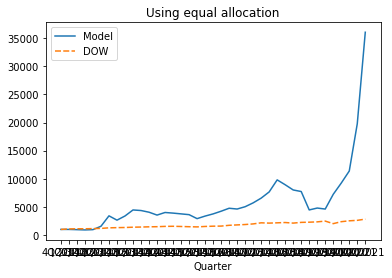

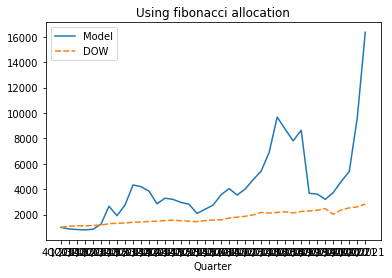

In [26]:
for allocation_fn, portfolio in output.items():
    plot_vs_dow(portfolio)
    plt.title(f"Using {allocation_fn} allocation")
    plt.show()

## Allocation function: equal